# 📌 Importing Required Libraries

Before diving into data preprocessing, model training, and evaluation, it's essential to import the necessary libraries. These libraries serve various purposes, from handling numerical computations to performing advanced machine learning tasks.

## ✅ **1. Basic Libraries**
- **NumPy & Pandas**: Essential for numerical operations and data manipulation.
- **OS & SYS**: Interact with the system for file management.
- **RE**: Useful for handling regular expressions in string operations.

## ✅ **2. Visualization Libraries**
- **Seaborn & Matplotlib**: For plotting and visualizing data distributions, model results, and performance.
- **Matplotlib Path Effects**: Allows customization of text and labels in plots.

## ✅ **3. Data Preprocessing & Feature Engineering**
- **Scalers (StandardScaler, MinMaxScaler, Normalizer)**: Normalize and transform numerical data for better model performance.
- **Feature Selection (RFE, SelectKBest, SelectFromModel)**: Identify and retain the most informative features.

## ✅ **4. Machine Learning - Model Selection & Training**
- **Sklearn Models (LinearRegression, Lasso, Ridge, SVR, KNN, GradientBoosting, ElasticNet, etc.)**: Includes regression models used for prediction.
- **Kernel Ridge Regression (KRR)**: A variation of Ridge Regression with kernel functions.
- **LightGBM, CatBoost, RandomForest**: Powerful tree-based ensemble learning models.
- **GridSearchCV, KFold, RepeatedKFold**: Techniques for cross-validation and hyperparameter tuning.

## ✅ **5. Model Evaluation & Interpretation**
- **Metrics (MAE, MSE, R² Score)**: Key performance indicators for regression models.
- **Permutation Importance & SHAP**: Explainability tools to analyze feature importance and model decisions.

## ✅ **6. High-Performance Computing & Parallelization**
- **Dask & Joblib**: Enable parallel processing to handle large datasets efficiently.

## ✅ **7. HEA-Specific Libraries (Domain-Specific)**
- **HEACalculator**: A specialized tool for High-Entropy Alloy (HEA) calculations, indicating the application of machine learning in materials science.

## ✅ **8. Miscellaneous Utilities**
- **Exporting Trees (Pydot, Graphviz)**: Useful for decision tree visualization.
- **PPrint**: Improves readability when printing structured data.

---

📌 **This structured approach ensures that all necessary tools are available for efficient model training, evaluation, and deployment. 🚀**


In [5]:
# ===============================
# 1. Basic Libraries
# ===============================
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation
import os  # Operating system interactions
import sys  # System functions
import re  # Regular expressions for string operations

# ===============================
# 2. Visualization Libraries
# ===============================
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # General plotting
import matplotlib.patheffects as path_effects  # Effects for text in plots
import matplotlib as mpl  # Configuring matplotlib settings

# Set Times New Roman as the default font for plots
mpl.rcParams['font.family'] = 'Times New Roman'

# ===============================
# 3. Data Preprocessing & Feature Engineering
# ===============================
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PolynomialFeatures  # Feature scaling & transformation
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, SelectKBest, RFE  # Feature selection

# ===============================
# 4. Machine Learning - Model Selection & Training
# ===============================
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, KFold, cross_validate, RepeatedKFold  # Splitting data & cross-validation
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # Regression models
from sklearn.kernel_ridge import KernelRidge as KRR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.neighbors import KNeighborsRegressor  # KNN Regressor
from lightgbm import LGBMRegressor  # LightGBM
from sklearn.linear_model import ElasticNet #ElasticNet Regressor
import catboost as cb  # CatBoost
from catboost import Pool  # Handling datasets in CatBoost

# ===============================
# 5. Model Evaluation & Interpretation
# ===============================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mutual_info_score  # Performance metrics
from sklearn.inspection import permutation_importance  # Feature importance calculation
import shap  # SHAP for model explainability

# ===============================
# 6. High-Performance Computing & Parallelization
# ===============================
from dask.distributed import Client  # Dask for parallel computing
import dask.dataframe as dd  # Dask for large-scale dataframe processing
from joblib import Parallel, delayed  # Parallel execution

# ===============================
# 7. HEA-Specific Libraries (Domain-Specific)
# ===============================
from HEACalculator.core import Converter  # Materials science utility
from HEACalculator.core.HEA import HEACalculator  # High-entropy alloy calculations

# ===============================
# 8. Miscellaneous Utilities
# ===============================
from sklearn.tree import export_graphviz  # Export decision trees for visualization
from pprint import pprint  # Pretty print for debugging
import pydot  # Visualization of decision trees


In [6]:
# ===============================
# Function: parse_composition
# ===============================
def parse_composition(composition, valid_elements=None):
    """
    Parses a chemical composition string (e.g., "Nb16.7V66.6W16.7") and returns 
    a dictionary with element names as keys and their respective quantities as values.

    Parameters:
    - composition (str): A string representing the composition of a material (e.g., "Nb16.7V66.6W16.7").
    - valid_elements (set, optional): A set of valid element symbols to filter recognized elements.
    
    Returns:
    - dict: A dictionary where keys are element symbols and values are their respective quantities.
    """

    # Ensure the input is a string, otherwise return an empty dictionary
    if not isinstance(composition, str):
        return {}  

    # If valid_elements is not provided, define a default set of chemical elements
    if valid_elements is None:
        valid_elements = {
            "H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", 
            "Cl", "Ar", "K", "Ca", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", 
            "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", 
            "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", 
            "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", 
            "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Th", "U"
        }

    # Use regex to extract element symbols and their quantities from the composition string
    # Matches patterns like 'Nb16.7', 'V66.6', 'W16.7'
    elements = re.findall(r'([A-Z][a-z]*)(\d*\.?\d*)', composition)

    # Create a dictionary to store the element counts
    comp_dict = {}

    for elem, qty in elements:
        if elem in valid_elements:  # Only process elements that are in the valid elements list
            qty = float(qty) if qty else 1.0  # Convert to float, assume 1.0 if no quantity is given
            comp_dict[elem] = comp_dict.get(elem, 0) + qty  # Add element quantity to dictionary

    return comp_dict  # Return the dictionary containing parsed element data


# ===============================
# Function: rfe_parallel
# ===============================
def rfe_parallel(X_chunk, y_chunk, model, n_features, chunk_index):
    """
    Performs Recursive Feature Elimination (RFE) on a subset (chunk) of data in parallel.

    Parameters:
    - X_chunk (pd.DataFrame or np.array): A subset of the feature dataset.
    - y_chunk (pd.Series or np.array): The corresponding target values for X_chunk.
    - model (sklearn model): The base estimator model for feature selection.
    - n_features (int): Number of features to select.
    - chunk_index (int): Index of the current data chunk being processed.

    Returns:
    - np.array: Boolean array indicating which features were selected.
    """

    print(f"Processing chunk {chunk_index} with {X_chunk.shape[0]} rows...")  # Log progress

    # Initialize Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=model, n_features_to_select=n_features, step=100)  

    # Fit RFE on the current data chunk
    rfe.fit(X_chunk, y_chunk)  

    # Log the number of selected features
    print(f"Chunk {chunk_index} completed. Selected {sum(rfe.support_)} features.")

    return rfe.support_  # Return an array where 'True' indicates selected features


In [7]:
# ===============================
# 1. Load Data
# ===============================
# Define the working directory
path = os.getcwd()

# Load experimental data from CSV
data_file = os.path.join(path, "Experimental_Data.csv")
original_data = pd.read_csv(data_file)

# ===============================
# 2. Create Figures Directory
# ===============================
# Define the directory for storing figures
figures_dir = os.path.join(path, "Figures_RFR")

# Create the directory if it doesn't exist
os.makedirs(figures_dir, exist_ok=True)

# ===============================
# 3. Data Cleaning - Handling Missing Values
# ===============================
# Remove rows where hardness data is missing
original_data.dropna(subset=["V_Hardness_response"], inplace=True)

# Reset index after dropping rows
original_data.reset_index(drop=True, inplace=True)

# ===============================
# 4. Select Relevant Columns
# ===============================
columns_to_keep = ["Composition", "V_Hardness_response", "V_Hardness_Error_response"]
hardness_data = original_data[columns_to_keep].copy()  # Copy to prevent warnings

print(f"Number of unique compositions: {hardness_data['Composition'].nunique()}")

# ===============================
# 5. Handle Duplicate Compositions
# ===============================
# Identify duplicate compositions
duplicates = hardness_data[hardness_data["Composition"].duplicated(keep=False)]
print("\nDuplicate Composition Entries:")
print(duplicates.sort_values("Composition"))

# Compute average hardness values for duplicate compositions
averaged_data = hardness_data.groupby("Composition", as_index=False).agg({
    "V_Hardness_response": "mean",
    "V_Hardness_Error_response": "mean"
})

# Merge averaged data with original composition list and remove duplicates
hardness_data = pd.merge(hardness_data[["Composition"]], averaged_data, on="Composition").drop_duplicates()

# Reset index again
hardness_data.reset_index(drop=True, inplace=True)

# Print summary
print(f"Unique compositions after averaging duplicates: {hardness_data['Composition'].nunique()}")
print(f"Data shape after handling duplicates: {hardness_data.shape}")

# ===============================
# 6. Extract Elements from Composition Strings
# ===============================
# Get all unique element symbols used in compositions
all_elements = set()
for composition in hardness_data["Composition"]:
    comp_dict = parse_composition(composition)  # Parse composition into elements
    all_elements.update(comp_dict.keys())

# Initialize columns for each element in the DataFrame with a default value of 0
for element in all_elements:
    hardness_data[element] = 0.0

# Populate the element columns with their corresponding quantities
for idx in range(len(hardness_data)):
    composition = hardness_data.loc[idx, "Composition"]
    comp_dict = parse_composition(composition)

    # Assign element quantities to the respective columns
    for element, qty in comp_dict.items():
        hardness_data.loc[idx, element] = qty

# ===============================
# 7. Validate Total Composition
# ===============================
# Extract only the element columns for further processing
element_columns_df = hardness_data[list(all_elements)].copy()

# Calculate the total composition sum for each row
element_columns_df["Total"] = element_columns_df.sum(axis=1)

# Find rows where total composition is less than 100
invalid_rows = element_columns_df[element_columns_df["Total"] < 100].index.tolist()
print(f"Number of rows with total composition < 100%: {len(invalid_rows)}")

# Print the elements found in the dataset
print("Elements used in this dataset:", all_elements)

# ===============================
# 8. Prepare Final Filtered DataFrame
# ===============================
# Define the final list of columns to keep (hardness + element breakdown)
columns_to_keep = ["V_Hardness_response", "V_Hardness_Error_response"] + list(all_elements)

print("Creating a filtered DataFrame with relevant columns...")
df_filtered = hardness_data[columns_to_keep].dropna().copy()

# Rename columns for clarity
df_filtered.rename(columns={
    "V_Hardness_response": "Hardness (HV)",
    "V_Hardness_Error_response": "Hardness stdev (HV)"
}, inplace=True)

# ===============================
# 9. Clean and Format Data
# ===============================
# Round all element values to two decimal places
print("Rounding element values to two decimal places...")
df_filtered.iloc[:, :-2] = df_filtered.iloc[:, :-2].round(2)  # All but last two columns

# Remove duplicate rows
df_filtered.drop_duplicates(inplace=True)

# ===============================
# 10. Save Processed Data
# ===============================
# Save the cleaned dataset as CSV
output_file = os.path.join(path, "Elements.csv")
df_filtered.to_csv(output_file, index=False)
print(f"Filtered dataset saved to: {output_file}")


Number of unique Composition values: 182
Duplicate Composition entries:
            Composition  V_Hardness_response  V_Hardness_Error_response
42      Cr10Mo25Nb50V15               532.00                  12.500000
19      Cr10Mo25Nb50V15               533.40                  14.728011
20      Cr10Mo25Nb50V15               536.00                   9.481303
21   Cr10Mo30Nb25Ti5V30               512.00                   9.644037
100  Cr10Mo30Nb25Ti5V30               563.01                   9.063500
..                  ...                  ...                        ...
261        Nb5Ta50V5W40               538.02                  11.098567
274        Nb5Ta50V5W40               486.19                   8.814154
252             Nb60W40               562.40                   9.865050
236             Nb60W40               420.56                   8.413400
290             Nb60W40               527.31                  11.100000

[198 rows x 3 columns]
Number of unique Composition values: 182

Plotting my data distribution of the target value.


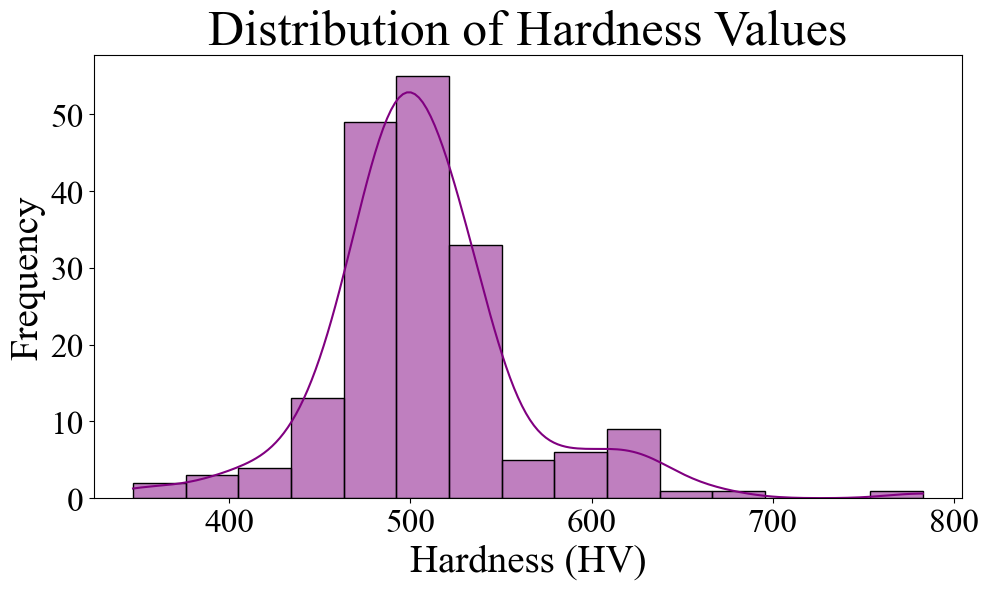

The file has been save to: C:\Users\sofia\OneDrive - Texas A&M University\Desktop\Research\ML Best Method Paper\Figures_RFR as /Hardness_Distribution.png
Plotting the hardness (target values) with error bars.


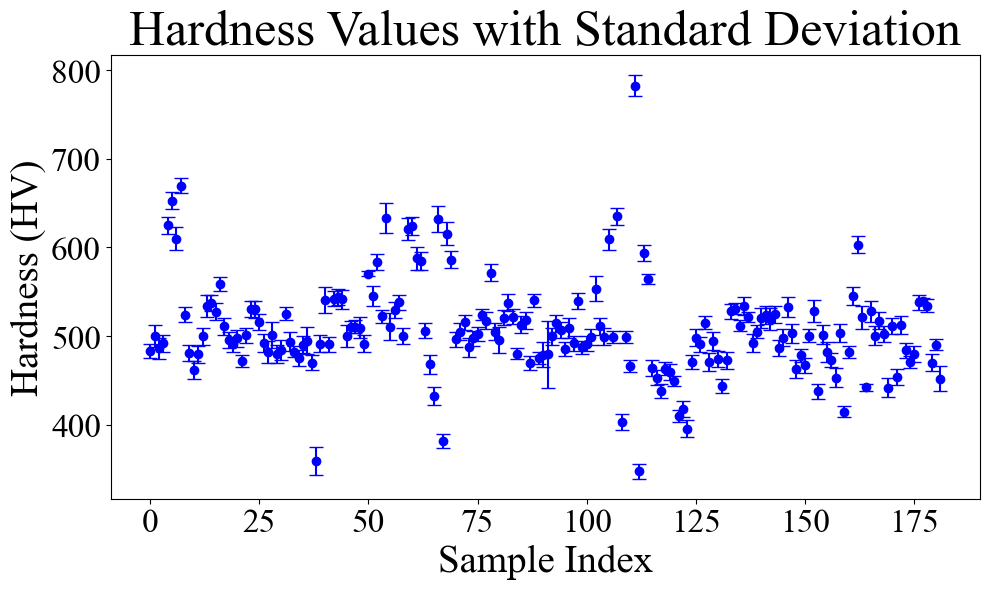

The file has been save to: C:\Users\sofia\OneDrive - Texas A&M University\Desktop\Research\ML Best Method Paper\Figures_RFR as /Hardness_with_StdDev.png
Additional information about the data is the following
count    182.000000
mean     507.737122
std       54.146793
min      347.000000
25%      480.414028
50%      500.390889
75%      527.867305
max      782.750000
Name: Hardness (HV), dtype: float64
Skewness: 0.9894833343940613
Kurtosis: 4.276425485997283
Going back to the hardness_data df due to composition string needed for CBFV creation
Path has been changed  to: C:\Users\sofia\OneDrive - Texas A&M University\Desktop\Research\cbfv and current working df is composition_df.
Working df is input_df
Jarvis database being used


Processing Input Data: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 45546.74it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 13100.00it/s]

	Creating Pandas Objects...


Jarvis contains 1314 features.
jarvis_df contains all the features from jarvis with the target value and the composition string
Magpie database being initiated


Processing Input Data: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 22039.59it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 14585.26it/s]

	Creating Pandas Objects...


Magpie contains 1314 features.
magpie_df contains all the features from magpie with the target value and the composition string
Oliynyk database being initiated


Processing Input Data: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 18200.02it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 17414.07it/s]


	Creating Pandas Objects...
Oliynyk contains 1314 features.
oliynyk_df contains all the features from magpie with the target value and the composition string


Processing Input Data: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 26066.70it/s]


	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 17886.58it/s]

	Creating Pandas Objects...


Mat2Vec contains 600 features.
mat2vec_df contains all the features from magpie with the target value and the composition string
Total number of features are: 3360
Combined database called feats contains: 182 rows and the number of columns is: 3362
Dropping any columns that have only 1 value for the full dataframe
Combined database called feats contains: 182 rows and the number of columns is: 3156
Calculating feats using the HEACalculator
Current path: C:\Users\sofia\OneDrive - Texas A&M University\Desktop\Research\ML Best Method Paper
Working df is feats_HEA
Number of unique Composition values in feats: 182
Number of rows in feats: 182
Number of unique Composition values in feats_HEA: 182
Number of rows in feats_HEA: 182
Combine the HEA into the a full feature df called feats
Feats AFTER any clean - up of any a column witonly one unique number: 3167


In [10]:
# ===============================
# 1. Plot Distribution of Hardness Values
# ===============================

print("Plotting the distribution of Hardness values...")

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["Hardness (HV)"], kde=True, color="purple", bins=15)

# Add axis labels and title
plt.xlabel("Hardness (HV)", fontsize=28)
plt.ylabel("Frequency", fontsize=28)
plt.title("Distribution of Hardness Values", fontsize=36)

# Adjust tick label size
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()

# Save the figure
distribution_plot_path = os.path.join(figures_dir, "Hardness_Distribution.png")
plt.savefig(distribution_plot_path, dpi=300)
plt.show()

print(f"Distribution plot saved at: {distribution_plot_path}")


In [ ]:
# ===============================
# 2. Plot Hardness Values with Error Bars
# ===============================

print("Plotting Hardness values with standard deviation error bars...")

# Create the error bar plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=range(len(df_filtered)), 
    y=df_filtered["Hardness (HV)"], 
    yerr=df_filtered["Hardness stdev (HV)"], 
    fmt="o", capsize=5, color="blue"
)

# Add axis labels and title
plt.xlabel("Sample Index", fontsize=28)
plt.ylabel("Hardness (HV)", fontsize=28)
plt.title("Hardness Values with Standard Deviation", fontsize=36)

# Adjust tick label size
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()

# Save the figure
error_bar_plot_path = os.path.join(figures_dir, "Hardness_with_StdDev.png")
plt.savefig(error_bar_plot_path, dpi=300)
plt.show()

print(f"Error bar plot saved at: {error_bar_plot_path}")


In [ ]:
# ===============================
# 3. Compute Basic Statistics
# ===============================

print("Computing statistical insights for Hardness values...")

# Generate summary statistics
hardness_stats = df_filtered["Hardness (HV)"].describe()
print("\nSummary Statistics:")
print(hardness_stats)

# Compute skewness and kurtosis
skewness = df_filtered["Hardness (HV)"].skew()
kurtosis = df_filtered["Hardness (HV)"].kurtosis()

print(f"\nSkewness of Hardness values: {skewness:.3f}")
print(f"Kurtosis of Hardness values: {kurtosis:.3f}")


# 🔬 **Feature Generation in Machine Learning**

Feature generation is a crucial step in machine learning, especially in **materials informatics** and **high-entropy alloy (HEA) research**. The quality of features directly impacts model accuracy and generalization. This section highlights the **importance of feature engineering** and its role in predictive modeling.

## ✅ **Why is Feature Generation Important?**
1. **Enhances Model Performance**: Well-engineered features provide **meaningful patterns** to the machine learning model, leading to improved predictive accuracy.
2. **Reduces Noise**: Irrelevant or redundant features can negatively affect model learning. Proper feature selection improves model efficiency.
3. **Domain-Specific Insights**: Features derived from materials databases (e.g., **Jarvis, Magpie, Mat2Vec, Oliynyk**) encode **chemical, physical, and electronic properties**, making predictions more **scientifically interpretable**.
4. **Essential for Complex Systems**: HEAs have unique composition-property relationships, requiring **tailored feature generation**.

## 📌 **Feature Generation Process in This Code**
1. **Data Preparation**: Extracting composition data from hardness datasets.
2. **Feature Extraction from Multiple Databases**:
   - **Jarvis**: Atomistic and molecular properties.
   - **Magpie**: Statistical elemental properties.
   - **Mat2Vec**: NLP-derived materials embeddings.
   - **Oliynyk**: Atomic and bonding characteristics.
3. **Merging and Filtering Features**:
   - Combines features from all databases.
   - Removes non-informative features (single-value columns).
4. **HEA-Specific Feature Computation**:
   - **Mixing entropy, atomic size difference, melting temperature, etc.**
   - Uses the **HEACalculator** module to extract essential **thermodynamic and structural features**.

---

📌 **Feature engineering transforms raw composition data into a structured format, enabling machine learning models to learn meaningful patterns. This step is critical for predictive accuracy in HEA research and materials discovery. 🚀**


In [ ]:
# ===============================
# 4. Prepare Data for CBFV Feature Generation
# ===============================

print("Preparing composition data for CBFV feature generation...")

# Make a copy of the hardness data for feature extraction
composition_df = hardness_data.copy()

# Define the path to the CBFV module
PATH_CBFV = "C:\\Users\\sofia\\OneDrive - Texas A&M University\\Desktop\\Research\\cbfv"
os.chdir(PATH_CBFV)
sys.path.append(os.path.join(PATH_CBFV, "cbfv"))

import composition  # Import CBFV composition processing library

print(f"Current working directory changed to: {os.getcwd()}")

# Add target and formula columns required for CBFV feature extraction
composition_df["target"] = composition_df["V_Hardness_response"]  # Can be left as NaN
composition_df["formula"] = composition_df["Composition"]

# Extract relevant columns
input_df = composition_df[["formula", "target"]]
print("Prepared input DataFrame for CBFV feature generation.")


# ===============================
# 5. Generate Features from Multiple Databases
# ===============================

# Define a function to extract features from a given database
def generate_features_from_db(db_name):
    print(f"\nExtracting features using {db_name} database...")
    feats, y, formulae_train, skipped_train = composition.generate_features(
        input_df, elem_prop=db_name, drop_duplicates=False, extend_features=False, sum_feat=False
    )
    print(f"{db_name} contains {len(feats.columns)} features.")

    # Store extracted features into a DataFrame
    db_df = feats.copy()
    db_df["Hardness (HV)"] = y
    db_df["Composition"] = formulae_train

    return db_df

# Extract features from different databases
jarvis_df = generate_features_from_db("jarvis")
magpie_df = generate_features_from_db("magpie")
oliynyk_df = generate_features_from_db("oliynyk")
mat2vec_df = generate_features_from_db("mat2vec")

# ===============================
# 6. Merge All Feature DataFrames
# ===============================

print("\nMerging all feature datasets into a single DataFrame...")

feats = (
    jarvis_df.merge(magpie_df, on=["Composition", "Hardness (HV)"], how="inner")
             .merge(oliynyk_df, on=["Composition", "Hardness (HV)"], how="inner")
             .merge(mat2vec_df, on=["Composition", "Hardness (HV)"], how="inner")
)

print(f"Final combined dataset has {feats.shape[0]} rows and {feats.shape[1]} columns.")

# Drop columns with a single unique value (not useful for modeling)
print("\nDropping columns with only one unique value...")
feats = feats.loc[:, feats.nunique() > 1]
print(f"Final dataset after column filtering: {feats.shape[1]} columns.")


# ===============================
# 7. Compute High-Entropy Alloy (HEA) Features
# ===============================

print("\nCalculating HEA features...")

# Create an empty DataFrame to store HEA features
feats_HEA = pd.DataFrame()
feats_HEA["Composition"] = feats["Composition"]

# Define HEA features to compute
hea_features = [
    "Density", "Mixing Enthalpy", "Valance Electron Concentration", "Melting Temperature",
    "Atomic Size Diff.", "Mixing Entropy", "Omega Param.", "Gamma Param.",
    "Lambda Param.", "Formation Enthalpy", "Min. Formation Enthalpy"
]

# Initialize columns with None values
for feature in hea_features:
    feats_HEA[f"HEACalculator-{feature}"] = None

# Compute HEA features for each composition
for i in feats_HEA.index:
    try:
        alloy = feats_HEA.loc[i, "Composition"]
        calc_alloy = HEACalculator(alloy.replace(" ", ""))

        # Assign computed values to corresponding columns
        for feature in hea_features:
            column_name = f"HEACalculator-{feature}"
            feats_HEA.at[i, column_name] = getattr(calc_alloy, feature.lower().replace(" ", "_"))

    except Exception as e:
        print(f"Error processing {alloy}: {e}")

print("\nHEA feature computation completed.")


# ===============================
# 8. Merge HEA Features with Main Dataset
# ===============================

print("\nMerging HEA features with the main dataset...")

# Merge HEA features into the main feature dataset
feats = feats.merge(feats_HEA, on="Composition", how="inner")

# Remove columns with a single unique value
feats = feats.loc[:, feats.apply(lambda col: col.nunique() > 1)]

print(f"Final dataset after merging HEA features: {feats.shape[1]} columns.")


# 🎯 **Feature Selection: Importance and RFE Implementation**

## ✅ **Why is Feature Selection Important?**
Feature selection plays a **critical role** in machine learning by:
- **Enhancing Model Performance**: Reducing irrelevant features improves generalization and minimizes overfitting.
- **Reducing Computational Cost**: Lowering the number of features speeds up training and inference.
- **Improving Interpretability**: A more concise feature set makes it easier to understand **which variables impact predictions**.

## 🔍 **Recursive Feature Elimination (RFE)**
**RFE (Recursive Feature Elimination)** is a powerful feature selection technique that systematically removes less important features while training a machine learning model.

### 🛠 **How RFE Works**
1. **Trains a model** (e.g., Random Forest, Ridge, Gradient Boosting) using all features.
2. **Ranks features** based on importance scores.
3. **Removes the least important features** and retrains the model.
4. **Repeats the process** until the desired number of features remains.

### 📊 **Pros and Cons of RFE**

| Pros ✅ | Cons ❌ |
|-----------|----------|
| Works well with **non-linear models** | Computationally **expensive** for large datasets |
| Can be used with **any ML model** | May **select different features** for different model types |
| Helps identify the **most predictive features** | Requires **hyperparameter tuning** for optimal performance |
| Reduces risk of **overfitting** | May not work well if **all features are equally important** |

---

## 📌 **RFE Implementation in This Code**
1. **Dataset Preparation**: Defines **features (X)** and **target variable (y)**.
2. **Chunking for Efficiency**: Since RFE can be computationally expensive, the dataset is split into **smaller 50-row chunks**.
3. **Model Selection**: Uses **Random Forest Regressor** as the base model for feature selection.
4. **Parallelized RFE Execution**: Runs **RFE in parallel** across multiple chunks to speed up computation.
5. **Feature Mask Aggregation**: Combines results from all chunks to retain only the **most important features**.
6. **Dimensionality Reduction**: Applies the final feature mask to reduce the dataset size, improving efficiency.

---

📌 **By using RFE, we ensure that only the most relevant features contribute to the model, leading to better predictions, faster training, and improved interpretability. 🚀**


In [5]:
# ===============================
# 1. Define Features and Target
# ===============================
# The target variable (y) is the Hardness (HV), which we want to predict.
# The feature matrix (X) includes all features except 'Composition' and 'Hardness (HV)'.
y = feats["Hardness (HV)"]
X = feats.drop(columns=["Composition", "Hardness (HV)"])

# Ensure X and y have aligned indices before proceeding
X, y = X.align(y, axis=0, join="inner")

# ===============================
# 2. Split Data into Chunks for Efficient Processing
# ===============================
# RFE can be computationally expensive, especially with thousands of features.
# To improve efficiency on a personal laptop, we split the dataset into chunks of 50 rows each.
chunk_size = 50  # Define chunk size

# Convert feature matrix (X) and target vector (y) into chunks
X_chunks = np.array_split(X.values, len(X) // chunk_size)
y_chunks = np.array_split(y.values, len(y) // chunk_size)

# Debugging: Display chunk sizes to verify correctness
print("\nDebugging Chunk Sizes:")
print("X_chunks sizes:", [chunk.shape[0] for chunk in X_chunks])
print("y_chunks sizes:", [chunk.shape[0] for chunk in y_chunks])

# Ensure each X_chunk has a corresponding y_chunk
for i, (X_chunk, y_chunk) in enumerate(zip(X_chunks, y_chunks)):
    assert X_chunk.shape[0] == len(y_chunk), f"Mismatch in chunk {i}: X_chunk has {X_chunk.shape[0]} rows, y_chunk has {len(y_chunk)} rows"

# ===============================
# 3. Configure the RFE Base Model
# ===============================
# We use a Random Forest Regressor as the base model for RFE.
# Hyperparameters:
#   - n_estimators = 50  (Number of trees in the forest)
#   - max_depth = 10  (Limits tree depth to control overfitting)
#   - n_jobs = -1  (Utilizes all available CPU cores for faster computation)
#   - random_state = 42  (Ensures reproducibility of results)
model = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=50, max_depth=10)

# Alternative models for comparison (uncomment if needed):
# model = LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)  # LightGBM
# model = Ridge(alpha=1.0)  # Ridge Regression (L2 regularization)
# model = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)  # Gradient Boosting
# model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)  # XGBoost

# ===============================
# 4. Apply Recursive Feature Elimination (RFE)
# ===============================
# RFE works by iteratively eliminating the least important features based on model performance.
# Here, we aim to select the **top 15 most important features** per chunk.
n_features = 15  # Define the number of features to retain in each chunk

print("\nStarting parallel RFE...")

# Run RFE in parallel across all chunks for faster execution
feature_masks = Parallel(n_jobs=-1)(
    delayed(rfe_parallel)(X_chunk, y_chunk, model, n_features, i)
    for i, (X_chunk, y_chunk) in enumerate(zip(X_chunks, y_chunks))
)

# ===============================
# 5. Debugging: Inspect Feature Selection Results
# ===============================
# Each chunk produces a binary mask indicating the selected features.
print("\nDebugging Feature Masks:")
for i, mask in enumerate(feature_masks):
    print(f"Chunk {i} - Mask shape: {mask.shape}, Selected features: {np.sum(mask)}")

# ===============================
# 6. Aggregate Results Across Chunks
# ===============================
# Since RFE is applied to individual chunks, we need to aggregate results.
# We use a **union operation** (logical OR) to retain features that were selected in any chunk.
final_mask = np.any(feature_masks, axis=0)

# Debugging: Check the final combined feature mask
print("\nDebugging Final Mask:")
print(f"Final mask shape: {final_mask.shape}, Total selected features: {np.sum(final_mask)}")

# ===============================
# 7. Apply Feature Mask to Reduce Dimensionality
# ===============================
# Use the final mask to filter out unselected features from the dataset
X_reduced = X.loc[:, final_mask]

# Debugging: Verify the reduced dataset dimensions
print("\nDebugging Reduced Dataset:")
print(f"Original dataset shape: {X.shape}")
print(f"Reduced dataset shape: {X_reduced.shape}")

# ===============================
# Summary of RFE Process:
# ===============================
# 1. Features and target were defined.
# 2. Dataset was split into 50-row chunks to manage computational load.
# 3. RFE was applied in parallel using a Random Forest Regressor.
# 4. Feature selection results from each chunk were aggregated.
# 5. The final reduced dataset retains only the most informative features.


Debugging Chunk Sizes:
X_chunks sizes: [61, 61, 60]
y_chunks sizes: [61, 61, 60]
Starting parallel RFE...
Debugging Feature Masks:
Chunk 0 - Mask shape: (3165,), Selected features: 15
Chunk 1 - Mask shape: (3165,), Selected features: 15
Chunk 2 - Mask shape: (3165,), Selected features: 15
Debugging Final Mask:
Final mask shape: (3165,), Total selected features: 43
Debugging Reduced Dataset:
Original dataset shape: (182, 3165)
Reduced dataset shape: (182, 43)


# 📌 **Using Mutual Information (MI) for Feature Selection**

## 🔹 **What is Mutual Information (MI)?**
Mutual Information (MI) is a **measure of dependency** between two variables. It quantifies how much knowing one variable **reduces uncertainty** about the other. Unlike correlation, MI can **capture both linear and non-linear relationships**, making it a powerful tool for feature selection in machine learning.

---

## 🔍 **Why Use MI for Feature Selection?**
Feature selection using MI helps:
1. **Identify the most relevant features** that contain useful information about the target variable.
2. **Remove redundant or uninformative features**, reducing dimensionality and improving model efficiency.
3. **Capture complex dependencies** between features and the target, unlike correlation-based methods which only capture linear relationships.
4. **Enhance model interpretability** by focusing on the most important variables.

---

## 🛠 **Steps in Feature Selection Using MI**
1. **Compute MI Scores Between Features and the Target Variable**  
   - High MI scores indicate strong dependency with the target, making those features important.
   
2. **Filter Features with High MI Scores Among Themselves**  
   - Features with high pairwise MI scores may be redundant. Keeping only the feature with the highest MI with the target helps **avoid multicollinearity**.
   
3. **Remove Highly Correlated Features**  
   - While MI detects dependencies, it's important to also remove features that are strongly correlated to prevent redundancy.

4. **Evaluate the Final Feature Set**  
   - Ensure that the selected features still cover the most important information for predictive modeling.

---

## ⚖️ **Pros and Cons of Using MI for Feature Selection**
| **Pros** | **Cons** |
|----------|----------|
| Captures **both linear and non-linear** relationships | Computationally expensive for high-dimensional data |
| Reduces feature redundancy | MI does not consider direction (positive/negative correlation) |
| Helps improve model **performance & interpretability** | Requires careful threshold tuning |

---

📌 **By using MI to select features, we improve model performance, reduce overfitting, and create a more interpretable predictive model!** 🚀


Moving on to MI
The minimum MI Score is: 0.05249038852666965
The maximum MI Score is: 0.36328834989415615


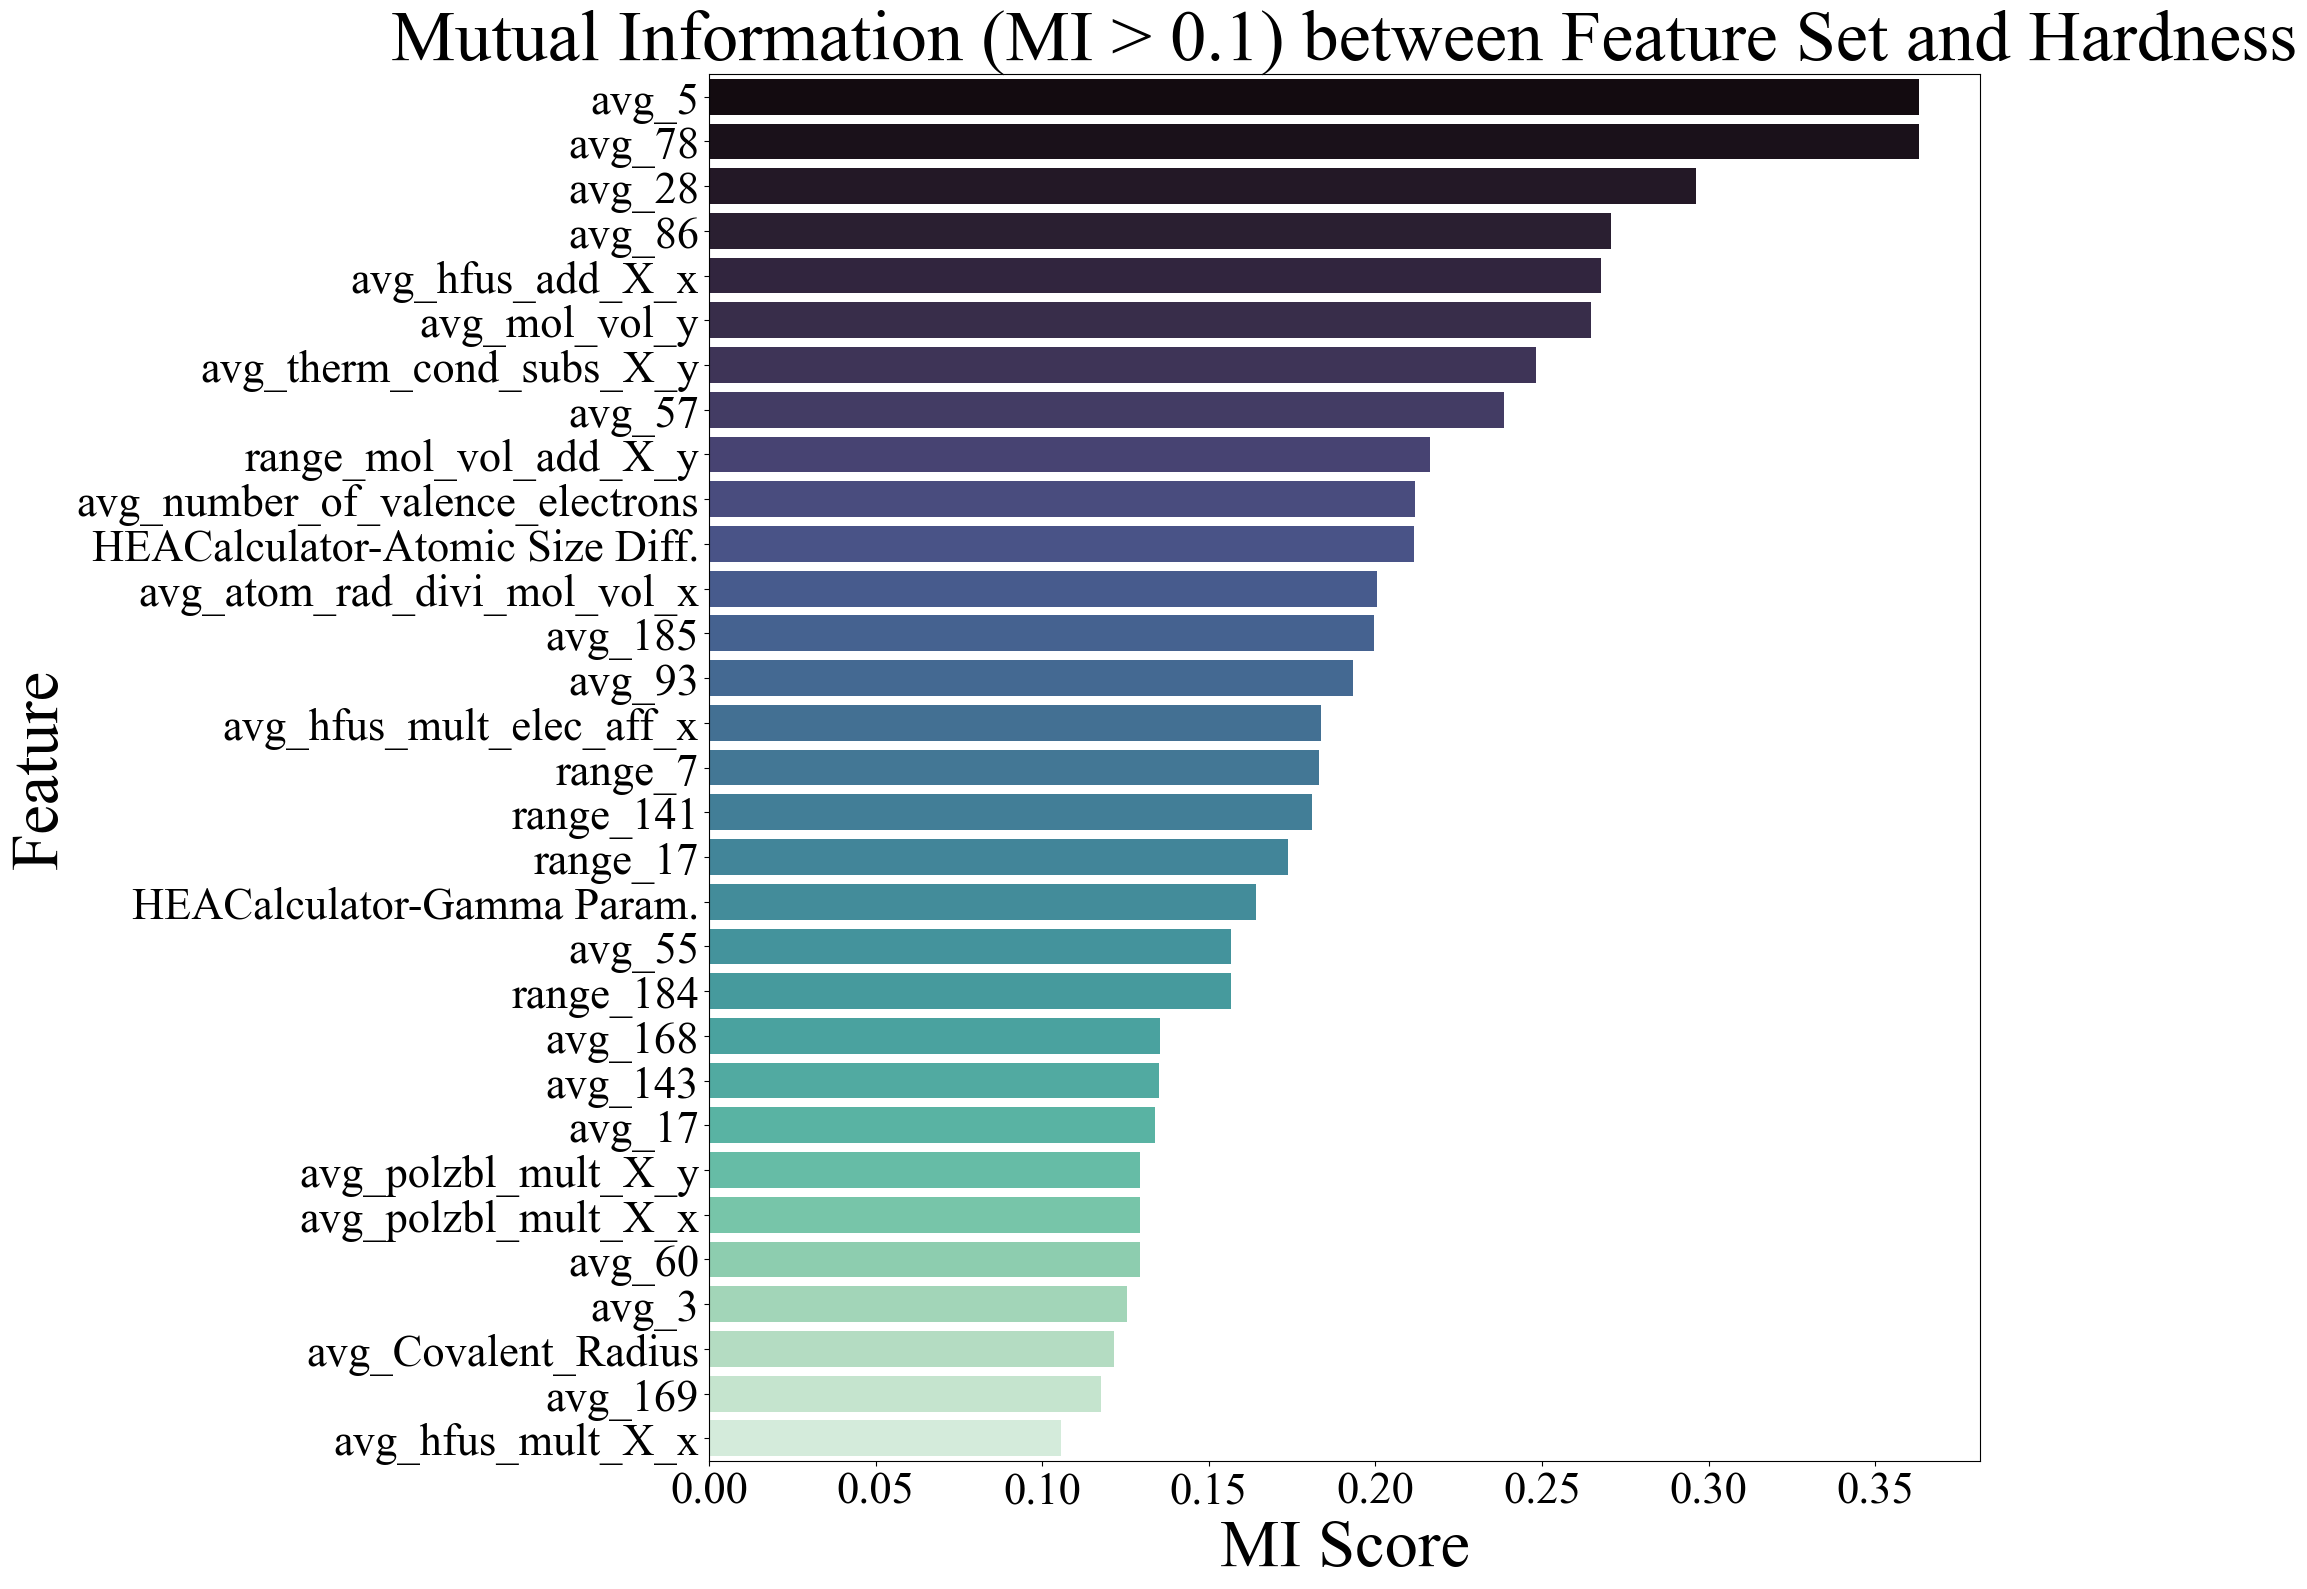

The features have been reduced to: 31


In [6]:
print("\nMoving on to Mutual Information (MI) Calculation...")

# ===============================
# 1. Compute Mutual Information Scores
# ===============================
# Mutual Information (MI) measures the dependency between each feature and the target variable (Hardness).
# A higher MI score indicates a stronger relationship between a feature and the target.

# Compute MI scores for each feature in X_reduced with respect to the target variable (y)
mi_scores = mutual_info_regression(X_reduced, y)

# Create a DataFrame to store feature names and their respective MI scores
mi_target_df = pd.DataFrame({
    "Feature": X_reduced.columns,  # Feature names
    "MI with Target": mi_scores  # Corresponding MI scores
})

# Display the range of MI scores for debugging
print(f"\nMinimum MI Score: {mi_target_df['MI with Target'].min()}")
print(f"Maximum MI Score: {mi_target_df['MI with Target'].max()}")

# ===============================
# 2. Filter Features Based on MI Score
# ===============================
# To select only the most informative features, we apply a filter:
#   - Features must have MI scores greater than 0.1 (to ensure meaningful impact)
#   - Features must have MI scores less than 0.4 (to avoid overly dominant features)
filtered_features_sorted = mi_target_df[
    (mi_target_df["MI with Target"] > 0.1) & (mi_target_df["MI with Target"] < 0.4)
].sort_values(by="MI with Target", ascending=False)  # Sort by MI score (descending)

# Extract the names of the selected features
filtered_feature_names = filtered_features_sorted["Feature"].tolist()

# ===============================
# 3. Plot MI Scores for Selected Features
# ===============================
# This visualization helps understand which features have the highest impact on the target variable.

plt.figure(figsize=(20, 16))  # Set figure size

# Create a horizontal bar plot of MI scores
sns.barplot(
    x="MI with Target", y="Feature", 
    data=filtered_features_sorted.reset_index(drop=True), 
    hue="Feature", dodge=False, legend=False, palette="mako"
)

# Formatting the plot for readability
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.title("Mutual Information (MI > 0.1) Between Feature Set and Hardness", fontsize=52)
plt.xlabel("MI Score", fontsize=48)
plt.ylabel("Feature", fontsize=48)

# Adjust layout and save the figure
plt.subplots_adjust(top=0.5)
plt.tight_layout()
mi_plot_path = figures_dir + "/MI_Between_Features_and_Target.png"
plt.savefig(mi_plot_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"\nMI Score plot saved at: {mi_plot_path}")

# ===============================
# 4. Retain Only Selected Features
# ===============================
# We now filter the original dataset to keep only the features with MI scores within the defined range.

X_filtered = X_reduced[filtered_feature_names]

# Display the final number of features retained
print(f"\nThe number of selected features after MI filtering: {len(X_filtered.columns)}")


In [ ]:
# ===============================
# 1. Compute Pairwise MI Scores Between Features
# ===============================

print("\nCalculating Pairwise MI Scores...")

# Step 1: Initialize an empty matrix to store the MI scores
# - The matrix will have dimensions (n_features x n_features)
# - Each value (i, j) will store the MI score between feature_i and feature_j
n_features = X_filtered.shape[1]
mi_matrix = np.zeros((n_features, n_features))  # Initialize with zeros

# Step 2: Compute Mutual Information (MI) scores for each pair of features
# - We only compute values for the **upper triangle** of the matrix to avoid redundant calculations
for i in range(n_features):
    for j in range(i + 1, n_features):  # Skip self-comparisons and duplicate pairs
        mi_matrix[i, j] = mutual_info_score(X_filtered.iloc[:, i], X_filtered.iloc[:, j])

# Step 3: Mirror the upper triangle to the lower triangle to complete the symmetric matrix
# - This ensures we have MI scores in both (i, j) and (j, i) positions
for i in range(n_features):
    for j in range(i + 1, n_features):
        mi_matrix[j, i] = mi_matrix[i, j]  # Copy values

# Step 4: Convert the MI matrix into a DataFrame for easier interpretation
mi_df = pd.DataFrame(mi_matrix, index=X_filtered.columns, columns=X_filtered.columns)

# Step 5: Display the maximum and minimum MI scores in the matrix
print(f"\nMaximum MI score (full matrix): {np.max(mi_matrix)}")
print(f"Minimum MI score (excluding zeros): {np.min(mi_matrix[mi_matrix > 0])}")  # Ignore zeros

# ===============================
# 2. Identify Feature Pairs with High MI Scores
# ===============================

# Step 6: Define a threshold for **high pairwise MI scores**
# - Features with MI scores **above this threshold** are likely redundant
pairwise_threshold = 4.0

# Step 7: Identify feature pairs where the MI score exceeds the threshold
filtered_pairs = []
for i in range(n_features):
    for j in range(i + 1, n_features):  # Avoid self-comparison and duplicates
        if mi_matrix[i, j] > pairwise_threshold:
            filtered_pairs.append((X_filtered.columns[i], X_filtered.columns[j], mi_matrix[i, j]))

# Step 8: Store these high-MI feature pairs in a DataFrame for review
filtered_pairs_df = pd.DataFrame(filtered_pairs, columns=["Feature 1", "Feature 2", "Pairwise MI"])

# ===============================
# 3. Retain the Feature with Higher MI with the Target
# ===============================

print("\nSelecting Features Based on Target MI Scores...")

# Step 9: Start with all features included in the selected feature set
selected_features = set(X_filtered.columns)

# Step 10: For each pair of correlated features, remove the one with a lower MI score with the target
for _, row in filtered_pairs_df.iterrows():
    feature1 = row["Feature 1"]
    feature2 = row["Feature 2"]

    # Retrieve MI scores with the target for both features
    mi1 = mi_target_df.loc[mi_target_df["Feature"] == feature1, "MI with Target"].values[0]
    mi2 = mi_target_df.loc[mi_target_df["Feature"] == feature2, "MI with Target"].values[0]

    # Retain the feature with the **higher** MI score with the target variable
    if mi1 >= mi2:
        selected_features.discard(feature2)  # Remove feature2 if it has a lower MI score
    else:
        selected_features.discard(feature1)  # Remove feature1 if it has a lower MI score

# ===============================
# 4. Verify Final Feature Set After MI Filtering
# ===============================

print("\nVerifying Final Feature Set...")

# Step 11: Convert selected features to a list and initialize a new MI matrix
selected_features = list(selected_features)
reduced_mi_matrix = np.zeros((len(selected_features), len(selected_features)))

# Step 12: Compute pairwise MI scores for the **reduced feature set**
for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)):  # Avoid self-comparison and duplicates
        reduced_mi_matrix[i, j] = mutual_info_score(
            X_filtered[selected_features[i]],
            X_filtered[selected_features[j]]
        )

# Step 13: Display the new min/max MI scores in the **reduced** feature set
print(f"\nMaximum MI score (reduced set): {np.max(reduced_mi_matrix)}")
print(f"Minimum MI score (excluding zeros): {np.min(reduced_mi_matrix[reduced_mi_matrix > 0])}")

# Step 14: Make the matrix symmetric by mirroring the upper triangle
for i in range(len(reduced_mi_matrix)):
    for j in range(i + 1, len(reduced_mi_matrix)):
        reduced_mi_matrix[j, i] = reduced_mi_matrix[i, j]  # Copy values

# Step 15: Ensure all remaining feature pairs meet the MI threshold constraint
assert np.all(reduced_mi_matrix < pairwise_threshold), "Pairwise MI scores exceed the threshold!"

# ===============================
# 5. Plot Heatmap of Pairwise MI Scores for Reduced Features
# ===============================

print("\nPlotting Heatmap of Pairwise MI Scores for the Reduced Feature Set...")

# Step 16: Convert the reduced MI matrix into a DataFrame
reduced_mi_df = pd.DataFrame(reduced_mi_matrix, index=selected_features, columns=selected_features)

# Step 17: Create the heatmap visualization
plt.figure(figsize=(20, 16))
sns.heatmap(
    reduced_mi_df, annot=True, cmap="crest", cbar=True, square=True, annot_kws={"fontsize": 32}
)

# Step 18: Format the heatmap for readability
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=32)

# Add title and labels with large fonts
plt.title("Heatmap of Pairwise Mutual Information < 4.0", fontsize=40)
plt.xlabel("Features", fontsize=38)
plt.ylabel("Features", fontsize=38)

# Improve tick labels
plt.xticks(fontsize=32, rotation=90)  # Rotate labels for readability
plt.yticks(fontsize=32, rotation=0)
plt.tight_layout()

# Step 19: Save the heatmap as a high-resolution image
mi_heatmap_path = figures_dir + "/Pairwise_MI.png"
plt.savefig(mi_heatmap_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"\nHeatmap saved at: {mi_heatmap_path}")

# ===============================
# 6. Apply Final Feature Selection
# ===============================

# Step 20: Keep only the selected features in the final dataset
X_filtered_MI = X_filtered[selected_features]

# Step 21: Display the final number of retained features
print(f"\nReduced feature set created: {X_filtered_MI.shape[1]} features retained.")

In [ ]:
# ===============================
# 1. Calculate Correlation Between Features and Target Variable
# ===============================

print("\nCalculating correlation between features and the target variable...")

# Step 1: Compute Pearson Correlation Coefficients
# - This calculates the linear relationship between each feature and the target variable.
# - Values range from -1 to 1:
#     * +1 → Strong positive correlation (as X increases, y increases)
#     *  0 → No correlation
#     * -1 → Strong negative correlation (as X increases, y decreases)
correlation_matrix = X_filtered_MI.corrwith(y)

# ===============================
# 2. Filter Features Based on Correlation Threshold
# ===============================

# Step 2: Define a correlation threshold
# - We remove features that have a strong correlation (>|threshold|)
# - Keeping only features that have an **absolute correlation value below 0.5**
correlation_threshold = 0.5
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() < correlation_threshold]

# ===============================
# 3. Select Features That Meet the Correlation Constraint
# ===============================

# Step 3: Check if any features remain after filtering
if filtered_correlation_matrix.empty:
    print("No features meet the correlation threshold. No further filtering applied.")
else:
    # Step 4: Select the remaining features
    selected_variables = filtered_correlation_matrix.index
    X_filtered_PCC = X_filtered_MI[selected_variables]  # Keep only selected features

    print(f"\nNumber of features retained after correlation filtering: {len(X_filtered_PCC.columns)}")

    # ===============================
    # 4. Visualize Correlation of Selected Features with Target Variable
    # ===============================

    print("\nPlotting correlation between selected features and the target variable...")

    plt.figure(figsize=(20, 12))  # Set figure size

    # Step 5: Create a bar plot showing correlation values
    sns.barplot(
        x=filtered_correlation_matrix.values,  # X-axis: Correlation values
        y=selected_variables,  # Y-axis: Feature names
        dodge=False,  # Ensure each bar is separate
        palette="husl"  # Use a visually appealing color palette
    )

    # Step 6: Format the plot for readability
    plt.title(f'Correlation Between Features and Target\n(Coefficient < {correlation_threshold})', fontsize=36)
    plt.xlabel('Correlation with Target', fontsize=34)
    plt.ylabel('Features', fontsize=34)

    # Step 7: Adjust tick label sizes
    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)

    # Step 8: Adjust layout and save the figure
    plt.tight_layout()
    correlation_plot_path = figures_dir + "/PCC_between_Feats_y.png"
    plt.savefig(correlation_plot_path, dpi=300, bbox_inches="tight")

    # Step 9: Display the plot
    plt.show()

    print(f"\nCorrelation plot saved at: {correlation_plot_path}")

# 📌 **Using Pearson Correlation Coefficient (PCC) for Feature Selection**

## 🔹 **What is Pearson Correlation Coefficient (PCC)?**
The **Pearson Correlation Coefficient (PCC)** measures the **linear relationship** between two variables. It quantifies how strongly a feature is correlated with the target variable, ranging from **-1 to +1**:

- **+1** → Perfect **positive correlation** (as one increases, the other increases)
- **0** → No correlation
- **-1** → Perfect **negative correlation** (as one increases, the other decreases)

---

## 🔍 **Why Use PCC for Feature Selection?**
Feature selection using PCC helps:
1. **Identify highly relevant features** that have a strong impact on the target variable.
2. **Remove weakly correlated features**, reducing noise and improving model efficiency.
3. **Eliminate multicollinearity** by dropping one of two highly correlated features.
4. **Enhance interpretability** by ensuring only meaningful features are included in the model.

---

## 🛠 **Steps in Feature Selection Using PCC**
1. **Calculate the PCC Between Each Feature and the Target Variable**  
   - Features with absolute PCC values **close to 1** are important for prediction.
   
2. **Apply a Correlation Threshold**  
   - Features with a weak correlation (e.g., **|PCC| < 0.5**) are considered unimportant and removed.

3. **Remove Redundant Features**  
   - If two features are highly correlated (**|PCC| > 0.8**), only one is retained to avoid redundancy.

4. **Visualize Feature Correlations**  
   - A **correlation heatmap** helps to analyze relationships between features and the target variable.

---

## ⚖️ **Pros and Cons of Using PCC for Feature Selection**
| **Pros** | **Cons** |
|----------|----------|
| Simple and computationally efficient | Only captures **linear** relationships |
| Helps in **removing redundant features** | Cannot detect **non-linear dependencies** |
| Easy to interpret | Sensitive to **outliers**, which can distort correlation values |

---

📌 **By using PCC for feature selection, we ensure that our model retains only the most predictive features while avoiding redundant or irrelevant ones, leading to better performance and interpretability!** 🚀


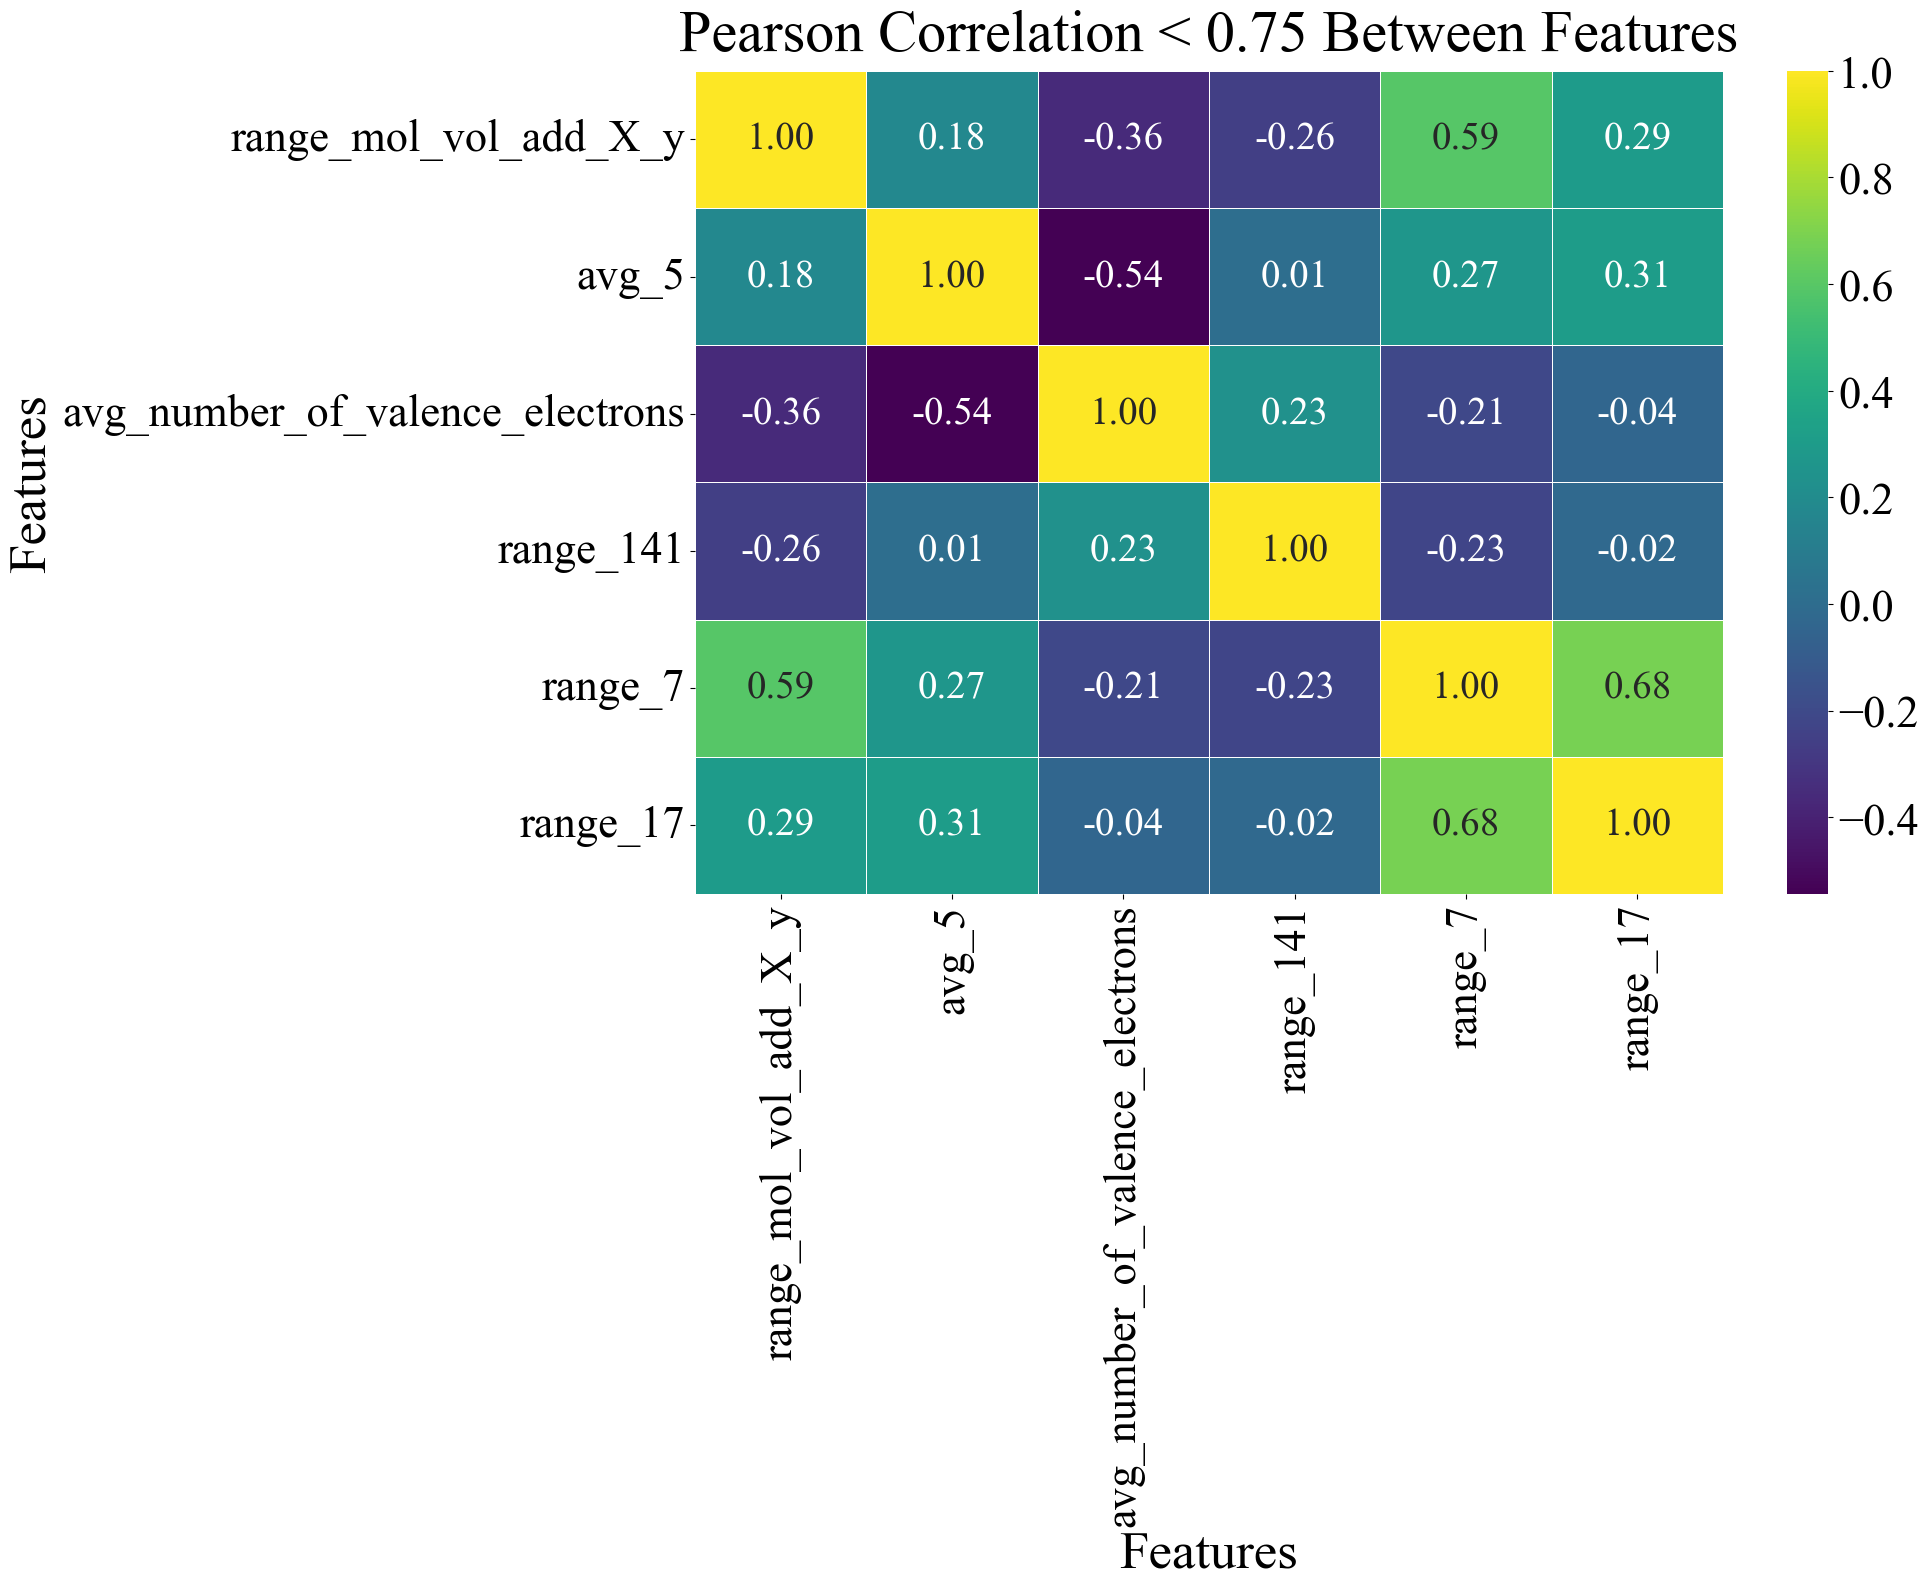

Reduced feature set includes 6 features.


In [9]:
# ===============================
# 1. Calculate Pairwise Correlation Between Features
# ===============================

print("\nCalculating pairwise correlation between features...")

# Step 1: Compute the Pearson Correlation Matrix
# - This matrix shows how each feature correlates with every other feature.
# - We take the **absolute values** because we are only interested in the strength of correlation, not its direction.
pairwise_corr_matrix = X_filtered_PCC.corr().abs()  # Compute absolute correlation values

# ===============================
# 2. Identify Highly Correlated Feature Pairs
# ===============================

# Step 2: Define a threshold for high correlation
# - Features with a correlation **above this threshold** are considered redundant.
pairwise_threshold = 0.75  # Set the correlation threshold (can be adjusted)

# Step 3: Find pairs of features that exceed the correlation threshold
# - `np.where()` finds the indices of elements in the matrix that exceed the threshold.
correlated_pairs = np.where(pairwise_corr_matrix > pairwise_threshold)

# Step 4: Convert the index positions into feature names
# - We only keep unique pairs by ensuring `i < j` (avoiding duplicates).
correlated_pairs = [(pairwise_corr_matrix.index[i], pairwise_corr_matrix.columns[j]) 
                    for i, j in zip(*correlated_pairs) if i != j and i < j]

print(f"\nIdentified {len(correlated_pairs)} highly correlated feature pairs.")

# ===============================
# 3. Drop Features with Higher Correlation to the Target Variable
# ===============================

print("\nSelecting which features to drop based on target correlation...")

# Step 5: Compute the correlation of each feature with the target variable (Hardness)
# - This helps us decide which feature to keep when two are highly correlated.
target_corr = X_filtered_PCC.corrwith(y).abs()  # Compute absolute correlation with target

# Step 6: Initialize an empty set to store features that will be dropped
features_to_drop = set()

# Step 7: Iterate through the correlated feature pairs
# - We drop the feature with the **lower correlation** to the target variable.
for feature1, feature2 in correlated_pairs:
    if target_corr[feature1] >= target_corr[feature2]:
        features_to_drop.add(feature2)  # Drop feature2 if feature1 has a stronger correlation with the target
    else:
        features_to_drop.add(feature1)  # Drop feature1 if feature2 has a stronger correlation with the target

print(f"\nNumber of features marked for removal: {len(features_to_drop)}")

# Step 8: Remove the identified features from the dataset
filtered_df = X_filtered_PCC.drop(columns=list(features_to_drop))

# ===============================
# 4. Plot Heatmap of Reduced Feature Set
# ===============================

print("\nPlotting heatmap of the reduced feature set...")

# Step 9: Compute the correlation matrix for the remaining features
filtered_corr_matrix = filtered_df.corr()

# Step 10: Create a heatmap to visualize the correlations
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(
    filtered_corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, annot_kws={"size": 28}
)

# Step 11: Format the heatmap for readability
plt.title("Pearson Correlation < 0.75 Between Features", fontsize=42, pad=15)
plt.xlabel("Features", fontsize=38)
plt.ylabel("Features", fontsize=38)
plt.xticks(fontsize=32, rotation=90)  # Rotate feature names for readability
plt.yticks(fontsize=32, rotation=0)

# Step 12: Customize colorbar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=32)

# Step 13: Save the heatmap as a high-resolution image
pcc_heatmap_path = figures_dir + "/Pairwise_PCC.png"
plt.tight_layout()
plt.savefig(pcc_heatmap_path, dpi=300, bbox_inches="tight")

# Step 14: Display the heatmap
plt.show()

print(f"\nHeatmap saved at: {pcc_heatmap_path}")

# ===============================
# 5. Summary of Results
# ===============================

# Step 15: Display the final number of retained features
print(f"\nReduced feature set includes {len(filtered_df.columns)} features.")


# 📌 **Data Preprocessing: The Key to Reliable Model Performance**

## 🔹 **Why is Data Preprocessing Important?**
Preprocessing ensures that machine learning models work efficiently by transforming raw data into a suitable format. It involves:
- **Scaling Features:** Standardizing or normalizing features to bring them to a common range.
- **Handling Different Data Distributions:** Some models perform better with normalized data, while others require standardization.
- **Splitting Data into Training & Testing Sets:** Ensuring the model generalizes well by evaluating performance on unseen data.

---

## 🔍 **What Does This Preprocessing Function Do?**
This function applies multiple **scaling techniques** and **splits the dataset** into training and testing sets:
1. **Define Different Scaling Techniques**  
   - **Unprocessed:** No transformation applied.  
   - **StandardScaler:** Standardization (zero mean, unit variance).  
   - **MinMaxScaler:** Normalization (scales data between 0 and 1).  
   - **Normalizer:** Normalizes row-wise to unit norm.

2. **Apply Scaling to Features (X) and Target Variable (y)**  
   - Ensures consistency in feature magnitudes for better model performance.

3. **Split Data into Training and Testing Sets**  
   - Splits the dataset into **80% training and 20% testing**, ensuring the model can generalize.

4. **Organize the Processed Data for Different Scaling Methods**  
   - Stores train-test splits for each scaling technique separately.

---

## ⚖️ **When to Use Different Scaling Techniques?**
| **Scaling Method** | **When to Use?** | **Best For?** |
|--------------------|-----------------|---------------|
| **Unprocessed** | When raw data is already normalized | Tree-based models (e.g., Random Forest, Decision Trees) |
| **StandardScaler** | When data follows a normal distribution | Linear models (e.g., Lasso, Ridge, SVR) |
| **MinMaxScaler** | When data needs to be in a fixed range (0-1) | Neural networks, KNN, Gradient Boosting |
| **Normalizer** | When working with distance-based models | K-Nearest Neighbors (KNN), clustering |

---

## 🎯 **Key Takeaways**
- **Feature scaling improves model performance and convergence speed.**  
- **Choosing the right scaling method is crucial for different algorithms.**  
- **Splitting data ensures a reliable evaluation of model performance.**

📌 **By applying these preprocessing techniques, we enhance model stability, accuracy, and interpretability! 🚀**


In [11]:
# ===============================
# Function: preprocessing_data
# ===============================
def preprocessing_data(X, y, test_size=0.2):
    """
    Preprocesses the input features (X) and target variable (y) by applying multiple scaling techniques.
    Then, splits the data into training and testing sets.

    Parameters:
    - X (pd.DataFrame): The feature dataset.
    - y (pd.Series or pd.DataFrame): The target variable.
    - test_size (float): The proportion of data to be used as the test set.

    Returns:
    - processed_data_X_train_test (dict): Dictionary containing train/test splits for scaled X datasets.
    - processed_data_y_train_test (dict): Dictionary containing train/test splits for scaled y datasets.
    - scaler_objects_X (dict): Dictionary storing scaler objects used for X transformations.
    - scaler_objects_y (dict): Dictionary storing scaler objects used for y transformations.
    """

    # ===============================
    # 1. Define Different Scaling Techniques
    # ===============================

    # Dictionary to store different scaling methods for feature set X
    scalers_X = {
        'Unprocessed': None,  # No scaling applied
        'StandardScaler': StandardScaler(),  # Standardization (zero mean, unit variance)
        'MinMaxScaler': MinMaxScaler(),  # Normalization (scales between 0 and 1)
        'Normalizer': Normalizer()  # Normalization (scales row-wise to unit norm)
    }

    # Dictionary to store different scaling methods for target variable y
    scalers_y = {
        'Unprocessed': None,  # No scaling applied
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'Normalizer': Normalizer()
    }

    # Dictionaries to store processed data
    processed_data_X = {}  # Scaled versions of X
    processed_data_y = {}  # Scaled versions of y
    scaler_objects_X = {}  # Store scaler objects for later use
    scaler_objects_y = {}  # Store scaler objects for later use

    # ===============================
    # 2. Apply Scaling to Feature Set (X)
    # ===============================

    for scaler_name, scaler_X in scalers_X.items():
        if scaler_X is None:
            # If no scaler is applied, use original X
            X_processed = X
        else:
            # Apply transformation using the defined scaler
            X_processed = scaler_X.fit_transform(X)

        # Store the processed dataset and scaler object
        processed_data_X[scaler_name] = X_processed
        scaler_objects_X[scaler_name] = scaler_X  # Save the scaler instance

    # ===============================
    # 3. Apply Scaling to Target Variable (y)
    # ===============================

    for scaler_name, scaler_y in scalers_y.items():
        if scaler_y is None:
            # If no scaler is applied, use original y
            y_processed = y
        else:
            # Apply transformation (reshape is necessary for 1D y)
            y_processed = scaler_y.fit_transform(y.values.reshape(-1, 1))

        # Store the processed dataset and scaler object
        processed_data_y[scaler_name] = y_processed
        scaler_objects_y[scaler_name] = scaler_y  # Save the scaler instance

    # ===============================
    # 4. Split Data into Training and Testing Sets
    # ===============================

    processed_data_X_train_test = {}  # Dictionary to store train-test splits for X
    processed_data_y_train_test = {}  # Dictionary to store train-test splits for y

    for scaler_name in scalers_X.keys():
        # Split data into training (80%) and testing (20%) sets
        X_train, X_test, y_train, y_test = train_test_split(
            processed_data_X[scaler_name],  # Scaled X
            processed_data_y[scaler_name],  # Scaled y
            test_size=test_size,  # Test set proportion
            random_state=15  # Ensures reproducibility
        )

        # Store training and testing sets for each scaling method
        processed_data_X_train_test[scaler_name] = {
            'X_train': X_train,
            'X_test': X_test
        }

        processed_data_y_train_test[scaler_name] = {
            'y_train': y_train,
            'y_test': y_test
        }

    # Return the processed datasets and scalers
    return processed_data_X_train_test, processed_data_y_train_test, scaler_objects_X, scaler_objects_y


# ===============================
# 5. Execute the Preprocessing Function
# ===============================

# Apply preprocessing function to dataset
X_train_test, y_train_test, scaler_objects_X, scaler_objects_y = preprocessing_data(filtered_df, y, test_size=0.20)

# ===============================
# 6. Organizing Data for Different Scaling Methods
# ===============================

# List of scaling methods used
scales = ['Unprocessed', 'StandardScaler', 'MinMaxScaler', 'Normalizer']

# Dictionaries to store training and testing data separately
X_train = {}  # Training feature sets
X_test = {}  # Testing feature sets
y_train = {}  # Training target values
y_test = {}  # Testing target values

# Loop through each scaling method and extract train/test data
for scale in scales:
    print(f"Processing Scale: {scale}")

    # Store train-test splits for each scaling method
    X_train[scale] = X_train_test[scale]['X_train']
    X_test[scale] = X_train_test[scale]['X_test']
    y_train[scale] = y_train_test[scale]['y_train']
    y_test[scale] = y_train_test[scale]['y_test']

# ===============================
# 7. Combine Processed Data (Optional)
# ===============================

# If needed, reassemble training and testing data for the 'Unprocessed' scaling method
X_ = pd.concat([pd.DataFrame(X_train['Unprocessed']), pd.DataFrame(X_test['Unprocessed'])], axis=0)
y_target = pd.concat([pd.DataFrame(y_train['Unprocessed']), pd.DataFrame(y_test['Unprocessed'])], axis=0)

print("\nPreprocessing Complete!")


Unprocessed
StandardScaler
MinMaxScaler
Normalizer


# 🔍 **Hyperparameter Tuning Using GridSearchCV**

## 🔹 **Why is Hyperparameter Tuning Important?**
Hyperparameters control how a machine learning model learns. Unlike model parameters, which are learned from the data, hyperparameters need to be set manually or optimized using methods like **GridSearchCV**. Proper tuning ensures:
- **Better model performance** by selecting optimal hyperparameters.
- **Reduced overfitting** by finding the right complexity.
- **Efficient training** by avoiding unnecessary computations.

---

## 🔧 **How Does This Function Work?**
The `pipeline_search` function automates hyperparameter tuning and model evaluation using **GridSearchCV**. It:
1. **Defines Evaluation Metrics**
   - **MAE (Mean Absolute Error):** Measures the average magnitude of errors.
   - **MSE (Mean Squared Error):** Penalizes large errors more than MAE.
   - **RMSE (Root Mean Squared Error):** Similar to MSE but in the same unit as the target variable.
   - **R² (R-Squared Score):** Measures how well the model explains variance in the target variable.

2. **Performs Grid Search with Cross-Validation**
   - Uses **k-fold cross-validation** to evaluate model performance across different hyperparameter settings.
   - Selects the best model based on validation scores.

3. **Selects the Best Model Based on MSE**
   - The model that minimizes **Mean Squared Error (MSE)** is chosen as the final model.

4. **Evaluates the Model on a Test Set**
   - **Spearman's Rank Correlation:** Measures monotonic relationships between predicted and actual values.
   - **Kendall's Tau Correlation:** Measures ordinal association.

5. **Returns a DataFrame Summarizing Model Performance**
   - Provides validation and test errors for easy comparison.

---

## 📊 **Why Use Cross-Validation in Hyperparameter Tuning?**
Cross-validation ensures that:
- The model **generalizes well** by training on multiple subsets of data.
- **Overfitting is minimized** by testing on different data splits.
- **More reliable performance metrics** are obtained.

---

## 🎯 **Key Takeaways**
- **GridSearchCV efficiently finds the best hyperparameters** for a given model.
- **Multiple evaluation metrics** ensure a balanced comparison.
- **Cross-validation improves generalization and avoids overfitting**.
- **Correlation metrics like Spearman and Kendall help analyze prediction trends**.

📌 **By automating hyperparameter tuning, we make model selection more systematic and effective! 🚀**


In [13]:
# ===============================
# Function: pipeline_search
# ===============================
def pipeline_search(pipeline, param_grid, k, X_train, y_train, X_test, y_test):
    """
    Performs hyperparameter tuning using GridSearchCV with cross-validation 
    to optimize a machine learning pipeline.

    Parameters:
    - pipeline (sklearn Pipeline): Machine learning pipeline.
    - param_grid (dict): Dictionary containing hyperparameters for grid search.
    - k (int): Number of cross-validation folds.
    - X_train (array-like): Training feature dataset.
    - y_train (array-like): Training target dataset.
    - X_test (array-like): Testing feature dataset.
    - y_test (array-like): Testing target dataset.

    Returns:
    - best_grid_search (GridSearchCV object): The best fitted GridSearchCV instance.
    - evaluate_df (pd.DataFrame): DataFrame containing validation and testing errors.
    - best_params (dict): Best hyperparameters found for MSE.
    - y_pred_test (array-like): Predictions on the test dataset.
    - best_estimator (sklearn model): Best model fitted on training data.
    """

    # ===============================
    # 1. Define Scoring Metrics
    # ===============================
    # We evaluate the model using multiple performance metrics:
    # - MAE (Mean Absolute Error) → Measures absolute differences between predicted and actual values.
    # - MSE (Mean Squared Error) → Penalizes larger errors by squaring differences.
    # - RMSE (Root Mean Squared Error) → Square root of MSE, providing interpretable units.
    # - R2 (R-Squared) → Measures how well the model explains variance in the target variable.

    scoring_params = ['MAE', 'MSE', 'RMSE', 'R2']  # List of scoring metrics

    # Initialize dictionaries to store results
    grid_searches = {}  # Stores GridSearchCV results for each metric
    validation_errors = {}  # Stores best validation error for each metric

    # ===============================
    # 2. Perform Hyperparameter Tuning Using GridSearchCV
    # ===============================

    for scoring_param in scoring_params:
        # Step 1: Map scoring parameter to sklearn metric
        if scoring_param == 'MAE':
            scoring = 'neg_mean_absolute_error'
            metric_func = mean_absolute_error
        elif scoring_param == 'MSE':
            scoring = 'neg_mean_squared_error'
            metric_func = mean_squared_error
        elif scoring_param == 'RMSE':
            scoring = 'neg_root_mean_squared_error'
            metric_func = lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)
        else:  # R2 Score
            scoring = 'r2'
            metric_func = r2_score

        # Step 2: Initialize GridSearchCV
        # - Performs exhaustive search over hyperparameter grid
        # - Uses k-fold cross-validation to evaluate model performance
        grid_search = GridSearchCV(
            estimator=pipeline,  # Machine learning pipeline
            param_grid=param_grid,  # Hyperparameter grid
            cv=KFold(n_splits=k),  # Cross-validation strategy (k-fold)
            n_jobs=-1,  # Use all available CPU cores for parallel computation
            verbose=3,  # Print progress details
            return_train_score=True,  # Store training scores
            scoring=scoring  # Optimize based on selected scoring metric
        )

        # Step 3: Train model with cross-validation
        grid_search.fit(X_train, y_train)

        # Step 4: Store results
        print(f"Best {scoring_param} score: {grid_search.best_score_}")  # Print best validation score
        validation_errors[scoring_param] = abs(grid_search.best_score_)  # Store best validation error
        grid_searches[scoring_param] = grid_search  # Store GridSearchCV instance

    # ===============================
    # 3. Select the Best Model
    # ===============================
    
    # We use the model optimized for Mean Squared Error (MSE) as our best estimator
    best_grid_search = grid_searches['MSE']
    best_estimator = best_grid_search.best_estimator_

    # ===============================
    # 4. Evaluate Model on the Test Set
    # ===============================

    # Step 1: Make predictions using the best model
    y_pred_test = best_estimator.predict(X_test)

    # Step 2: Compute additional correlation metrics
    # - Spearman's Rank Correlation → Measures monotonic relationships between predicted and actual values
    # - Kendall's Tau Correlation → Measures ordinal association between predicted and actual values
    spearman_corr, _ = spearmanr(y_test, y_pred_test)
    kendalltau_corr, _ = kendalltau(y_test, y_pred_test)

    # Step 3: Compute testing errors for each metric
    testing_errors = {
        'MAE': mean_absolute_error(y_test, y_pred_test),
        'MSE': mean_squared_error(y_test, y_pred_test),
        'RMSE': mean_squared_error(y_test, y_pred_test, squared=False),
        'R2': r2_score(y_test, y_pred_test),
        'Spearman': spearman_corr,
        'Kendall': kendalltau_corr
    }

    # ===============================
    # 5. Create a DataFrame for Evaluation Metrics
    # ===============================

    # The DataFrame summarizes both validation and test errors for easy comparison.
    evaluate_df = pd.DataFrame({
        'error_metric': list(testing_errors.keys()),  # Names of error metrics
        'validation_error': [validation_errors.get(param, 'N/A') for param in testing_errors.keys()],  # Validation error
        'testing_error': [testing_errors.get(param, 'N/A') for param in testing_errors.keys()]  # Test error
    })

    # ===============================
    # 6. Return Results
    # ===============================

    return best_grid_search, evaluate_df, best_grid_search.best_params_, y_pred_test, best_estimator


# 🎯 **Rescaling Predictions & Model Evaluation**

## 🔍 **Why Do We Need to Rescale Predictions?**
Machine learning models often perform better when input features and target variables are **scaled** using techniques like:
- **StandardScaler** (zero mean, unit variance)
- **MinMaxScaler** (scales values between 0 and 1)
- **Normalizer** (scales row-wise to unit norm)

However, once predictions are made, they are still in the **scaled format**. To make meaningful comparisons with actual values, **we must inverse-transform them back to their original scale**.

---

## 📊 **What This Function Does**
The `rescale_and_evaluate` function:
1. **Rescales Predictions (if needed)**  
   - Converts predicted values back to their original scale.
   - If no scaling was applied, predictions remain unchanged.

2. **Computes Model Performance Metrics**  
   - **MAE (Mean Absolute Error):** Measures absolute differences between predictions and actual values.
   - **MSE (Mean Squared Error):** Penalizes large errors more heavily than MAE.
   - **RMSE (Root Mean Squared Error):** Square root of MSE for easier interpretation.
   - **R² Score (R-Squared):** Measures how well the model explains the variance in the target variable.
   - **Spearman’s Rank Correlation:** Captures monotonic relationships between predictions and actual values.
   - **Kendall’s Tau Correlation:** Measures ordinal association in ranked data.

3. **Creates an Updated Evaluation DataFrame**  
   - Combines **validation errors** (from training) and **testing errors** (from real-world evaluation).
   - Helps compare model performance across different preprocessing strategies.

---

## 📌 **Why This Matters?**
- **Prevents misleading evaluation results** by ensuring that predictions are in the same unit as the target variable.
- **Improves interpretability** since original-scale predictions are more meaningful.
- **Allows fair model comparisons** across different scaling techniques.

🚀 **By applying this function, we ensure that model performance is accurately measured and predictions are usable in real-world applications!**


In [15]:
# ===============================
# Function: rescale_and_evaluate
# ===============================
def rescale_and_evaluate(y_pred_test_scaled, y_test, original_evaluate_df, scaler):
    """
    Rescales predictions from the model (if applicable) and evaluates performance metrics.

    Parameters:
    - y_pred_test_scaled (array-like): Scaled predictions from the trained model.
    - y_test (array-like): True target values (unscaled).
    - original_evaluate_df (pd.DataFrame): Original evaluation DataFrame containing validation errors.
    - scaler (scikit-learn Scaler or None): Scaler object used to inverse transform predictions 
      (None if using unprocessed data).

    Returns:
    - new_evaluate_df (pd.DataFrame): Updated evaluation DataFrame including testing metrics.
    - y_unscaled_pred (array-like): Unscaled predictions (or same as scaled for unprocessed data).
    """

    # ===============================
    # 1. Rescale Predictions (If Necessary)
    # ===============================

    # Step 1: Check if a scaler was used during preprocessing
    # - If a scaler was applied to the target variable, we must reverse the scaling
    # - This ensures that predictions are in the **original scale** of the target variable
    if scaler is not None:
        y_unscaled_pred = scaler.inverse_transform(y_pred_test_scaled)  # Convert predictions back to original scale
    else:
        y_unscaled_pred = y_pred_test_scaled  # No scaling applied, so use predictions as is

    # ===============================
    # 2. Compute Testing Metrics
    # ===============================

    # Step 2: Evaluate the model's performance on the test set
    # - These metrics help compare model predictions with actual values
    mae_test = mean_absolute_error(y_test, y_unscaled_pred)  # Mean Absolute Error (MAE)
    mse_test = mean_squared_error(y_test, y_unscaled_pred)  # Mean Squared Error (MSE)
    rmse_test = mean_squared_error(y_test, y_unscaled_pred, squared=False)  # Root Mean Squared Error (RMSE)
    r2_test = r2_score(y_test, y_unscaled_pred)  # R-Squared (R²) Score
    spearman_test = spearmanr(y_test, y_unscaled_pred)[0]  # Spearman's Rank Correlation
    kendall_test = kendalltau(y_test, y_unscaled_pred)[0]  # Kendall's Tau Correlation

    # ===============================
    # 3. Create an Updated Evaluation DataFrame
    # ===============================

    # Step 3: Define error metrics for display
    error_metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'Spearman', 'Kendall']

    # Step 4: Create a DataFrame to store validation and testing errors
    new_evaluate_df = pd.DataFrame({
        'error_metric': error_metrics,  # List of evaluation metrics
        'validation_error': original_evaluate_df['validation_error'],  # Retain validation errors from original DataFrame
        'testing_error': [mae_test, mse_test, rmse_test, r2_test, spearman_test, kendall_test]  # Store new testing errors
    })

    # ===============================
    # 4. Return Evaluation Results
    # ===============================

    return new_evaluate_df, y_unscaled_pred  # Return updated evaluation DataFrame and unscaled predictions


# 📊 **Visualizing Model Performance for k-Fold Cross-Validation**

## 📌 **Why Visualization Matters**
Understanding a model’s performance goes beyond just numerical metrics. **Visualizations** help:
- Identify patterns between **actual and predicted values**.
- Compare performance across different **cross-validation folds (k=5 vs. k=10)**.
- Provide insights into model reliability through **correlation analysis**.

---

## 🔍 **What This Function Does**
The `visualize_results` function **combines multiple techniques** to analyze model predictions:
1. **Extracts Performance Metrics**  
   - Retrieves **MAE, MSE, RMSE, R², Spearman, and Kendall correlation** for k=5 and k=10.

2. **Prepares Data for Visualization**  
   - Creates a structured DataFrame for actual vs. predicted values.

3. **Generates a Joint Scatter Plot**  
   - **Plots actual vs. predicted hardness values** for k=5 and k=10.
   - Ensures **equal axis scaling** for a fair comparison.
   - Adds a **y = x reference line** to assess perfect predictions.

4. **Adds Performance Metrics to the Plot**  
   - Includes **Spearman’s Rank Correlation** and **Kendall’s Tau Correlation** as textual annotations.

5. **Displays a Results Table**  
   - Summarizes **all evaluation metrics** (MAE, MSE, RMSE, R²) in a tabular format below the plot.

6. **Saves the Final Plot as an Image**  
   - Allows for easy sharing and reporting.

---

## 📈 **How to Interpret the Visualization**
- **If predictions align closely with the y = x line**, the model performs well.
- **Higher Spearman and Kendall values** indicate that the model preserves ranking relationships.
- **Lower MAE, MSE, and RMSE values** suggest more accurate predictions.

🚀 **By combining numerical and visual analysis, this function provides a comprehensive evaluation of model performance!**


In [16]:
# ===============================
# Function: visualize_results
# ===============================
def visualize_results(evaluate_df_5, evaluate_df_10, y_test, prediction_5, prediction_10, title):
    """
    Visualizes model performance for k=5 and k=10 cross-validation using:
    - A joint scatter plot comparing actual vs. predicted hardness values.
    - A results table displaying MAE, MSE, RMSE, and R² metrics for both k=5 and k=10.

    Parameters:
    - evaluate_df_5 (pd.DataFrame): Evaluation DataFrame for k=5.
    - evaluate_df_10 (pd.DataFrame): Evaluation DataFrame for k=10.
    - y_test (array-like): True hardness values (HV) from the test set.
    - prediction_5 (array-like): Predicted hardness values for k=5.
    - prediction_10 (array-like): Predicted hardness values for k=10.
    - title (str): Title for the visualization and output filename.

    Returns:
    - df (pd.DataFrame): DataFrame containing performance metrics for k=5 and k=10.
    - df_results (pd.DataFrame): DataFrame containing actual vs. predicted values for visualization.
    """

    # ===============================
    # 1. Extract Performance Metrics for k=5 and k=10
    # ===============================

    # Step 1: Extract testing error values for k=5 from the evaluation DataFrame
    mae_5 = evaluate_df_5.loc[evaluate_df_5['error_metric'] == 'MAE', 'testing_error'].item()
    mse_5 = evaluate_df_5.loc[evaluate_df_5['error_metric'] == 'MSE', 'testing_error'].item()
    rmse_5 = evaluate_df_5.loc[evaluate_df_5['error_metric'] == 'RMSE', 'testing_error'].item()
    r2_5 = evaluate_df_5.loc[evaluate_df_5['error_metric'] == 'R2', 'testing_error'].item()

    # Step 2: Extract testing error values for k=10 from the evaluation DataFrame
    mae_10 = evaluate_df_10.loc[evaluate_df_10['error_metric'] == 'MAE', 'testing_error'].item()
    mse_10 = evaluate_df_10.loc[evaluate_df_10['error_metric'] == 'MSE', 'testing_error'].item()
    rmse_10 = evaluate_df_10.loc[evaluate_df_10['error_metric'] == 'RMSE', 'testing_error'].item()
    r2_10 = evaluate_df_10.loc[evaluate_df_10['error_metric'] == 'R2', 'testing_error'].item()

    # Step 3: Create a DataFrame summarizing performance metrics
    data = {
        'k': [5, 10],
        'MAE': [round(mae_5, 3), round(mae_10, 3)],
        'MSE': [round(mse_5, 3), round(mse_10, 3)],
        'RMSE': [round(rmse_5, 3), round(rmse_10, 3)],
        "R\u00B2": [round(r2_5, 3), round(r2_10, 3)]
    }
    df = pd.DataFrame(data)

    # ===============================
    # 2. Prepare Data for Visualization
    # ===============================

    # Step 4: Combine actual and predicted values for both k=5 and k=10
    df_results = pd.concat([
        pd.DataFrame({'Actual': y_test, 'Predictions': prediction_5, 'k': 'k=5'}),
        pd.DataFrame({'Actual': y_test, 'Predictions': prediction_10, 'k': 'k=10'})
    ])
    
    # Step 5: Reset index for proper visualization
    df_results.reset_index(drop=True, inplace=True)

    # ===============================
    # 3. Configure Plot Settings
    # ===============================

    # Reset matplotlib settings and set font
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.rcParams["font.family"] = "Times New Roman"

    # Step 6: Create a joint scatter plot to compare actual vs. predicted values
    plot = sns.jointplot(
        data=df_results, x="Actual", y="Predictions", hue="k",
        height=8, palette=['teal', 'darksalmon'], s=100, linewidth=1, edgecolor='k'
    )

    # ===============================
    # 4. Adjust Axis Limits for Equal Scaling
    # ===============================

    # Step 7: Determine dynamic limits based on min/max values
    x_min, x_max = df_results['Actual'].min(), df_results['Actual'].max()
    y_min, y_max = df_results['Predictions'].min(), df_results['Predictions'].max()

    # Step 8: Find overall min/max to ensure equal scaling for both axes
    overall_min, overall_max = min(x_min, y_min), max(x_max, y_max)

    # Step 9: Add padding (5%) to the axis limits
    padding = (overall_max - overall_min) * 0.05

    # Step 10: Set equal axis limits
    plot.ax_joint.set_xlim(overall_min - padding, overall_max + padding)
    plot.ax_joint.set_ylim(overall_min - padding, overall_max + padding)

    # ===============================
    # 5. Format and Annotate the Plot
    # ===============================

    plot.ax_joint.set_xlabel('Actual Hardness Values [HV]', fontweight='bold', fontsize=16)
    plot.ax_joint.set_ylabel('Predicted Hardness Values [HV]', fontweight='bold', fontsize=16)
    plt.suptitle(title, y=1.05, fontsize=25)
    plot.ax_joint.tick_params(axis='both', which='major', labelsize=16)
    plot.ax_joint.legend(loc='lower right', fontsize=20)

    # Step 11: Add y = x reference line
    plot.ax_joint.plot(
        [overall_min - padding, overall_max + padding],
        [overall_min - padding, overall_max + padding],
        'k--', linewidth=2
    )

    # Step 12: Set aspect ratio to equal
    plot.ax_joint.set_aspect('equal', adjustable='box')

    # ===============================
    # 6. Add Spearman & Kendall Correlation Annotations
    # ===============================

    spearman_value_5 = evaluate_df_5.loc[evaluate_df_5['error_metric'] == 'Spearman', 'testing_error'].item()
    spearman_value_10 = evaluate_df_10.loc[evaluate_df_10['error_metric'] == 'Spearman', 'testing_error'].item()
    spearman_text = f"Spearman: {round(spearman_value_5, 3)}, {round(spearman_value_10, 3)}"

    kendall_value_5 = evaluate_df_5.loc[evaluate_df_5['error_metric'] == 'Kendall', 'testing_error'].item()
    kendall_value_10 = evaluate_df_10.loc[evaluate_df_10['error_metric'] == 'Kendall', 'testing_error'].item()
    kendall_text = f"Kendall: {round(kendall_value_5, 3)}, {round(kendall_value_10, 3)}"
    
    plot.ax_joint.text(
        0.5, 0.95, spearman_text, fontsize=18, ha='right', va='top',
        transform=plot.ax_joint.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    plot.ax_joint.text(
        0.5, 0.85, kendall_text, fontsize=18, ha='right', va='top',
        transform=plot.ax_joint.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

    # ===============================
    # 7. Add Results Table Below the Plot
    # ===============================

    table = plt.table(
        cellText=df.values, colLabels=df.columns, cellLoc='center',
        bbox=[0, -0.3, 1, 0.18], edges='closed',
        colColours=['white'] * len(df.columns), colWidths=[0.15] * len(df.columns), loc='bottom'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(18)
    table.scale(1, 1.5)

    # ===============================
    # 8. Save & Show the Plot
    # ===============================

    plot.savefig(figures_dir + f'/{title}.png')
    plt.show()
    
    return df, df_results


# 🌲 **Implementation of Random Forest Regressor for Hardness Prediction**

## 🔹 What is Random Forest?
**Random Forest** is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and robustness. Unlike individual decision trees, Random Forest:
- ✅ **Reduces overfitting** by averaging multiple trees.
- ✅ **Handles both linear and nonlinear relationships** effectively.
- ✅ **Works well with high-dimensional data** and feature interactions.

---

## 🔹 Why Use Random Forest?
✅ **Highly interpretable** – Feature importance can be extracted.  
✅ **Scalable** – Works well on large datasets with many features.  
✅ **Handles missing data well** – Can still function effectively with incomplete data.  
✅ **Robust to noise** – By averaging multiple trees, it reduces variance.  

---

## 🔹 Key Hyperparameters in Random Forest:
| Hyperparameter | Description |
|---------------|-------------|
| **n_estimators** | Number of decision trees in the forest (higher values improve stability but increase computation). |
| **max_depth** | Maximum depth of each tree (prevents trees from growing too complex and overfitting). |
| **max_features** | Number of features considered per split (`'sqrt'`, `'log2'`, `None`, or fraction). |
| **min_samples_split** | Minimum number of samples needed to split an internal node (higher values prevent overfitting). |
| **min_samples_leaf** | Minimum samples required in a leaf node (higher values reduce model complexity). |
| **bootstrap** | Whether bootstrapping is used for sampling training data (default is `True`). |

---

## 🔹 What This Code Does:
🔹 **Initializes a Random Forest Regressor** with default parameters and a fixed random seed (`random_state=50`).  
🔹 **Defines a hyperparameter grid** for tuning via `GridSearchCV`.  
🔹 **Uses k-fold cross-validation** (`k=5` and `k=10`) to ensure robust evaluation.  
🔹 **Stores model results**, including:
   - Best hyperparameters  
   - Evaluation metrics (MAE, MSE, RMSE, R²)  
   - Model predictions  
🔹 **Visualizes the model performance** using:
   - A **scatter plot** comparing actual vs. predicted values.
   - A **results table** displaying error metrics.  

---

## 🚀 **Steps in Implementing Random Forest**
### 🔹 **1. Initialize the Random Forest Regressor**
- Create an instance of `RandomForestRegressor()`.
- Display default model parameters.

### 🔹 **2. Define the Hyperparameter Grid**
- Specify possible values for **n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, and bootstrap**.

### 🔹 **3. Store Model Results**
- Use dictionaries to store:
  - Grid search results (`grid_searches_RF`)
  - Evaluation metrics (`evaluate_dfs_RF`)
  - Best hyperparameters (`best_params_RF`)
  - Model predictions (`y_pred_tests_RF`)

### 🔹 **4. Perform Hyperparameter Tuning**
- Run **GridSearchCV** with **k-fold cross-validation** (`k=5, 10`).
- The `pipeline_search` function:
  - Optimizes hyperparameters.
  - Trains the model on `X_train` and `y_train`.
  - Evaluates performance on `X_test` and `y_test`.
- The best configuration is stored.

### 🔹 **5. Visualizing Model Performance**
- Generate a **scatter plot** comparing actual vs. predicted values.
- Display a **summary table** of performance metrics.

---

📌 **Next, we implement Random Forest Regression using this methodology.**


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   32.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -25.772215134977
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 3569 out of 3600 | elapsed:   33.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1202.3049857991487
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 3569 out of 3600 | elapsed:   33.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   33.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -34.33820292686495
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 3569 out of 3600 | elapsed:   34.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   34.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.484821662336331
Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 5088 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -25.17347919226701
Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 5088 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1088.0299174992363
Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 5088 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  1.3min finished


Best RMSE score: -32.32325205155662
Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 5088 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  1.4min finished


Best R2 score: 0.4200862140572137


The figure layout has changed to tight


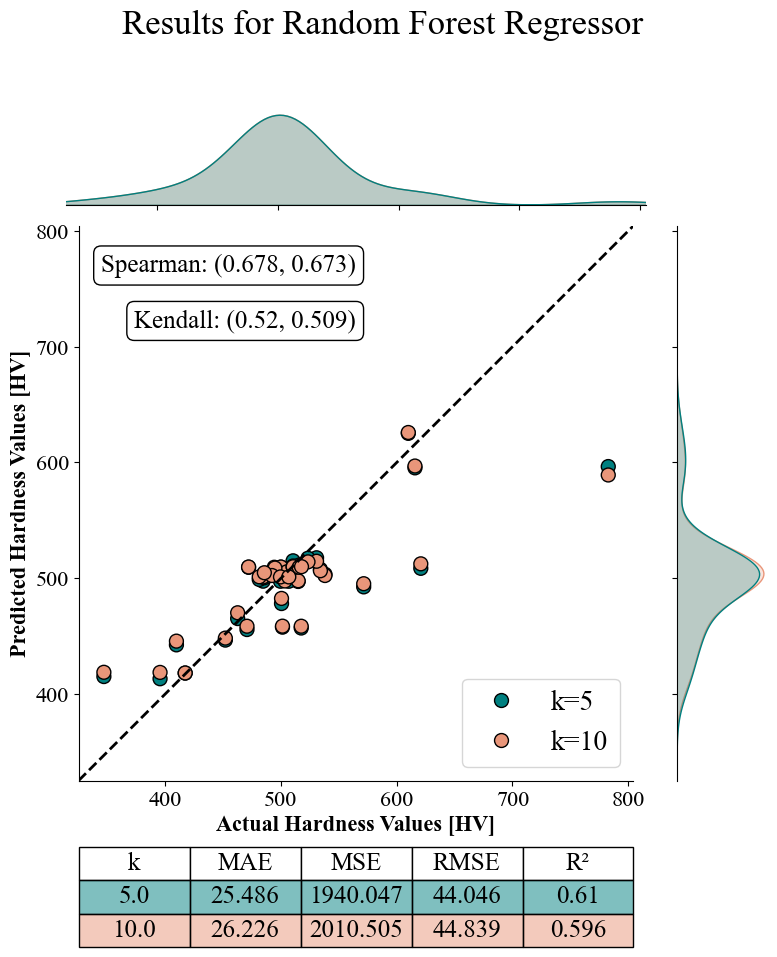

In [17]:
# ===============================
# 1. Initialize the Random Forest Regressor
# ===============================

# Creating the base model instance with a fixed random state for reproducibility
rf = RandomForestRegressor(random_state=50)

# Display the default parameters used by the Random Forest model
print("Parameters currently in use:\n")
pprint(rf.get_params())

# ===============================
# 2. Define Hyperparameter Grid for GridSearchCV
# ===============================

# The hyperparameter grid defines the possible values that will be tested to find the best-performing model.

param_grid_rf = {
    'bootstrap': [True, False],  # Whether bootstrap sampling is used when building trees
    'max_depth': [2, 5, 7, 9],  # Maximum depth of each tree (limits tree expansion)
    'max_features': ['sqrt', 'log2', None, 0.5, 0.1],  # Number of features considered per split
    'min_samples_leaf': [2, 5, 10],  # Minimum samples required in a leaf node
    'min_samples_split': [5, 10],  # Minimum number of samples required to split a node
    'n_estimators': [50, 100, 200]  # Number of trees in the forest
}

# ===============================
# 3. Initialize Dictionaries to Store Results
# ===============================

# These dictionaries store results from GridSearchCV for different values of k (cross-validation folds).
grid_searches_RF = {}  # Stores GridSearchCV objects
evaluate_dfs_RF = {}  # Stores evaluation DataFrames
best_params_RF = {}  # Stores best hyperparameters for each k
y_pred_tests_RF = {}  # Stores model predictions on the test set

# ===============================
# 4. Perform Hyperparameter Tuning for Different k Values
# ===============================

# Define cross-validation values to test (k=5 and k=10)
k_values = [5, 10]

# Loop over each k value for cross-validation
for k in k_values: 
    print(f"\nStarting Grid Search for k={k}")

    # Step 1: Generate dynamic variable names for storage
    grid_search_name = f"grid_searches_{k}"
    evaluate_df_name = f"evaluate_df_{k}"
    best_params_name = f"best_params_{k}"
    y_pred_test_name = f"y_pred_test_{k}"

    # Step 2: Run Grid Search with Cross-Validation
    # - This function searches for the best hyperparameters using GridSearchCV
    (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
        rf, param_grid_rf, k, X_train['Unprocessed'], y_train['Unprocessed'],
        X_test['Unprocessed'], y_test['Unprocessed']
    )

    # Step 3: Store the results in dictionaries
    grid_searches_RF[grid_search_name] = grid_search_var  # Save trained GridSearchCV object
    evaluate_dfs_RF[evaluate_df_name] = evaluate_df_var  # Save model evaluation DataFrame
    best_params_RF[best_params_name] = best_params_var  # Save best hyperparameters
    y_pred_tests_RF[y_pred_test_name] = y_pred_test_var  # Save model predictions on test set

    print(f"Best Parameters for k={k}: {best_params_var}")

# ===============================
# 5. Visualize Model Performance for k=5 and k=10
# ===============================

# This function generates a joint scatter plot and a summary table comparing k=5 and k=10.
df_stats_RF, df_results_RF = visualize_results(
    evaluate_dfs_RF['evaluate_df_5'], evaluate_dfs_RF['evaluate_df_10'], 
    y_test['Unprocessed'], y_pred_tests_RF['y_pred_test_5'], y_pred_tests_RF['y_pred_test_10'], 
    'Results for Random Forest Regressor'
)


# 📌 SHAP Feature Importance Analysis in Random Forest

## 🔹 What is SHAP?
**SHAP (SHapley Additive exPlanations)** is a game-theory-based method used to explain the output of machine learning models. It helps understand **which features impact predictions the most** by assigning **SHAP values** to each feature.

---

## 🔍 **Step-by-Step Explanation of the Code**
### **1️⃣ Load the Best Trained Model**
- We retrieve the best-performing **Random Forest model** after hyperparameter tuning (`best_estimator`).
- This model is selected from the **grid search results for k=10 cross-validation**.

### **2️⃣ Convert Data into NumPy Arrays**
- SHAP requires data in **NumPy format**, so we convert `X_train`, `X_test`, and `y_train` into NumPy arrays.
- We also extract the **feature names** for later use in visualization.

### **3️⃣ Create a SHAP Explainer**
- `shap.TreeExplainer(best_estimator)` is used because **TreeExplainer** is optimized for tree-based models (Random Forest, XGBoost, etc.).
- This explainer calculates SHAP values for each feature.

### **4️⃣ Compute SHAP Values**
- `explainer.shap_values(X_train_np)` and `explainer.shap_values(X_test_np)` compute SHAP values for **both training and testing data**.
- These values indicate how much **each feature contributes to the model's predictions**.

### **5️⃣ Calculate the Mean Absolute SHAP Values**
- **Why?** → The absolute mean SHAP value tells us the **average impact** of each feature.
- This allows us to **rank features** based on their overall importance.

## 🔹 **Why Use SHAP Instead of Standard Feature Importance?**
| Standard Feature Importance (Random Forest) | SHAP Feature Importance |
|---------------------------------------------|-------------------------|
| Measures overall feature contribution | Measures both **global** (overall) & **local** (per-instance) importance |
| Does not handle feature interactions well | Handles complex feature interactions |
| Output is a single value per feature | Output explains **why** a feature was important |
| Less intuitive for nonlinear relationships | More accurate for tree-based models |

---

## 🎯 **Key Takeaways**
✅ SHAP explains **how much each feature impacts model predictions**.  
✅ Works well with **Random Forest, XGBoost, CatBoost**, and other tree-based models.  
✅ Provides a **visual way to compare feature importances** across training & testing data.  
✅ Helps in **feature selection and interpretability** in machine learning models.

                                                            ---

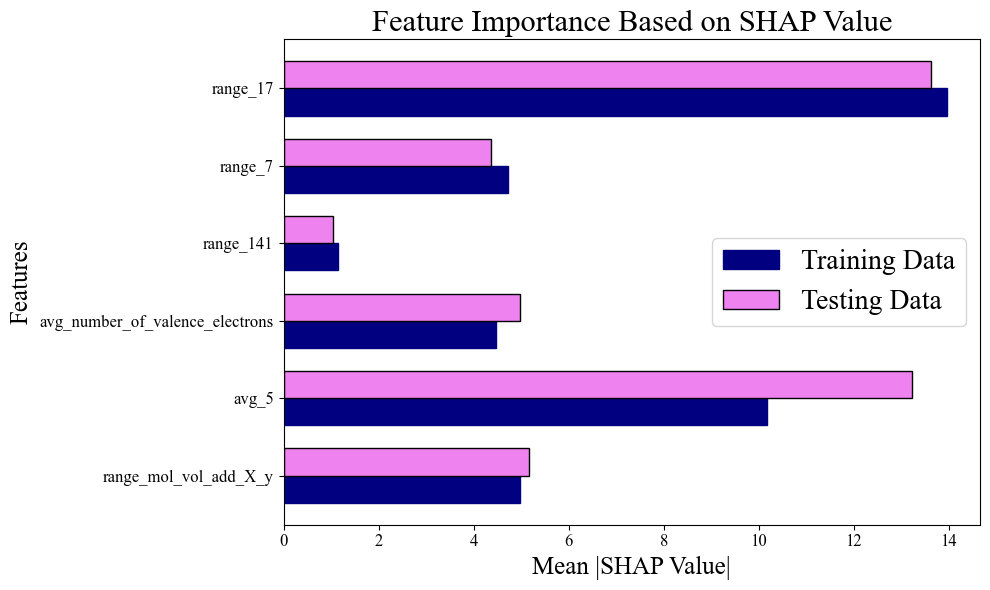

In [21]:
# ===============================
# 1. Retrieve the Best Trained Model
# ===============================

# Extract the best model from the GridSearchCV results for k=10 cross-validation
best_estimator = grid_searches_RF['grid_searches_10'].best_estimator_

# ===============================
# 2. Convert Data into Numpy Arrays for SHAP Processing
# ===============================

# Convert the training and testing datasets into NumPy arrays (SHAP requires NumPy format)
X_train_np = np.array(X_train['Unprocessed'])  # Convert training features
X_test_np = np.array(X_test['Unprocessed'])  # Convert testing features
y_train_np = np.array(y_train['Unprocessed'])  # Convert training target variable

# Retrieve feature names for visualization
feature_names = X_train['Unprocessed'].columns

# ===============================
# 3. Create a SHAP Explainer
# ===============================

# The TreeExplainer is optimized for tree-based models (e.g., Random Forest, XGBoost)
explainer = shap.TreeExplainer(best_estimator)

# ===============================
# 4. Compute SHAP Values for Feature Importance
# ===============================

# SHAP values represent the impact of each feature on the model’s predictions
shap_values_train = explainer.shap_values(X_train_np)  # SHAP values for training data
shap_values_test = explainer.shap_values(X_test_np)  # SHAP values for testing data

# ===============================
# 5. Calculate the Mean Absolute SHAP Values
# ===============================

# Mean absolute SHAP values measure how much each feature contributes to the model’s decision on average
mean_shap_train = np.abs(shap_values_train).mean(axis=0)  # Average SHAP values for training set
mean_shap_test = np.abs(shap_values_test).mean(axis=0)  # Average SHAP values for testing set

# ===============================
# 6. Create a Horizontal Bar Plot to Visualize SHAP Feature Importances
# ===============================

# Set bar height for visualization
bar_height = 0.35

# Generate Y-axis positions for training and testing bars
r1 = np.arange(len(feature_names))  # Positions for training SHAP bars
r2 = [x + bar_height for x in r1]  # Shift test SHAP bars slightly below training bars

plt.figure(figsize=(10, 6))

# Plot SHAP values for training data
plt.barh(r1, mean_shap_train, color='navy', height=bar_height, edgecolor='navy', label='Training Data')

# Plot SHAP values for testing data
plt.barh(r2, mean_shap_test, color='violet', height=bar_height, edgecolor='black', label='Testing Data')

# ===============================
# 7. Customize Plot Appearance
# ===============================

# Adjust axis labels and font sizes
plt.xticks(fontsize=12)
plt.yticks([r + bar_height/2 for r in range(len(feature_names))], feature_names, fontsize=12)
plt.xlabel('Mean |SHAP Value|', fontsize=18)
plt.ylabel('Features', fontsize=18)

# Set plot title
plt.title('Feature Importance Based on SHAP Value', fontsize=22)

# Add legend for training and testing data
plt.legend(fontsize=20)

# ===============================
# 8. Save and Display the SHAP Feature Importance Plot
# ===============================

# Define the directory path to save the plot
directory_path = figures_dir + '/'
plt.savefig(directory_path + "Feature_Importance_SHAP_RF.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


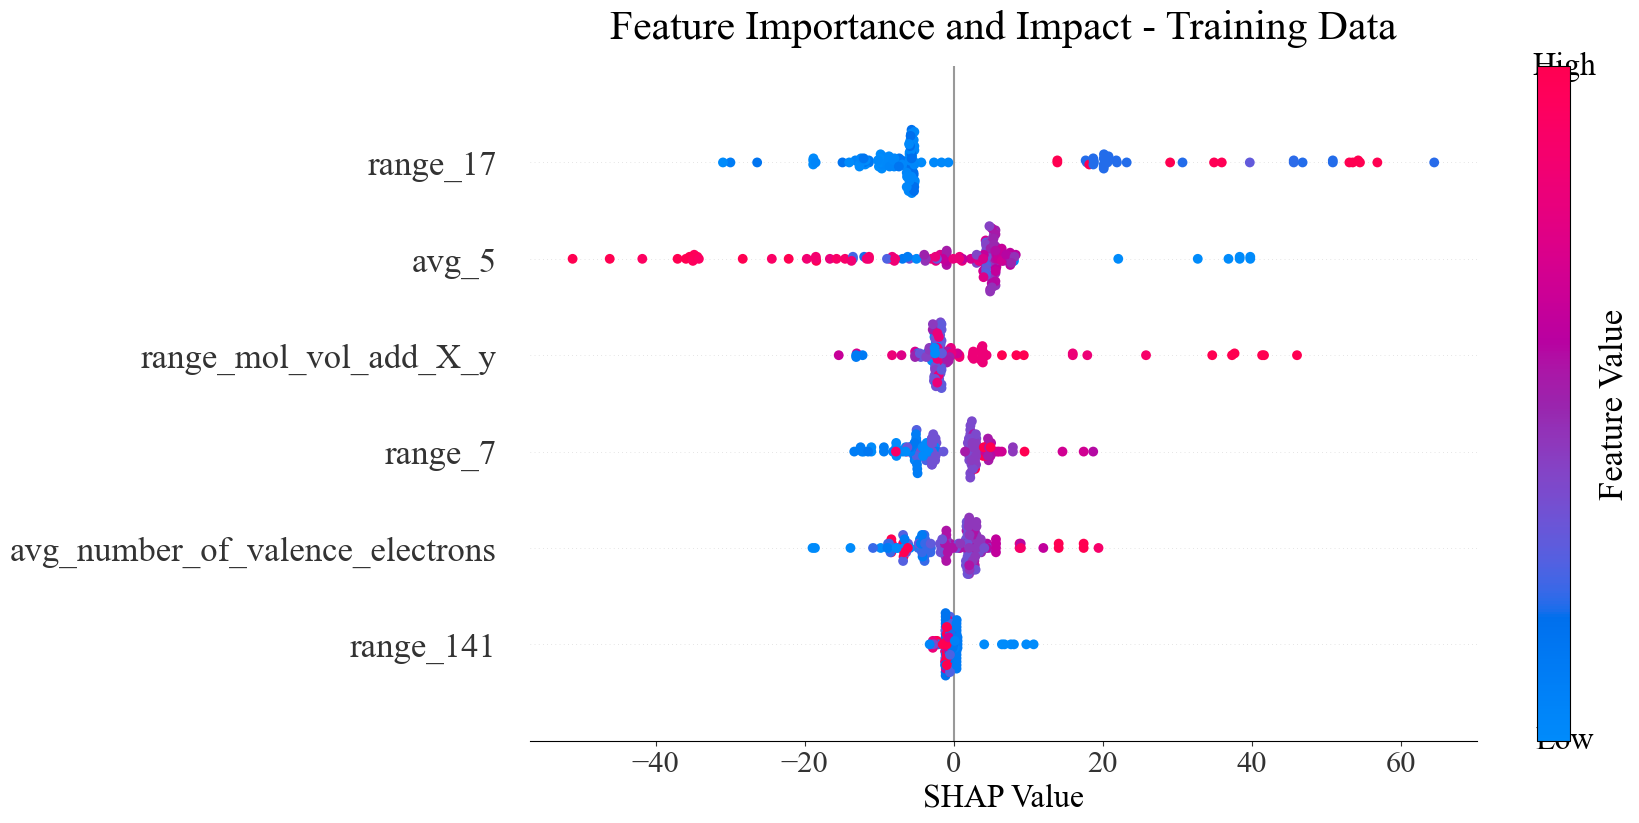

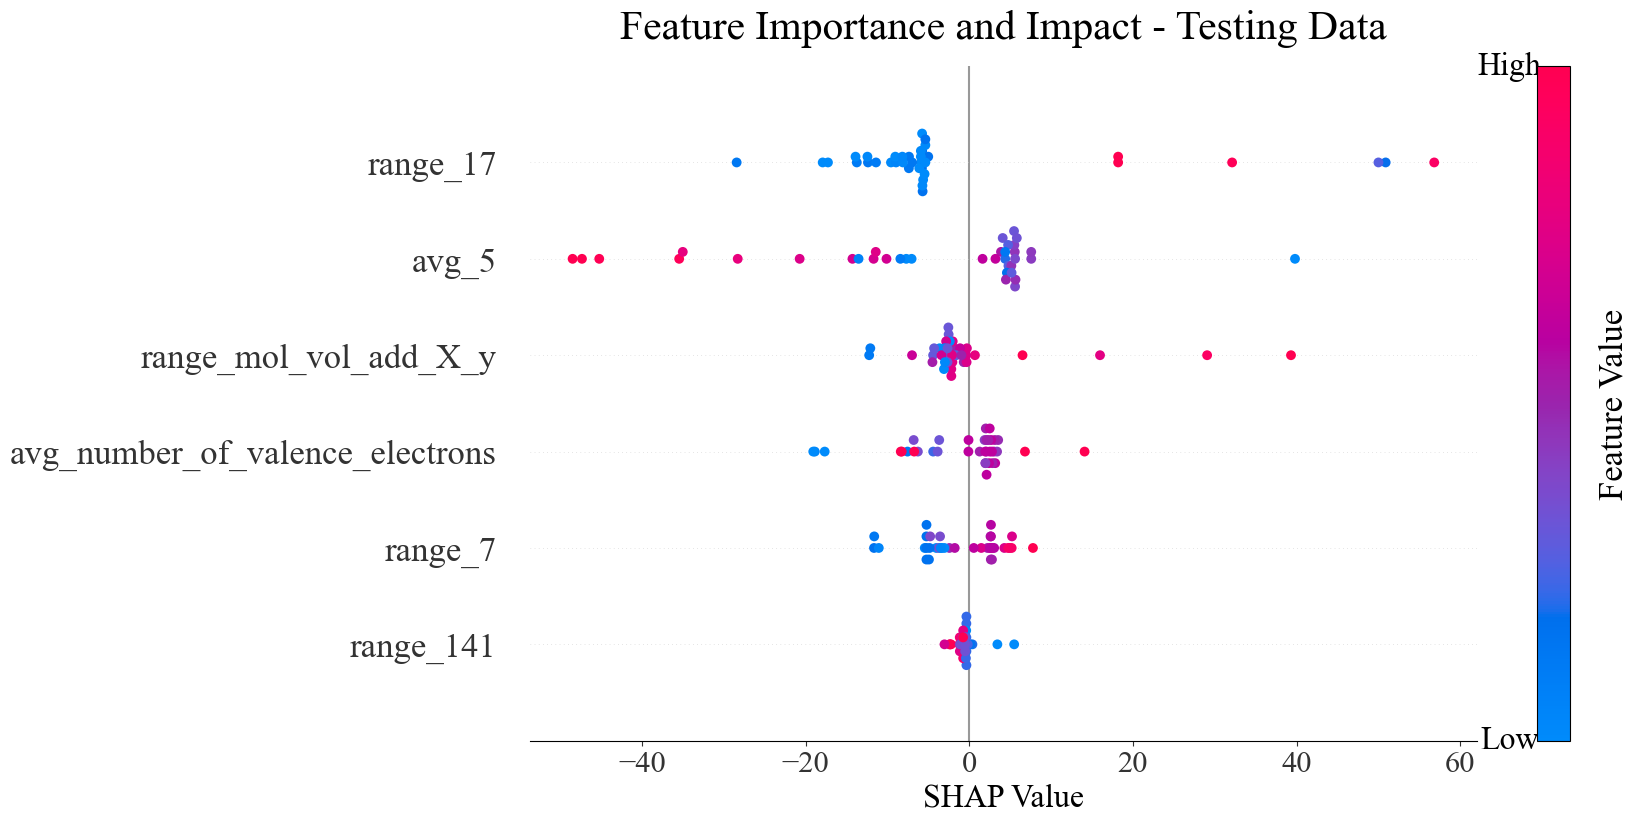

In [22]:
# ===============================
# 1. Compute SHAP Values for Training and Testing Data
# ===============================

# SHAP values explain how each feature contributes to the model’s predictions for each instance.
# These values help understand which features influence the model the most.

# Compute SHAP values for the **training dataset**
shap_values_train = explainer.shap_values(X_train_np)

# Compute SHAP values for the **testing dataset**
shap_values_test = explainer.shap_values(X_test_np)

# ===============================
# 2. Generate SHAP Summary Plot for Training Data
# ===============================

# Step 1: Create a new figure to hold the SHAP summary plot
f = plt.figure()

# Step 2: Generate the SHAP summary plot
shap.summary_plot(
    shap_values_train,            # SHAP values for training data
    X_train_np,                   # Training data (feature values)
    feature_names=feature_names,   # Names of features
    show=False,                    # Prevent SHAP from displaying the plot immediately
    plot_size=[15, 7.5],           # Set custom plot size (15x7.5 inches)
    color_bar=False                # Disable default SHAP color bar (we will add a custom one later)
)

# ===============================
# 3. Modify Marker Size for Better Visibility
# ===============================

# SHAP summary plots use **scatter plots**, and we need to increase the marker size for clarity.
for ax in plt.gcf().axes:  # Get current figure axes
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):  # Ensure it's the scatter plot
            collection.set_sizes([50])  # Increase marker size (default is too small)

# ===============================
# 4. Add Custom Color Bar
# ===============================

# The color bar represents the feature values (low to high) in the SHAP summary plot.
cbar = plt.colorbar(ticks=[])  # Create a color bar but remove numeric ticks
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)  # Add label and spacing
cbar.ax.yaxis.set_label_position('right')  # Position label to the right of the color bar

# ===============================
# 5. Customize Titles, Labels, and Text Annotations
# ===============================

# Add title
plt.title('Feature Importance and Impact - Training Data', fontsize=30, pad=20)

# Add axis labels
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Add "Low" text annotation (representing low feature values)
plt.text(
    82, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none')
)

# Add "High" text annotation (representing high feature values)
plt.text(
    82, 6.0, 'High', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none')
)

# ===============================
# 6. Save and Show the Plot
# ===============================

# Save the figure to the specified directory
plt.savefig(directory_path + "Feature_Impact_SHAP_RF_training.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()

# ===============================
# 7. Generate SHAP Summary Plot for Testing Data
# ===============================

# Step 1: Create a new figure for the SHAP summary plot (testing data)
f = plt.figure()

# Step 2: Generate the SHAP summary plot for testing data
shap.summary_plot(
    shap_values_test,            # SHAP values for testing data
    X_test_np,                   # Testing data (feature values)
    feature_names=feature_names,  # Feature names
    show=False,                   # Prevent immediate display
    plot_size=[15, 7.5],          # Custom plot size
    color_bar=False               # Disable default color bar
)

# ===============================
# 8. Modify Marker Size for Better Visibility (Testing Data)
# ===============================

# Adjust scatter plot marker size to make points more visible
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([50])

# ===============================
# 9. Add Custom Color Bar (Testing Data)
# ===============================

# Add a color bar to indicate feature values
cbar = plt.colorbar(ticks=[])  # Remove numeric ticks
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)
cbar.ax.yaxis.set_label_position('right')  # Position label to the right

# ===============================
# 10. Customize Titles, Labels, and Text Annotations (Testing Data)
# ===============================

# Add title
plt.title('Feature Importance and Impact - Testing Data', fontsize=30, pad=20)

# Add axis labels
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Add "Low" annotation for feature values
plt.text(
    66, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none')
)

# Add "High" annotation for feature values
plt.text(
    66, 6.0, 'High', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none')
)

# ===============================
# 11. Save and Show the Plot (Testing Data)
# ===============================

# Save the figure for testing data
plt.savefig(directory_path + "Feature_Impact_SHAP_RF_testing.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()


# 📌 Implementation of Support Vector Regression (SVR) for Hardness Prediction

## 🔹 What is Support Vector Regression (SVR)?
**Support Vector Regression (SVR)** is a supervised learning algorithm based on **Support Vector Machines (SVM)**. Unlike traditional regression models, SVR:
- Finds a function that best approximates the target variable while minimizing error.
- Uses a **margin of tolerance (epsilon-tube)** instead of minimizing squared errors.
- Is effective in **high-dimensional spaces** and when the dataset is small.

## 🔹 Why Use SVR?
✅ Handles **both linear and nonlinear relationships** using different kernel functions.  
✅ Provides **regularization (C)** to control the trade-off between model complexity and generalization.  
✅ Uses a **hyperplane** to predict values while ignoring small deviations (controlled by epsilon).  

---

## 🔹 Key Hyperparameters in SVR:
| Hyperparameter | Description |
|---------------|-------------|
| **C** | Regularization parameter (higher C → more flexibility, but risk of overfitting) |
| **epsilon** | Defines a margin of tolerance where predictions are not penalized (default = 0.1) |
| **kernel** | Defines the function used for mapping inputs into a higher-dimensional space |
| **degree** | Used for polynomial kernels (degree of polynomial) |
| **gamma** | Defines influence of a single training example (higher gamma = more influence) |

### **Commonly Used Kernels:**
- **Linear** → Assumes a linear relationship between input features and output.
- **Polynomial** → Uses a polynomial function of specified degree (`degree` hyperparameter).
- **Radial Basis Function (RBF)** → Maps input data to higher dimensions, effective for complex relationships.
- **Sigmoid** → Similar to neural networks, used less frequently in practice.

---

## 🔹 What This Code Does:
🔹 Defines **hyperparameter grids** for different SVR kernels.  
🔹 Uses **GridSearchCV** to perform **hyperparameter tuning** across multiple configurations.  
🔹 Tests SVR with **three different feature scaling methods**:  
   - `StandardScaler`
   - `MinMaxScaler`
   - `Normalizer`  
🔹 Runs **cross-validation (k=5, k=10)** for robust model evaluation.  
🔹 Selects the **best model based on Mean Absolute Error (MAE)**.  
🔹 **Visualizes the results** of the best-performing SVR model.  

---

📌 **Next, we implement Support Vector Regression using this methodology.**


5 linear StandardScaler
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5773025583769517
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.5921869166550255
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7626695181911703
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Best R2 score: 0.2696082369725435
5 linear MinMaxScaler
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best MAE score: -0.07048279970730209
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best MSE score: -0.008877532242311617
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


Best RMSE score: -0.09336917133568923
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best R2 score: 0.2880294382761762
5 linear Normalizer
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best R2 score: 1.0
5 poly StandardScaler
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  89 out of 120 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


Best MAE score: -0.6025325558792405
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  89 out of 120 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.8055789321643401
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  89 out of 120 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


Best RMSE score: -0.8890227111497705
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  89 out of 120 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: -0.01728486769597872
5 poly MinMaxScaler
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished


Best MAE score: -0.06598676830044567
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best MSE score: -0.0082941938765752
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RMSE score: -0.0902426423737783
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished


Best R2 score: 0.3092550195539861
5 poly Normalizer
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best MAE score: 0.0
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best MSE score: 0.0
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.0s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best R2 score: 1.0
5 rbfsig StandardScaler
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5655173831549548
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.5879163781265471
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7613172792328707
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.26798221173946746
5 rbfsig MinMaxScaler
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.08663055715063861
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.013780546034958962
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.11579777765238994
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: -0.0847843622694426
5 rbfsig Normalizer
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.0s


Best MAE score: 0.0
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 1.0
10 linear StandardScaler
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5714686913694995
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.5873288273456463
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7495510108387433
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.05801780115180666
10 linear MinMaxScaler
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 169 out of 200 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.07048672701961596
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best MSE score: -0.008807285062231518
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.09188945575484893
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.0899665438654146
10 linear Normalizer
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best RMSE score: 0.0
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 1.0
10 poly StandardScaler
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5764676929250798
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.6783049832921354
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7904131694341422
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: -0.025962247464323053
10 poly MinMaxScaler
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.06223452470308194
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 out of 240 | elapsed:    0.1s remaining:    0.1s


Best MSE score: -0.007321261264467925
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished


Best RMSE score: -0.08230200537105391
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best R2 score: 0.2434028123780255
10 poly Normalizer
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best MSE score: 0.0
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 out of 240 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best R2 score: 1.0
10 rbfsig StandardScaler
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished


Best MAE score: -0.5491347683629692
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished


Best MSE score: -0.5796907745888993
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished


Best RMSE score: -0.7375877143566117
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished


Best R2 score: 0.09179780294016322
10 rbfsig MinMaxScaler
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.08640321560196333
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.013861926487106222
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.2s finished


Best RMSE score: -0.11417891288850715
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.2s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: -0.3133199483832206
10 rbfsig Normalizer
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.3s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.


Best R2 score: 1.0
Row with lowest testing error (MAE):
error_metric                 MAE
validation_error        0.065987
testing_error          26.592453
k_value                        5
kernel                      poly
data_type           MinMaxScaler
C                              1
epsilon                     0.01
degree                       2.0
gamma                        0.5
Name: 24, dtype: object


The figure layout has changed to tight


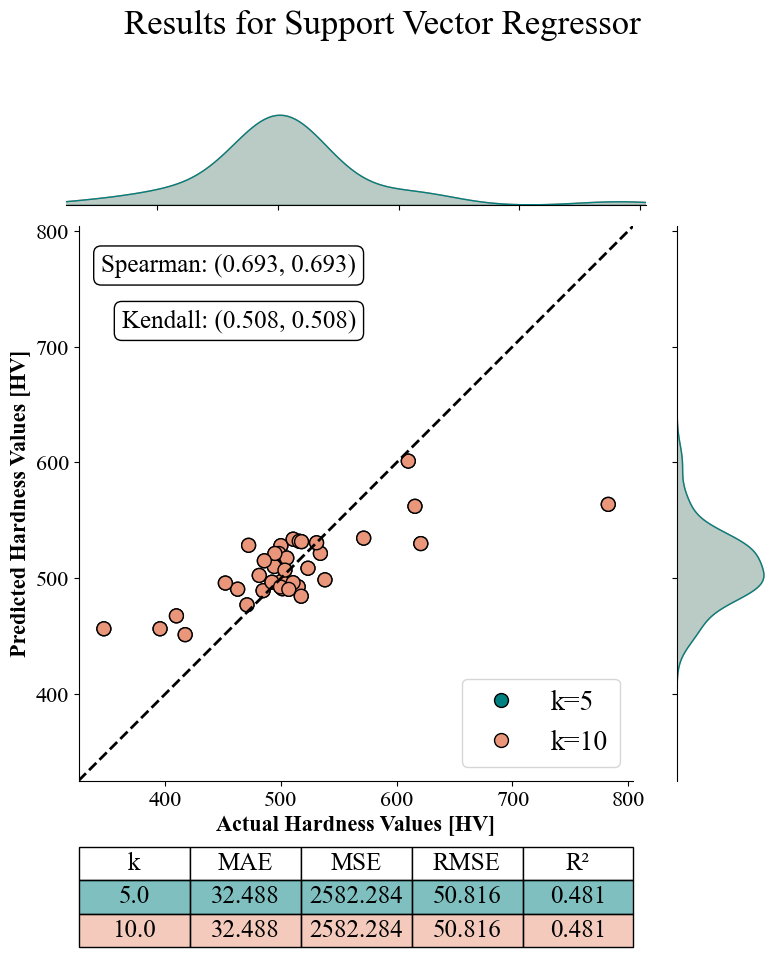

In [23]:
# ===============================
# 1. Define Hyperparameters for SVR
# ===============================

# Free parameters of SVR:
# C → Regularization parameter (higher C means more flexibility but risk of overfitting)
# epsilon → Defines a margin of tolerance where predictions are not penalized
# kernel → Defines the function used for mapping inputs into a higher-dimensional space
# degree → Used for polynomial kernels (degree of polynomial)
# gamma → Defines influence of a single training example (higher gamma = more influence)

# Define scalers for target variable
standard_scale_y = scaler_objects_y['StandardScaler']
minmax_scale_y = scaler_objects_y['MinMaxScaler']
norm_scale_y = scaler_objects_y['Normalizer']

# Hyperparameter tuning for different kernels

# Linear kernel: Only C and epsilon need tuning
param_grid_linear = {'kernel': ['linear'], 'C': [1,5,10,50], 'epsilon':[0.01,0.1,1,5,10]}

# Polynomial kernel: Includes degree and gamma parameters
param_grid_poly = {'kernel': ['poly'], 'C': [1,5,10], 'epsilon':[0.01,1], 'degree': [2,3], 'gamma': [0.1,0.5]}

# RBF & Sigmoid kernels: Includes gamma parameter
param_grid_rbfsig = {'kernel': ['rbf','sigmoid'], 'C': [1,5,10,25,50], 'epsilon':[1,5], 'gamma': ['scale','auto',0.5]}

# ===============================
# 2. Initialize SVR and Setup Data Structures
# ===============================

# Initialize Support Vector Regressor
svr = SVR()

# Define different configurations to test
kernels = ['linear', 'poly', 'rbfsig']
k_values = [5,10]  # Cross-validation folds
data_type = ['StandardScaler','MinMaxScaler', 'Normalizer']  # Different scaling techniques

# Store parameter grids for each kernel
param_grids = {'linear': param_grid_linear, 'poly': param_grid_poly, 'rbfsig': param_grid_rbfsig}

# Dictionaries to store results
grid_searches_SVR = {}
evaluate_dfs_SVR = {}
best_params_SVR = {}
y_pred_tests_SVR = {}
new_evaluation_dfs_SVR  = {}
y_unscaled_preds_SVR = {}

# ===============================
# 3. Train and Evaluate SVR Models
# ===============================

# Loop through cross-validation (k=5, k=10)
for k in k_values:  
    # Loop through different kernels
    for kernel in kernels:  
        for data in data_type:
            param_grid = param_grids[kernel]  # Select hyperparameter grid for current kernel
            
            print(k, kernel, data)  # Print current configuration
            
            # Dynamic variable names for storing results
            grid_search_name = f"grid_searches_{data}_{kernel}_{k}"
            evaluate_df_name = f"evaluate_df_{data}_{kernel}_{k}"
            best_params_name = f"best_params_{data}_{kernel}_{k}"
            y_pred_test_name = f"y_pred_test_{data}_{kernel}_{k}"

            # Perform hyperparameter tuning using GridSearchCV
            (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
                svr, param_grid, k, X_train[data], y_train[data].ravel(), X_test[data], y_test[data].ravel()
            )

            # Store results
            grid_searches_SVR[grid_search_name] = grid_search_var
            evaluate_dfs_SVR[evaluate_df_name] = evaluate_df_var
            best_params_SVR[best_params_name] = best_params_var
            y_pred_tests_SVR[y_pred_test_name] = y_pred_test_var

            # Rescale y values and evaluate
            y_pred_test_var_reshaped = y_pred_test_var.reshape(-1,1)
            
            new_evaluation_df_name = f"new_evaluation_df_{data}_{kernel}_{k}"
            y_unscaled_pred_name = f"y_unscaled_pred_{data}_{kernel}_{k}"
            
            # Select correct scaler
            scale_y = standard_scale_y if data == 'StandardScaler' else minmax_scale_y
            
            # Rescale predictions and evaluate performance
            new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
                y_pred_test_var_reshaped, y_test['Unprocessed'].ravel(), evaluate_df_var, scale_y
            )

            # Store final results
            new_evaluation_dfs_SVR[new_evaluation_df_name] = new_evaluation_dfs_var
            y_unscaled_preds_SVR[y_unscaled_pred_name] = y_unscaled_preds_var

# ===============================
# 4. Find the Best Model Based on MAE
# ===============================

# Initialize an empty list to store DataFrames
dfs_list = []

# Loop through each evaluation result
for key, value in new_evaluation_dfs_SVR.items():
    parts = key.split('_')
    
    if len(parts) == 6 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[4] in kernels and parts[5].isdigit():
        data_type = parts[3]
        kernel = parts[4]
        k = int(parts[5])
        
        # Retrieve best hyperparameters
        best_params_key = f"best_params_{data_type}_{kernel}_{k}"
        best_param_values = best_params_SVR.get(best_params_key, None)

        # Create a DataFrame with additional info
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['kernel'] = kernel
        df_with_info['data_type'] = data_type

        if best_param_values:
            for param, val in best_param_values.items():
                df_with_info[param] = val

        dfs_list.append(df_with_info)

# Combine DataFrames into a final summary table
final_df = pd.concat(dfs_list, ignore_index=True) if len(dfs_list) > 0 else print("No valid DataFrames to concatenate.")

# Select the model with the **lowest MAE** (best model)
lowest_mae_row = final_df[final_df['error_metric'] == 'MAE'].loc[final_df['testing_error'].idxmin()]
print("Best SVR Model (Lowest MAE):\n", lowest_mae_row)

# ===============================
# 5. Visualize Results for Best Model
# ===============================

df_stats_SVR, df_results_SVR = visualize_results(
    new_evaluation_dfs_SVR['new_evaluation_df_StandardScaler_rbfsig_5'], 
    new_evaluation_dfs_SVR['new_evaluation_df_StandardScaler_rbfsig_10'], 
    y_test['Unprocessed'], 
    y_unscaled_preds_SVR['y_unscaled_pred_StandardScaler_rbfsig_5'].flatten(),
    y_unscaled_preds_SVR['y_unscaled_pred_StandardScaler_rbfsig_10'].flatten(),
    'Results for Support Vector Regressor'
)


# 📌 Summary of SHAP Analysis Code Breakdown

## 🔹 What This Code Does
This code uses **SHAP (SHapley Additive exPlanations)** to analyze the feature importance of a trained **Support Vector Regressor (SVR)** model. The process involves:

### ✅ **1. Loading the Best Trained SVR Model**
- The best-performing SVR model is retrieved from **GridSearchCV results**.

### ✅ **2. Converting Data to NumPy Arrays**
- SHAP requires data in **NumPy format**, so training and testing datasets are converted.

### ✅ **3. Selecting a Small Representative Sample**
- A **random subset of 100 samples** is extracted from the training data.
- This sample is used to **initialize SHAP’s KernelExplainer**.

### ✅ **4. Computing SHAP Values**
- SHAP values measure **how much each feature contributes** to predictions.
- Values are computed **separately for training and testing datasets**.

### ✅ **5. Generating SHAP Summary Plots**
- **SHAP summary plots** visualize the impact of each feature.
- Features are **ranked based on importance**, showing how they influence the model.

### ✅ **6. Enhancing Plot Readability**
- **Marker sizes** in the scatter plot are increased for better visibility.
- **A custom color bar** is added to indicate **low-to-high feature values**.
- **Text annotations** ("Low" & "High") are included to explain feature impacts.

### ✅ **7. Saving and Displaying Plots**
- SHAP feature importance plots are **saved as high-resolution images**.
- The plots are **displayed for both training and testing datasets**.

---

## 🎯 **Key Takeaways**
- **SHAP helps explain the impact of individual features** on the model’s predictions.
- **KernelExplainer is used** because SVR is a non-tree-based model.
- **Comparing training and testing SHAP values** ensures the model generalizes well.
- **Feature importance visualization** helps in making data-driven decisions.

---

📌 **This SHAP analysis provides valuable insights into feature contributions, making model predictions more interpretable. 🚀**


  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

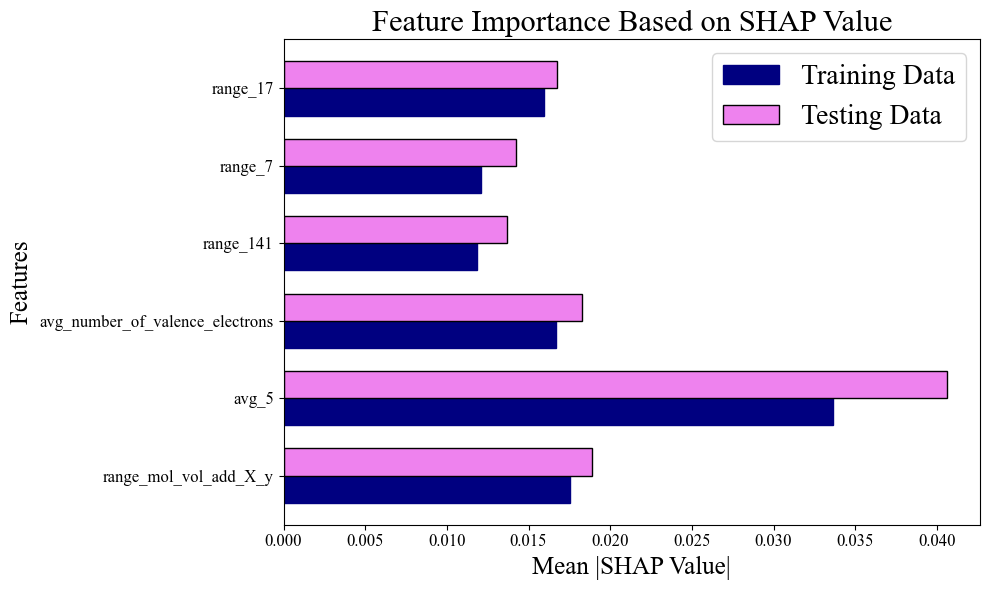

In [25]:
# ===============================
# 1. Retrieve the Best Trained Model for SVR
# ===============================

# Extract the best trained Support Vector Regressor model from GridSearchCV results
best_estimator = grid_searches_SVR['grid_searches_MinMaxScaler_poly_10'].best_estimator_

# ===============================
# 2. Convert Data into NumPy Arrays for SHAP Processing
# ===============================

# Convert training and testing datasets into NumPy arrays (required by SHAP KernelExplainer)
X_train_np = np.array(X_train['MinMaxScaler'])  # Convert training features
X_test_np = np.array(X_test['MinMaxScaler'])  # Convert testing features
y_train_np = np.array(y_train['MinMaxScaler'])  # Convert training target variable

# Retrieve feature names from unprocessed dataset
feature_names = X_train['Unprocessed'].columns

# ===============================
# 3. Create a Small Sample from Training Data for SHAP KernelExplainer
# ===============================

# SHAP's KernelExplainer requires a small representative sample of the training data
sample_ind = np.random.choice(X_train_np.shape[0], size=100, replace=False)  # Select 100 random samples
X_train_sample = X_train_np[sample_ind]  # Extract the sample data

# ===============================
# 4. Create a SHAP Explainer using KernelExplainer
# ===============================

# KernelExplainer is used because SVR is not tree-based (TreeExplainer is used for tree-based models)
explainer = shap.KernelExplainer(best_estimator.predict, X_train_sample)

# ===============================
# 5. Compute SHAP Values for Feature Importance
# ===============================

# SHAP values represent how much each feature contributes to the model’s predictions
shap_values_train = explainer.shap_values(X_train_np)  # Compute SHAP values for training data
shap_values_test = explainer.shap_values(X_test_np)  # Compute SHAP values for testing data

# ===============================
# 6. Calculate the Mean Absolute SHAP Values
# ===============================

# Mean absolute SHAP values measure the overall importance of each feature
mean_shap_train = np.abs(shap_values_train).mean(axis=0)  # Compute mean SHAP values for training set
mean_shap_test = np.abs(shap_values_test).mean(axis=0)  # Compute mean SHAP values for testing set

# ===============================
# 7. Create a Horizontal Bar Plot to Visualize SHAP Feature Importances
# ===============================

# Set bar height for visualization
bar_height = 0.35

# Generate Y-axis positions for training and testing bars
r1 = np.arange(len(feature_names))  # Positions for training SHAP bars
r2 = [x + bar_height for x in r1]  # Shift test SHAP bars slightly below training bars

plt.figure(figsize=(10, 6))

# Plot SHAP values for training data
plt.barh(r1, mean_shap_train, color='navy', height=bar_height, edgecolor='navy', label='Training Data')

# Plot SHAP values for testing data
plt.barh(r2, mean_shap_test, color='violet', height=bar_height, edgecolor='black', label='Testing Data')

# ===============================
# 8. Customize Plot Appearance
# ===============================

# Adjust axis labels and font sizes
plt.xticks(fontsize=12)
plt.yticks([r + bar_height/2 for r in range(len(feature_names))], feature_names, fontsize=12)
plt.xlabel('Mean |SHAP Value|', fontsize=18)
plt.ylabel('Features', fontsize=18)

# Set plot title
plt.title('Feature Importance Based on SHAP Value', fontsize=22)

# Add legend for training and testing data
plt.legend(fontsize=20, loc='best')

# ===============================
# 9. Save and Display the SHAP Feature Importance Plot
# ===============================

# Define the directory path to save the plot
plt.savefig(directory_path + "Feature_Importance_SHAP_SVR.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()


  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


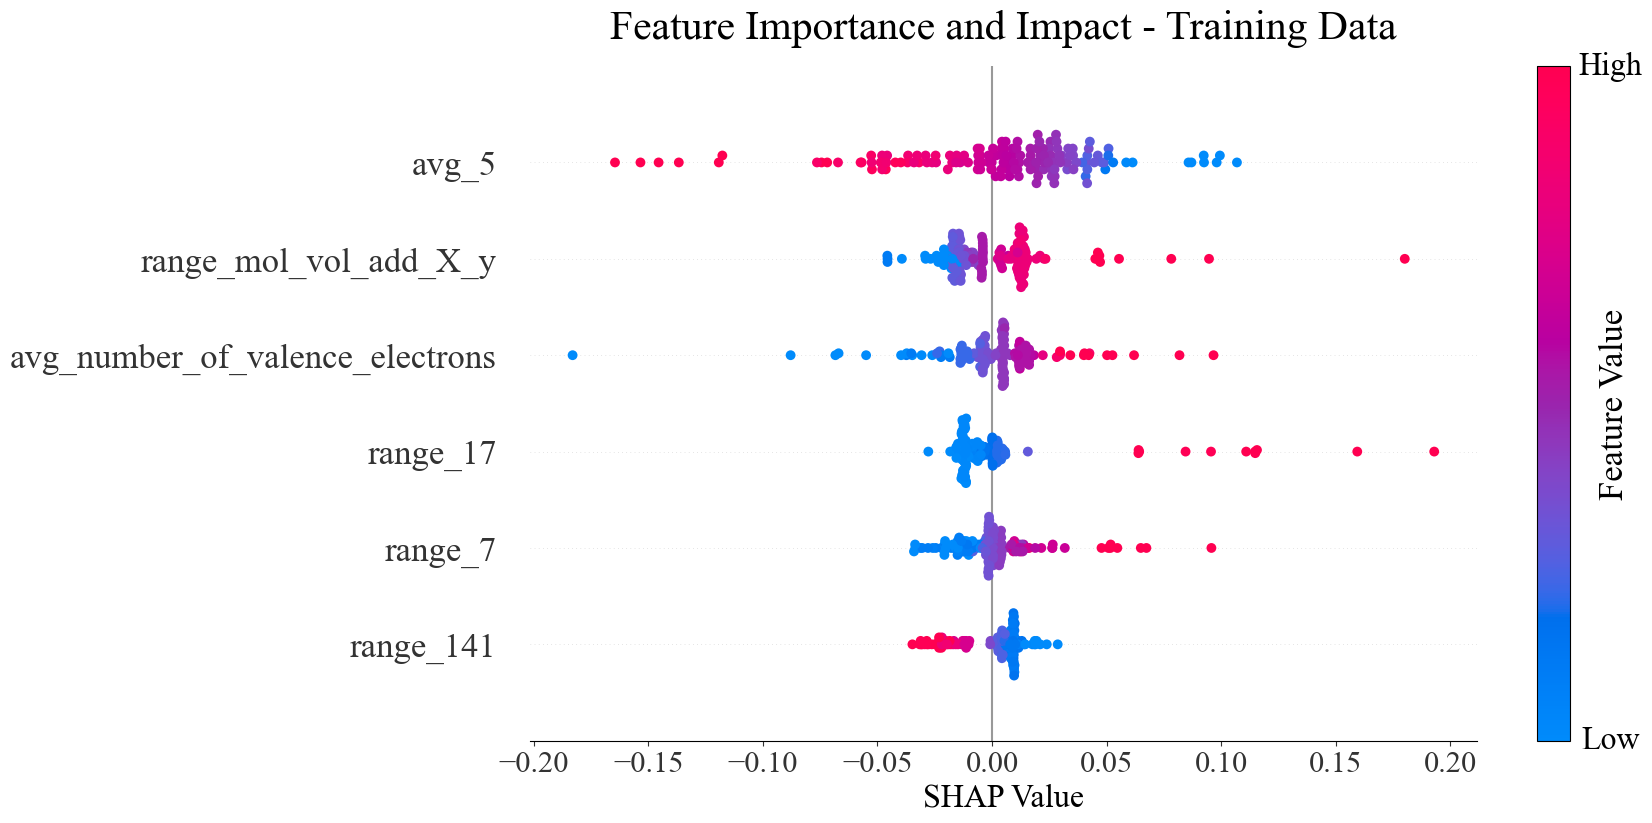

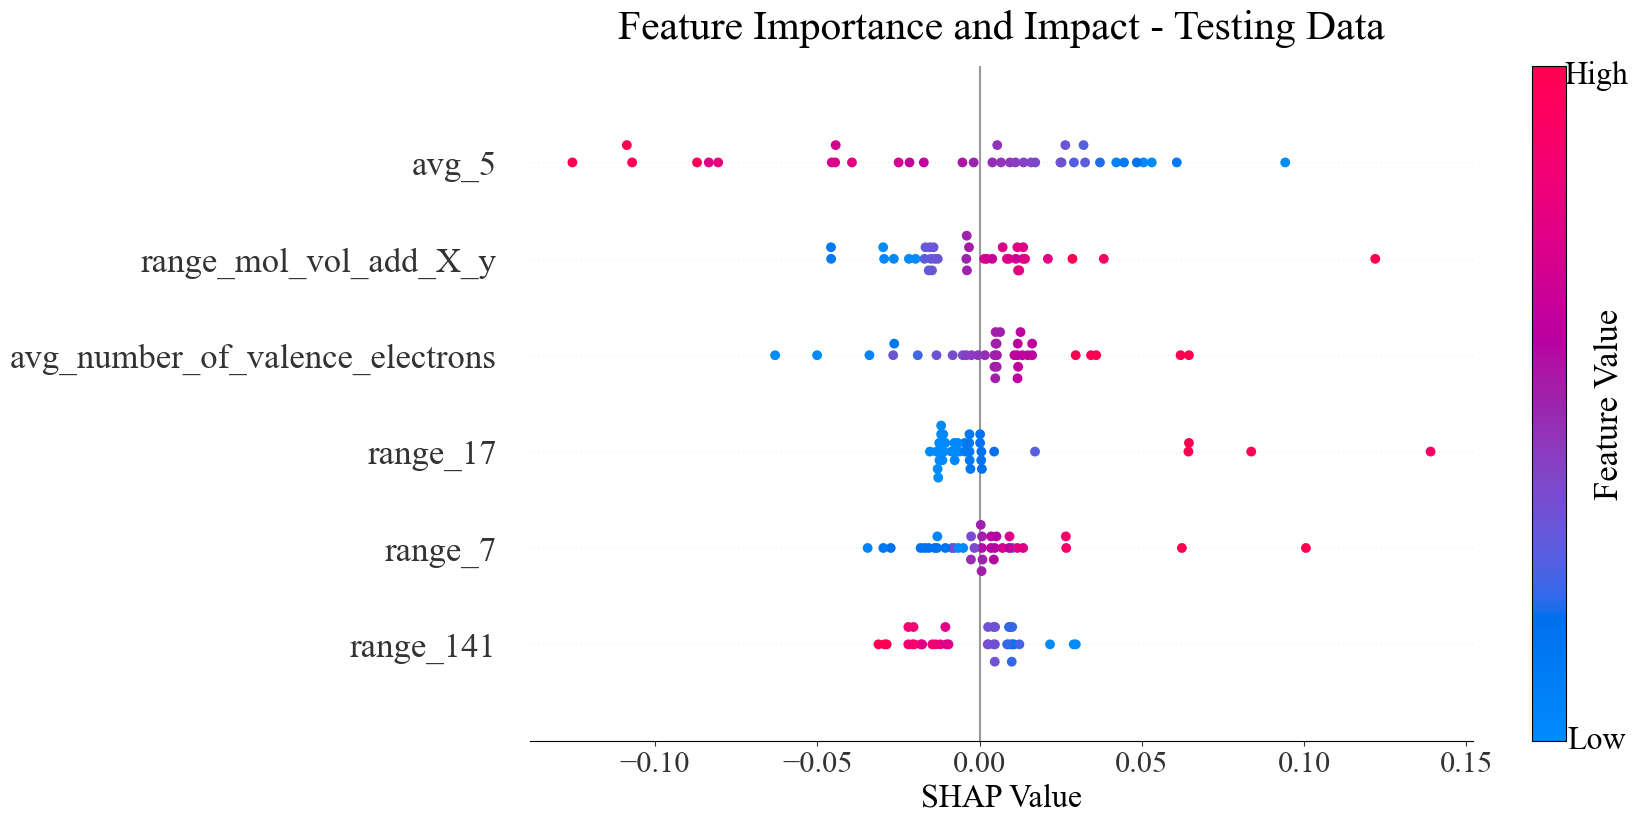

In [26]:
# ===============================
# 1. Retrieve the Best Trained SVR Model
# ===============================

# Extract the best trained Support Vector Regressor model from GridSearchCV results
best_estimator = grid_searches_SVR['grid_searches_MinMaxScaler_poly_10'].best_estimator_

# ===============================
# 2. Convert Data into NumPy Arrays for SHAP Processing
# ===============================

# Convert training and testing datasets into NumPy arrays (SHAP requires NumPy format)
X_train_np = np.array(X_train['MinMaxScaler'])  # Convert training features
X_test_np = np.array(X_test['MinMaxScaler'])  # Convert testing features
y_train_np = np.array(y_train['MinMaxScaler'])  # Convert training target variable

# Retrieve feature names from unprocessed dataset
feature_names = X_train['Unprocessed'].columns

# ===============================
# 3. Create a Small Sample from Training Data for SHAP KernelExplainer
# ===============================

# SHAP's KernelExplainer requires a small representative sample of the training data
sample_ind = np.random.choice(X_train_np.shape[0], size=100, replace=False)  # Select 100 random samples
X_train_sample = X_train_np[sample_ind]  # Extract the sample data

# ===============================
# 4. Create a SHAP Explainer using KernelExplainer
# ===============================

# KernelExplainer is used because SVR is not tree-based (TreeExplainer is used for tree-based models)
explainer = shap.KernelExplainer(best_estimator.predict, X_train_sample)

# ===============================
# 5. Compute SHAP Values for Feature Importance
# ===============================

# SHAP values represent how much each feature contributes to the model’s predictions
shap_values_train = explainer.shap_values(X_train_np)  # Compute SHAP values for training data
shap_values_test = explainer.shap_values(X_test_np)  # Compute SHAP values for testing data

# ===============================
# 6. Generate SHAP Summary Plot for Training Data
# ===============================

# Step 1: Create a new figure for SHAP summary plot
f = plt.figure()

# Step 2: Generate the SHAP summary plot for training data
shap.summary_plot(
    shap_values_train,            # SHAP values for training data
    X_train_np,                   # Training data (feature values)
    feature_names=feature_names,   # Feature names
    show=False,                    # Prevent immediate display
    plot_size=[15, 7.5],           # Custom plot size
    color_bar=False                # Disable default color bar
)

# ===============================
# 7. Modify Marker Size for Better Visibility
# ===============================

# Adjust scatter plot marker size to make points more visible
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([50])  # Increase marker size

# ===============================
# 8. Add Custom Color Bar
# ===============================

# Add a color bar to indicate feature values
cbar = plt.colorbar(ticks=[])  # Remove numeric ticks
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)
cbar.ax.yaxis.set_label_position('right')  # Position label to the right

# ===============================
# 9. Customize Titles, Labels, and Text Annotations
# ===============================

# Add title
plt.title('Feature Importance and Impact - Training Data', fontsize=30, pad=20)

# Add axis labels
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Add "Low" annotation for feature values
plt.text(0.27, -1, 'Low', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none'))

# Add "High" annotation for feature values
plt.text(0.27, 6.0, 'High', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none'))

# ===============================
# 10. Save and Display the Training Data SHAP Plot
# ===============================

# Save the figure for training data
plt.savefig(directory_path + "Feature_Impact_SHAP_SVR_training.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# ===============================
# 11. Generate SHAP Summary Plot for Testing Data
# ===============================

# Step 1: Create a new figure for the SHAP summary plot (testing data)
f = plt.figure()

# Step 2: Generate the SHAP summary plot for testing data
shap.summary_plot(
    shap_values_test,            # SHAP values for testing data
    X_test_np,                   # Testing data (feature values)
    feature_names=feature_names,  # Feature names
    show=False,                   # Prevent immediate display
    plot_size=[15, 7.5],          # Custom plot size
    color_bar=False               # Disable default color bar
)

# ===============================
# 12. Modify Marker Size for Better Visibility (Testing Data)
# ===============================

# Adjust scatter plot marker size to make points more visible
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([50])

# ===============================
# 13. Add Custom Color Bar (Testing Data)
# ===============================

# Add a color bar to indicate feature values
cbar = plt.colorbar(ticks=[])  # Remove numeric ticks
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)
cbar.ax.yaxis.set_label_position('right')  # Position label to the right

# ===============================
# 14. Customize Titles, Labels, and Text Annotations (Testing Data)
# ===============================

# Add title
plt.title('Feature Importance and Impact - Testing Data', fontsize=30, pad=20)

# Add axis labels
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Add "Low" annotation for feature values
plt.text(0.19, -1, 'Low', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none'))

# Add "High" annotation for feature values
plt.text(0.19, 5.9, 'High', fontsize=23, color='black', ha='center', va='center',
    bbox=dict(facecolor='none', edgecolor='none'))

# ===============================
# 15. Save and Display the Testing Data SHAP Plot
# ===============================

# Save the figure for testing data
plt.savefig(directory_path + "Feature_Impact_SHAP_SVR_testing.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# 📌 Implementation of Lasso and Ridge Regression for Hardness Prediction

## 🔹 What are Lasso and Ridge Regression?
**Lasso (Least Absolute Shrinkage and Selection Operator) and Ridge Regression** are both **regularized linear regression models** designed to improve model generalization by preventing overfitting.

### ✅ **Lasso Regression**
- Uses **L1 regularization**, which **adds a penalty on the absolute value of coefficients**.
- Performs **feature selection** by shrinking some feature coefficients to **zero**, effectively removing them.
- Useful when **some features are irrelevant**, leading to a more interpretable model.

### ✅ **Ridge Regression**
- Uses **L2 regularization**, which **adds a penalty on the square of the coefficients**.
- **Does not eliminate features**, but **shrinks all coefficients**, reducing the impact of less important variables.
- Ideal when **all features contribute**, but require **regularization** to prevent overfitting.

---

## 🔹 Why Use Lasso and Ridge?
✅ **Reduces overfitting**, especially when there are many correlated features.  
✅ **Lasso acts as a feature selector**, making models more interpretable.  
✅ **Ridge improves model stability** when features are collinear.  
✅ **Enhances generalization performance** by reducing model variance.  

---

## 🔹 Key Hyperparameters in Lasso & Ridge:
| Hyperparameter | Description |
|---------------|-------------|
| **alpha** | Controls the strength of regularization (higher values increase shrinkage). |
| **l1_ratio** | Used only in ElasticNet (combines L1 and L2 regularization). |
| **solver** | Algorithm used for optimization (e.g., 'saga' is good for large datasets). |
| **max_iter** | Maximum number of iterations for optimization. |

---

## 🔹 What This Code Does:
🔹 **Initializes Lasso and Ridge regression models** with default parameters.  
🔹 **Defines a hyperparameter grid** for **GridSearchCV** to optimize `alpha`.  
🔹 **Applies different feature scaling methods** (`Unprocessed`, `StandardScaler`, `MinMaxScaler`, `Normalizer`).  
🔹 **Uses k-fold cross-validation (`k=5, k=10`)** for robust evaluation.  
🔹 **Finds the best hyperparameters** based on **Mean Absolute Error (MAE)**.  
🔹 **Stores model performance results**, including:
   - Best hyperparameters  
   - Evaluation metrics (MAE, MSE, RMSE, R²)  
   - Model predictions  
🔹 **Visualizes performance** using:
   - A **scatter plot** comparing actual vs. predicted values.
   - A **results table** summarizing error metrics.  

---

## 🚀 **Steps in Implementing Lasso and Ridge Regression**
### 🔹 **1. Initialize Lasso and Ridge Models**
- Create instances of `Lasso()` and `Ridge()`.
- Set up hyperparameter tuning (`alpha` values).

### 🔹 **2. Define Hyperparameter Grid**
- Specify possible values for `alpha`, which controls regularization strength.

### 🔹 **3. Store Model Results**
- Use dictionaries to store:
  - Grid search results (`grid_searches_Lasso`, `grid_searches_Ridge`)
  - Evaluation metrics (`evaluate_dfs_Lasso`, `evaluate_dfs_Ridge`)
  - Best hyperparameters (`best_params_Lasso`, `best_params_Ridge`)
  - Model predictions (`y_pred_tests_Lasso`, `y_pred_tests_Ridge`)

### 🔹 **4. Perform Hyperparameter Tuning**
- Run **GridSearchCV** with **k-fold cross-validation** (`k=5, 10`).
- The `pipeline_search` function:
  - Optimizes hyperparameters.
  - Trains the model on `X_train` and `y_train`.
  - Evaluates performance on `X_test` and `y_test`.
- The best configuration is stored.

### 🔹 **5. Visualizing Model Performance**
- Generate a **scatter plot** comparing actual vs. predicted values.
- Display a **summary table** of performance metrics.

---

📌 **Next, we implement Lasso and Ridge Regression with hyperparameter tuning.**


5 Lasso Unprocessed
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -31.881891879400406
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1805.4394092563805
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -42.0830833963919
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.22833953197405682
5 Lasso StandardScaler
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5831957900454925
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best MSE score: -0.6136118207514895
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7765444897285068
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best R2 score: 0.24203651305004897
5 Lasso MinMaxScaler
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished


Best MAE score: -0.08127926061161242
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best MSE score: -0.012643399275019946
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best RMSE score: -0.1115589853222331
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.0s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: -0.0130230441456733
5 Lasso Normalizer
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 1.0
5 Ridge Unprocessed
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -32.158265707534596
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1875.9418889742842
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -42.8738748834363
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.19537819391353456
5 Ridge StandardScaler
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5736032688268835
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished


Best MSE score: -0.5946104265209468
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best RMSE score: -0.7651589188801102
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished


Best R2 score: 0.2627079264570452
5 Ridge MinMaxScaler
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished


Best MAE score: -0.0709279180675078
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.00908269442521369
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.09446012889955174
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.26967110112913434
5 Ridge Normalizer
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.1s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 1.0
10 Lasso Unprocessed
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -32.109818368064495
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1855.2139077849756
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -41.876198206824824
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.06752600453108808
10 Lasso StandardScaler
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5849307979441722
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s


Best MSE score: -0.6231033877725303
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s


Best RMSE score: -0.7716092397319912
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.05222178742878385
10 Lasso MinMaxScaler
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.08182940028179159
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.012892641881609712
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.11042327822559013
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: -0.20765005819352106
10 Lasso Normalizer
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.3s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.3s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.4s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0


Best RMSE score: 0.0
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.4s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
An input array is constant; the correlation coefficient is not defined.


Best R2 score: 1.0
10 Ridge Unprocessed
Fitting 10 folds for each of 48 candidates, totalling 480 fits


An input array is constant; the correlation coefficient is not defined.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -32.262708829925565
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1914.5689852067894
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -42.39144993333689
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.06070084370250828
10 Ridge StandardScaler
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5781329024862686
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.5984247879790386
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7581020169642068
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.029071345937898185
10 Ridge MinMaxScaler
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.07126040009377343
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.009143333316598142
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.09368527973674712
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.0525524082222904
10 Ridge Normalizer
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: 0.0
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: 0.0
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: 0.0
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 288 out of 480 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.1s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.


Best R2 score: 1.0
Row with lowest testing error (MAE) for Lasso:
error_metric                   MAE
validation_error          0.583196
testing_error            33.900752
k_value                          5
model                        Lasso
data_type           StandardScaler
alpha                         0.06
max_iter                      5000
Name: 6, dtype: object
Row with lowest testing error (MAE) for Ridge:
error_metric                   MAE
validation_error          0.573603
testing_error            31.890492
k_value                          5
model                        Ridge
data_type           StandardScaler
alpha                          1.0
max_iter                      5000
Name: 30, dtype: object


The figure layout has changed to tight


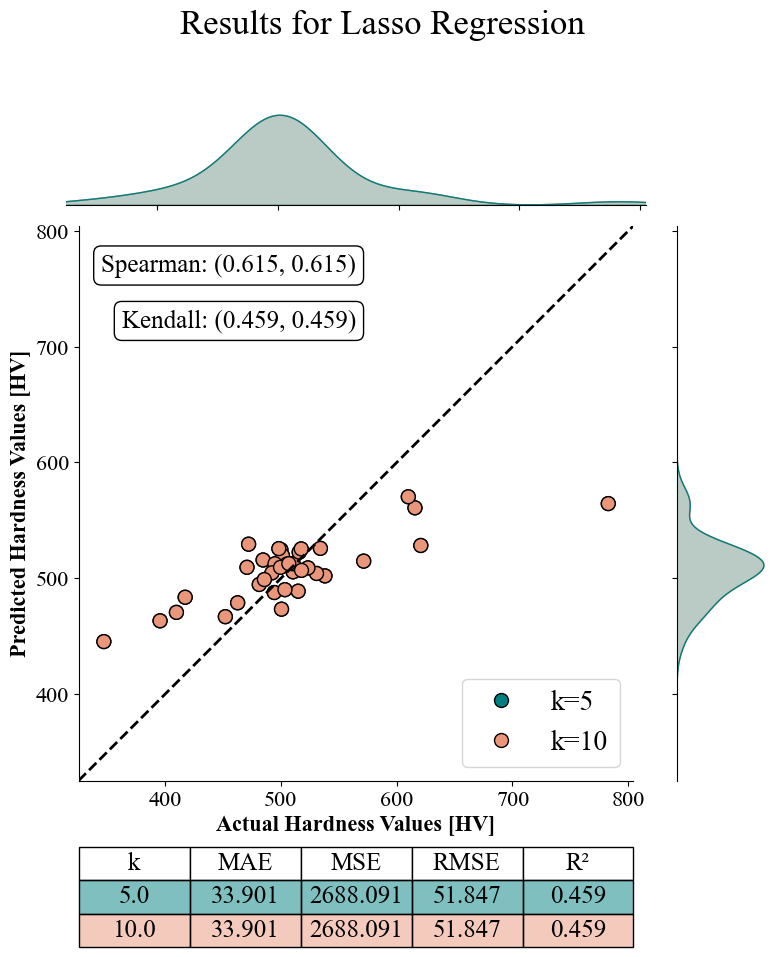

The figure layout has changed to tight


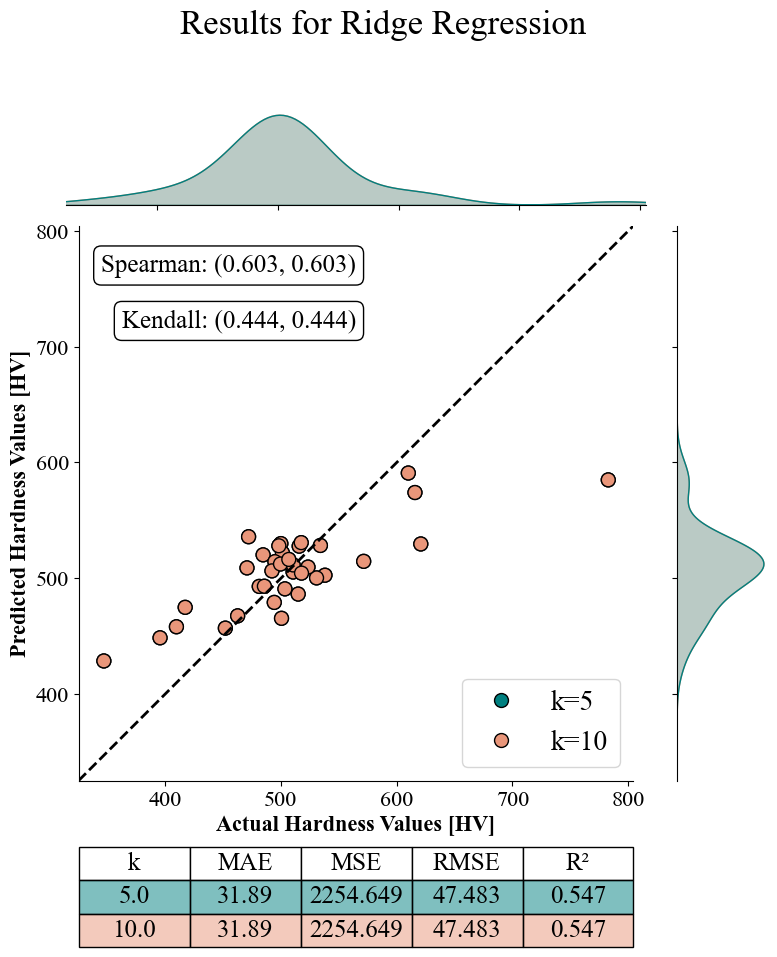

In [27]:
# ===============================
# 1. Define Lasso and Ridge Models
# ===============================

# Initialize Lasso and Ridge regression models
model_Lasso = Lasso(random_state=50)
model_Ridge = Ridge(random_state=50)

# List of models to be used
models = ['Lasso', 'Ridge']

# ===============================
# 2. Define Data Preprocessing Techniques
# ===============================

# Retrieve scaler objects for target variable transformation
standard_scale_y = scaler_objects_y['StandardScaler']
minmax_scale_y = scaler_objects_y['MinMaxScaler']
norm_scale_y = scaler_objects_y['Normalizer']

# ===============================
# 3. Define Hyperparameter Grid for Grid Search
# ===============================

# Hyperparameter grid for tuning the models
param_grid = {
    'alpha': np.arange(0.06, 1.02, 0.02),  # Regularization strength (higher alpha = more regularization)
    'max_iter': [5000]  # Maximum number of iterations for optimization
}

# Define different data preprocessing techniques to test
data_types = ['Unprocessed', 'StandardScaler', 'MinMaxScaler', 'Normalizer']

# ===============================
# 4. Initialize Dictionaries to Store Results
# ===============================

grid_searches_reg = {}  # Stores GridSearchCV results
evaluate_dfs_reg = {}  # Stores evaluation metrics
best_params_reg = {}  # Stores best hyperparameters
y_pred_tests_reg = {}  # Stores predicted values
new_evaluation_dfs_reg = {}  # Stores new evaluation DataFrames after rescaling
y_unscaled_preds_reg = {}  # Stores unscaled predictions

# ===============================
# 5. Train and Evaluate Lasso and Ridge Models
# ===============================

# Loop over cross-validation folds (k=5, k=10)
for k in k_values:
    # Loop over Lasso and Ridge models
    for model_name, model in [('Lasso', Lasso()), ('Ridge', Ridge())]:
        # Loop over each data preprocessing type
        for data in data_types:
            print(k, model_name, data)  # Print current configuration

            # Generate dynamic variable names for storing results
            grid_search_name = f"grid_searches_{data}_{model_name}_{k}"
            evaluate_df_name = f"evaluate_df_{data}_{model_name}_{k}"
            best_params_name = f"best_params_{data}_{model_name}_{k}"
            y_pred_test_name = f"y_pred_test_{data}_{model_name}_{k}"

            # Perform Grid Search to find the best hyperparameters
            (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
                model, param_grid, k, X_train[data], y_train[data].ravel(),
                X_test[data], y_test[data].ravel()
            )

            # Store results in dictionaries
            grid_searches_reg[grid_search_name] = grid_search_var
            evaluate_dfs_reg[evaluate_df_name] = evaluate_df_var
            best_params_reg[best_params_name] = best_params_var
            y_pred_tests_reg[y_pred_test_name] = y_pred_test_var

            # Reshape predictions for rescaling
            y_pred_test_var_reshaped = y_pred_test_var.reshape(-1, 1)

            # Rescale the target variable back to its original scale
            new_evaluation_df_name = f"new_evaluation_df_{data}_{model_name}_{k}"
            y_unscaled_pred_name = f"y_unscaled_pred_{data}_{model_name}_{k}"

            # Select the appropriate scaler for inverse transformation
            if data == 'StandardScaler':
                scale_y = standard_scale_y
            elif data == 'MinMaxScaler':
                scale_y = minmax_scale_y
            elif data == 'Normalizer':
                scale_y = norm_scale_y

            # Rescale predictions and evaluate model performance
            new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
                y_pred_test_var_reshaped, y_test['Unprocessed'],
                evaluate_df_var, scale_y
            )

            # Store rescaled predictions and evaluation results
            new_evaluation_dfs_reg[new_evaluation_df_name] = new_evaluation_dfs_var
            y_unscaled_preds_reg[y_unscaled_pred_name] = y_unscaled_preds_var

# ===============================
# 6. Identify the Best Model Configurations
# ===============================

# Initialize an empty list to store DataFrames
dfs_list = []

# Loop through evaluation results
for key, value in new_evaluation_dfs_reg.items():
    parts = key.split('_')

    # Ensure key follows the expected format
    if len(parts) == 6 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[4] in models and parts[5].isdigit():
        data_type = parts[3]
        model_name = parts[4]
        k = int(parts[5])

        # Retrieve best parameters for the model
        best_params_key = f"best_params_{data_type}_{model_name}_{k}"
        best_param_values = best_params_reg.get(best_params_key, None)

        # Store information in a DataFrame
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['model'] = model_name
        df_with_info['data_type'] = data_type

        # Add hyperparameters to DataFrame if available
        if best_param_values:
            for param, val in best_param_values.items():
                df_with_info[param] = val

        # Append DataFrame to the list
        dfs_list.append(df_with_info)

# Combine all DataFrames
final_df = pd.concat(dfs_list, ignore_index=True) if dfs_list else print("No valid DataFrames to concatenate.")

# Select the model with the lowest MAE
mae_rows = final_df[final_df['error_metric'] == 'MAE']
lowest_mae_lasso_row = mae_rows[mae_rows['model'] == 'Lasso'].loc[mae_rows['testing_error'].idxmin()]
lowest_mae_ridge_row = mae_rows[mae_rows['model'] == 'Ridge'].loc[mae_rows['testing_error'].idxmin()]

print("Lowest MAE (Lasso):", lowest_mae_lasso_row)
print("Lowest MAE (Ridge):", lowest_mae_ridge_row)

# ===============================
# 7. Visualize Results for Best Models
# ===============================

df_stats_Lasso, df_results_Lasso = visualize_results(
    new_evaluation_dfs_reg['new_evaluation_df_StandardScaler_Lasso_5'], 
    new_evaluation_dfs_reg['new_evaluation_df_StandardScaler_Lasso_10'], 
    y_test['Unprocessed'], 
    y_unscaled_preds_reg['y_unscaled_pred_StandardScaler_Lasso_5'].flatten(), 
    y_unscaled_preds_reg['y_unscaled_pred_StandardScaler_Lasso_10'].flatten(),
    'Results for Lasso Regression'
)

df_stats_Ridge, df_results_Ridge = visualize_results(
    new_evaluation_dfs_reg['new_evaluation_df_StandardScaler_Ridge_5'], 
    new_evaluation_dfs_reg['new_evaluation_df_StandardScaler_Ridge_10'], 
    y_test['Unprocessed'], 
    y_unscaled_preds_reg['y_unscaled_pred_StandardScaler_Ridge_5'].flatten(), 
    y_unscaled_preds_reg['y_unscaled_pred_StandardScaler_Ridge_10'].flatten(),
    'Results for Ridge Regression'
)


# 📌 Feature Selection Using Lasso and Ridge Regression

## 🔹 Why Perform Feature Selection?
Feature selection helps improve model interpretability, reduce overfitting, and enhance computational efficiency by keeping only the most **relevant** features.

## 🔹 How Lasso and Ridge Regression Help with Feature Selection
**Lasso Regression (L1 Regularization)**:
- **Automatically selects features** by driving some coefficients to **exactly zero**.
- Eliminates **less important** features, making it ideal for feature selection.

**Ridge Regression (L2 Regularization)**:
- **Does not eliminate features**, but **shrinks coefficients**.
- Keeps all features but reduces their impact, preventing overfitting.

---

## 🔹 What This Code Does:
✅ Retrieves **best hyperparameters** for Lasso and Ridge from `GridSearchCV`.  
✅ **Trains Lasso and Ridge models** using the best `alpha` values.  
✅ Extracts and **visualizes feature importance** using coefficient values.  
✅ **Compares feature selection behavior** between Lasso and Ridge.  

📌 **Next, we implement Lasso and Ridge for feature selection and visualization.**


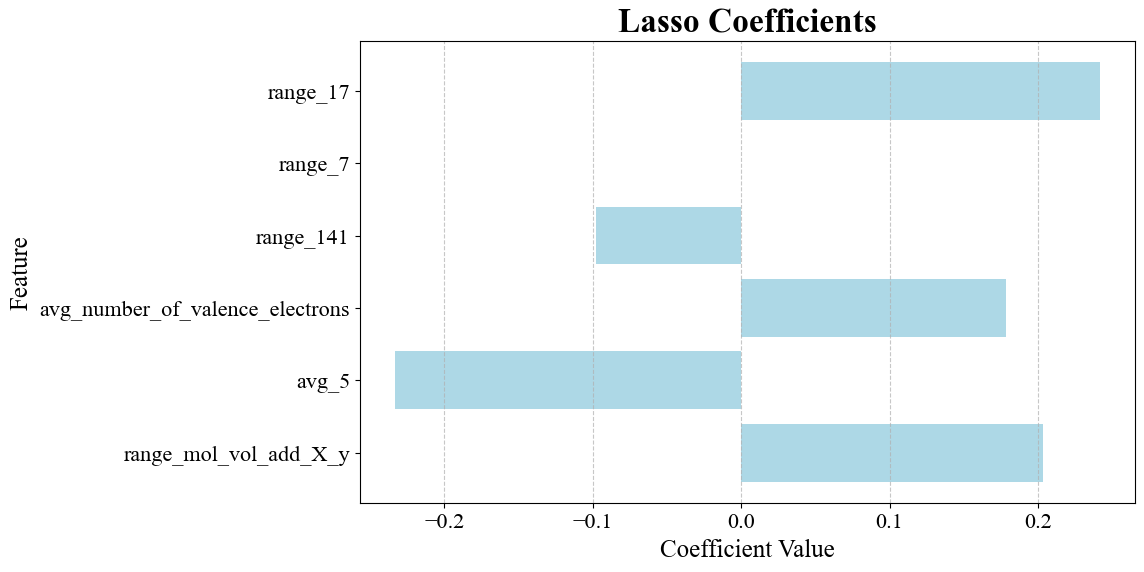

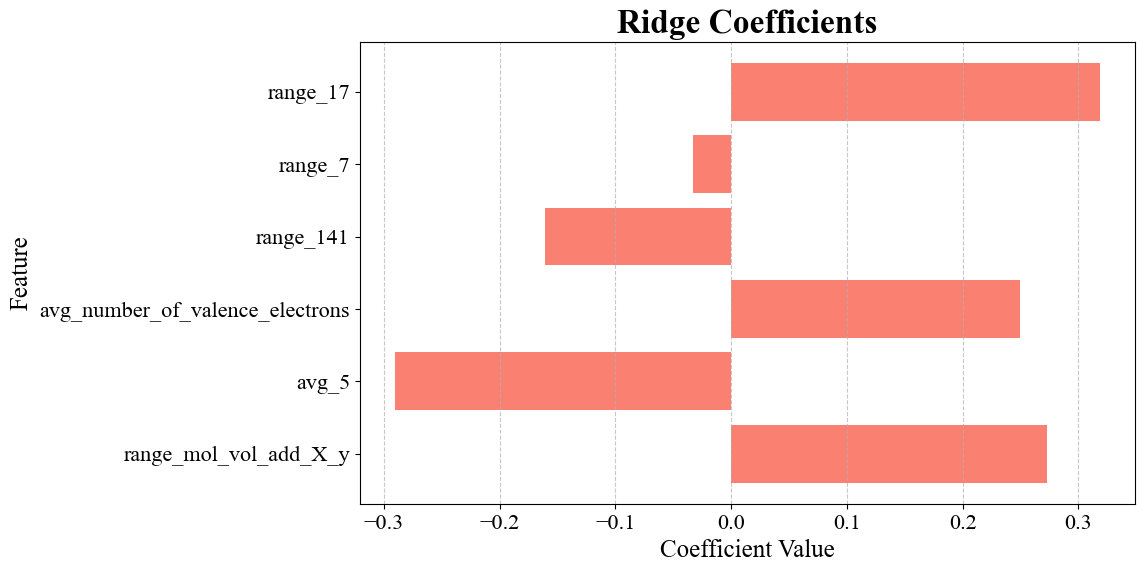

In [28]:
# ===============================
# 1. Retrieve Best Hyperparameters for Lasso and Ridge
# ===============================

# Extract best hyperparameters found via GridSearchCV for Lasso and Ridge models
best_params_lasso = best_params_reg['best_params_StandardScaler_Lasso_5']
best_params_ridge = best_params_reg['best_params_StandardScaler_Ridge_5']

# ===============================
# 2. Train Lasso and Ridge Models Using Best Parameters
# ===============================

# Initialize Lasso model with optimal alpha value
lasso_model_best = Lasso(alpha=best_params_lasso['alpha'], max_iter=5000)

# Initialize Ridge model with optimal alpha value
ridge_model_best = Ridge(alpha=best_params_ridge['alpha'], max_iter=5000)

# Train (fit) Lasso and Ridge models using StandardScaler-transformed data
lasso_model_best.fit(X_train['StandardScaler'], y_train['StandardScaler'].ravel())
ridge_model_best.fit(X_train['StandardScaler'], y_train['StandardScaler'].ravel())

# ===============================
# 3. Extract Feature Coefficients from Lasso and Ridge Models
# ===============================

# Lasso regression coefficients (some will be exactly zero, indicating removed features)
lasso_coefficients = lasso_model_best.coef_

# Ridge regression coefficients (all features retained, but with reduced magnitude)
ridge_coefficients = ridge_model_best.coef_

# Retrieve feature names from the original dataset
feature_names = X_train['Unprocessed'].columns

# ===============================
# 4. Visualize Lasso Coefficients (Feature Importance)
# ===============================

plt.figure(figsize=(10, 6))

# Plot feature importance for Lasso (blue bars)
plt.barh(feature_names, lasso_coefficients, color='lightblue')

# Customize plot appearance
plt.xlabel('Coefficient Value', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Lasso Coefficients', fontsize=24, fontweight='bold')

# Add grid lines to improve readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the Lasso coefficient plot
plt.savefig(directory_path + "Lasso_Coef.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()

# ===============================
# 5. Visualize Ridge Coefficients (Feature Importance)
# ===============================

plt.figure(figsize=(10, 6))

# Plot feature importance for Ridge (salmon-colored bars)
plt.barh(feature_names, ridge_coefficients, color='salmon')

# Customize plot appearance
plt.xlabel('Coefficient Value', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Ridge Coefficients', fontsize=24, fontweight='bold')

# Add grid lines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the Ridge coefficient plot
plt.savefig(directory_path + "Ridge_Coef.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()


# 📌 Evaluating Coefficient Stability and Importance in Lasso and Ridge Regression

## 🔹 What is Happening in This Code?
This code **performs cross-validation (CV) on Lasso and Ridge regression models** and analyzes the **stability and variability** of feature importance across different training subsets.

## 🔹 Why is This Important?
1️⃣ **Ensures Model Stability** → Checks if selected features are **consistent** across different training splits.  
2️⃣ **Reduces Overfitting** → Helps determine if coefficients change significantly, which could indicate sensitivity to input data.  
3️⃣ **Enhances Interpretability** → Boxplots **visualize feature importance distribution**, showing **which features contribute consistently**.  
4️⃣ **Improves Feature Selection** → Lasso might eliminate different features in each fold; checking its **stability** is crucial.  

---

## 🔹 How This Code Works
✅ **Retrieves the best Lasso and Ridge models** from previous GridSearchCV.  
✅ **Performs repeated cross-validation (RepeatedKFold, 5 splits, 5 repeats)**.  
✅ **Extracts feature coefficients** from each trained model.  
✅ **Combines coefficients** into a DataFrame for visualization.  
✅ **Plots boxplots** to show **coefficient variability and importance**.  

📌 **Next, we analyze the coefficient stability for Lasso and Ridge models.**


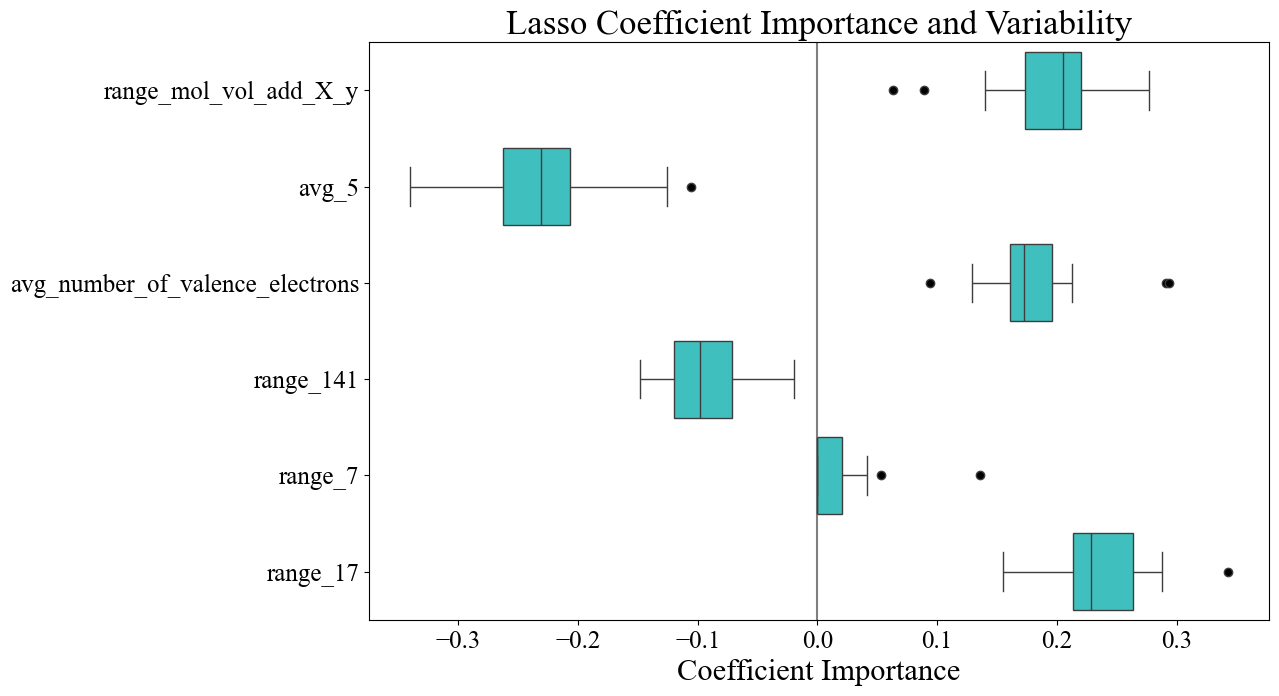

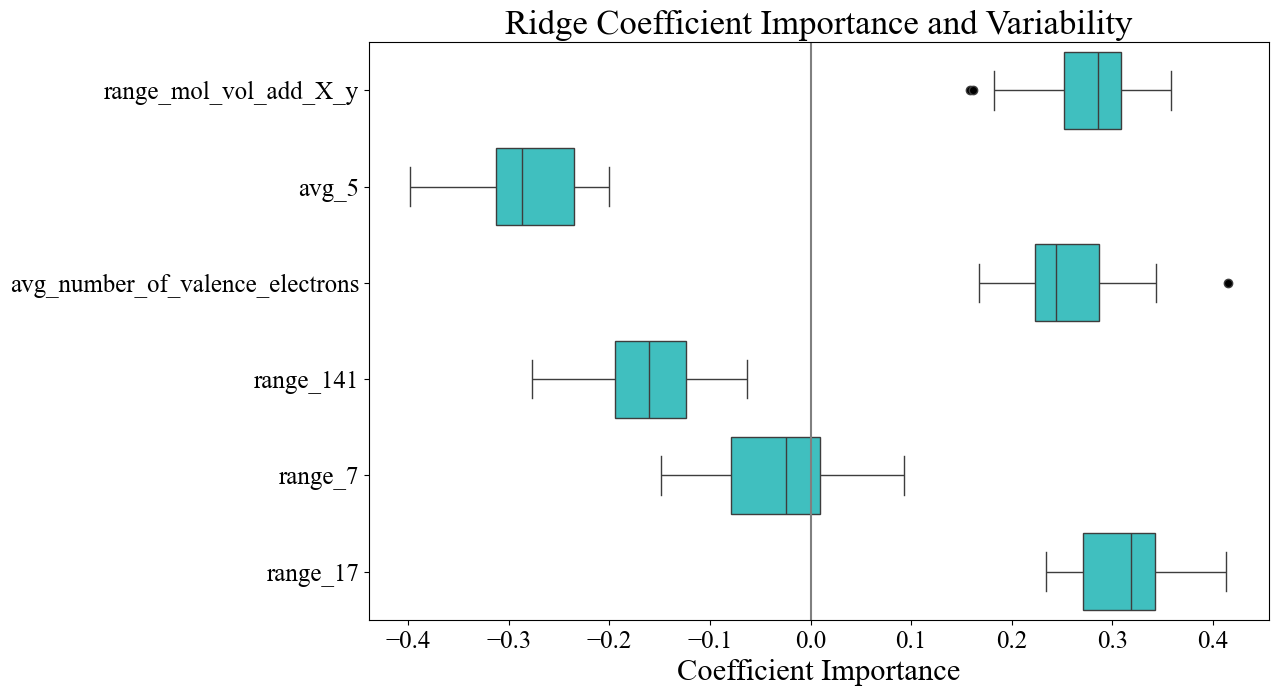

In [29]:
# ===============================
# 1. Evaluate Coefficient Stability for Lasso Regression
# ===============================

# Retrieve the best trained Lasso model from GridSearchCV results
lasso_cv_model = grid_searches_reg['grid_searches_StandardScaler_Lasso_5'].best_estimator_

# Perform **cross-validation (5 splits, 5 repeats)** to evaluate coefficient stability
lasso_cv_results = cross_validate(
    lasso_cv_model,                             # Best Lasso model
    X_train['StandardScaler'],                  # Standardized training features
    y_train['StandardScaler'],                  # Standardized target variable
    cv=RepeatedKFold(n_splits=5, n_repeats=5),  # 5x5 repeated cross-validation
    return_estimator=True,                      # Store trained models from each fold
    n_jobs=2                                    # Run parallel jobs for efficiency
)

# Extract coefficients from all trained models across CV folds
lasso_coefs = np.concatenate([model.coef_.reshape(1, -1) for model in lasso_cv_results['estimator']])

# Convert coefficients into a DataFrame for easier visualization
lasso_coefs_df = pd.DataFrame(lasso_coefs, columns=X_train['Unprocessed'].columns)

# ===============================
# 2. Plot Coefficient Variability for Lasso Regression
# ===============================

plt.figure(figsize=(15, 7.5))

# Boxplot shows distribution of feature coefficients across CV folds
sns.boxplot(data=lasso_coefs_df, orient='h', color='cyan', saturation=0.5,
            flierprops={'markerfacecolor': 'black'})  # Outliers are shown as black dots

plt.axvline(x=0, color='.5')  # Add vertical line at x=0 for reference
plt.xlabel('Coefficient Importance', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Lasso Coefficient Importance and Variability', fontsize=25)
plt.subplots_adjust(left=.3)  # Adjust left margin for better visibility

# Save plot to file
plt.savefig(directory_path + "Lasso_Coef_variability.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()

# ===============================
# 3. Evaluate Coefficient Stability for Ridge Regression
# ===============================

# Retrieve the best trained Ridge model from GridSearchCV results
ridge_cv_model = grid_searches_reg['grid_searches_StandardScaler_Ridge_5'].best_estimator_

# Perform **cross-validation (5 splits, 5 repeats)** to evaluate coefficient stability
ridge_cv_results = cross_validate(
    ridge_cv_model,                             # Best Ridge model
    X_train['StandardScaler'],                  # Standardized training features
    y_train['StandardScaler'],                  # Standardized target variable
    cv=RepeatedKFold(n_splits=5, n_repeats=5),  # 5x5 repeated cross-validation
    return_estimator=True,                      # Store trained models from each fold
    n_jobs=2                                    # Run parallel jobs for efficiency
)

# Extract coefficients from all trained models across CV folds
ridge_coefs = np.concatenate([model.coef_.reshape(1, -1) for model in ridge_cv_results['estimator']])

# Convert coefficients into a DataFrame for easier visualization
ridge_coefs_df = pd.DataFrame(ridge_coefs, columns=X_train['Unprocessed'].columns)

# ===============================
# 4. Plot Coefficient Variability for Ridge Regression
# ===============================

plt.figure(figsize=(15, 7.5))

# Boxplot shows distribution of feature coefficients across CV folds
sns.boxplot(data=ridge_coefs_df, orient='h', color='cyan', saturation=0.5,
            flierprops={'markerfacecolor': 'black'})  # Outliers are shown as black dots

plt.axvline(x=0, color='.5')  # Add vertical line at x=0 for reference
plt.xlabel('Coefficient Importance', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Ridge Coefficient Importance and Variability', fontsize=25)
plt.subplots_adjust(left=.3)  # Adjust left margin for better visibility

# Save plot to file
plt.savefig(directory_path + "Ridge_Coef_variability.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()


# 📌 SHAP Analysis for Lasso and Ridge Regression

## 🔹 Why Perform SHAP Analysis?
SHAP (SHapley Additive exPlanations) provides a **mathematically consistent way** to interpret machine learning models. In the case of **Lasso and Ridge regression**, SHAP helps us understand **which features contribute the most** to predictions.

## 🔹 How This Code Expands on SHAP Analysis
1️⃣ **Uses Lasso and Ridge models trained with optimal hyperparameters.**  
2️⃣ **Applies SHAP to analyze feature importance.**  
3️⃣ **Compares training and testing SHAP values to check consistency.**  
4️⃣ **Visualizes feature importance using bar plots.**  
5️⃣ **Ensures results are saved and displayed for further analysis.**  

## 🔹 Key Differences from SVR SHAP Analysis
- **Lasso can shrink coefficients to zero**, eliminating some features.  
- **Ridge retains all features**, but **reduces their impact**.  
- **SHAP helps compare these behaviors** and identify critical predictors.  

📌 **Next, we implement SHAP analysis for Lasso and Ridge models to interpret feature importance. 🚀**


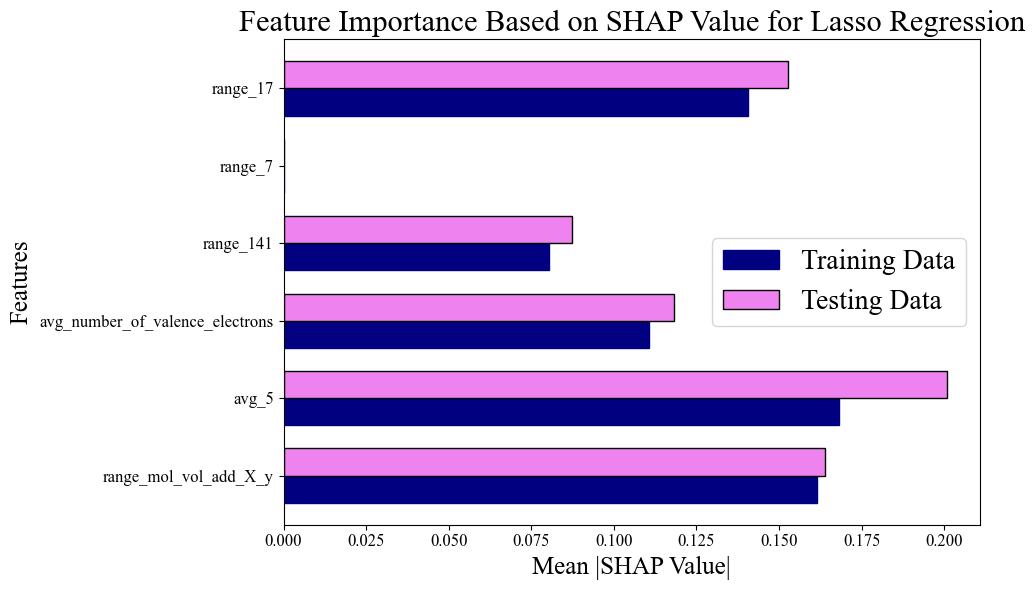

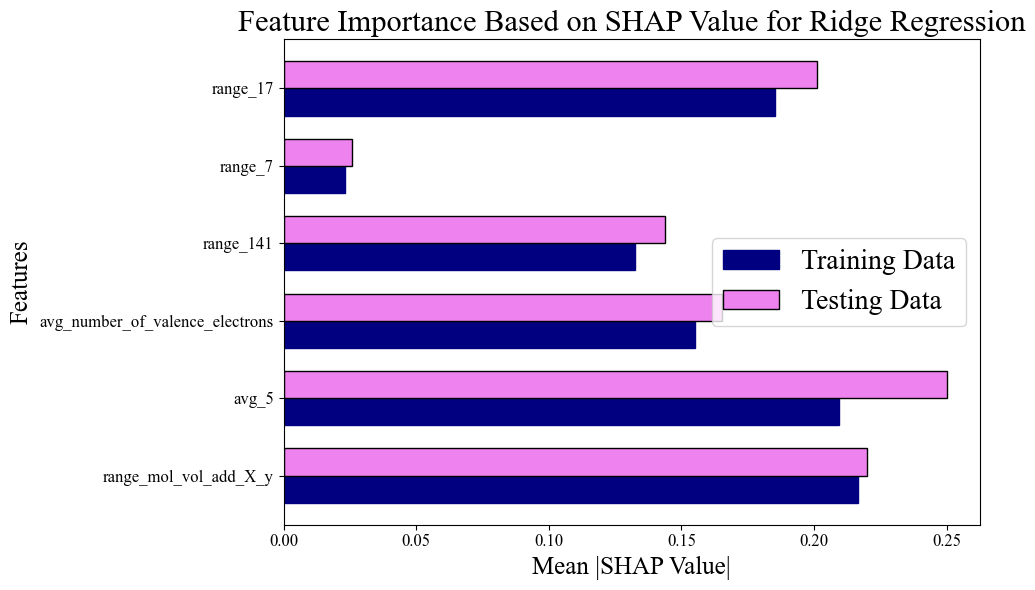

In [30]:
# ===============================
# 1. Standardizing the Combined Data (Feature Scaling)
# ===============================

# Initialize a StandardScaler object for normalization
standard_scale = StandardScaler()

# Reshape target variable (y) into a 2D array to be compatible with StandardScaler
y_combined_reshaped = y.values.reshape(-1, 1)

# Fit the scaler on the entire feature dataset (X_) and target variable (y)
standard_scale.fit(X_)
standard_scale.fit(y_combined_reshaped)

# Transform the feature dataset using StandardScaler
X_combined_Standard = standard_scale.fit_transform(X_)

# Convert the transformed data back into a DataFrame with original column names
X_combined_Standard = pd.DataFrame(X_combined_Standard, columns=X_.columns)

# Transform the target variable using StandardScaler
y_combined_Standard = standard_scale.fit_transform(y_combined_reshaped)

# Convert training and testing datasets from NumPy arrays to Pandas DataFrames
X_train_Standard = pd.DataFrame(X_train['StandardScaler'], columns=X_train['Unprocessed'].columns)
X_test_Standard = pd.DataFrame(X_test['StandardScaler'], columns=X_test['Unprocessed'].columns)

# ===============================
# 2. SHAP Analysis for Lasso Regression
# ===============================

# Retrieve the best estimator from GridSearchCV for Lasso regression (StandardScaler, k=10)
best_estimator = grid_searches_reg['grid_searches_StandardScaler_Lasso_10'].best_estimator_

# Create a SHAP explainer for the Lasso regression model
# "Independent" masker ensures SHAP calculations are independent for each feature
explainer = shap.LinearExplainer(best_estimator, masker=shap.maskers.Independent(X_train_Standard))

# Compute SHAP values for both training and testing datasets
shap_values_train = explainer.shap_values(X_train_Standard)
shap_values_test = explainer.shap_values(X_test_Standard)

# Compute the mean absolute SHAP values for training and testing sets
# These represent the overall importance of each feature in making predictions
mean_shap_train = np.abs(shap_values_train).mean(axis=0)
mean_shap_test = np.abs(shap_values_test).mean(axis=0)

# Retrieve feature names for labeling the plots
feature_names = X_train_Standard.columns

# ===============================
# 3. Visualizing SHAP Feature Importance for Lasso
# ===============================

# Define the height of the bars in the bar plot
bar_height = 0.35

# Set the positions of the bars for training and testing datasets
r1 = np.arange(len(feature_names))  # Training dataset positions
r2 = [x + bar_height for x in r1]   # Testing dataset positions

# Create a horizontal bar plot for SHAP feature importance
plt.figure(figsize=(10, 6))

# Plot SHAP values for training data in navy color
plt.barh(r1, mean_shap_train, color='navy', height=bar_height, edgecolor='navy', label='Training Data')

# Plot SHAP values for testing data in violet color
plt.barh(r2, mean_shap_test, color='violet', height=bar_height, edgecolor='black', label='Testing Data')

# Customize axis labels and title
plt.xticks(fontsize=12)
plt.yticks([r + bar_height / 2 for r in range(len(feature_names))], feature_names, fontsize=12)
plt.xlabel('Mean |SHAP Value|', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Feature Importance Based on SHAP Value for Lasso Regression', fontsize=22)

# Add a legend to distinguish between training and testing datasets
plt.legend(fontsize=20, loc='best')

# Save the plot as an image file
plt.savefig(directory_path + "Feature_Importance_SHAP_Lasso.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

# ===============================
# 4. SHAP Analysis for Ridge Regression
# ===============================

# Retrieve the best estimator from GridSearchCV for Ridge regression (StandardScaler, k=10)
best_estimator = grid_searches_reg['grid_searches_StandardScaler_Ridge_10'].best_estimator_

# Create a SHAP explainer for the Ridge regression model
explainer = shap.LinearExplainer(best_estimator, masker=shap.maskers.Independent(X_train_Standard))

# Compute SHAP values for both training and testing datasets
shap_values_train = explainer.shap_values(X_train_Standard)
shap_values_test = explainer.shap_values(X_test_Standard)

# Compute the mean absolute SHAP values for training and testing sets
mean_shap_train = np.abs(shap_values_train).mean(axis=0)
mean_shap_test = np.abs(shap_values_test).mean(axis=0)

# Retrieve feature names for labeling the plots
feature_names = X_train_Standard.columns

# ===============================
# 5. Visualizing SHAP Feature Importance for Ridge
# ===============================

# Create a horizontal bar plot for SHAP feature importance
plt.figure(figsize=(10, 6))

# Plot SHAP values for training data in navy color
plt.barh(r1, mean_shap_train, color='navy', height=bar_height, edgecolor='navy', label='Training Data')

# Plot SHAP values for testing data in violet color
plt.barh(r2, mean_shap_test, color='violet', height=bar_height, edgecolor='black', label='Testing Data')

# Customize axis labels and title
plt.xticks(fontsize=12)
plt.yticks([r + bar_height / 2 for r in range(len(feature_names))], feature_names, fontsize=12)
plt.xlabel('Mean |SHAP Value|', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Feature Importance Based on SHAP Value for Ridge Regression', fontsize=22)

# Add a legend to distinguish between training and testing datasets
plt.legend(fontsize=20, loc='best')

# Save the plot as an image file
plt.savefig(directory_path + "Feature_Importance_SHAP_Ridge.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


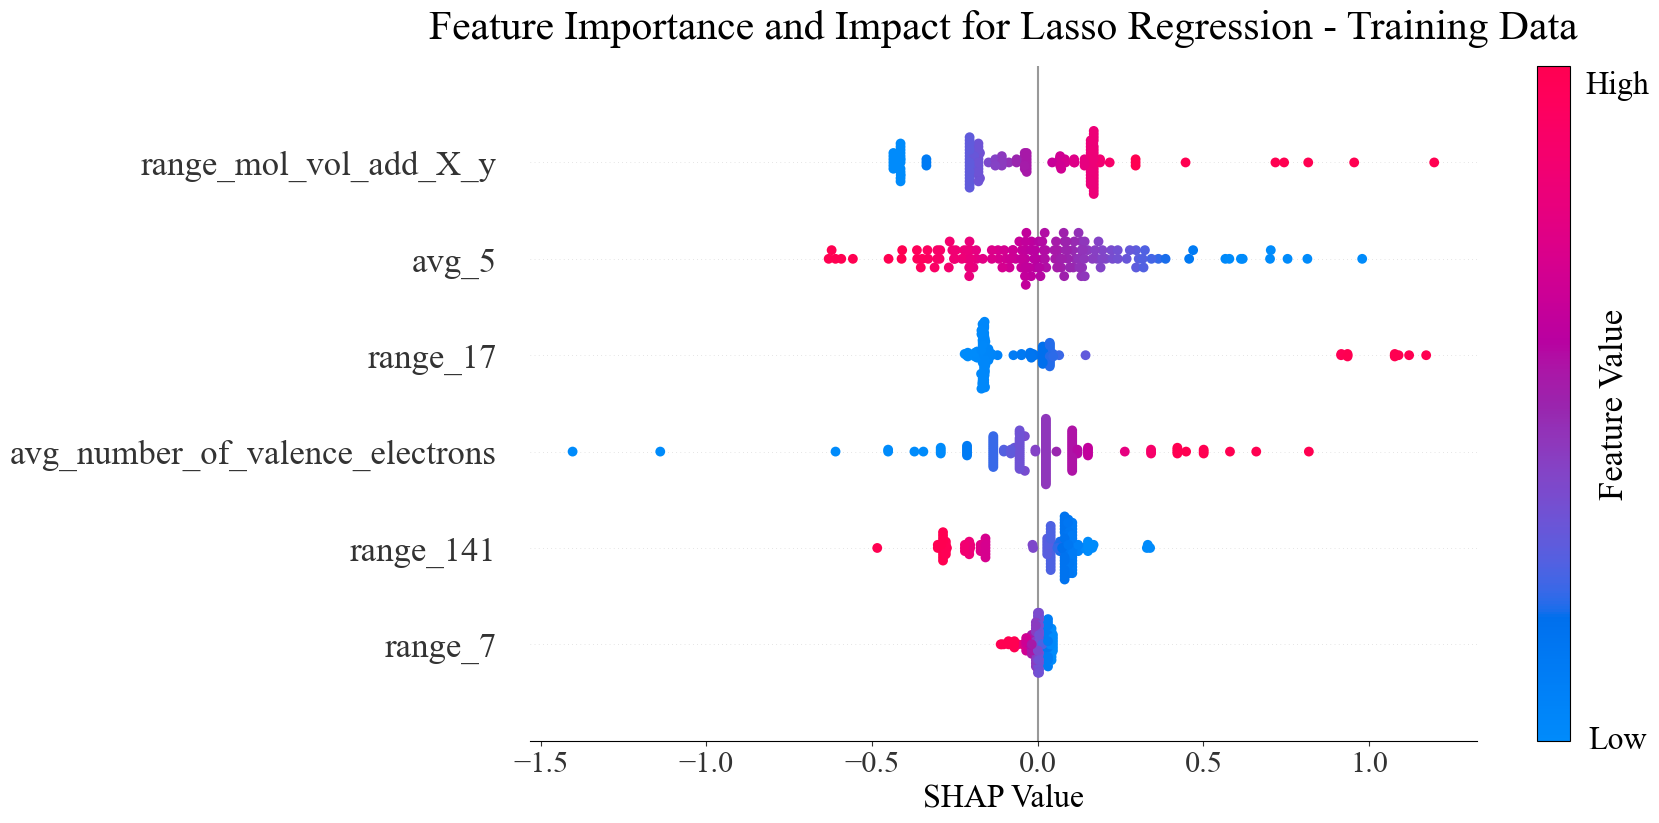

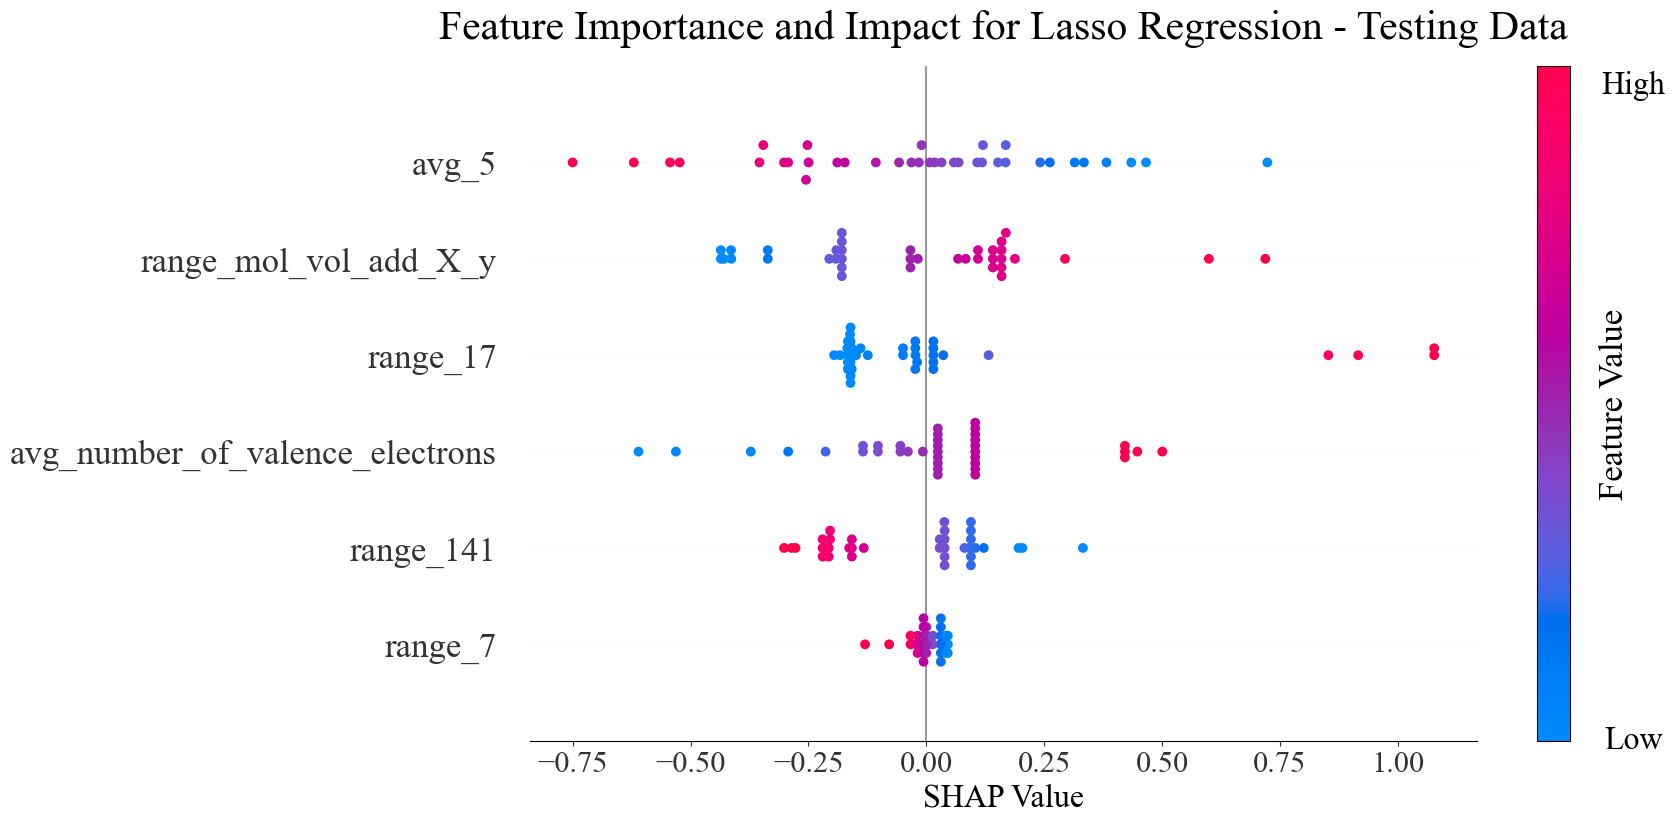

In [31]:
# =====================================
# 1. SHAP Summary Plot for Training Data (Lasso Regression)
# =====================================

# Note: SHAP values represent how much each feature contributes to a single prediction.
# Higher absolute SHAP values indicate greater importance in the model's decision-making.

# Compute SHAP values for the training dataset
# shap_values_train contains the impact of each feature on model predictions

# Create a new figure to plot SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot
# - Displays feature importance ranked from most to least influential
# - Each point represents a feature's impact on one sample
cax = shap.summary_plot(shap_values_train, X_train_Standard, show=False, plot_size=[15, 7.5], color_bar=False)

# =====================================
# 2. Enhance Plot Readability (Increase Marker Size)
# =====================================

# Access all axes in the current figure
for ax in plt.gcf().axes:
    # Iterate through plotted elements in the figure
    for collection in ax.collections:
        # Check if the element is a scatter plot (PathCollection)
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([50])  # Increase marker size for better visibility

# =====================================
# 3. Add Custom Color Bar
# =====================================

# Add a color bar without tick labels (to indicate feature values)
cbar = plt.colorbar(ticks=[])  # Removes tick marks from color bar
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)  # Add a label to the color bar
cbar.ax.yaxis.set_label_position('right')  # Position the label on the right side of the color bar

# =====================================
# 4. Customize Labels and Titles
# =====================================

# Set title for the plot
plt.title('Feature Importance and Impact for Lasso Regression - Training Data', fontsize=30, pad=20)

# Set labels for x-axis and y-axis
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)  # Increase font size of y-axis labels
plt.xticks(fontsize=22)  # Increase font size of x-axis labels

# =====================================
# 5. Add Text Annotations ("Low" and "High" Feature Importance)
# =====================================

# "Low" feature importance annotation on the lower side of the plot
plt.text(1.75, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# "High" feature importance annotation on the upper side of the plot
plt.text(1.75, 5.8, 'High', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# =====================================
# 6. Save the Figure and Display
# =====================================

# Save the plot as a PNG file
f.savefig(directory_path + "Feature_Impact_SHAP_Lasso_training.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()

# =====================================
# 7. SHAP Summary Plot for Testing Data (Lasso Regression)
# =====================================

# Repeat the same process for testing data
f = plt.figure()
cax = shap.summary_plot(shap_values_test, X_test_Standard, show=False, plot_size=[15, 7.5], color_bar=False)

# Increase marker size for better visibility
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([50])

# Add a color bar without tick labels
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)
cbar.ax.yaxis.set_label_position('right')

# Set title and labels for the plot
plt.title('Feature Importance and Impact for Lasso Regression - Testing Data', fontsize=30, pad=20)
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# "Low" feature importance annotation
plt.text(1.5, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# "High" feature importance annotation
plt.text(1.5, 5.8, 'High', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Save the plot as a PNG file
f.savefig(directory_path + "Feature_Impact_SHAP_Lasso_testing.png", dpi=100, bbox_inches='tight')

# Display the plot
plt.show()


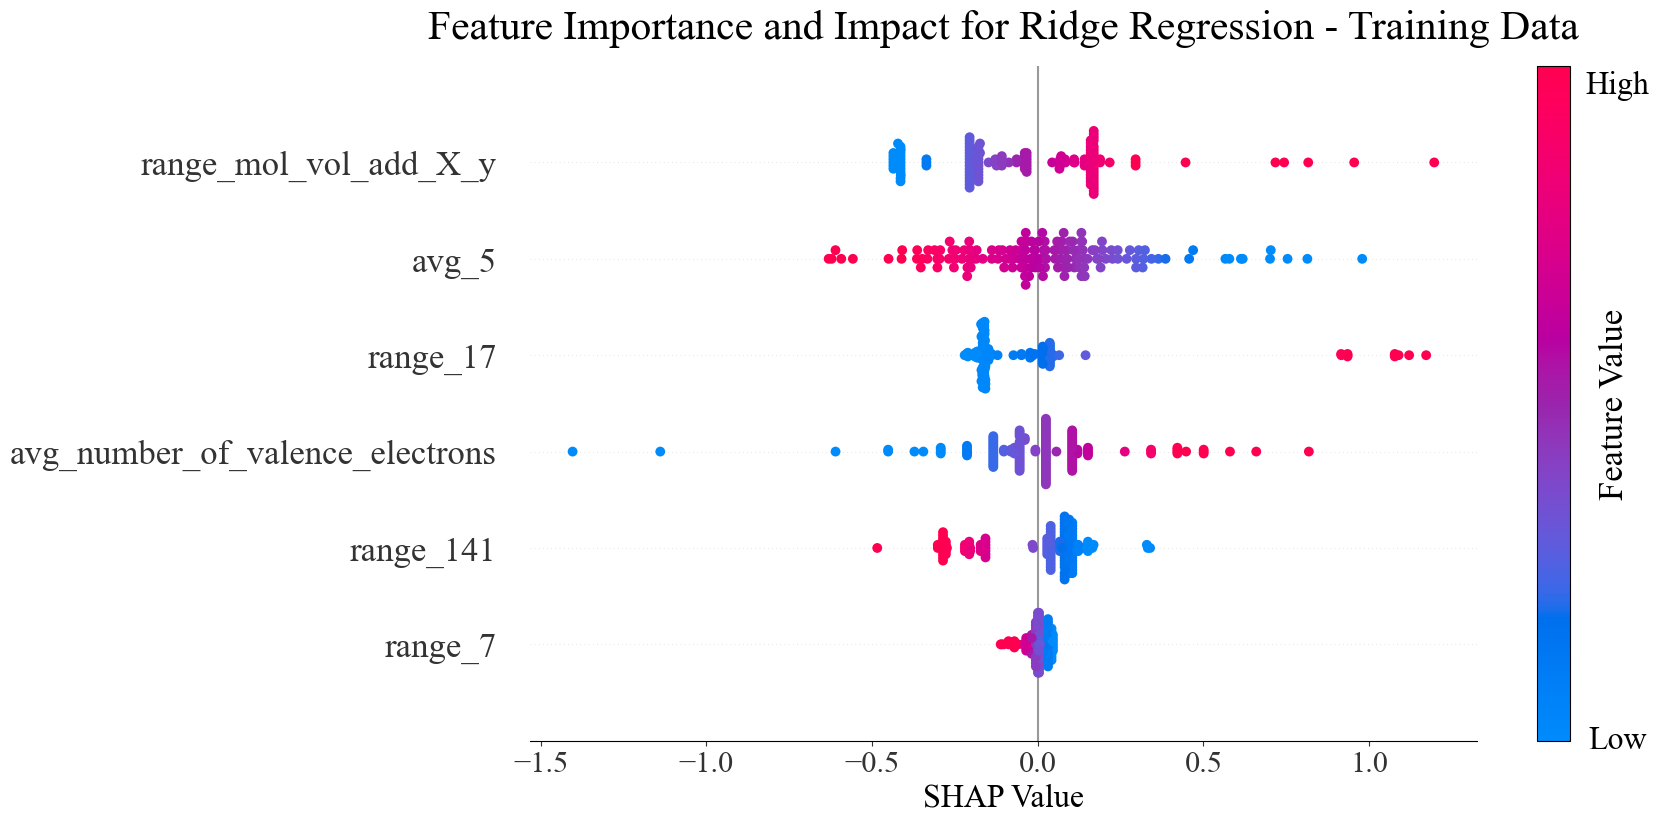

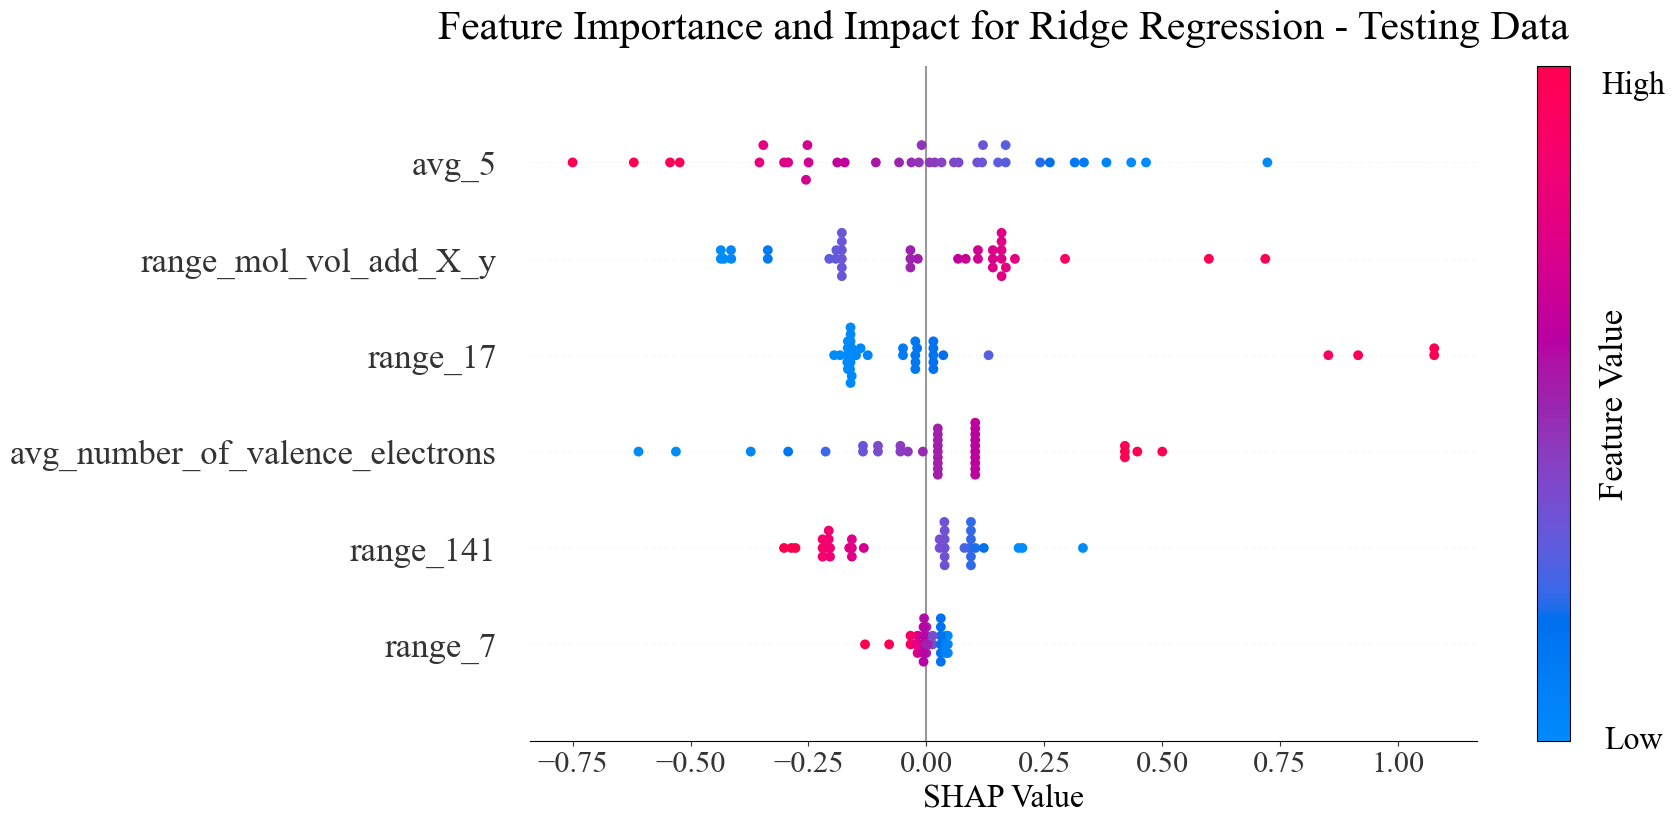

In [32]:
# =====================================
# 1. SHAP Summary Plot for Training Data (Ridge Regression)
# =====================================

# Compute SHAP values for the training dataset
# SHAP values explain how much each feature contributed to a single prediction
# Higher absolute SHAP values indicate more influence on model output

# Create a new figure for the SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot
# - Ranks features from most to least important
# - Each dot represents the impact of a feature on an individual sample
cax = shap.summary_plot(shap_values_train, X_train_Standard, show=False, plot_size=[15, 7.5], color_bar=False)

# =====================================
# 2. Enhance Plot Readability (Increase Marker Size)
# =====================================

# Access all axes in the current figure
for ax in plt.gcf().axes:
    # Iterate through plotted elements in the figure
    for collection in ax.collections:
        # Ensure it's a scatter plot before modifying
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([50])  # Increase marker size for better visibility

# =====================================
# 3. Add Custom Color Bar
# =====================================

# Add a color bar without tick marks
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)  # Label the color bar
cbar.ax.yaxis.set_label_position('right')  # Position the label on the right side

# =====================================
# 4. Customize Labels and Titles
# =====================================

# Set title for the SHAP summary plot
plt.title('Feature Importance and Impact for Ridge Regression - Training Data', fontsize=30, pad=20)

# Set labels for the x-axis and y-axis
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)  # Increase font size of y-axis labels
plt.xticks(fontsize=22)  # Increase font size of x-axis labels

# =====================================
# 5. Add Text Annotations ("Low" and "High" Feature Importance)
# =====================================

# Indicate low feature importance on the lower side of the plot
plt.text(1.75, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Indicate high feature importance on the upper side of the plot
plt.text(1.75, 5.8, 'High', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# =====================================
# 6. Save the Figure and Display
# =====================================

# Save the plot as a PNG file
f.savefig(directory_path + "Feature_ImpactSHAP_Ridge_training.png", dpi=100, bbox_inches='tight')

# Show the plot
plt.show()

# =====================================
# 7. SHAP Summary Plot for Testing Data (Ridge Regression)
# =====================================

# Repeat the process for testing data
f = plt.figure()
cax = shap.summary_plot(shap_values_test, X_test_Standard, show=False, plot_size=[15, 7.5], color_bar=False)

# Increase marker size for better visibility
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):
            collection.set_sizes([50])

# Add a color bar without tick marks
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)
cbar.ax.yaxis.set_label_position('right')

# Set title and labels for the plot
plt.title('Feature Importance and Impact for Ridge Regression - Testing Data', fontsize=30, pad=20)
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Indicate low feature importance on the lower side
plt.text(1.5, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Indicate high feature importance on the upper side
plt.text(1.5, 5.8, 'High', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Save the plot as a PNG file
f.savefig(directory_path + "Feature_ImpactSHAP_Ridge_testing.png", dpi=100, bbox_inches='tight')

# Show the plot
plt.show()


# 📌 **Implementation of Kernel Ridge Regression (KRR) for Hardness Prediction**

## 🔹 **What is Kernel Ridge Regression (KRR)?**
**Kernel Ridge Regression (KRR)** is a combination of:
- **Ridge Regression**, which applies L2 regularization to prevent overfitting.
- **The Kernel Trick**, which enables non-linear modeling by transforming input features into higher-dimensional space.

KRR is particularly useful when the relationship between features and the target variable is **non-linear**.

---

## 🔹 **Why Use Kernel Ridge Regression?**
✅ **Handles non-linearity** effectively using kernel functions.  
✅ **Prevents overfitting** by applying L2 regularization.  
✅ **Works well with small datasets**, unlike deep learning models.  
✅ **Supports various kernels** (`linear`, `rbf`, `sigmoid`, etc.) for different data structures.  

---

## 🔹 **Key Hyperparameters in KRR**
| Hyperparameter | Description |
|---------------|-------------|
| **alpha** | Regularization parameter (higher values reduce model complexity). |
| **kernel** | Specifies the kernel function (`linear`, `rbf`, `sigmoid`, etc.). |
| **gamma** | Kernel coefficient, affecting the degree of non-linearity. |

### **Commonly Used Kernels in KRR:**
- **Linear** → Assumes a direct relationship between features and output.  
- **Radial Basis Function (RBF)** → Maps inputs into a higher-dimensional space, effective for complex relationships.  
- **Sigmoid** → Similar to neural network activation functions, useful for certain datasets.  

---

## 🔹 **What This Code Does**
🔹 **Initializes the Kernel Ridge Regression (KRR) model**.  
🔹 **Defines a hyperparameter grid** for tuning (`alpha`, `kernel`, `gamma`).  
🔹 **Applies different feature scaling techniques**:  
   - `Unprocessed` (raw data)  
   - `StandardScaler` (zero mean, unit variance)  
   - `MinMaxScaler` (scales between 0 and 1)  
🔹 **Performs hyperparameter tuning** using **GridSearchCV** with **cross-validation (`k=5`, `k=10`)**.  
🔹 **Finds the best model based on Mean Absolute Error (MAE)**.  
🔹 **Stores model performance results**, including:  
   - Best hyperparameters  
   - Evaluation metrics (MAE, MSE, RMSE, R²)  
   - Model predictions  
🔹 **Visualizes results** using:  
   - **Scatter plots** comparing actual vs. predicted values.  
   - **Summary tables** of model performance.  

---

## 🚀 **Steps in Implementing Kernel Ridge Regression**
### 🔹 **1. Initialize the Model**
- Create an instance of `KernelRidge()`.
- Define a hyperparameter grid for tuning.

### 🔹 **2. Apply Feature Scaling**
- Preprocess data using `StandardScaler`, `MinMaxScaler`, and `Unprocessed` formats.

### 🔹 **3. Perform Hyperparameter Tuning**
- Run **GridSearchCV** with **k-fold cross-validation (`k=5`, `k=10`)**.
- Optimize hyperparameters (`alpha`, `kernel`, `gamma`) for best performance.

### 🔹 **4. Evaluate and Rescale Predictions**
- Apply the best models to test data.
- Reverse the scaling (if applicable) to restore predictions to their original scale.

### 🔹 **5. Store and Analyze Results**
- Identify the best model based on **lowest Mean Absolute Error (MAE)**.
- Save hyperparameters and evaluation metrics.

### 🔹 **6. Visualize Results**
- Generate a **scatter plot** comparing actual vs. predicted values.
- Display a **summary table** of performance metrics.

---

📌 **Next, we implement Kernel Ridge Regression with hyperparameter tuning to optimize its performance. 🚀**


Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1568 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -26.3411318873623
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.6s finished


Best MSE score: -1598.4927697519047
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2545 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.5s finished


Best RMSE score: -38.36182015174056
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2514 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.6s finished


Best R2 score: 0.28379280787872224
Unprocessed 5
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.4s finished


Best MAE score: -0.4604936758399279
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2390 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.42091597004302167
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2483 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.4s finished


Best RMSE score: -0.6412903095395027
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.5s finished


Best R2 score: 0.4466335728847617
StandardScaler 5
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.06360459190836357
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.2s finished


Best MSE score: -0.008685002176721541
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.2s finished


Best RMSE score: -0.0917825065102644
Fitting 5 folds for each of 546 candidates, totalling 2730 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2272 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2730 out of 2730 | elapsed:    1.2s finished


Best R2 score: 0.29520234657496613
MinMaxScaler 5
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -27.72535084409114
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1683.5550128857544
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -37.577735592720416
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.24210888240427453
Unprocessed 10
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.456244406523162
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.38313188435003276
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.5962898090928078
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.38408926586240966
StandardScaler 10
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4314 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.06012941530966206
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4314 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.0067443154325359505
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.07899703386084043
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4314 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 5460 out of 5460 | elapsed:    2.1s finished


Best R2 score: 0.3025646493721285
MinMaxScaler 10
Row with lowest testing error (MAE):
error_metric                   MAE
validation_error          0.460494
testing_error            19.806117
k_value                          5
data_type           StandardScaler
alpha                        0.017
gamma                         0.05
kernel                         rbf
Name: 6, dtype: object


The figure layout has changed to tight


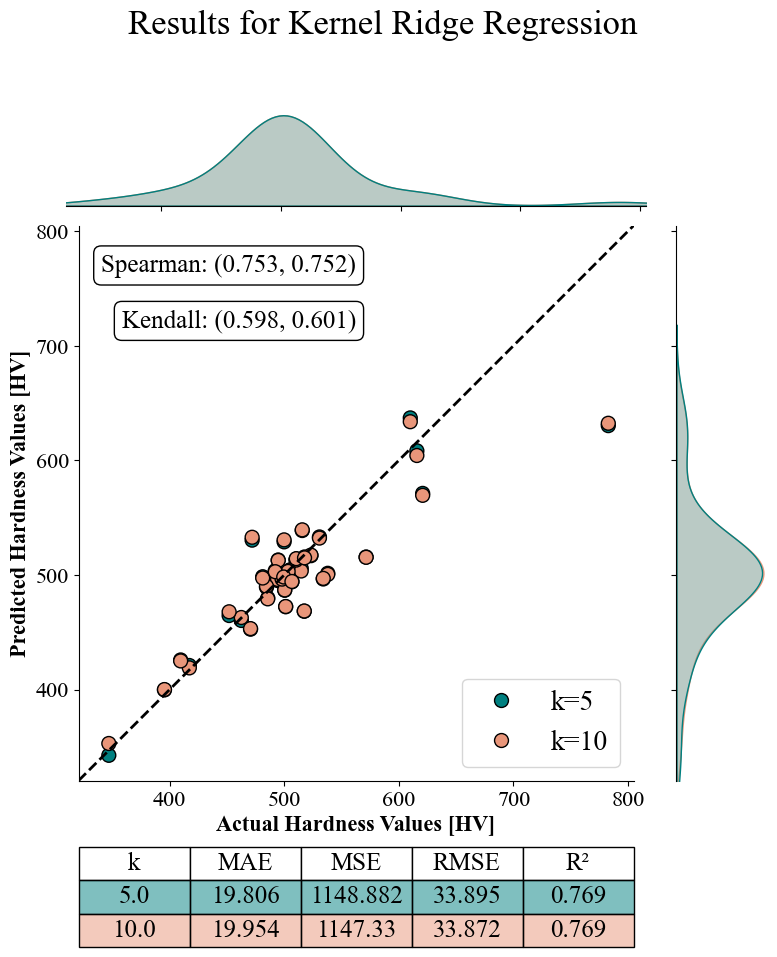

(    k     MAE       MSE    RMSE     R²
 0   5  19.806  1148.882  33.895  0.769
 1  10  19.954  1147.330  33.872  0.769,
         Actual  Predictions     k
 0   395.540000   399.778241   k=5
 1   347.000000   342.685655   k=5
 2   494.198889   495.212446   k=5
 3   538.010000   501.468876   k=5
 4   615.750000   608.337084   k=5
 ..         ...          ...   ...
 69  515.730000   539.392901  k=10
 70  517.495000   468.582288  k=10
 71  610.000000   633.725067  k=10
 72  485.640000   479.199558  k=10
 73  517.750000   514.961833  k=10
 
 [74 rows x 3 columns])

In [33]:
# =====================================
# 1. Define Model and Hyperparameter Grid
# =====================================

# Initialize Kernel Ridge Regression model
model_KRR = KRR()

# Define hyperparameter search space
param_grid_KRR = {
    'alpha': np.arange(0.01, 0.1, 0.001),  # Regularization strength
    'kernel': ['rbf', 'sigmoid'],  # Kernel functions for non-linearity
    'gamma': [0.01, 0.05, 0.75]  # Kernel coefficient for RBF and sigmoid
}

# Define cross-validation values (5-fold and 10-fold)
k_values = [5, 10]

# Retrieve different data scalers from stored objects
standard_scale_y = scaler_objects_y['StandardScaler']
minmax_scale_y = scaler_objects_y['MinMaxScaler']
norm_scale_y = scaler_objects_y['Normalizer']

# =====================================
# 2. Prepare Data Storage
# =====================================

# Define different data processing techniques
data_types = ['Unprocessed', 'StandardScaler', 'MinMaxScaler']

# Initialize dictionaries to store results for each KRR model variation
grid_searches_KRR = {}
evaluate_dfs_KRR = {}
best_params_KRR = {}
y_pred_tests_KRR = {}
new_evaluation_dfs_KRR = {}
y_unscaled_preds_KRR = {}

# =====================================
# 3. Loop Through Data Types and Train Models
# =====================================

for k in k_values:  # Loop over k-fold values (5 and 10)
    for data in data_types:  # Loop over different feature scaling techniques
        
        # Generate dynamic variable names for storing results
        grid_search_name = f"grid_searches_{data}_{k}"
        evaluate_df_name = f"evaluate_df_{data}_{k}"
        best_params_name = f"best_params_{data}_{k}"
        y_pred_test_name = f"y_pred_test_{data}_{k}"

        # Run Grid Search and Model Training
        (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
            model_KRR, param_grid_KRR, k, X_train[data], y_train[data],
            X_test[data], y_test[data]
        )

        # Store results in dictionaries
        grid_searches_KRR[grid_search_name] = grid_search_var
        evaluate_dfs_KRR[evaluate_df_name] = evaluate_df_var
        best_params_KRR[best_params_name] = best_params_var
        y_pred_tests_KRR[y_pred_test_name] = y_pred_test_var

        # Reshape predictions for inverse transformation
        y_pred_test_var_reshaped = y_pred_test_var.reshape(-1, 1)

        # Rescale predictions based on applied data transformation
        new_evaluation_df_name = f"new_evaluation_df_{data}_{k}"
        y_unscaled_pred_name = f"y_unscaled_pred_{data}_{k}"

        # Assign appropriate scaler for rescaling predictions
        if data == 'StandardScaler':
            scale_y = standard_scale_y
        elif data == 'MinMaxScaler':
            scale_y = minmax_scale_y
        elif data == 'Normalizer':
            scale_y = norm_scale_y
        else:
            scale_y = None  # If no scaler is defined, keep as None

        print(f"Processing {data} scaling with k={k}")

        # Rescale predictions and evaluate model performance
        new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
            y_pred_test_var_reshaped, y_test['Unprocessed'], evaluate_df_var, scale_y
        )

        # Store rescaled results
        new_evaluation_dfs_KRR[new_evaluation_df_name] = new_evaluation_dfs_var
        y_unscaled_preds_KRR[y_unscaled_pred_name] = y_unscaled_preds_var

# =====================================
# 4. Process and Store Model Evaluation Data
# =====================================

# Initialize an empty list to store DataFrames for evaluation
dfs_list = []

# Loop over results and extract the best-performing models
for key, value in new_evaluation_dfs_KRR.items():
    parts = key.split('_')  # Split the key to extract details
    
    # Ensure correct format of stored keys
    if len(parts) == 5 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[3] in data_types and parts[4].isdigit():
        data_type = parts[3]
        k = int(parts[4])

        # Retrieve best parameters for the corresponding model
        best_params_key = f"best_params_{data_type}_{k}"
        best_param_values = best_params_KRR.get(best_params_key, None)

        # Create a DataFrame and add metadata (k-value, data processing type)
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['data_type'] = data_type

        # If best parameters exist, add them as new columns
        if best_param_values:
            for param, val in best_param_values.items():
                df_with_info[param] = val

        # Append the DataFrame to the list
        dfs_list.append(df_with_info)

# Merge all DataFrames into a single evaluation dataset
if len(dfs_list) > 0:
    final_df = pd.concat(dfs_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

# =====================================
# 5. Identify the Best Model (Lowest MAE)
# =====================================

# Filter rows where the metric is MAE
mae_rows = final_df[final_df['error_metric'] == 'MAE']

# Identify the row with the lowest testing error
lowest_mae_row = mae_rows.loc[mae_rows['testing_error'].idxmin()]

# Print the best model configuration
print("Row with lowest testing error (MAE):")
print(lowest_mae_row)

# =====================================
# 6. Visualize the Best Model Performance
# =====================================

# Select best model results for visualization
visualize_results(
    new_evaluation_dfs_KRR['new_evaluation_df_StandardScaler_5'],
    new_evaluation_dfs_KRR['new_evaluation_df_StandardScaler_10'],
    y_test['Unprocessed'],
    y_unscaled_preds_KRR['y_unscaled_pred_StandardScaler_5'].flatten().reshape(-1),
    y_unscaled_preds_KRR['y_unscaled_pred_StandardScaler_10'].flatten().reshape(-1),
    'Results for Kernel Ridge Regression'
)


# 📌 **SHAP Analysis for Kernel Ridge Regression (KRR)**

## 🔹 **What This Section Covers**
After training and evaluating the **Kernel Ridge Regression (KRR) model**, we now proceed with **SHAP analysis** to understand feature importance. This section will:
- **Extract a subset** of training and testing data to reduce computational cost.
- **Compute SHAP values** for the best-performing KRR model.
- **Visualize feature importance** based on SHAP values.

## ✅ **Steps in This Section**
1. **Prepare Training and Testing Data for SHAP**  
   - Convert scaled feature sets into DataFrames.
   - Select a **random subset** of data points to reduce computation time.

2. **Compute SHAP Values for the Best KRR Model**  
   - Use **KernelExplainer** to determine feature contributions.
   - Calculate the **mean absolute SHAP values** for training and testing sets.

3. **Visualize Feature Importance Using a Bar Chart**  
   - Plot a **double bar chart** to compare SHAP values across training and testing sets.
   - Ensure the visualization is **clear, well-labeled, and interpretable**.

📌 **This analysis helps identify the most influential features in the Kernel Ridge Regression model, making predictions more transparent and interpretable. 🚀**


Using 145 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

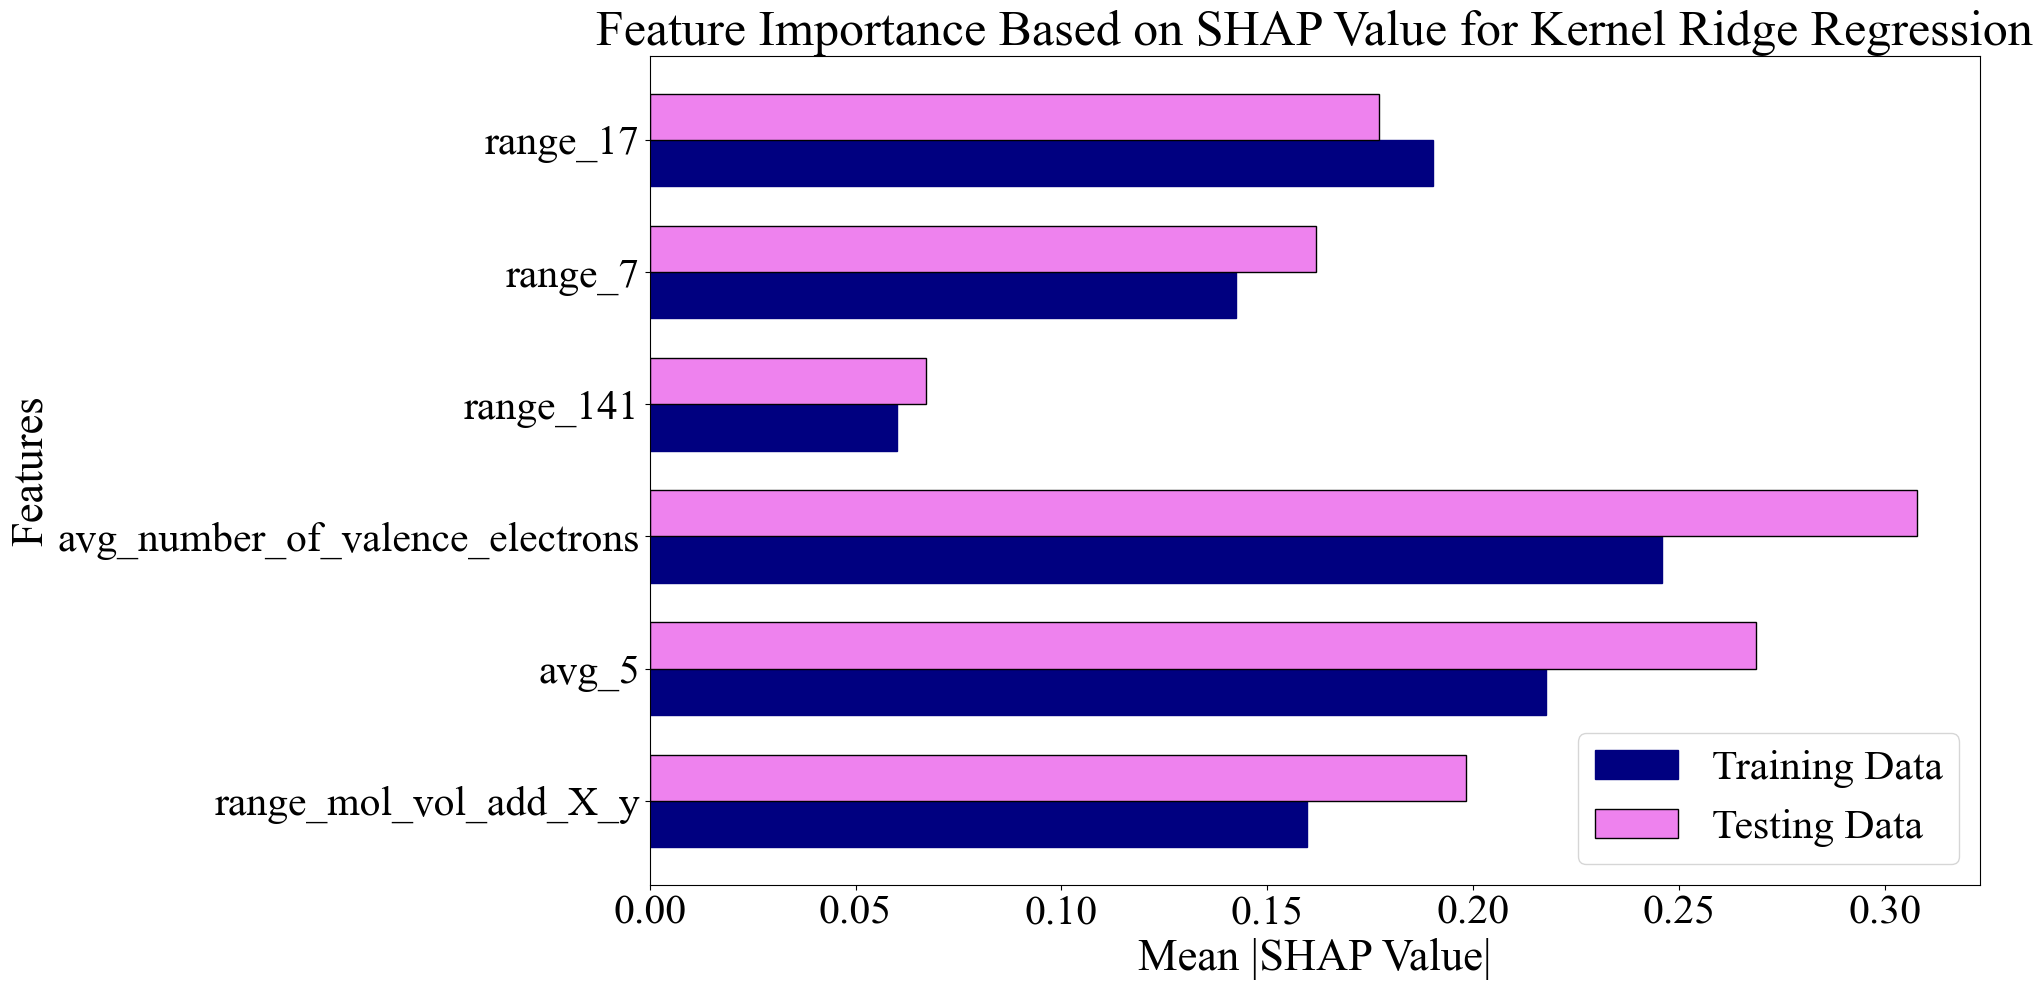

In [36]:
# =====================================
# 1. Prepare Data for SHAP Analysis
# =====================================

# Convert standardized training and testing sets to DataFrames for easier interpretation
X_train_Standard = pd.DataFrame(X_train['StandardScaler'], columns=X_train['Unprocessed'].columns)
X_test_Standard = pd.DataFrame(X_test['StandardScaler'], columns=X_test['Unprocessed'].columns)

# Define subset sizes to reduce computational load when running SHAP analysis
subset_size_train = 145  # Number of samples to use from training set
subset_size_test = 37  # Number of samples to use from testing set

# Randomly select a subset of training and testing data for SHAP analysis
X_train_subset = X_train_Standard.sample(n=subset_size_train, random_state=42)
X_test_subset = X_test_Standard.sample(n=subset_size_test, random_state=42)

# =====================================
# 2. Compute SHAP Values for Kernel Ridge Regression Model
# =====================================

# Retrieve the best KRR model from Grid Search results
best_estimator = grid_searches_KRR['grid_searches_StandardScaler_10'].best_estimator_

# Initialize SHAP KernelExplainer with the best model and a subset of the training data
explainer = shap.KernelExplainer(best_estimator.predict, X_train_subset)

# Compute SHAP values for the training and testing data subsets
shap_values_train = explainer.shap_values(X_train_subset)
shap_values_test = explainer.shap_values(X_test_subset)

# Calculate the mean absolute SHAP values for each feature across training and testing sets
mean_shap_train = np.abs(shap_values_train).mean(axis=0)
mean_shap_test = np.abs(shap_values_test).mean(axis=0)

# Ensure the SHAP values are one-dimensional arrays
mean_shap_train = mean_shap_train.mean(axis=0)
mean_shap_test = mean_shap_test.mean(axis=0)

# Retrieve feature names from training subset
feature_names = X_train_subset.columns

# Ensure the SHAP values array length matches the number of features
assert len(mean_shap_train) == len(feature_names), "Mismatch in SHAP train values and feature names"
assert len(mean_shap_test) == len(feature_names), "Mismatch in SHAP test values and feature names"

# =====================================
# 3. Visualize Feature Importance Based on SHAP Values
# =====================================

# Set bar height for double bar chart
bar_height = 0.35

# Define y-axis positions for training and testing SHAP values
r1 = np.arange(len(feature_names))  # Positions for training bars
r2 = [x + bar_height for x in r1]  # Shift testing bars slightly

# Create bar plot to compare feature importance in training vs. testing sets
plt.figure(figsize=(20, 10))

# Plot SHAP values for training data in navy color
plt.barh(r1, mean_shap_train, color='navy', height=bar_height, edgecolor='navy', label='Training Data')

# Plot SHAP values for testing data in violet color
plt.barh(r2, mean_shap_test, color='violet', height=bar_height, edgecolor='black', label='Testing Data')

# Customize labels and formatting
plt.xticks(fontsize=30)
plt.yticks([r + bar_height / 2 for r in range(len(feature_names))], feature_names, fontsize=30)
plt.xlabel('Mean |SHAP Value|', fontsize=32)
plt.ylabel('Features', fontsize=32)

# Set plot title
plt.title('Feature Importance Based on SHAP Value for Kernel Ridge Regression', fontsize=36)

# Add legend to distinguish between training and testing data
plt.legend(fontsize=30, loc='lower right')

# Save the feature importance visualization as an image file
plt.savefig(os.path.join(directory_path, "Feature_Importance_SHAP_KRR.png"), dpi=100, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()


Using 145 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/145 [00:00<?, ?it/s]

1
<class 'numpy.ndarray'>
(145, 6)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


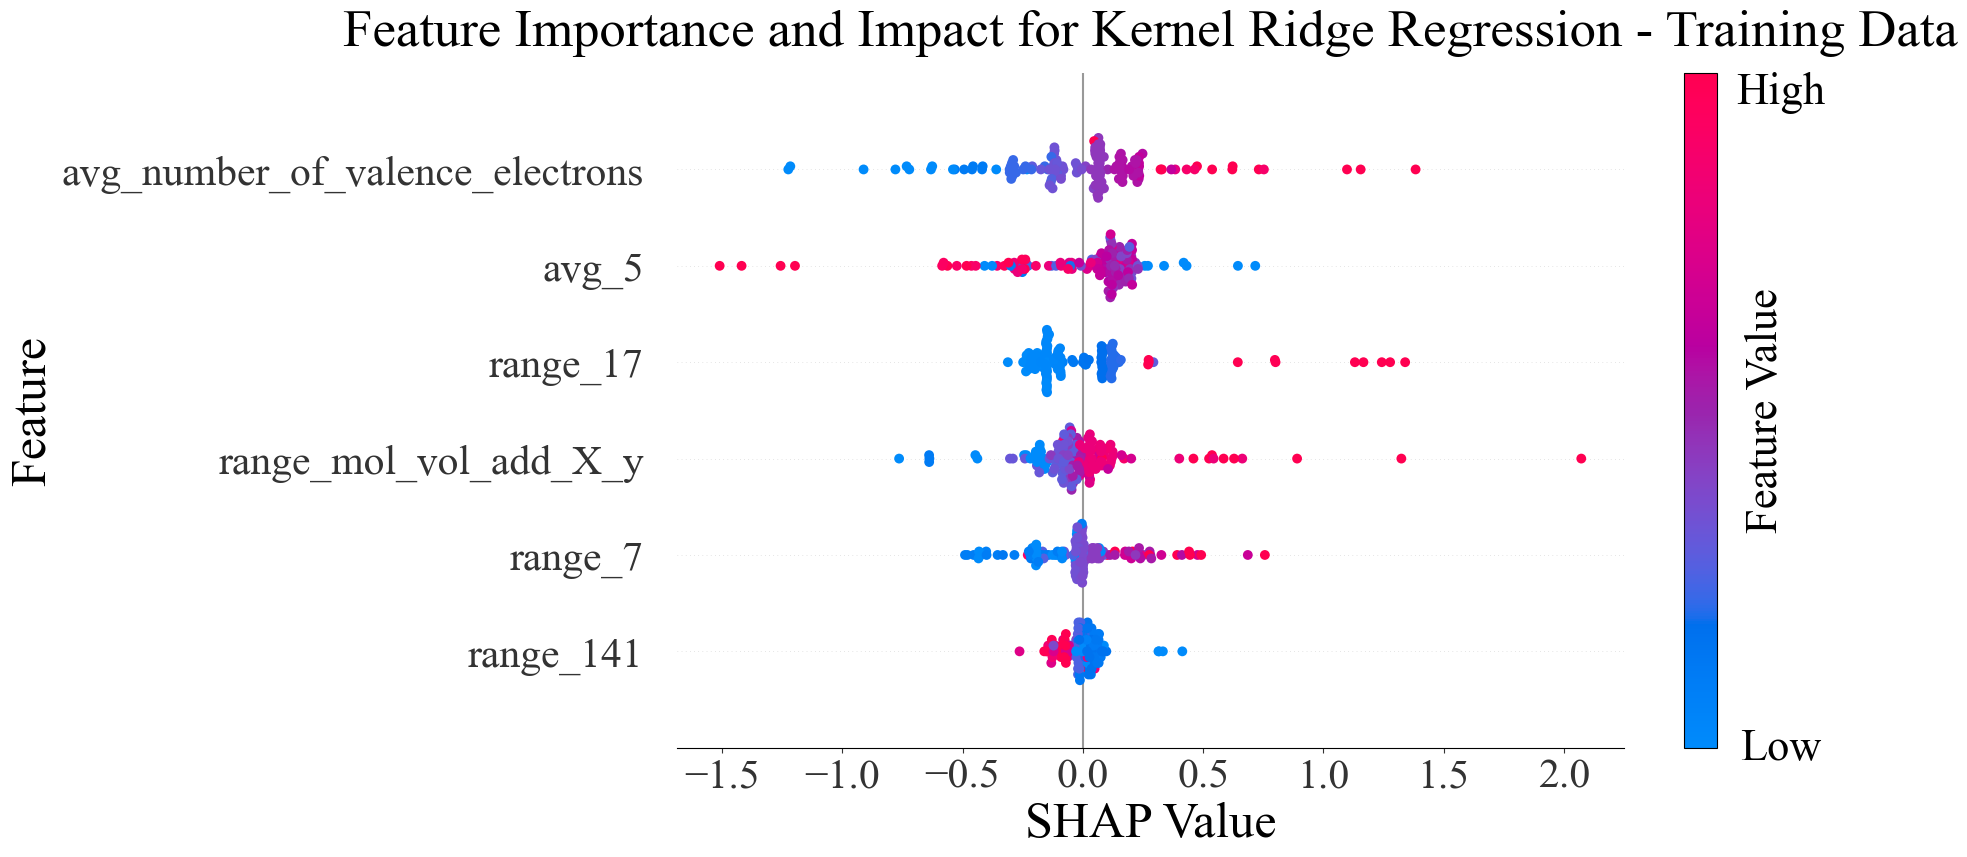

In [37]:
# =====================================
# 1. Prepare Data for SHAP Analysis
# =====================================

# Convert standardized training and testing sets to DataFrames for easier interpretation
X_train_Standard = pd.DataFrame(X_train['StandardScaler'], columns=X_train['Unprocessed'].columns)
X_test_Standard = pd.DataFrame(X_test['StandardScaler'], columns=X_test['Unprocessed'].columns)

# Define subset sizes to reduce computational load when running SHAP analysis
subset_size_train = 145  # Number of samples to use from training set
subset_size_test = 37  # Number of samples to use from testing set

# Randomly select a subset of training and testing data for SHAP analysis
X_train_subset = X_train_Standard.sample(n=subset_size_train, random_state=42)
X_test_subset = X_test_Standard.sample(n=subset_size_test, random_state=42)

# =====================================
# 2. Compute SHAP Values for Kernel Ridge Regression Model
# =====================================

# Initialize SHAP KernelExplainer with the best model and a subset of the training data
explainer = shap.KernelExplainer(best_estimator.predict, X_train_subset)

# Compute SHAP values for the training subset
shap_values_train = explainer.shap_values(X_train_subset)  # Returns SHAP values (n_samples, n_features)

# Debugging: Check SHAP values structure
print(len(shap_values_train))  # Number of model outputs (should be 1 for regression)
print(type(shap_values_train[0]))  # Data type of SHAP values
print(np.array(shap_values_train[0]).shape)  # Check shape (should match number of features)

# Extract SHAP values for a single output (useful in case of multi-output models)
shap_values_single_output = shap_values_train[0]

# =====================================
# 3. Visualize Feature Importance with SHAP
# =====================================

# Create figure for SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot using dot plot format
cax = shap.summary_plot(
    shap_values_single_output,  # SHAP values for the selected model output
    X_train_subset,  # Corresponding feature values
    show=False,  # Prevent immediate display
    plot_size=[15, 7.5],  # Adjust plot size for better readability
    color_bar=False,  # Hide color bar initially
    plot_type="dot"  # Use dot plot for feature impact visualization
)

# Access the matplotlib figure and increase marker size for better visibility
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):  # Ensure it's the scatter plot
            collection.set_sizes([50])  # Increase marker size for better visibility

# =====================================
# 4. Customize and Annotate the Plot
# =====================================

# Add color bar without ticks
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=32, labelpad=20)  # Set color bar title with appropriate font size
cbar.ax.yaxis.set_label_position('right')  # Move the label to the right side

# Set title and axis labels with increased font size for better readability
plt.title('Feature Importance and Impact for Kernel Ridge Regression - Training Data', fontsize=38, pad=20)
plt.xlabel('SHAP Value', fontsize=36)
plt.ylabel('Feature', fontsize=36)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

# Add annotation for "Low" feature impact
plt.text(2.9, -1.0, 'Low', fontsize=32, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))

# Add annotation for "High" feature impact
plt.text(2.9, 5.8, 'High', fontsize=32, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))

# =====================================
# 5. Save and Display the Plot
# =====================================

# Save the SHAP visualization as an image file for documentation
f.savefig(directory_path + "Feature_ImpactSHAP_KRR_training.png", dpi=100, bbox_inches='tight')

# Show the finalized plot
plt.show()


1
<class 'numpy.ndarray'>
(37, 6)


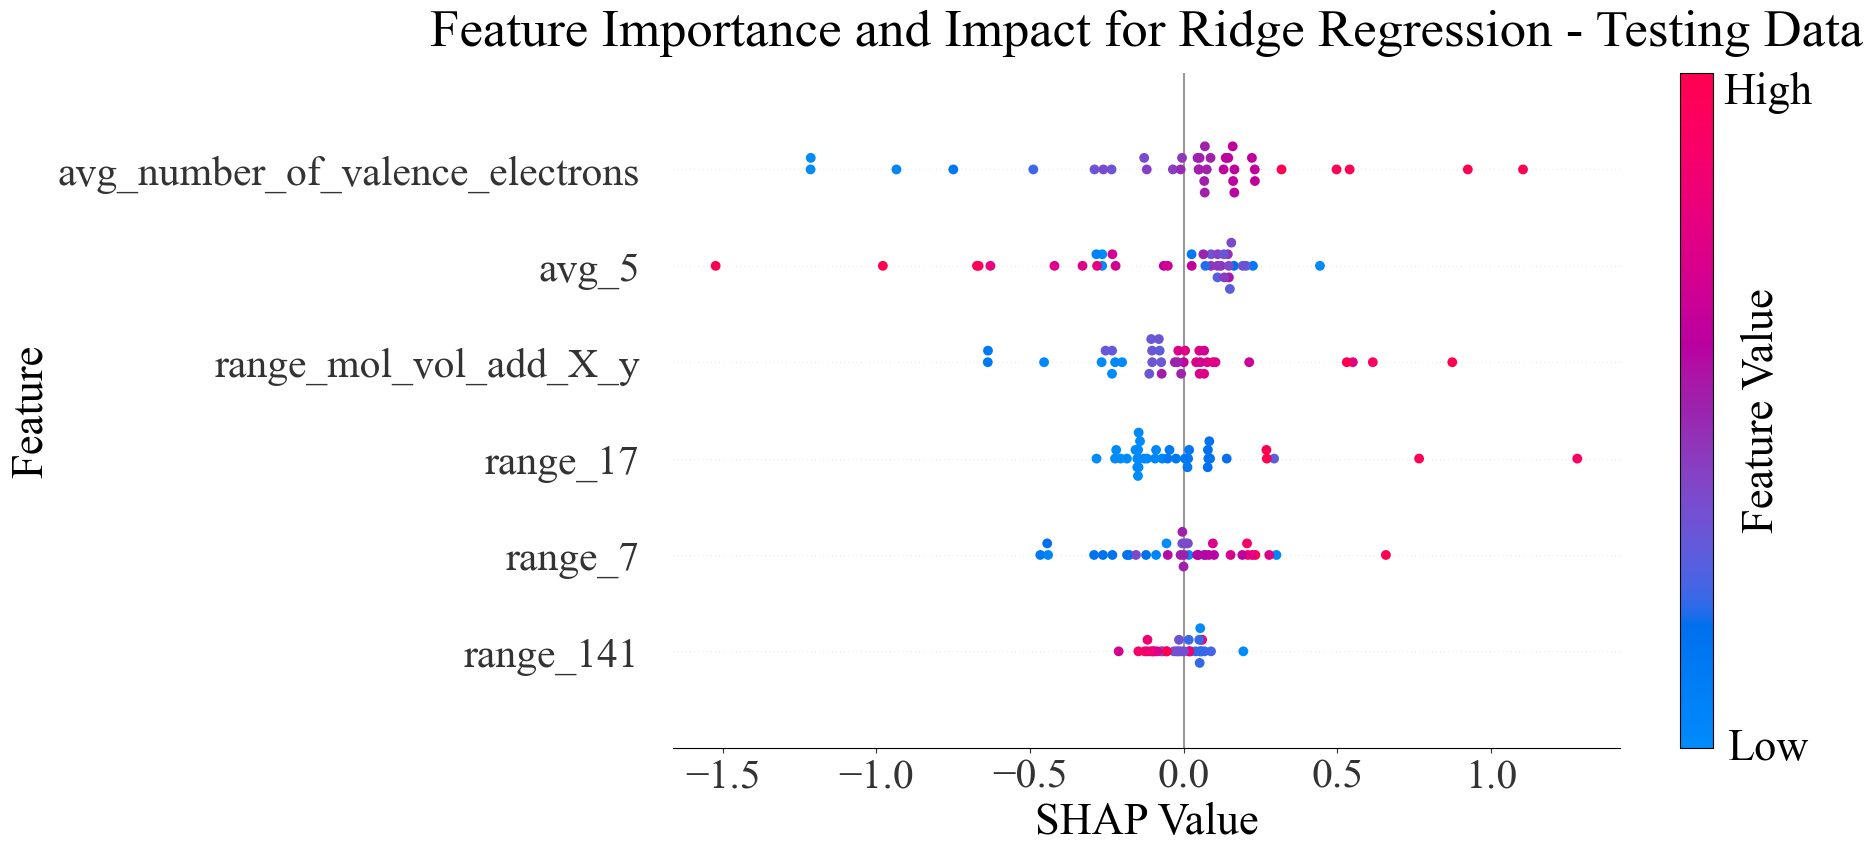

In [38]:
# =====================================
# 1. Debugging and Verifying SHAP Values Structure
# =====================================

# Print the number of SHAP value outputs (should be 1 for regression models)
print(len(shap_values_test))  

# Print the data type of the SHAP values
print(type(shap_values_test[0]))  

# Print the shape of SHAP values for the first output (should match number of test samples and features)
print(np.array(shap_values_test[0]).shape)  

# Extract SHAP values for a single output (in case of multi-output models, select the first)
shap_values_single_output = shap_values_test[0]

# =====================================
# 2. Visualizing Feature Importance for Kernel Ridge Regression - Testing Data
# =====================================

# Create a new figure for SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot using a dot plot format
cax = shap.summary_plot(
    shap_values_single_output,  # SHAP values for the selected model output
    X_test_subset,  # Corresponding feature values from the test subset
    show=False,  # Prevent immediate display
    plot_size=[15, 7.5],  # Adjust plot size for better readability
    color_bar=False,  # Hide color bar initially
    plot_type="dot"  # Use dot plot to visualize feature impact
)

# Access the matplotlib figure and increase marker size for better visualization
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):  # Ensure it's the scatter plot
            collection.set_sizes([50])  # Increase marker size for better visibility

# =====================================
# 3. Customize and Annotate the Plot
# =====================================

# Add color bar without ticks
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=32, labelpad=20)  # Set color bar title with appropriate font size
cbar.ax.yaxis.set_label_position('right')  # Move the label to the right side

# Set title and axis labels with increased font size for readability
plt.title('Feature Importance and Impact for Kernel Ridge Regression - Testing Data', fontsize=38, pad=20)
plt.xlabel('SHAP Value', fontsize=32)
plt.ylabel('Feature', fontsize=32)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

# Add annotation for "Low" feature impact
plt.text(1.9, -1.0, 'Low', fontsize=32, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))

# Add annotation for "High" feature impact
plt.text(1.9, 5.8, 'High', fontsize=32, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))

# =====================================
# 4. Save and Display the Plot
# =====================================

# Save the SHAP visualization as an image file for documentation
f.savefig(directory_path + "Feature_ImpactSHAP_KRR_testing.png", dpi=100, bbox_inches='tight')

# Show the finalized plot
plt.show()

# 📌 **Implementation of Polynomial Regression for Hardness Prediction**

## 🔹 **What is Polynomial Regression?**
**Polynomial Regression** extends **Linear Regression** by introducing **higher-degree polynomial terms** to capture non-linear relationships. It models the relationship between input variables and the target variable using an **nth-degree polynomial function**.

---

## 🔹 **Why Use Polynomial Regression?**
✅ **Captures non-linear dependencies** between features and the target variable.  
✅ **More flexible than Linear Regression** by adjusting polynomial degree.  
✅ **Helps identify complex patterns** that standard regression models might miss.  

---

## 🔹 **Key Hyperparameters in Polynomial Regression**
| Hyperparameter | Description |
|---------------|-------------|
| **poly__degree** | Defines the degree of the polynomial (higher degree → more complexity). |
| **k_values** | Number of cross-validation folds (e.g., `k=5`, `k=10`). |
| **Feature Scaling** | Applies different preprocessing techniques: `StandardScaler`, `MinMaxScaler`, `Normalizer`. |

---

## 🔹 **What This Code Does**
🔹 **Initializes a Polynomial Regression pipeline** combining polynomial feature transformation and linear regression.  
🔹 **Defines a hyperparameter grid** for tuning polynomial degree.  
🔹 **Applies different data preprocessing techniques**, including:
   - `Unprocessed` (raw data)
   - `StandardScaler` (zero mean, unit variance)
   - `MinMaxScaler` (scales between 0 and 1)  
🔹 **Performs hyperparameter tuning** using **GridSearchCV** with **cross-validation (`k=5`, `k=10`)**.  
🔹 **Finds the best polynomial degree** based on **Mean Absolute Error (MAE)**.  
🔹 **Rescales predictions** (if necessary) back to the original scale.  
🔹 **Compiles and stores model results**, including:
   - Best hyperparameters  
   - Model evaluation metrics (MAE, MSE, RMSE, R²)  
   - Predicted vs. actual values  
🔹 **Visualizes results** through:
   - **Scatter plots** comparing actual vs. predicted values.  
   - **Summary tables** highlighting model performance.  

---

## 🚀 **Steps in Implementing Polynomial Regression**
### 🔹 **1. Define the Polynomial Regression Pipeline**
- Creates a pipeline with:
  - **PolynomialFeatures** to transform input data.
  - **LinearRegression** to fit the transformed data.

### 🔹 **2. Set Up Hyperparameter Tuning**
- Defines **hyperparameter grid** (`poly__degree`) to determine the best polynomial degree.

### 🔹 **3. Apply Different Data Preprocessing Techniques**
- Preprocesses data using `StandardScaler`, `MinMaxScaler`, `Normalizer`, and `Unprocessed`.

### 🔹 **4. Perform Hyperparameter Tuning**
- Uses **GridSearchCV** with **cross-validation (`k=5`, `k=10`)**.
- Finds the **best polynomial degree** for each preprocessing method.

### 🔹 **5. Evaluate and Rescale Predictions**
- Applies the best models to test data.
- **Inverse transforms predictions** (if necessary) to match the original scale.

### 🔹 **6. Store and Analyze Results**
- Identifies the **best-performing model** based on **lowest Mean Absolute Error (MAE)**.
- Saves evaluation metrics and hyperparameter settings.

### 🔹 **7. Visualize Model Performance**
- Generates **scatter plots** comparing actual vs. predicted values.
- Displays a **summary table** of performance metrics.

---

📌 **Next, we implement Polynomial Regression with hyperparameter tuning to optimize its performance. 🚀**


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best MAE score: -30.984826976267176
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best MSE score: -1735.4097629638734
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best RMSE score: -41.34036895594986
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best R2 score: 0.261818958631536
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best MAE score: -0.573816115587043
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best MSE score: -0.5951814239737494
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best RMSE score: -0.765593106245454
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best R2 score: 0.2618189586315376
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best MAE score: -0.0711068892169068
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

Best MSE score: -0.009139601174115993
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best RMSE score: -0.09487175893505409
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best R2 score: 0.2618189586315376
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best MAE score: 0.0
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best MSE score: 0.0
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best RMSE score: 0.0
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best R2 score: 1.0
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best MAE score: -31.236222230646053
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best MSE score: -1746.1761354172013
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

Best RMSE score: -40.94815637663349
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best R2 score: 0.026746421805459976
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best MAE score: -0.578471770061254
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best MSE score: -0.5988738918995151
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best RMSE score: -0.7583296188966283
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best R2 score: 0.026746421805460118
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remainin

Best MAE score: -0.07168381464290544
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best MSE score: -0.009196302681976227
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best RMSE score: -0.0939716726945117
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best R2 score: 0.026746421805460153
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best MAE score: 0.0
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best MSE score: 0.0
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best RMSE score: 0.0
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
The figure layout has changed to tight


Best R2 score: 1.0
Row with lowest testing error (MAE):
error_metric                   MAE
validation_error          0.573816
testing_error            31.883053
k_value                          5
data_type           StandardScaler
poly__degree                     1
Name: 6, dtype: object


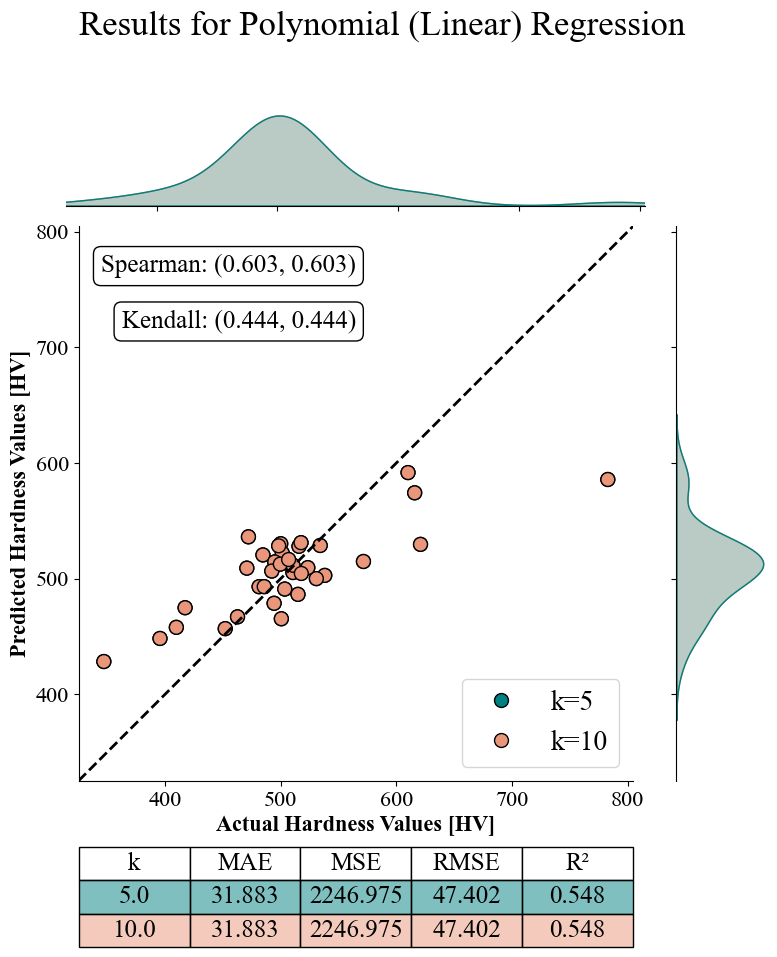

(    k     MAE       MSE    RMSE     R²
 0   5  31.883  2246.975  47.402  0.548
 1  10  31.883  2246.975  47.402  0.548,
         Actual  Predictions     k
 0   395.540000   448.197971   k=5
 1   347.000000   428.241881   k=5
 2   494.198889   478.605782   k=5
 3   538.010000   502.713543   k=5
 4   615.750000   574.135012   k=5
 ..         ...          ...   ...
 69  515.730000   527.896323  k=10
 70  517.495000   531.000766  k=10
 71  610.000000   591.613325  k=10
 72  485.640000   492.998770  k=10
 73  517.750000   504.407554  k=10
 
 [74 rows x 3 columns])

In [39]:
# =====================================
# 1. Define Polynomial Regression Pipeline
# =====================================

# Create a pipeline with two steps:
# - 'poly': Applies polynomial transformation (without adding a bias column)
# - 'model': Applies Linear Regression
pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),  
    ('model', LinearRegression())  
])

# Define the hyperparameter grid for tuning the polynomial degree
param_grid = {'poly__degree': np.arange(1, 2, 5)}  # Testing polynomial degrees between 1 and 2

# Number of folds for cross-validation
k_values = [5, 10]

# Retrieve different scalers for preprocessing
standard_scale_y = scaler_objects_y['StandardScaler']
minmax_scale_y = scaler_objects_y['MinMaxScaler']
norm_scale_y = scaler_objects_y['Normalizer']

# Define the types of data preprocessing to apply
data_types = ['Unprocessed', 'StandardScaler', 'MinMaxScaler', 'Normalizer']

# =====================================
# 2. Initialize Storage Dictionaries
# =====================================

# Store results from different stages of model evaluation
grid_searches_poly = {}
evaluate_dfs_poly = {}
best_params_poly = {}
y_pred_tests_poly = {}
new_evaluation_dfs_poly = {}
y_unscaled_preds_poly = {}

# =====================================
# 3. Loop Through Cross-Validation (k=5, k=10) and Data Preprocessing
# =====================================

for k in k_values:
    for data in data_types:
        # Dynamically create variable names for tracking model performance
        grid_search_name = f"grid_searches_{data}_{k}"
        evaluate_df_name = f"evaluate_df_{data}_{k}"
        best_params_name = f"best_params_{data}_{k}"
        y_pred_test_name = f"y_pred_test_{data}_{k}"

        # Perform hyperparameter tuning using GridSearchCV within the pipeline
        (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
            pipeline_poly, param_grid, k, X_train[data], y_train[data],
            X_test[data], y_test[data]
        )

        # Store the GridSearch results for further analysis
        grid_searches_poly[grid_search_name] = grid_search_var
        evaluate_dfs_poly[evaluate_df_name] = evaluate_df_var
        best_params_poly[best_params_name] = best_params_var
        y_pred_tests_poly[y_pred_test_name] = y_pred_test_var

        # Reshape predictions for compatibility with inverse transformations
        y_pred_test_var_reshaped = y_pred_test_var.reshape(-1, 1)

        # Dynamically name rescaled evaluation results and unscaled predictions
        new_evaluation_df_name = f"new_evaluation_df_{data}_{k}"
        y_unscaled_pred_name = f"y_unscaled_pred_{data}_{k}"

        # Select the appropriate scaler for y-values
        if data == 'StandardScaler':
            scale_y = standard_scale_y
        elif data == 'MinMaxScaler':
            scale_y = minmax_scale_y
        elif data == 'Normalizer':
            scale_y = norm_scale_y

        # Rescale predictions back to the original scale and evaluate
        new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
            y_pred_test_var_reshaped, y_test['Unprocessed'],
            evaluate_df_var, scale_y
        )

        # Store results after rescaling
        new_evaluation_dfs_poly[new_evaluation_df_name] = new_evaluation_dfs_var
        y_unscaled_preds_poly[y_unscaled_pred_name] = y_unscaled_preds_var

# =====================================
# 4. Compile Results Into a DataFrame
# =====================================

# Initialize an empty list to store DataFrames for each combination of data type and k
dfs_list = []

# Iterate through all evaluation results to compile them into a single DataFrame
for key, value in new_evaluation_dfs_poly.items():
    parts = key.split('_')  # Extract key components

    # Ensure key format matches expected structure
    if len(parts) == 5 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[3] in data_types and parts[4].isdigit():
        data_type = parts[3]  # Extract data type (e.g., StandardScaler)
        k = int(parts[4])  # Extract k value (cross-validation folds)

        # Retrieve best parameters for the corresponding setup
        best_params_key = f"best_params_{data_type}_{k}"
        best_param_values = best_params_poly.get(best_params_key, None)

        # Create a DataFrame containing model evaluation details
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['data_type'] = data_type

        # Append best parameters if available
        if best_param_values:
            for param, val in best_param_values.items():
                df_with_info[param] = val

        # Add the DataFrame to the list
        dfs_list.append(df_with_info)

# Concatenate all results into a single DataFrame if valid entries exist
if len(dfs_list) > 0:
    final_df = pd.concat(dfs_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

# =====================================
# 5. Identify the Best Model Configuration
# =====================================

# Filter rows where the error metric is Mean Absolute Error (MAE)
mae_rows = final_df[final_df['error_metric'] == 'MAE']

# Identify the row corresponding to the lowest MAE (best performing model)
lowest_mae_row = mae_rows.loc[mae_rows['testing_error'].idxmin()]

# Display the best model configuration based on lowest testing MAE
print("Row with lowest testing error (MAE):")
print(lowest_mae_row)

# =====================================
# 6. Visualize Model Performance for the Best Configuration
# =====================================

visualize_results(
    new_evaluation_dfs_poly['new_evaluation_df_StandardScaler_5'],  
    new_evaluation_dfs_poly['new_evaluation_df_StandardScaler_10'],  
    y_test['Unprocessed'], 
    y_unscaled_preds_poly['y_unscaled_pred_StandardScaler_5'].flatten().reshape(-1), 
    y_unscaled_preds_poly['y_unscaled_pred_StandardScaler_10'].flatten().reshape(-1), 
    'Results for Polynomial (Linear) Regression'
)


# 📌 SHAP Analysis for Polynomial Regression

## 🔹 Understanding Feature Importance in Polynomial Regression
In this section, we analyze feature importance in **Polynomial Regression** using **SHAP (SHapley Additive exPlanations)**. Unlike linear regression, polynomial regression introduces **interaction terms** and higher-order features, making it crucial to understand **which transformed features contribute the most** to predictions.

### ✅ **1. Why Use SHAP?**
- Explains how **individual transformed features influence predictions**.
- Helps **interpret the polynomial model**, which is less intuitive than linear regression.
- Provides **global feature importance** (mean absolute SHAP values).

### ✅ **2. Process Overview**
1. **Retrieve the best polynomial model** from `GridSearchCV`.
2. **Extract polynomial transformation steps** from the pipeline.
3. **Transform input data into polynomial feature space**.
4. **Use SHAP to compute feature importance** on the transformed dataset.
5. **Visualize the contribution of polynomial features**.

### ✅ **3. Unique Aspects of This SHAP Analysis**
- **SHAP values are computed on polynomial-transformed data**, not the original features.
- **Polynomial features (e.g., x1², x1*x2) are analyzed independently**.
- **Both training and testing data are evaluated separately**.

📌 **This ensures a deep understanding of how complex feature interactions drive predictions in Polynomial Regression. 🚀**


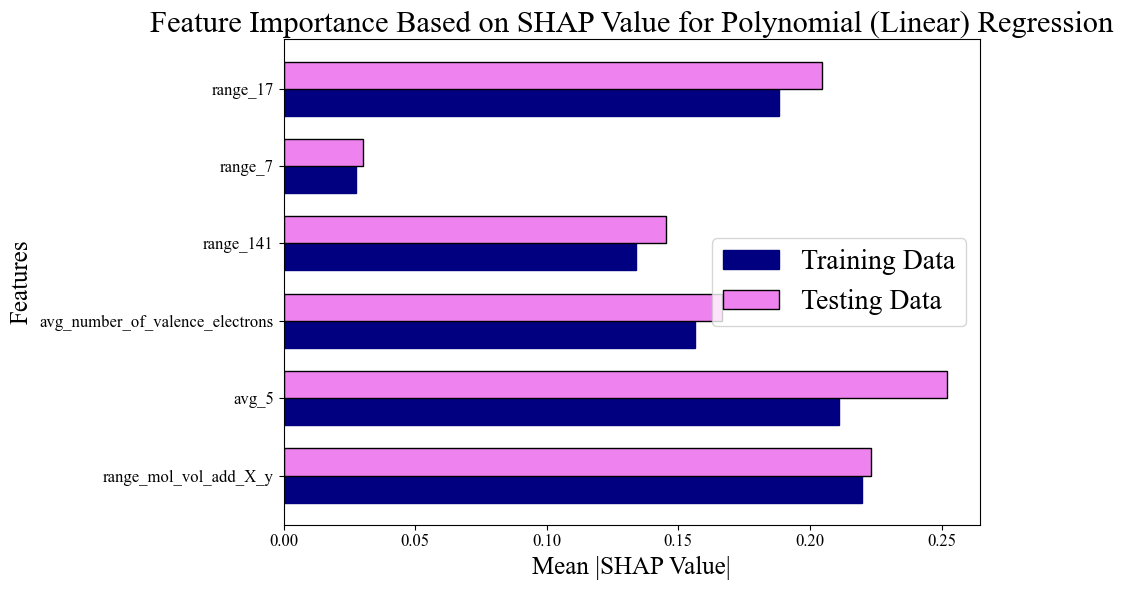

In [41]:
# ============================================
# 1. Standardize Data Using MinMaxScaler
# ============================================

_scale_ = StandardScaler()  # Define a standard scaler for normalization
y_combined_reshaped = y.values.reshape(-1, 1)  # Reshape target variable to a 2D array

# Fit and transform input features and target variable
_scale_.fit(X_)  
_scale_.fit(y_combined_reshaped)

X_combined_scaled = _scale_.fit_transform(X_)  # Transform feature set
X_combined_scaled = pd.DataFrame(X_combined_scaled, columns=X_.columns)  # Convert to DataFrame
y_combined_scaled = _scale_.fit_transform(y_combined_reshaped)  # Transform target variable

# ============================================
# 2. Convert NumPy Arrays to DataFrames
# ============================================

# Retrieve training and testing datasets after standardization
X_train_scaled = pd.DataFrame(X_train['StandardScaler'], columns=X_train['Unprocessed'].columns)
X_test_scaled = pd.DataFrame(X_test['StandardScaler'], columns=X_test['Unprocessed'].columns)

# ============================================
# 3. Retrieve Best Polynomial Regression Model
# ============================================

# Fetch the best-performing polynomial regression model from GridSearchCV results
best_estimator = grid_searches_poly['grid_searches_StandardScaler_5'].best_estimator_

# Extract the final trained linear regression model from the pipeline
final_model = best_estimator.named_steps['model']

# Extract the polynomial feature transformer from the pipeline
poly_transformer = best_estimator.named_steps['poly']

# ============================================
# 4. Transform Data Using Polynomial Features
# ============================================

# Apply polynomial transformation to the training and testing datasets
X_train_poly = poly_transformer.transform(X_train_scaled)
X_test_poly = poly_transformer.transform(X_test_scaled)

# Retrieve transformed feature names for better interpretability
poly_feature_names = poly_transformer.get_feature_names(input_features=X_train_scaled.columns)

# Convert transformed feature matrices into DataFrames with proper column names
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names)

# ============================================
# 5. Compute SHAP Values for Polynomial Features
# ============================================

# Create a SHAP explainer based on the trained linear regression model
explainer = shap.LinearExplainer(final_model, masker=shap.maskers.Independent(X_train_poly_df))

# Compute SHAP values for training and testing datasets
shap_values_train = explainer.shap_values(X_train_poly_df)
shap_values_test = explainer.shap_values(X_test_poly_df)

# ============================================
# 6. Aggregate SHAP Values for Feature Importance
# ============================================

# Calculate the mean absolute SHAP values to measure overall feature impact
mean_shap_train = np.abs(shap_values_train).mean(axis=0)
mean_shap_test = np.abs(shap_values_test).mean(axis=0)

# Retrieve feature names for visualization
feature_names = X_train_poly_df.columns

# ============================================
# 7. Create SHAP Feature Importance Bar Chart
# ============================================

# Define the height of bars in the plot
bar_height = 0.35

# Set the y-axis positions for bars
r1 = np.arange(len(feature_names))  # Position for training data
r2 = [x + bar_height for x in r1]  # Position for testing data

# Initialize the figure for the bar plot
plt.figure(figsize=(10, 6))

# Plot SHAP values for training data
plt.barh(r1, mean_shap_train, color='navy', height=bar_height, edgecolor='navy', label='Training Data')

# Plot SHAP values for testing data
plt.barh(r2, mean_shap_test, color='violet', height=bar_height, edgecolor='black', label='Testing Data')

# Configure tick labels and font sizes
plt.xticks(fontsize=12)
plt.yticks([r + bar_height / 2 for r in range(len(feature_names))], feature_names, fontsize=12)

# Set axis labels
plt.xlabel('Mean |SHAP Value|', fontsize=18)
plt.ylabel('Features', fontsize=18)

# Set the plot title
plt.title('Feature Importance Based on SHAP Value for Polynomial (Linear) Regression', fontsize=22)

# Add a legend
plt.legend(fontsize=20, loc='best')

# ============================================
# 8. Save and Display SHAP Plot
# ============================================

# Save the plot to a specified directory (ensure the directory exists)
plt.savefig(os.path.join(directory_path, "Feature_Importance_SHAP_LR.png"), dpi=100, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


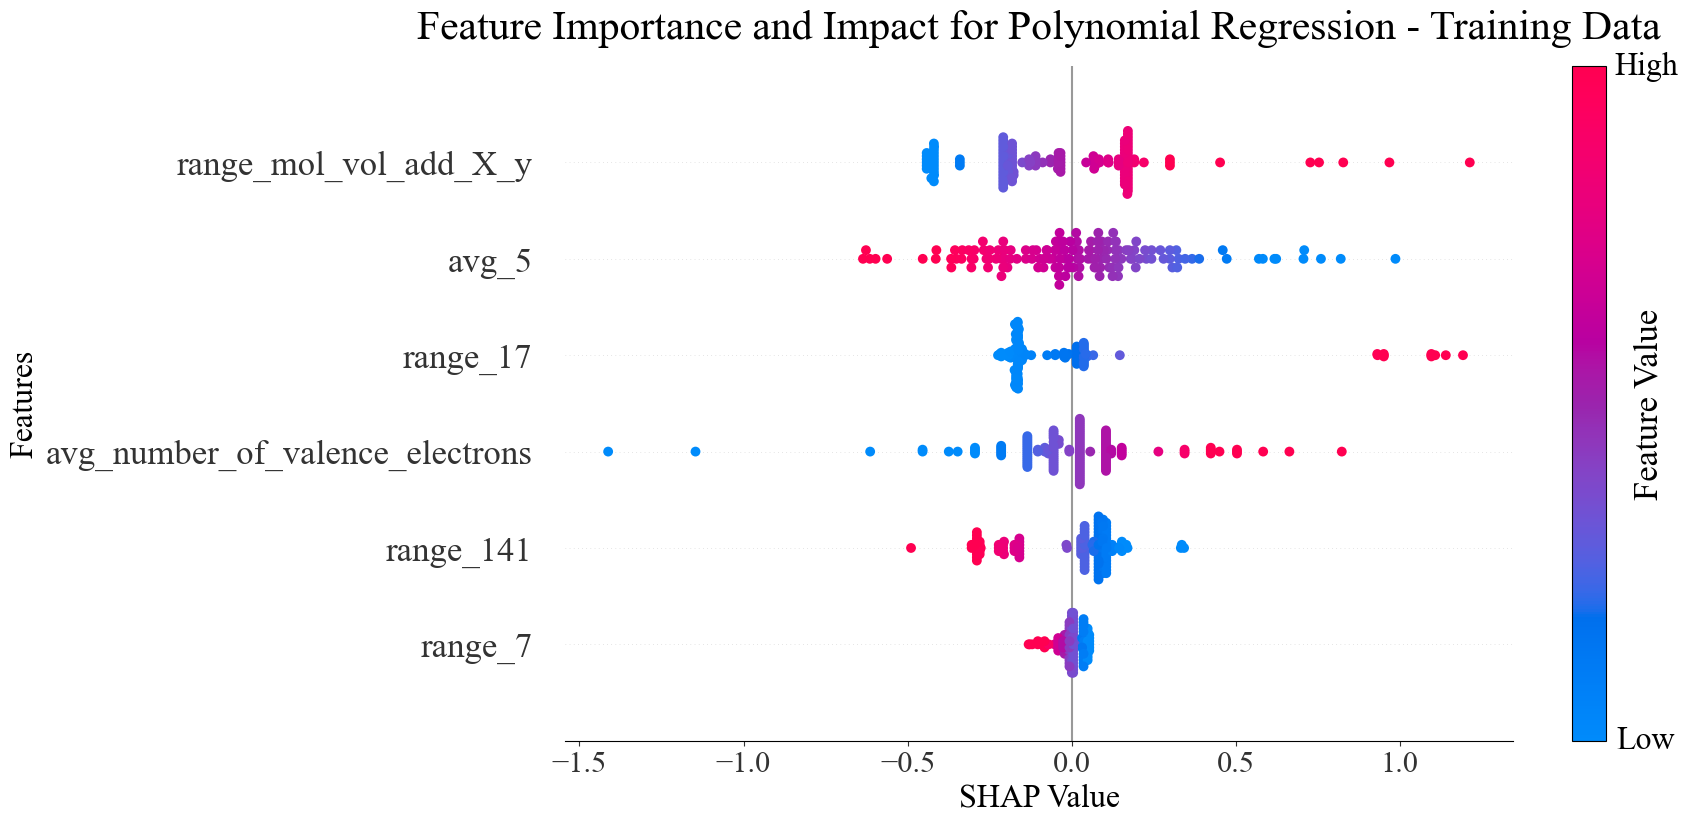

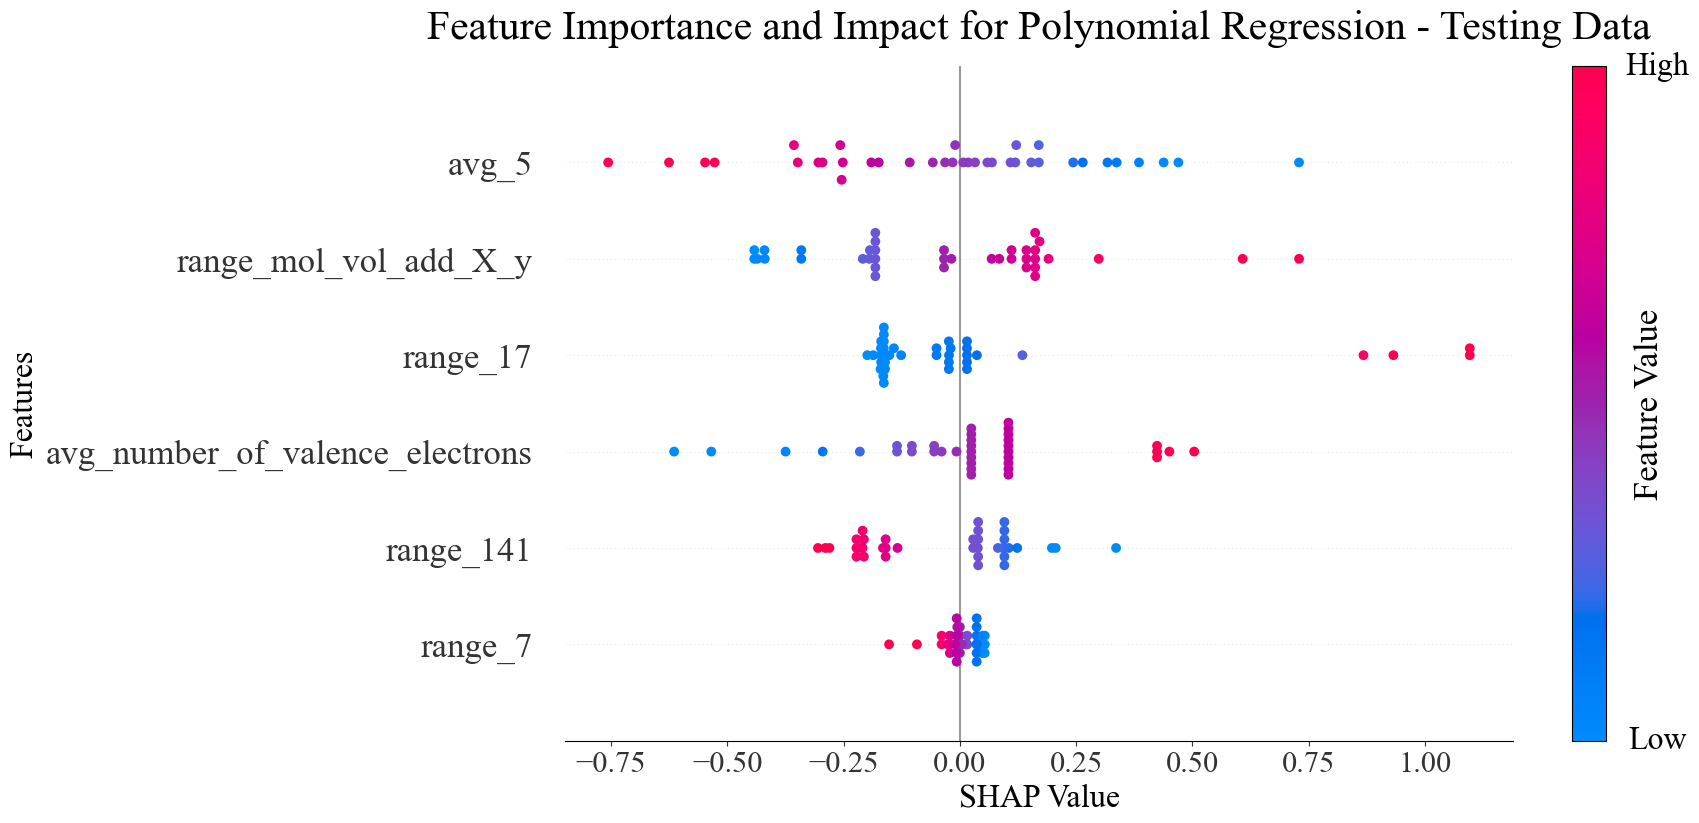

In [42]:
# ======================================================
# 1. Plot SHAP Summary for Training Data (Polynomial Regression)
# ======================================================

# Create a new figure for the SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot for training data (dot plot visualization)
shap.summary_plot(shap_values_train, X_train_poly_df, show=False, plot_size=[15, 7.5], color_bar=False)

# Access the Matplotlib figure and increase marker size for better visibility
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):  # Ensure the target is the scatter plot
            collection.set_sizes([50])  # Increase marker size to enhance readability

# Customize tick labels and font sizes
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Set the title and axis labels
plt.title('Feature Importance and Impact for Polynomial Regression - Training Data', fontsize=30, pad=20)
plt.xlabel('SHAP Value', fontsize=23)
plt.ylabel("Features", fontsize=23)

# ======================================================
# 2. Add Color Bar to Indicate Feature Values
# ======================================================

# Add a color bar (legend for feature values) but without numerical ticks
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)  # Set the label for the color bar
cbar.ax.yaxis.set_label_position('right')  # Position the label to the right of the color bar

# ======================================================
# 3. Add Custom Text Annotations for Feature Impact
# ======================================================

# Add text annotation indicating "Low" feature values at the bottom of the plot
plt.text(1.75, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Add text annotation indicating "High" feature values at the top of the plot
plt.text(1.75, 6, 'High', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Save the SHAP summary plot for training data
plt.savefig(os.path.join(directory_path, "Feature_Impact_SHAP_Poly_training.png"), dpi=100, bbox_inches='tight')

# Show the plot
plt.show()


# ======================================================
# 4. Plot SHAP Summary for Testing Data (Polynomial Regression)
# ======================================================

# Create a new figure for the SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot for testing data (dot plot visualization)
shap.summary_plot(shap_values_test, X_test_poly_df, show=False, plot_size=[15, 7.5], color_bar=False)

# Access the Matplotlib figure and increase marker size for better visibility
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):  # Ensure the target is the scatter plot
            collection.set_sizes([50])  # Increase marker size to enhance readability

# Customize tick labels and font sizes
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Set the title and axis labels
plt.title('Feature Importance and Impact for Polynomial Regression - Testing Data', fontsize=30, pad=20)
plt.xlabel('SHAP Value', fontsize=23)
plt.ylabel("Features", fontsize=23)

# ======================================================
# 5. Add Color Bar to Indicate Feature Values
# ======================================================

# Add a color bar (legend for feature values) but without numerical ticks
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)  # Set the label for the color bar
cbar.ax.yaxis.set_label_position('right')  # Position the label to the right of the color bar

# ======================================================
# 6. Add Custom Text Annotations for Feature Impact
# ======================================================

# Add text annotation indicating "Low" feature values at the bottom of the plot
plt.text(1.5, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Add text annotation indicating "High" feature values at the top of the plot
plt.text(1.5, 6, 'High', fontsize=23, color='black', ha='center', va='center',
         bbox=dict(facecolor='none', edgecolor='none'))

# Save the SHAP summary plot for testing data
plt.savefig(os.path.join(directory_path, "Feature_Impact_SHAP_Poly_testing.png"), dpi=100, bbox_inches='tight')

# Show the plot
plt.show()


# 🚀 **Implementation of CatBoost Regression Model for Hardness Prediction**

## 🔹 **What is CatBoost?**
**CatBoost (Categorical Boosting)** is a state-of-the-art gradient boosting algorithm that excels in handling both numerical and categorical data. It is built on **decision trees and gradient boosting**, iteratively minimizing the loss function to achieve an optimal predictive model.

---

## 🔹 **Why Use CatBoost?**
✅ **Handles both numerical and categorical features** without needing extensive preprocessing.  
✅ **Efficient and scalable**, making it ideal for large datasets.  
✅ **Prevents overfitting** using ordered boosting and regularization techniques.  
✅ **Highly interpretable**, allowing feature importance visualization.  

---

## 🔹 **Key Features of CatBoost**
| Feature | Description |
|---------------|-------------|
| **Oblivious Trees** | Ensures fast, balanced, and regularized learning by testing the same feature at each tree level. |
| **Gradient Boosting** | Combines multiple weak models to create a strong predictive model. |
| **Categorical Feature Handling** | Avoids the need for manual one-hot encoding. |
| **Overfitting Prevention** | Implements ordered boosting and other regularization techniques to improve generalization. |

---

## 🔹 **What This Code Does**
🔹 **Defines the CatBoost Model** using **Root Mean Squared Error (RMSE)** as the loss function.  
🔹 **Performs hyperparameter tuning** using **GridSearchCV** to optimize model performance.  
🔹 **Runs k-fold cross-validation (`k=5`, `k=10`)** for robust model evaluation.  
🔹 **Finds the best hyperparameters** and selects the most optimal model.  
🔹 **Stores evaluation metrics** including MAE, MSE, RMSE, R², and correlation scores.  
🔹 **Visualizes results** to compare predictions against actual values.  

---

## 🚀 **Steps in Implementing CatBoost Regression**
### 🔹 **1. Define the CatBoost Model**
- Initializes the model with **RMSE as the loss function**.
- Sets a **fixed random state** for reproducibility.

### 🔹 **2. Configure Hyperparameter Grid**
- Defines a **grid of hyperparameters** for tuning:
  - `iterations`: Number of boosting iterations.
  - `learning_rate`: Controls step size for weight updates.
  - `depth`: Tree depth, affecting model complexity.
  - `l2_leaf_reg`: L2 regularization parameter to prevent overfitting.

### 🔹 **3. Train and Tune Model Using Grid Search**
- Uses **GridSearchCV** to perform exhaustive hyperparameter search.
- Applies **5-fold and 10-fold cross-validation** for performance evaluation.

### 🔹 **4. Evaluate and Rescale Predictions**
- Uses the **best model** to make predictions on test data.
- **Rescales predictions** (if necessary) to match the original scale.

### 🔹 **5. Store and Analyze Results**
- Saves model configurations, evaluation metrics, and predictions.
- Identifies the **best-performing model** based on **lowest Mean Absolute Error (MAE)**.

### 🔹 **6. Visualize Model Performance**
- Generates **scatter plots** comparing actual vs. predicted values.
- Displays a **summary table** of performance metrics.

---

📌 **Now, let's implement CatBoost Regression with hyperparameter tuning for optimal performance. 🚀**


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   43.5s finished


0:	learn: 46.5557734	total: 144ms	remaining: 14.3s
1:	learn: 44.6202294	total: 145ms	remaining: 7.12s
2:	learn: 42.7653123	total: 146ms	remaining: 4.71s
3:	learn: 40.9071815	total: 146ms	remaining: 3.5s
4:	learn: 39.7851070	total: 146ms	remaining: 2.78s
5:	learn: 38.8929321	total: 147ms	remaining: 2.3s
6:	learn: 38.0160289	total: 147ms	remaining: 1.95s
7:	learn: 36.9608637	total: 147ms	remaining: 1.69s
8:	learn: 36.0912270	total: 147ms	remaining: 1.49s
9:	learn: 35.0920649	total: 148ms	remaining: 1.33s
10:	learn: 34.1517721	total: 148ms	remaining: 1.2s
11:	learn: 33.4338233	total: 148ms	remaining: 1.09s
12:	learn: 32.3184964	total: 149ms	remaining: 995ms
13:	learn: 31.8431828	total: 149ms	remaining: 915ms
14:	learn: 30.9531451	total: 149ms	remaining: 846ms
15:	learn: 30.2997788	total: 150ms	remaining: 786ms
16:	learn: 29.6556807	total: 150ms	remaining: 732ms
17:	learn: 29.3043348	total: 150ms	remaining: 684ms
18:	learn: 28.8800684	total: 150ms	remaining: 641ms
19:	learn: 28.4339578	tot

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   43.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0:	learn: 46.3386364	total: 1.13ms	remaining: 112ms
1:	learn: 43.8891518	total: 2.78ms	remaining: 136ms
2:	learn: 42.1517735	total: 3.44ms	remaining: 111ms
3:	learn: 40.6172142	total: 4.14ms	remaining: 99.5ms
4:	learn: 39.2154863	total: 5.03ms	remaining: 95.6ms
5:	learn: 37.7236955	total: 5.6ms	remaining: 87.7ms
6:	learn: 36.3529697	total: 6.17ms	remaining: 82ms
7:	learn: 35.1249894	total: 7.11ms	remaining: 81.8ms
8:	learn: 34.2779319	total: 7.72ms	remaining: 78ms
9:	learn: 33.3357796	total: 8.49ms	remaining: 76.4ms
10:	learn: 32.4504912	total: 9.12ms	remaining: 73.7ms
11:	learn: 31.4367380	total: 9.69ms	remaining: 71.1ms
12:	learn: 30.3336877	total: 10.3ms	remaining: 68.7ms
13:	learn: 29.6876458	total: 10.8ms	remaining: 66.6ms
14:	learn: 28.7339210	total: 11.4ms	remaining: 64.9ms
15:	learn: 28.1100052	total: 12.1ms	remaining: 63.3ms
16:	learn: 27.4077782	total: 12.7ms	remaining: 62ms
17:	learn: 26.8120773	total: 13.3ms	remaining: 60.5ms
18:	learn: 26.2199538	total: 14ms	remaining: 59.

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   42.8s finished


0:	learn: 46.3386364	total: 1.52ms	remaining: 150ms
1:	learn: 43.8891518	total: 2.81ms	remaining: 138ms
2:	learn: 42.1517735	total: 3.76ms	remaining: 122ms
3:	learn: 40.6172142	total: 4.66ms	remaining: 112ms
4:	learn: 39.2154863	total: 5.56ms	remaining: 106ms
5:	learn: 37.7236955	total: 6.5ms	remaining: 102ms
6:	learn: 36.3529697	total: 7.54ms	remaining: 100ms
7:	learn: 35.1249894	total: 8.67ms	remaining: 99.7ms
8:	learn: 34.2779319	total: 9.67ms	remaining: 97.8ms
9:	learn: 33.3357796	total: 10.7ms	remaining: 96ms
10:	learn: 32.4504912	total: 12ms	remaining: 96.7ms
11:	learn: 31.4367380	total: 12.9ms	remaining: 94.7ms
12:	learn: 30.3336877	total: 14ms	remaining: 93.6ms
13:	learn: 29.6876458	total: 14.8ms	remaining: 91.2ms
14:	learn: 28.7339210	total: 15.9ms	remaining: 90.2ms
15:	learn: 28.1100052	total: 16.9ms	remaining: 88.5ms
16:	learn: 27.4077782	total: 17.8ms	remaining: 86.7ms
17:	learn: 26.8120773	total: 18.6ms	remaining: 84.8ms
18:	learn: 26.2199538	total: 19.5ms	remaining: 83.3m

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   47.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0:	learn: 46.3386364	total: 1.32ms	remaining: 130ms
1:	learn: 43.8891518	total: 2.68ms	remaining: 132ms
2:	learn: 42.1517735	total: 3.79ms	remaining: 123ms
3:	learn: 40.6172142	total: 4.93ms	remaining: 118ms
4:	learn: 39.2154863	total: 5.94ms	remaining: 113ms
5:	learn: 37.7236955	total: 6.98ms	remaining: 109ms
6:	learn: 36.3529697	total: 8.07ms	remaining: 107ms
7:	learn: 35.1249894	total: 9.14ms	remaining: 105ms
8:	learn: 34.2779319	total: 10.1ms	remaining: 102ms
9:	learn: 33.3357796	total: 11.1ms	remaining: 99.8ms
10:	learn: 32.4504912	total: 12ms	remaining: 97.5ms
11:	learn: 31.4367380	total: 13.2ms	remaining: 96.6ms
12:	learn: 30.3336877	total: 14.3ms	remaining: 95.5ms
13:	learn: 29.6876458	total: 15.3ms	remaining: 93.7ms
14:	learn: 28.7339210	total: 16.3ms	remaining: 92.2ms
15:	learn: 28.1100052	total: 17.5ms	remaining: 91.7ms
16:	learn: 27.4077782	total: 18.5ms	remaining: 90.1ms
17:	learn: 26.8120773	total: 19.5ms	remaining: 89ms
18:	learn: 26.2199538	total: 20.7ms	remaining: 88.2

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0:	learn: 47.1835998	total: 507us	remaining: 50.3ms
1:	learn: 46.4689770	total: 1.29ms	remaining: 63.4ms
2:	learn: 44.9028332	total: 1.81ms	remaining: 58.5ms
3:	learn: 43.3070154	total: 2.21ms	remaining: 53ms
4:	learn: 42.2841380	total: 2.6ms	remaining: 49.4ms
5:	learn: 41.4609273	total: 2.95ms	remaining: 46.3ms
6:	learn: 40.5289389	total: 3.36ms	remaining: 44.6ms
7:	learn: 39.6162988	total: 3.67ms	remaining: 42.3ms
8:	learn: 38.9725181	total: 3.98ms	remaining: 40.2ms
9:	learn: 38.0557249	total: 4.34ms	remaining: 39ms
10:	learn: 37.3748262	total: 4.66ms	remaining: 37.7ms
11:	learn: 36.6888560	total: 5.01ms	remaining: 36.8ms
12:	learn: 35.9150406	total: 5.4ms	remaining: 36.2ms
13:	learn: 35.5021118	total: 5.75ms	remaining: 35.3ms
14:	learn: 34.6488694	total: 6.08ms	remaining: 34.4ms
15:	learn: 33.9367243	total: 6.47ms	remaining: 34ms
16:	learn: 33.2559546	total: 6.9ms	remaining: 33.7ms
17:	learn: 32.6662104	total: 7.21ms	remaining: 32.9ms
18:	learn: 32.0882082	total: 7.56ms	remaining: 3

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0:	learn: 46.1067677	total: 805us	remaining: 79.7ms
1:	learn: 43.7878586	total: 1.59ms	remaining: 78.1ms
2:	learn: 41.7668072	total: 2.08ms	remaining: 67.2ms
3:	learn: 39.7623289	total: 2.69ms	remaining: 64.7ms
4:	learn: 38.5391652	total: 3.27ms	remaining: 62.2ms
5:	learn: 37.6173454	total: 3.8ms	remaining: 59.5ms
6:	learn: 36.7320177	total: 4.34ms	remaining: 57.7ms
7:	learn: 35.6032243	total: 4.95ms	remaining: 56.9ms
8:	learn: 34.6165807	total: 5.45ms	remaining: 55.1ms
9:	learn: 33.7194955	total: 5.92ms	remaining: 53.3ms
10:	learn: 32.8010022	total: 6.44ms	remaining: 52.1ms
11:	learn: 31.7632548	total: 6.99ms	remaining: 51.3ms
12:	learn: 30.7793538	total: 7.56ms	remaining: 50.6ms
13:	learn: 30.2840629	total: 8.07ms	remaining: 49.6ms
14:	learn: 29.5242046	total: 8.59ms	remaining: 48.7ms
15:	learn: 28.8802340	total: 9.13ms	remaining: 47.9ms
16:	learn: 28.1187690	total: 9.69ms	remaining: 47.3ms
17:	learn: 27.7498377	total: 10.2ms	remaining: 46.5ms
18:	learn: 27.2889238	total: 10.8ms	rema

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0:	learn: 47.1835998	total: 675us	remaining: 101ms
1:	learn: 46.4689770	total: 1.52ms	remaining: 113ms
2:	learn: 44.9028332	total: 2.22ms	remaining: 109ms
3:	learn: 43.3070154	total: 2.72ms	remaining: 99.3ms
4:	learn: 42.2841380	total: 3.37ms	remaining: 97.7ms
5:	learn: 41.4609273	total: 3.96ms	remaining: 95.1ms
6:	learn: 40.5289389	total: 4.69ms	remaining: 95.8ms
7:	learn: 39.6162988	total: 5.17ms	remaining: 91.7ms
8:	learn: 38.9725181	total: 5.72ms	remaining: 89.7ms
9:	learn: 38.0557249	total: 6.25ms	remaining: 87.4ms
10:	learn: 37.3748262	total: 6.79ms	remaining: 85.8ms
11:	learn: 36.6888560	total: 7.32ms	remaining: 84.2ms
12:	learn: 35.9150406	total: 7.8ms	remaining: 82.2ms
13:	learn: 35.5021118	total: 8.4ms	remaining: 81.6ms
14:	learn: 34.6488694	total: 9.02ms	remaining: 81.2ms
15:	learn: 33.9367243	total: 9.58ms	remaining: 80.2ms
16:	learn: 33.2559546	total: 10.1ms	remaining: 78.9ms
17:	learn: 32.6662104	total: 10.5ms	remaining: 77ms
18:	learn: 32.0882082	total: 11ms	remaining: 7

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.4min finished


0:	learn: 47.9998785	total: 1.13ms	remaining: 225ms
1:	learn: 47.2600021	total: 2.52ms	remaining: 250ms
2:	learn: 46.6014067	total: 3.52ms	remaining: 231ms
3:	learn: 45.8722451	total: 4.42ms	remaining: 217ms
4:	learn: 45.2680663	total: 5.24ms	remaining: 204ms
5:	learn: 44.5933360	total: 6.04ms	remaining: 195ms
6:	learn: 43.9552390	total: 6.92ms	remaining: 191ms
7:	learn: 43.3415805	total: 7.99ms	remaining: 192ms
8:	learn: 42.7135160	total: 8.82ms	remaining: 187ms
9:	learn: 42.1155773	total: 9.71ms	remaining: 185ms
10:	learn: 41.6071427	total: 10.7ms	remaining: 183ms
11:	learn: 40.9613695	total: 11.4ms	remaining: 179ms
12:	learn: 40.3823464	total: 12.2ms	remaining: 176ms
13:	learn: 39.8030908	total: 13ms	remaining: 173ms
14:	learn: 39.2002153	total: 13.9ms	remaining: 171ms
15:	learn: 38.7330231	total: 14.9ms	remaining: 171ms
16:	learn: 38.1636418	total: 15.8ms	remaining: 170ms
17:	learn: 37.6918354	total: 16.7ms	remaining: 168ms
18:	learn: 37.3062007	total: 17.5ms	remaining: 167ms
19:	l

The figure layout has changed to tight


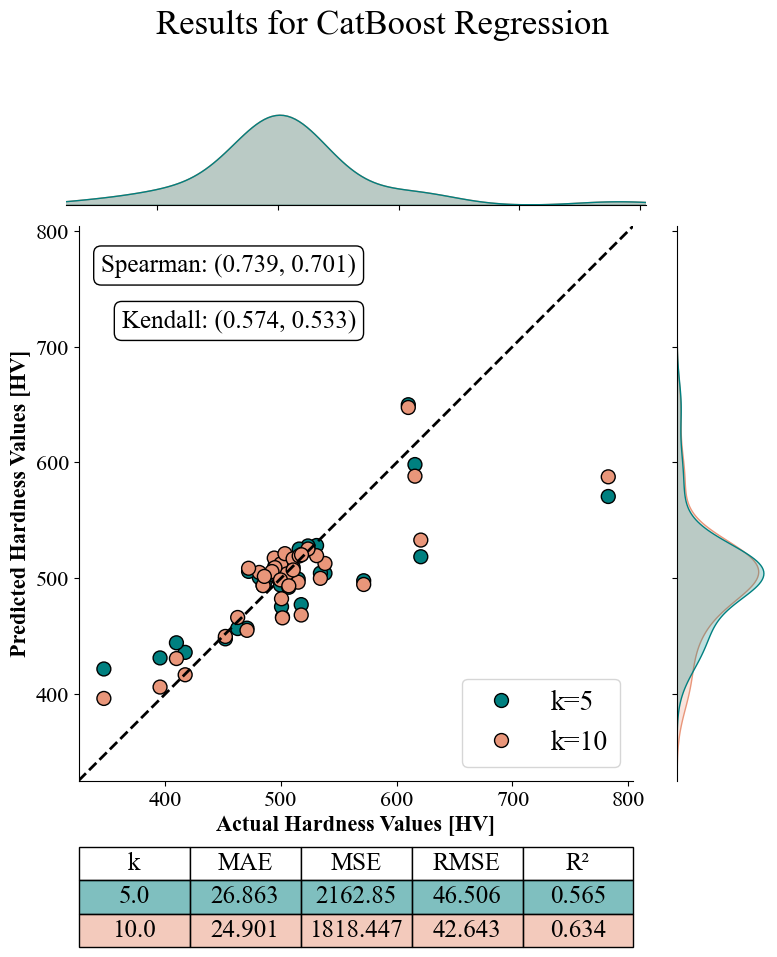

(    k     MAE       MSE    RMSE     R²
 0   5  26.863  2162.850  46.506  0.565
 1  10  24.901  1818.447  42.643  0.634,
         Actual  Predictions     k
 0   395.540000   431.151983   k=5
 1   347.000000   421.599753   k=5
 2   494.198889   505.199931   k=5
 3   538.010000   504.237905   k=5
 4   615.750000   598.206678   k=5
 ..         ...          ...   ...
 69  515.730000   519.265739  k=10
 70  517.495000   468.235520  k=10
 71  610.000000   647.516206  k=10
 72  485.640000   501.582780  k=10
 73  517.750000   520.280059  k=10
 
 [74 rows x 3 columns])

In [43]:
# ======================================================
# 1. Initialize and Define the CatBoost Model
# ======================================================

# Import CatBoost library
model_cat = cb.CatBoostRegressor(loss_function='RMSE', random_state=50)  # RMSE is used for regression tasks

# Define the hyperparameter grid for optimization using Grid Search
param_grid = {
    'iterations': [100, 150, 200],  # Number of boosting iterations
    'learning_rate': [0.03, 0.1],   # Step size shrinkage to prevent overfitting
    'depth': [2, 4, 6, 8],          # Depth of the trees (larger values can capture more complexity)
    'l2_leaf_reg': [0.2, 0.5, 1, 3] # Regularization parameter to prevent overfitting
}

# Define the values of k for cross-validation
k_values = [5, 10]

# Define the type of data used for training (in this case, unprocessed data)
data_type = ['Unprocessed']

# ======================================================
# 2. Initialize Dictionaries to Store Results
# ======================================================

grid_searches_Cat = {}       # Stores the results from GridSearchCV
evaluate_dfs_Cat = {}        # Stores evaluation metrics
best_params_Cat = {}         # Stores the best hyperparameters found by Grid Search
y_pred_tests_Cat = {}        # Stores test predictions
new_evaluation_dfs_Cat = {}  # Stores updated evaluation metrics
y_unscaled_preds_Cat = {}    # Stores unscaled predictions for analysis

# ======================================================
# 3. Perform Grid Search and Cross-Validation
# ======================================================

# Iterate over each k value for cross-validation
for k in k_values:
    # Generate dynamic variable names for storing results
    grid_search_name = "grid_searches_{}".format(k)
    evaluate_df_name = "evaluate_df_{}".format(k)
    best_params_name = "best_params_{}".format(k)
    y_pred_test_name = "y_pred_test_{}".format(k)

    # Perform Grid Search with Cross-Validation
    (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
        model_cat, param_grid, k, 
        X_train['Unprocessed'], y_train['Unprocessed'], 
        X_test['Unprocessed'], y_test['Unprocessed']
    )
    
    # Store results from Grid Search in respective dictionaries
    grid_searches_Cat[grid_search_name] = grid_search_var
    evaluate_dfs_Cat[evaluate_df_name] = evaluate_df_var
    best_params_Cat[best_params_name] = best_params_var
    y_pred_tests_Cat[y_pred_test_name] = y_pred_test_var

# ======================================================
# 4. Compile Results into a DataFrame for Analysis
# ======================================================

dfs_list = []  # Initialize an empty list to store DataFrames

# Loop over each item in the evaluation dictionary to process results
for key, value in evaluate_dfs_Cat.items():
    # Split the key string to extract k value
    parts = key.split('_')
    
    # Ensure the extracted key follows the correct naming pattern
    if len(parts) == 3 and parts[0] == 'evaluate' and parts[1] == 'df' and parts[2].isdigit():
        k = int(parts[2])  # Extract the k value
        
        # Retrieve the corresponding best parameters
        best_params_key = "best_params_{}_{}".format(data_type, k)
        best_param_values = best_params_Cat.get(best_params_key, None)

        # Store evaluation results in a DataFrame
        df_with_info = value.copy()
        df_with_info['k_value'] = k  # Store k value in the DataFrame

        # If best parameters exist, add them as separate columns
        if best_param_values:
            for param, val in best_param_values.items():
                df_with_info[param] = val

        # Append the DataFrame to the list
        dfs_list.append(df_with_info)

# ======================================================
# 5. Find the Best Model Based on MAE
# ======================================================

# Check if there are valid DataFrames to concatenate
if len(dfs_list) > 0:
    # Combine all DataFrames into a single DataFrame
    final_df = pd.concat(dfs_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

# Filter results to find the model with the lowest Mean Absolute Error (MAE)
mae_rows = final_df[final_df['error_metric'] == 'MAE']
lowest_mae_row = mae_rows.loc[mae_rows['testing_error'].idxmin()]  # Find the row with the lowest MAE

# Print the best model based on MAE
print("Row with lowest testing error (MAE):")
print(lowest_mae_row)

# ======================================================
# 6. Visualize Model Performance
# ======================================================

# Plot model performance for CatBoost Regression (comparing k=5 and k=10)
visualize_results(
    evaluate_dfs_Cat['evaluate_df_5'], 
    evaluate_dfs_Cat['evaluate_df_10'], 
    y_test['Unprocessed'], 
    y_pred_tests_Cat['y_pred_test_5'].flatten().reshape(-1), 
    y_pred_tests_Cat['y_pred_test_10'].flatten().reshape(-1), 
    'Results for CatBoost Regression'
)


In [44]:
best_params_Cat

{'best_params_5': {'depth': 6,
  'iterations': 100,
  'l2_leaf_reg': 1,
  'learning_rate': 0.1},
 'best_params_10': {'depth': 4,
  'iterations': 100,
  'l2_leaf_reg': 0.2,
  'learning_rate': 0.1}}

# 📌 **Feature Importance Analysis for CatBoost**
 
## 🔹 **Why Feature Importance Matters?**
Feature importance analysis helps us understand **which features contribute the most** to the model's predictions. By analyzing feature importance, we can:
- **Identify the most influential variables** affecting the model.
- **Reduce dimensionality** by eliminating low-impact features.
- **Improve interpretability** of the model for better decision-making.

## 🔹 **How CatBoost Calculates Feature Importance?**
- CatBoost uses **Permutation Feature Importance**, which measures the **reduction in model performance** when a feature is randomly shuffled.
- This allows us to rank features based on their impact on predictions.
- The higher the **importance score**, the more valuable the feature is in making accurate predictions.

## 🔹 **What This Code Does**
1. **Extracts the Best Model** from Grid Search.
2. **Retrieves Feature Importance Scores** from the trained CatBoost model.
3. **Sorts Features by Importance** in descending order.
4. **Plots a Horizontal Bar Chart** to visualize feature importance.

---

📌 **Now, let's generate the feature importance plot!**


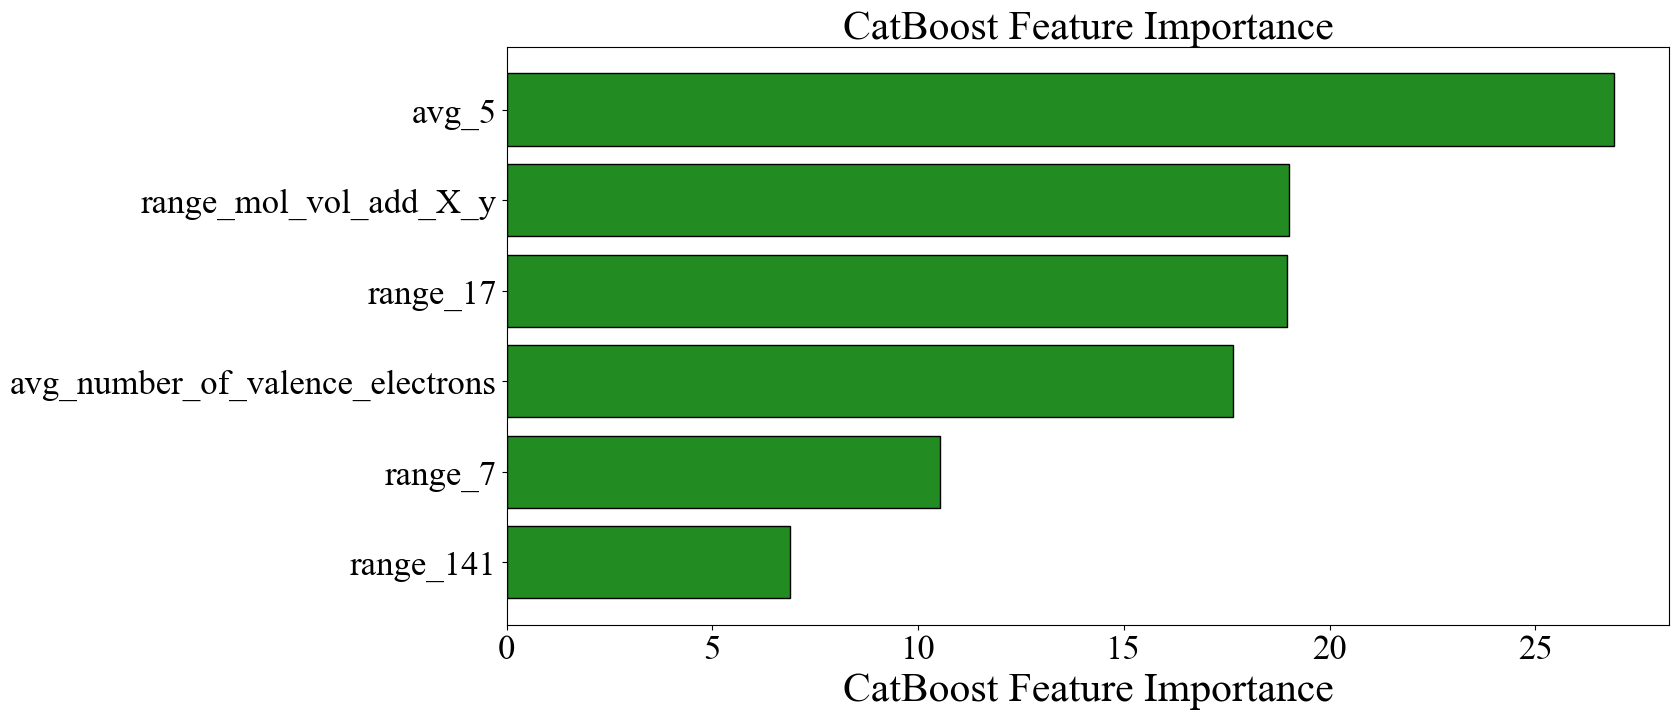

In [45]:
# ======================================================
# 1. Extract Best CatBoost Model from Grid Search
# ======================================================

# Retrieve the best-performing CatBoost model (found using k=10 cross-validation)
best_estimator_Cat = grid_searches_Cat['grid_searches_10'].best_estimator_  

# ======================================================
# 2. Generate Feature Importance Plot
# ======================================================

# Create a new figure with specified dimensions
plt.figure(figsize=(15, 7.5))

# Retrieve and sort feature importance scores
sorted_feature_importance = best_estimator_Cat.feature_importances_.argsort()  

# Plot feature importance using a horizontal bar chart
plt.barh(
    X_.columns[sorted_feature_importance],  # Feature names sorted by importance
    best_estimator_Cat.feature_importances_[sorted_feature_importance],  # Corresponding importance values
    color='forestgreen',  # Set bar color
    edgecolor='black'  # Add black border for better visibility
)

# ======================================================
# 3. Customize Plot Aesthetics
# ======================================================

# Set the x-axis label
plt.xlabel("CatBoost Feature Importance", fontsize=30)

# Adjust tick label sizes for better readability
plt.yticks(fontsize=25)  
plt.xticks(fontsize=25)

# Set the plot title
plt.title('CatBoost Feature Importance', fontsize=30)

# ======================================================
# 4. Save and Display the Plot
# ======================================================

# Save the feature importance plot to a specified directory
plt.savefig(directory_path + "Feature_Import_Cat.png", dpi=100, bbox_inches='tight')

# Show the plot
plt.show()


# 📌 **SHAP Analysis for CatBoost Model**

## 🔹 **Why Use SHAP for CatBoost?**
- CatBoost is a **tree-based model**, making it ideal for **SHAP (SHapley Additive exPlanations)** analysis.
- SHAP values help explain **how much each feature contributes** to a given prediction.
- Understanding feature impact improves **model interpretability** and allows for **better decision-making** in feature selection.

## 🔹 **What This Code Does**
1. **Loads the Best CatBoost Model** from Grid Search.
2. **Prepares Data** by converting it into NumPy arrays.
3. **Initializes the SHAP Explainer** using the trained model.
4. **Computes SHAP Values** for both training and combined datasets.
5. **Visualizes Feature Importance** using a **bar plot**.
6. **Compares Feature Contributions** in training vs. full dataset.

---

📌 **Now, let's analyze feature importance using SHAP!**


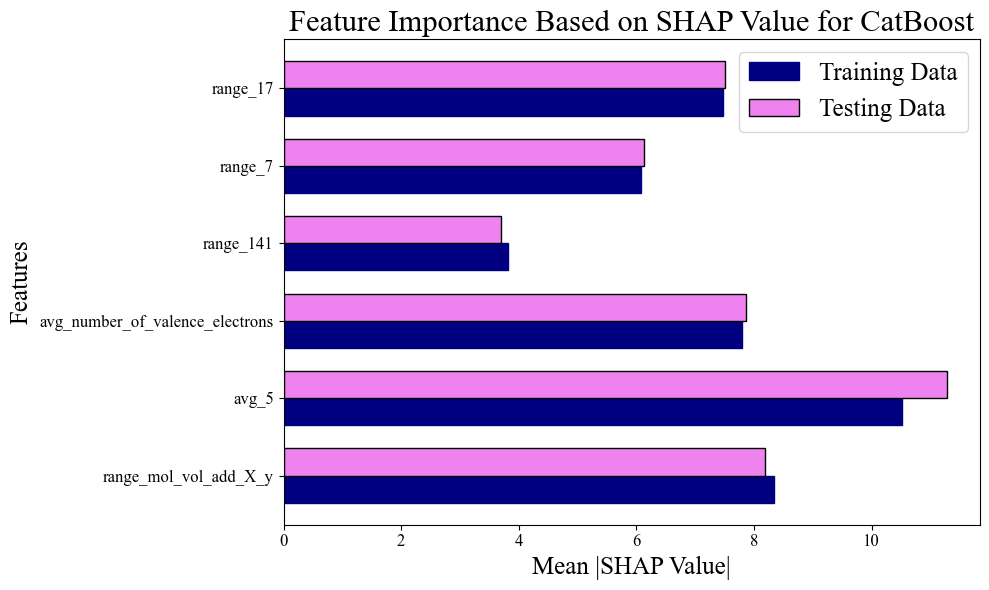

In [46]:
# ======================================================
# 1. Load the Best CatBoost Model from Grid Search
# ======================================================

best_estimator_Cat = grid_searches_Cat['grid_searches_10'].best_estimator_  

# ======================================================
# 2. Convert Data to NumPy Arrays (Required for SHAP)
# ======================================================

# Convert training and combined datasets to NumPy arrays
X_train_np = np.array(X_train['Unprocessed'])  # Training feature matrix
y_train_np = np.array(y_train['Unprocessed'])  # Training target variable
X_combined_np = np.array(X_)  # Full dataset

# Retrieve feature names for visualization
feature_names = X_train['Unprocessed'].columns

# ======================================================
# 3. Create SHAP Explainer for CatBoost
# ======================================================

# Initialize SHAP's TreeExplainer for the trained CatBoost model
explainer = shap.TreeExplainer(best_estimator_Cat)

# Compute SHAP values for both training and combined datasets
shap_values_train = explainer.shap_values(Pool(X_train_np, y_train_np))  # Training data
shap_values_test = explainer.shap_values(X_combined_np)  # Combined dataset

# ======================================================
# 4. Calculate Mean SHAP Values for Feature Importance
# ======================================================

# Compute the absolute mean of SHAP values for feature ranking
mean_shap_train = np.abs(shap_values_train).mean(axis=0)  # Training dataset
mean_shap_test = np.abs(shap_values_test).mean(axis=0)  # Combined dataset

# ======================================================
# 5. Prepare Data for Plotting
# ======================================================

# Define bar height for visualization
bar_height = 0.35  

# Set the positions of bars on the y-axis
r1 = np.arange(len(feature_names))  # Position for training SHAP values
r2 = [x + bar_height for x in r1]  # Position for combined SHAP values

# ======================================================
# 6. Generate SHAP Feature Importance Plot
# ======================================================

# Create a new figure with defined size
plt.figure(figsize=(10, 6))

# Plot SHAP values for training data
plt.barh(r1, mean_shap_train, color='navy', height=bar_height, edgecolor='navy', label='Training Data')

# Plot SHAP values for combined dataset
plt.barh(r2, mean_shap_test, color='violet', height=bar_height, edgecolor='black', label='Testing Data')

# ======================================================
# 7. Customize Plot Aesthetics
# ======================================================

# Set axis labels
plt.xlabel('Mean |SHAP Value|', fontsize=18)
plt.ylabel('Features', fontsize=18)

# Adjust tick label sizes for better readability
plt.xticks(fontsize=12)
plt.yticks([r + bar_height/2 for r in range(len(feature_names))], feature_names, fontsize=12)

# Set the plot title
plt.title('Feature Importance Based on SHAP Value for CatBoost', fontsize=22)

# Add legend to differentiate between training and testing data
plt.legend(fontsize=18)

# ======================================================
# 8. Save and Display the Plot
# ======================================================

# Save the SHAP feature importance plot to the specified directory
plt.savefig(directory_path + "Feature_Import_SHAP_CatBoost.png", dpi=100, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


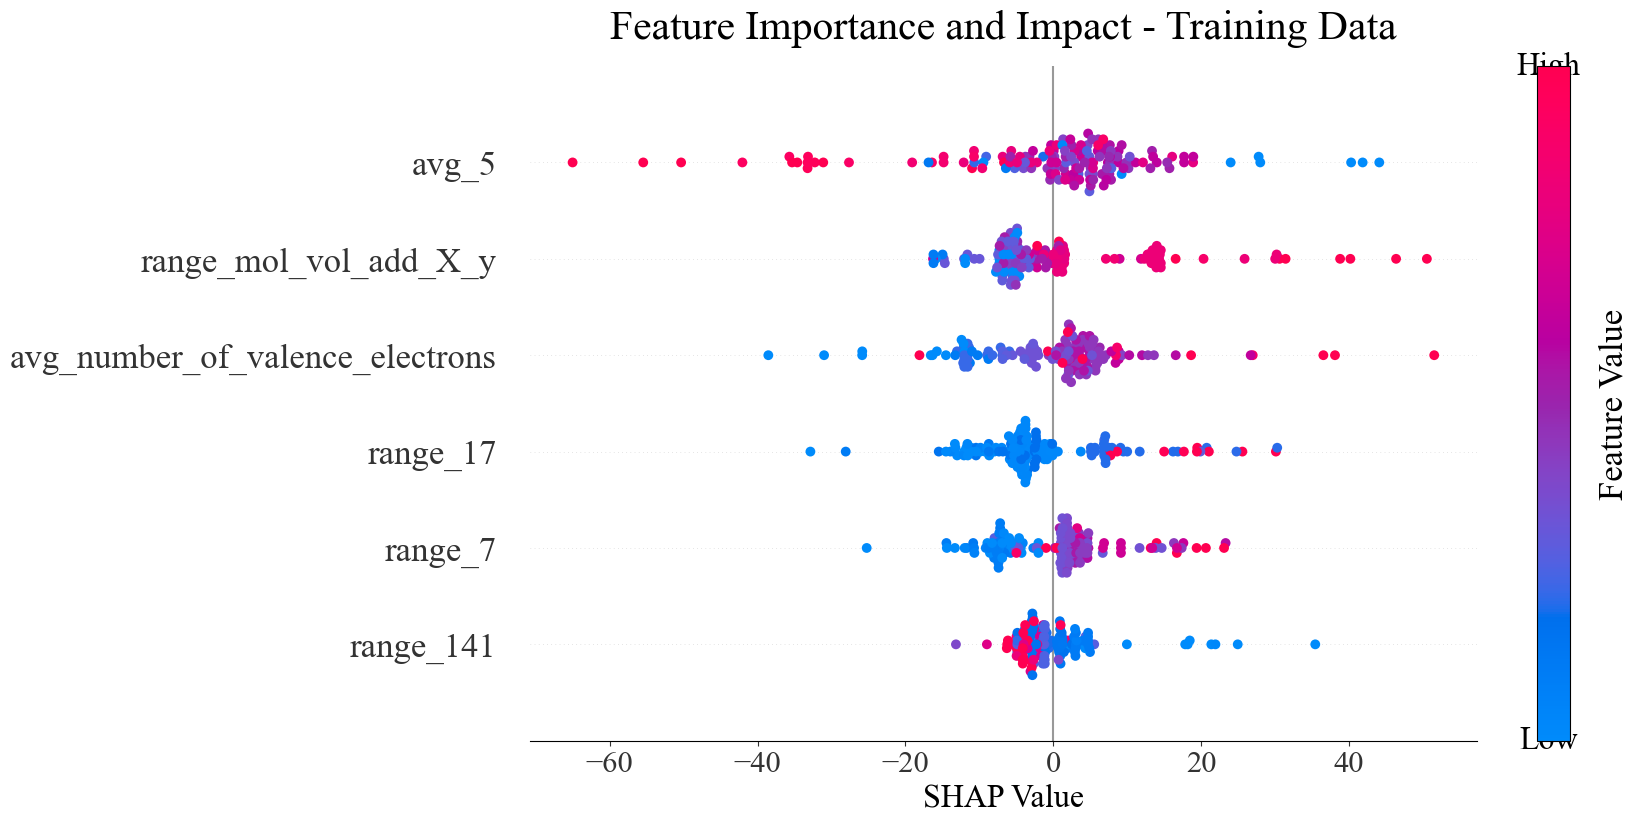

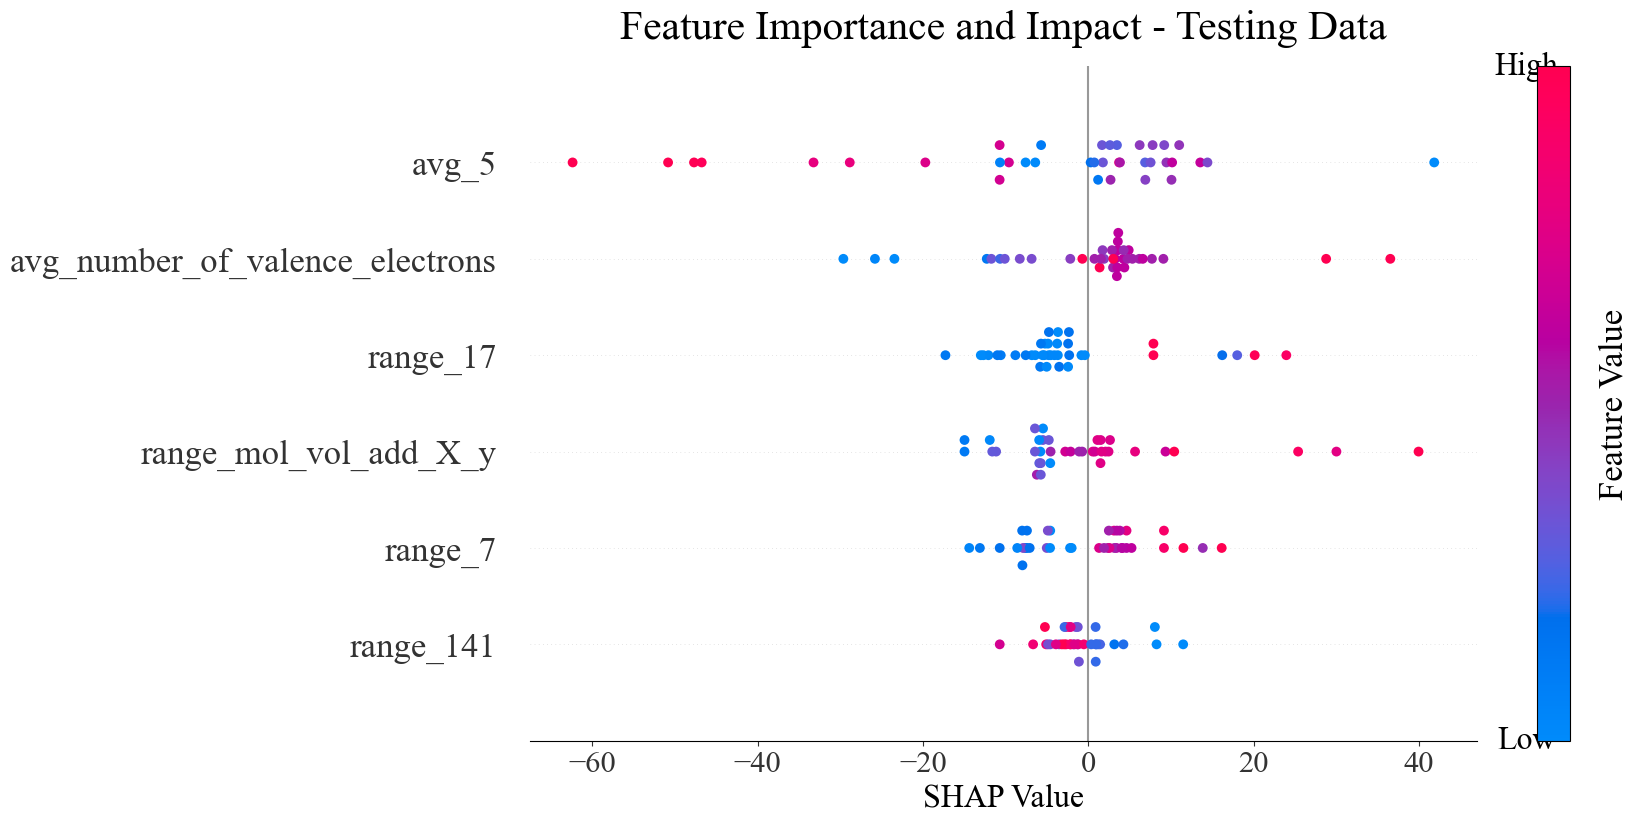

In [47]:
# ======================================================
# 1. Load the Best CatBoost Model from Grid Search
# ======================================================

best_estimator_Cat = grid_searches_Cat['grid_searches_10'].best_estimator_

# ======================================================
# 2. Convert Data to NumPy Arrays for SHAP Analysis
# ======================================================

# Convert training and testing datasets to NumPy arrays
X_train_np = np.array(X_train['Unprocessed'])  # Training feature matrix
y_train_np = np.array(y_train['Unprocessed'])  # Training target values
X_test_np = np.array(X_test['Unprocessed'])  # Testing feature matrix

# Retrieve feature names for visualization
feature_names = X_train['Unprocessed'].columns

# ======================================================
# 3. Create SHAP Explainer for CatBoost
# ======================================================

# Initialize SHAP's TreeExplainer for the trained CatBoost model
explainer = shap.TreeExplainer(best_estimator_Cat)

# Compute SHAP values for both training and testing datasets
shap_values_train = explainer.shap_values(Pool(X_train_np, y_train_np))  # Training dataset
shap_values_test = explainer.shap_values(X_test_np)  # Testing dataset

# ======================================================
# 4. Generate SHAP Summary Plot for Training Data
# ======================================================

# Create a figure for SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot for training data
shap.summary_plot(
    shap_values_train, X_train_np, feature_names=feature_names, show=False, 
    plot_size=[15, 7.5], color_bar=False
)

# ======================================================
# 5. Enhance Visualization for Training Data
# ======================================================

# Increase marker size for better visibility
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):  # Ensure it's the scatter plot
            collection.set_sizes([50])  # Set marker size, increase value for larger markers

# Add color bar without ticks for feature values
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)
cbar.ax.yaxis.set_label_position('right')

# Set title and labels
plt.title('Feature Importance and Impact - Training Data', fontsize=30, pad=20)
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Add annotations for "Low" and "High" feature importance
plt.text(67, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))
plt.text(67, 6, 'High', fontsize=23, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))

# Save the figure to a file
plt.savefig(directory_path + "Feature_Impact_SHAP_Cat_training.png", dpi=100, bbox_inches='tight')

# Show the plot
plt.show()

# ======================================================
# 6. Generate SHAP Summary Plot for Testing Data
# ======================================================

# Create a figure for SHAP summary plot
f = plt.figure()

# Generate SHAP summary plot for testing data
shap.summary_plot(
    shap_values_test, X_test_np, feature_names=feature_names, show=False, 
    plot_size=[15, 7.5], color_bar=False
)

# ======================================================
# 7. Enhance Visualization for Testing Data
# ======================================================

# Increase marker size for better visibility
for ax in plt.gcf().axes:
    for collection in ax.collections:
        if isinstance(collection, matplotlib.collections.PathCollection):  # Ensure it's the scatter plot
            collection.set_sizes([50])  # Set marker size, increase value for larger markers

# Add color bar without ticks for feature values
cbar = plt.colorbar(ticks=[])
cbar.set_label(label='Feature Value', fontsize=25, labelpad=20)
cbar.ax.yaxis.set_label_position('right')

# Set title and labels
plt.title('Feature Importance and Impact - Testing Data', fontsize=30, pad=20)
plt.xlabel('SHAP Value', fontsize=23)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)

# Add annotations for "Low" and "High" feature importance
plt.text(53, -1.0, 'Low', fontsize=23, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))
plt.text(53, 6, 'High', fontsize=23, color='black', ha='center', va='center', bbox=dict(facecolor='none', edgecolor='none'))

# Save the figure to a file
plt.savefig(directory_path + "Feature_Impact_SHAP_Cat_testing.png", dpi=100, bbox_inches='tight')

# Show the plot
plt.show()


# 📌 **Implementation of K-Nearest Neighbors (KNN) Regression for Hardness Prediction**

## 🔹 **What is K-Nearest Neighbors (KNN)?**
**K-Nearest Neighbors (KNN) Regression** is a non-parametric algorithm that predicts the target value by averaging the target values of the **K closest** training instances. It is widely used due to its **simplicity, interpretability, and adaptability** to different data distributions.

---

## 🔹 **Why Use KNN Regression?**
✅ **Non-parametric** → No assumption about the data distribution.  
✅ **Effective for small datasets** → Does not require model training, making it computationally efficient.  
✅ **Captures local patterns** → The prediction is based on the nearest observations.  

---

## 🔹 **Key Hyperparameters in KNN**
| Hyperparameter | Description |
|---------------|-------------|
| **n_neighbors** | Number of nearest neighbors to consider for prediction. |
| **weights** | Determines how neighbors contribute to the prediction (`uniform`: equal weight, `distance`: closer points have higher influence). |
| **metric** | Distance metric used for finding neighbors (`euclidean`, `manhattan`). |

---

## 🔹 **What This Code Does**
🔹 **Defines the KNN Regression Model** and configures hyperparameters.  
🔹 **Performs Grid Search with Cross-Validation** (`k=5`, `k=10`) to find the best hyperparameters.  
🔹 **Evaluates Model Performance** using **MAE, MSE, RMSE, and R²**.  
🔹 **Rescales Predictions** using multiple **scaling methods** (`StandardScaler`, `MinMaxScaler`, `Normalizer`).  
🔹 **Stores and Analyzes Results** to compare configurations.  
🔹 **Visualizes Performance** through evaluation plots.  

---

## 🚀 **Steps in Implementing KNN Regression**
### 🔹 **1. Define the KNN Regression Model**
- Initializes the **KNeighborsRegressor** instance.
- Configures a **hyperparameter grid** for tuning.

### 🔹 **2. Perform Hyperparameter Tuning**
- **GridSearchCV** is applied to identify the best **n_neighbors**, **weights**, and **distance metric**.
- **Cross-validation (`k=5`, `k=10`)** ensures robust model evaluation.

### 🔹 **3. Evaluate and Rescale Predictions**
- Uses the best model to make **predictions on test data**.
- Rescales predictions to match the original scale.

### 🔹 **4. Store and Analyze Results**
- Saves model configurations, evaluation metrics, and predictions.
- Identifies the **best-performing model** based on **lowest Mean Absolute Error (MAE)**.

### 🔹 **5. Visualize Model Performance**
- Generates **scatter plots** comparing actual vs. predicted values.
- Displays a **summary table** of performance metrics.

---

📌 **Now, let's implement KNN Regression with hyperparameter tuning and performance analysis. 🚀**


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -27.795625533103447
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best MSE score: -1420.0416298497848
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -37.37395415423733
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best R2 score: 0.3694966658050152
Unprocessed 5
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5305616844007084
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best MSE score: -0.5362689379153331
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7246227376561989
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best R2 score: 0.3336145343142597
StandardScaler 5
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.06568314435542388
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best MSE score: -0.008180018074858755
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 out of  80 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.08936643930731836
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best R2 score: 0.345462893893666
MinMaxScaler 5
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -28.253073463888647
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1433.5073159080157
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -36.95269697120351
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.1s finished


Best R2 score: 0.2261772042571928
Unprocessed 10
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best MAE score: -0.5355949524151143
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best MSE score: -0.5163673432261151
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.7006903279080096
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best R2 score: 0.14866751724819244
StandardScaler 10
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.06471247379258592
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.007622369138947975
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best RMSE score: -0.08403871149610591
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.1s finished


Best R2 score: 0.1424617650396866
MinMaxScaler 10
Row with lowest testing error (MAE):
error_metric                 MAE
validation_error        0.064712
testing_error          27.323918
k_value                       10
data_type           MinMaxScaler
metric                 euclidean
n_neighbors                    5
weights                 distance
Name: 30, dtype: object


The figure layout has changed to tight


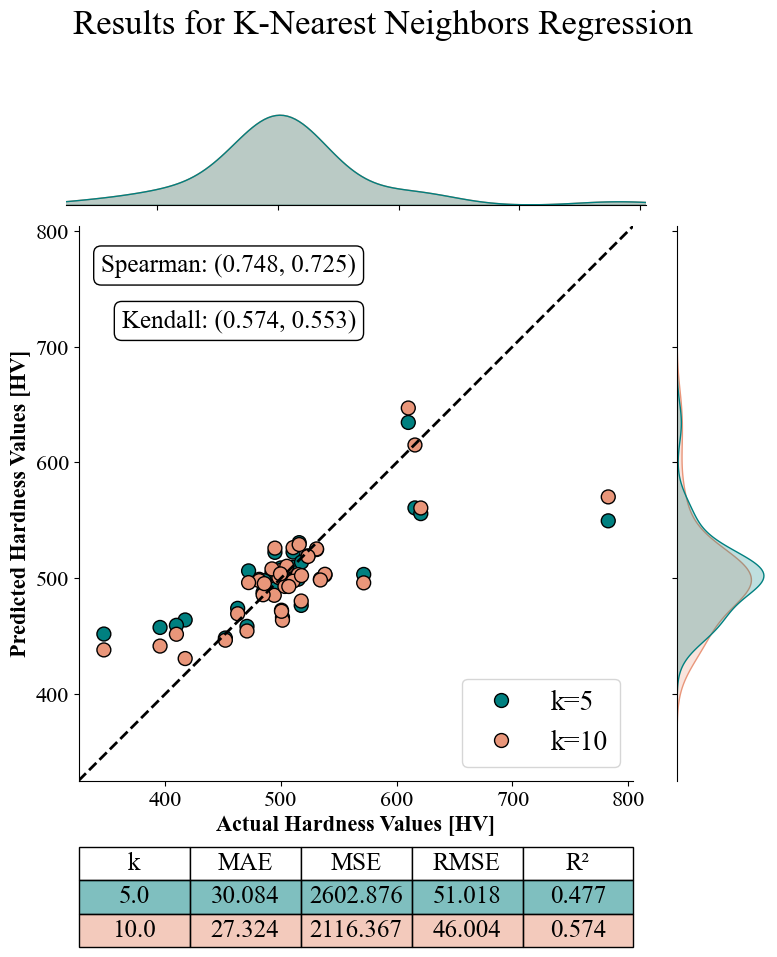

(    k     MAE       MSE    RMSE     R²
 0   5  30.084  2602.876  51.018  0.477
 1  10  27.324  2116.367  46.004  0.574,
         Actual  Predictions     k
 0   395.540000   457.479506   k=5
 1   347.000000   451.796558   k=5
 2   494.198889   490.684812   k=5
 3   538.010000   502.722322   k=5
 4   615.750000   560.732541   k=5
 ..         ...          ...   ...
 69  515.730000   529.121375  k=10
 70  517.495000   480.306381  k=10
 71  610.000000   647.054976  k=10
 72  485.640000   495.369278  k=10
 73  517.750000   502.283494  k=10
 
 [74 rows x 3 columns])

In [48]:
# ======================================================
# 1. Define the KNN Regression Model and Parameter Grid
# ======================================================

model_KNN = KNeighborsRegressor()

# Define hyperparameter grid for tuning
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 10],  # Number of nearest neighbors
    'weights': ['uniform', 'distance'],  # Weighting method for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Define k values for cross-validation
k_values = [5, 10]

# Define types of data preprocessing applied
data_types = ['Unprocessed', 'StandardScaler', 'MinMaxScaler']

# ======================================================
# 2. Initialize Dictionaries to Store Results
# ======================================================

grid_searches_KNN = {}  # Store grid search results
evaluate_dfs_KNN = {}  # Store evaluation metrics
best_params_KNN = {}  # Store best hyperparameters
y_pred_tests_KNN = {}  # Store predicted test values
new_evaluation_dfs_KNN = {}  # Store rescaled evaluation metrics
y_unscaled_preds_KNN = {}  # Store rescaled predictions

# ======================================================
# 3. Perform Grid Search and Evaluation for Each k Value
# ======================================================

for k in k_values:
    for data in data_types:
        # Dynamically generate variable names for each configuration
        grid_search_name = f"grid_searches_{data}_{k}"
        evaluate_df_name = f"evaluate_df_{data}_{k}"
        best_params_name = f"best_params_{data}_{k}"
        y_pred_test_name = f"y_pred_test_{data}_{k}"

        # Perform grid search with cross-validation
        (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
            model_KNN, param_grid_KNN, k, X_train[data], y_train[data],
            X_test[data], y_test[data])

        # Store results in dictionaries
        grid_searches_KNN[grid_search_name] = grid_search_var
        evaluate_dfs_KNN[evaluate_df_name] = evaluate_df_var
        best_params_KNN[best_params_name] = best_params_var
        y_pred_tests_KNN[y_pred_test_name] = y_pred_test_var

        # Reshape predicted test values for rescaling
        y_pred_test_var_reshaped = y_pred_test_var.reshape(-1, 1)

        # Define variable names for rescaled evaluations
        new_evaluation_df_name = f"new_evaluation_df_{data}_{k}"
        y_unscaled_pred_name = f"y_unscaled_pred_{data}_{k}"

        # Assign appropriate scaler based on data type
        if data == 'StandardScaler':
            scale_y = standard_scale_y
        elif data == 'MinMaxScaler':
            scale_y = minmax_scale_y
        elif data == 'Normalizer':
            scale_y = norm_scale_y
        else:
            scale_y = None  # No scaling if unprocessed

        print(f"Processing K={k}, Data={data}")

        # Rescale predictions and evaluate
        new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
            y_pred_test_var_reshaped, y_test['Unprocessed'], evaluate_df_var, scale_y
        )

        # Store rescaled evaluation metrics and predictions
        new_evaluation_dfs_KNN[new_evaluation_df_name] = new_evaluation_dfs_var
        y_unscaled_preds_KNN[y_unscaled_pred_name] = y_unscaled_preds_var

# ======================================================
# 4. Combine Evaluation Results into a Single DataFrame
# ======================================================

dfs_list = []  # List to hold DataFrames

# Loop through the evaluation results and compile them
for key, value in new_evaluation_dfs_KNN.items():
    # Extract information from variable names
    parts = key.split('_')

    # Ensure correct format before processing
    if len(parts) == 5 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[3] in data_types and parts[4].isdigit():
        data_type = parts[3]
        k = int(parts[4])

        # Retrieve corresponding best parameters
        best_params_key = f"best_params_{data_type}_{k}"
        best_param_values = best_params_KNN.get(best_params_key, None)

        # Create a DataFrame and add metadata
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['data_type'] = data_type

        # Add best hyperparameters to DataFrame if available
        if best_param_values:
            for param, value in best_param_values.items():
                df_with_info[param] = value

        # Append to list
        dfs_list.append(df_with_info)

# Concatenate all DataFrames if available
if len(dfs_list) > 0:
    final_df = pd.concat(dfs_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

# ======================================================
# 5. Identify the Best KNN Model Based on MAE
# ======================================================

# Extract rows where the error metric is Mean Absolute Error (MAE)
mae_rows = final_df[final_df['error_metric'] == 'MAE']

# Identify the configuration with the lowest MAE
lowest_mae_row = mae_rows.loc[mae_rows['testin


# 📌 **Implementation of ElasticNet Regression for Hardness Prediction**

## 🔹 **What is ElasticNet Regression?**
**ElasticNet Regression** is a **regularized regression model** that combines both **Lasso (L1) and Ridge (L2) penalties** to prevent overfitting and improve predictive performance. It is particularly useful when dealing with **high-dimensional datasets and multicollinearity** among features.

---

## 🔹 **Why Use ElasticNet?**
✅ **Balances feature selection (Lasso) and coefficient shrinkage (Ridge)**.  
✅ **Useful when features are highly correlated** to avoid instability in coefficients.  
✅ **Controls overfitting** by tuning the **L1-L2 ratio (`l1_ratio`)**.  
✅ **More robust than Lasso or Ridge alone** in complex datasets.

---

## 🔹 **Key Hyperparameters in ElasticNet**
| Hyperparameter | Description |
|---------------|-------------|
| **alpha** | Regularization strength (higher values shrink coefficients more aggressively). |
| **l1_ratio** | Balances Lasso (L1) and Ridge (L2) regression (0 = Ridge, 1 = Lasso, values in between = ElasticNet). |

---

## 🔹 **What This Code Does**
🔹 **Defines the ElasticNet Model** with different hyperparameter settings.  
🔹 **Performs Grid Search with Cross-Validation** (`k=5`, `k=10`) to find the best `alpha` and `l1_ratio`.  
🔹 **Evaluates Performance Metrics** such as **MAE, MSE, RMSE, and R²**.  
🔹 **Rescales Predictions** using different scaling methods (`StandardScaler`, `MinMaxScaler`).  
🔹 **Stores & Analyzes Results** for performance comparison across different configurations.  
🔹 **Visualizes Model Performance** through evaluation plots.  

---

## 🚀 **Steps in Implementing ElasticNet Regression**
### 🔹 **1. Define the ElasticNet Model**
- Initializes the **ElasticNet Regression Model**.
- Configures a **hyperparameter grid** for tuning:
  - `alpha`: Regularization strength.
  - `l1_ratio`: Determines the mix of Lasso and Ridge.

### 🔹 **2. Perform Hyperparameter Tuning**
- **GridSearchCV** is applied to find the best combination of `alpha` and `l1_ratio`.
- **Cross-validation (`k=5`, `k=10`)** ensures robust model evaluation.

### 🔹 **3. Evaluate and Rescale Predictions**
- Uses the best model to make **predictions on test data**.
- Rescales predictions to match the original scale.

### 🔹 **4. Store and Analyze Results**
- Saves model configurations, evaluation metrics, and predictions.
- Identifies the **best-performing model** based on **lowest Mean Absolute Error (MAE)**.

### 🔹 **5. Visualize Model Performance**
- Generates **scatter plots** comparing actual vs. predicted values.
- Displays a **summary table** of performance metrics.

---

📌 **Now, let's implement ElasticNet Regression with hyperparameter tuning and performance analysis. 🚀**


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -31.44876026287426
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


Best MSE score: -1730.4551259121588
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best RMSE score: -41.265010813468784
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 out of  90 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.2592700656380252
Unprocessed 5
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.5737439266708098
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.5934319795708725
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best RMSE score: -0.7642284940956448
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


Best R2 score: 0.26457420716841684
StandardScaler 5
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best MAE score: -0.07104251781904619
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best MSE score: -0.009085888706676735
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.09447810497444442
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best R2 score: 0.2690461820216934
MinMaxScaler 5
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 149 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -31.633539476482316
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 149 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1760.1724861695773
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -40.916691483277596
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 149 out of 180 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished


Best R2 score: 0.086989262149365
Unprocessed 10
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best MAE score: -0.5771575481938978
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.597549742252255
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best RMSE score: -0.7576957367758796
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.05587793217181221
StandardScaler 10
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.07141589677084761
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best MSE score: -0.009141563092353696
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished


Best RMSE score: -0.09367886237125819
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best R2 score: 0.053062788843046736
MinMaxScaler 10
Row with lowest testing error (MAE):
error_metric                   MAE
validation_error          0.573744
testing_error            31.827883
k_value                          5
data_type           StandardScaler
alpha                         0.01
l1_ratio                       0.8
Name: 6, dtype: object


The figure layout has changed to tight


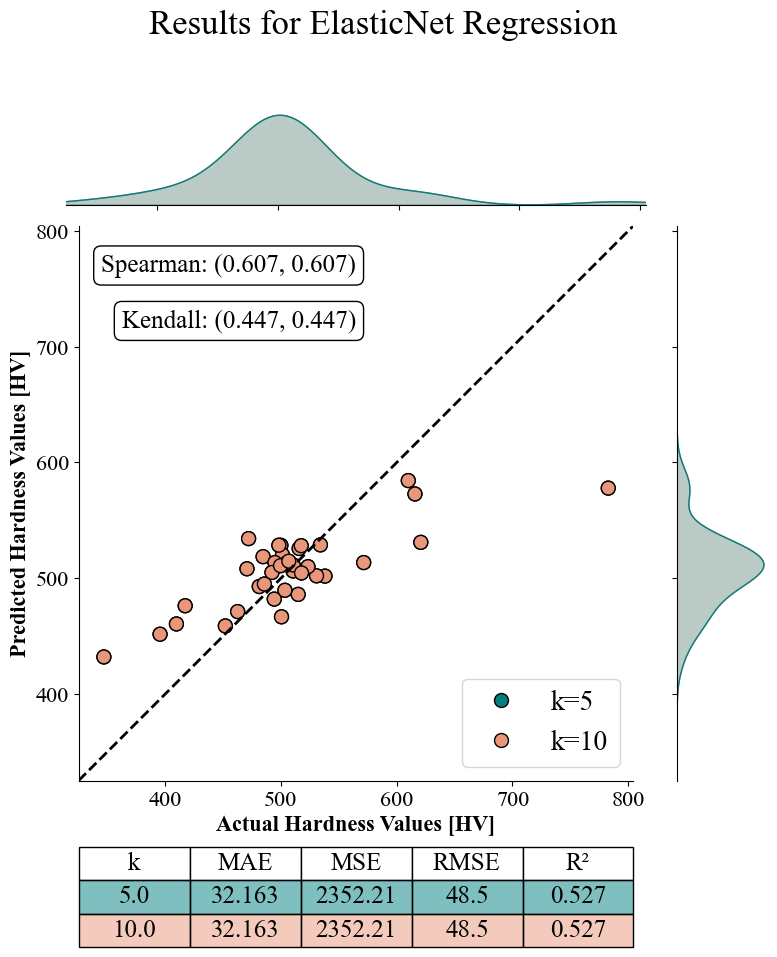

(    k     MAE      MSE  RMSE     R²
 0   5  32.163  2352.21  48.5  0.527
 1  10  32.163  2352.21  48.5  0.527,
         Actual  Predictions     k
 0   395.540000   451.643501   k=5
 1   347.000000   431.992198   k=5
 2   494.198889   481.976515   k=5
 3   538.010000   501.841989   k=5
 4   615.750000   572.804408   k=5
 ..         ...          ...   ...
 69  515.730000   525.709322  k=10
 70  517.495000   528.103309  k=10
 71  610.000000   584.369374  k=10
 72  485.640000   494.992883  k=10
 73  517.750000   504.549911  k=10
 
 [74 rows x 3 columns])

In [49]:
# ======================================================
# 1. Define the ElasticNet Regression Model and Parameter Grid
# ======================================================

model_ElasticNet = ElasticNet()

# Define the hyperparameter grid for tuning
param_grid_ElasticNet = {
    'alpha': np.logspace(-4, 1, 6),  # Regularization strength (small to large)
    'l1_ratio': [0.2, 0.5, 0.8]  # Balance between Lasso (L1) and Ridge (L2)
}

# Define k values for cross-validation
k_values = [5, 10]

# Define types of data preprocessing applied
data_types = ['Unprocessed', 'StandardScaler', 'MinMaxScaler']

# ======================================================
# 2. Initialize Dictionaries to Store Results
# ======================================================

grid_searches_ELN = {}  # Store grid search results
evaluate_dfs_ELN = {}  # Store evaluation metrics
best_params_ELN = {}  # Store best hyperparameters
y_pred_tests_ELN = {}  # Store predicted test values
new_evaluation_dfs_ELN = {}  # Store rescaled evaluation metrics
y_unscaled_preds_ELN = {}  # Store rescaled predictions

# ======================================================
# 3. Perform Grid Search and Evaluation for Each k Value
# ======================================================

for k in k_values:
    for data in data_types:
        # Generate dynamic variable names for each configuration
        grid_search_name = f"grid_searches_{data}_{k}"
        evaluate_df_name = f"evaluate_df_{data}_{k}"
        best_params_name = f"best_params_{data}_{k}"
        y_pred_test_name = f"y_pred_test_{data}_{k}"

        # Perform grid search with cross-validation
        (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
            model_ElasticNet, param_grid_ElasticNet, k, X_train[data], y_train[data],
            X_test[data], y_test[data])

        # Store results in dictionaries
        grid_searches_ELN[grid_search_name] = grid_search_var
        evaluate_dfs_ELN[evaluate_df_name] = evaluate_df_var
        best_params_ELN[best_params_name] = best_params_var
        y_pred_tests_ELN[y_pred_test_name] = y_pred_test_var

        # Reshape predicted test values for rescaling
        y_pred_test_var_reshaped = y_pred_test_var.reshape(-1, 1)

        # Define variable names for rescaled evaluations
        new_evaluation_df_name = f"new_evaluation_df_{data}_{k}"
        y_unscaled_pred_name = f"y_unscaled_pred_{data}_{k}"

        # Assign appropriate scaler based on data type
        if data == 'StandardScaler':
            scale_y = standard_scale_y
        elif data == 'MinMaxScaler':
            scale_y = minmax_scale_y
        elif data == 'Normalizer':
            scale_y = norm_scale_y
        else:
            scale_y = None  # No scaling if unprocessed

        print(f"Processing K={k}, Data={data}")

        # Rescale predictions and evaluate
        new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
            y_pred_test_var_reshaped, y_test['Unprocessed'], evaluate_df_var, scale_y
        )

        # Store rescaled evaluation metrics and predictions
        new_evaluation_dfs_ELN[new_evaluation_df_name] = new_evaluation_dfs_var
        y_unscaled_preds_ELN[y_unscaled_pred_name] = y_unscaled_preds_var

# ======================================================
# 4. Combine Evaluation Results into a Single DataFrame
# ======================================================

dfs_list = []  # List to hold DataFrames

# Loop through the evaluation results and compile them
for key, value in new_evaluation_dfs_ELN.items():
    # Extract information from variable names
    parts = key.split('_')

    # Ensure correct format before processing
    if len(parts) == 5 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[3] in data_types and parts[4].isdigit():
        data_type = parts[3]
        k = int(parts[4])

        # Retrieve corresponding best parameters
        best_params_key = f"best_params_{data_type}_{k}"
        best_param_values = best_params_ELN.get(best_params_key, None)

        # Create a DataFrame and add metadata
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['data_type'] = data_type

        # Add best hyperparameters to DataFrame if available
        if best_param_values:
            for param, value in best_param_values.items():
                df_with_info[param] = value

        # Append to list
        dfs_list.append(df_with_info)

# Concatenate all DataFrames if available
if len(dfs_list) > 0:
    final_df = pd.concat(dfs_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

# ======================================================
# 5. Identify the Best ElasticNet Model Based on MAE
# ======================================================

# Extract rows where the error metric is Mean Absolute Error (MAE)
mae_rows = final_df[final_df['error_metric'] == 'MAE']

# Identify the configuration with the lowest MAE
lowest_mae_row = mae_rows.loc[mae_rows['testing_error'].idxmin()]

print("Row with lowest testing error (MAE):")
print(lowest_mae_row)

# ======================================================
# 6. Visualize Results of the Best ElasticNet Model
# ======================================================

# Visualize performance comparison for K=5 and K=10 using MinMaxScaler
visualize_results(
    new_evaluation_dfs_ELN['new_evaluation_df_MinMaxScaler_5'], 
    new_evaluation_dfs_ELN['new_evaluation_df_MinMaxScaler_10'], 
    y_test['Unprocessed'], 
    y_unscaled_preds_ELN['y_unscaled_pred_MinMaxScaler_5'].flatten().reshape(-1), 
    y_unscaled_preds_ELN['y_unscaled_pred_MinMaxScaler_10'].flatten().reshape(-1), 
    'Results for ElasticNet Regression'
)


# 📌 **Implementing LightGBM Regression for Hardness Prediction**

## 🔹 **What is LightGBM?**
**Light Gradient Boosting Machine (LightGBM)** is a fast, efficient, and high-performance **gradient boosting framework** developed by Microsoft. It is designed for handling **large datasets efficiently**, reducing memory consumption, and achieving faster training speeds compared to traditional gradient boosting methods.

---

## 🔹 **Why Use LightGBM?**
✅ **Leaf-Wise Tree Growth** → Unlike traditional boosting models, LightGBM grows trees **leaf-wise** instead of level-wise, making it much faster and more efficient.  
✅ **Optimized for Large Datasets** → Can handle millions of data points with high computational efficiency.  
✅ **Built-in Handling of Categorical Data** → No need for one-hot encoding, reducing feature explosion.  
✅ **Superior Performance** → Achieves high accuracy with minimal hyperparameter tuning.  

---

## 🔹 **Key Hyperparameters in LightGBM**
| Hyperparameter | Description |
|---------------|-------------|
| **n_estimators** | Number of boosting iterations (higher values = better learning but longer training time). |
| **max_depth** | Maximum depth of each tree (limits overfitting). |
| **learning_rate** | Step size for boosting (lower values require more iterations but generalize better). |

---

## 🔹 **What This Code Does**
🔹 **Defines the LightGBM Model** with various hyperparameter configurations.  
🔹 **Performs Grid Search with Cross-Validation (`k=5, k=10`)** to tune `n_estimators`, `max_depth`, and `learning_rate`.  
🔹 **Evaluates Performance Metrics** such as **MAE, MSE, RMSE, and R²**.  
🔹 **Rescales Predictions** using different scaling methods (`StandardScaler`, `MinMaxScaler`).  
🔹 **Stores & Analyzes Results** to determine the best model configuration.  
🔹 **Visualizes Performance** through scatter plots and summary tables.  

---

## 🚀 **Steps in Implementing LightGBM Regression**
### 🔹 **1. Define the LightGBM Model**
- Initializes the **LightGBM Regressor** (`LGBMRegressor()`).
- Configures a **hyperparameter grid** for tuning:
  - `n_estimators`: Number of boosting iterations.
  - `max_depth`: Controls tree complexity.
  - `learning_rate`: Adjusts step size for each iteration.

### 🔹 **2. Perform Hyperparameter Tuning**
- Uses **GridSearchCV** with **cross-validation (`k=5`, `k=10`)** to find the optimal parameters.
- Ensures robust evaluation across different datasets.

### 🔹 **3. Evaluate and Rescale Predictions**
- Uses the best model to make **predictions on test data**.
- Rescales predictions back to their original scale.

### 🔹 **4. Store and Analyze Results**
- Saves hyperparameter configurations, evaluation metrics, and predictions.
- Identifies the **best-performing model** based on **lowest Mean Absolute Error (MAE)**.

### 🔹 **5. Visualize Model Performance**
- Generates **scatter plots** comparing actual vs. predicted values.
- Displays a **summary table** of performance metrics.

---

📌 **Now, let's implement LightGBM Regression with hyperparameter tuning and performance analysis. 🚀**


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   12.1s finished
Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "C:\Users\sofia\anaconda3\envs\ml_method_env_38\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\sofia\anaconda3\envs\ml_method_env_38\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\sofia\anaconda3\envs\ml_method_env_38\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\sofia\anaconda3\e

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.9s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.1s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.9s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.6s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.1s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.4s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[Parallel(n_jobs=-1)]: Done 149 out of 180 | elapsed:    5.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.0s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   17.2s finished


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 507.727575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   10.7s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.3s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.2s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.1s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score -0.000177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   12.4s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.8s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.7s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.9s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 6
[LightGBM] [Info] Start training from score 0.368853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

The figure layout has changed to tight


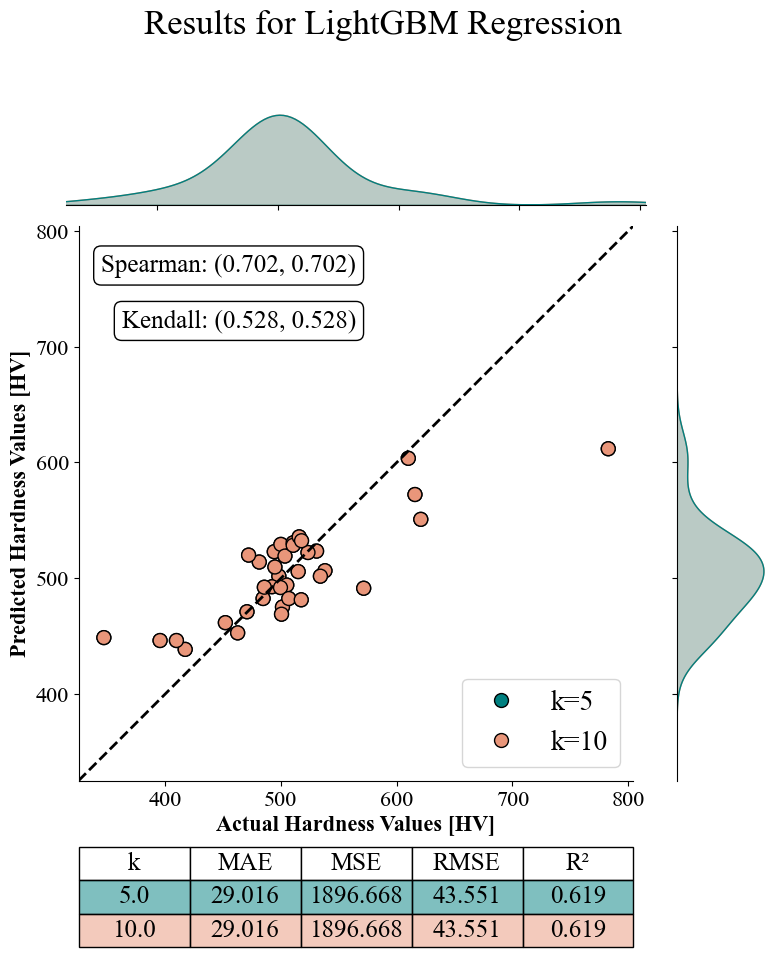

(    k     MAE       MSE    RMSE     R²
 0   5  29.016  1896.668  43.551  0.619
 1  10  29.016  1896.668  43.551  0.619,
         Actual  Predictions     k
 0   395.540000   446.192185   k=5
 1   347.000000   448.698198   k=5
 2   494.198889   522.927590   k=5
 3   538.010000   506.488578   k=5
 4   615.750000   572.324932   k=5
 ..         ...          ...   ...
 69  515.730000   535.745880  k=10
 70  517.495000   481.370864  k=10
 71  610.000000   603.606358  k=10
 72  485.640000   492.227681  k=10
 73  517.750000   532.402970  k=10
 
 [74 rows x 3 columns])

In [50]:
# ======================================================
# 1. Define the LightGBM Regression Model and Parameter Grid
# ======================================================

model_LGM = LGBMRegressor()

# Define the hyperparameter grid for tuning
param_grid_LGM = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [1, 3, 5, 10],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2]  # Learning rate for boosting
}

# Define k values for cross-validation
k_values = [5, 10]

# Define types of data preprocessing applied
data_types = ['Unprocessed', 'StandardScaler', 'MinMaxScaler']

# ======================================================
# 2. Initialize Dictionaries to Store Results
# ======================================================

grid_searches_LGM = {}  # Store grid search results
evaluate_dfs_LGM = {}  # Store evaluation metrics
best_params_LGM = {}  # Store best hyperparameters
y_pred_tests_LGM = {}  # Store predicted test values
new_evaluation_dfs_LGM = {}  # Store rescaled evaluation metrics
y_unscaled_preds_LGM = {}  # Store rescaled predictions

# ======================================================
# 3. Perform Grid Search and Evaluation for Each k Value
# ======================================================

for k in k_values:
    for data in data_types:
        # Generate dynamic variable names for each configuration
        grid_search_name = f"grid_searches_{data}_{k}"
        evaluate_df_name = f"evaluate_df_{data}_{k}"
        best_params_name = f"best_params_{data}_{k}"
        y_pred_test_name = f"y_pred_test_{data}_{k}"

        # Perform grid search with cross-validation
        (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
            model_LGM, param_grid_LGM, k, X_train[data], y_train[data],
            X_test[data], y_test[data])

        # Store results in dictionaries
        grid_searches_LGM[grid_search_name] = grid_search_var
        evaluate_dfs_LGM[evaluate_df_name] = evaluate_df_var
        best_params_LGM[best_params_name] = best_params_var
        y_pred_tests_LGM[y_pred_test_name] = y_pred_test_var

        # Reshape predicted test values for rescaling
        y_pred_test_var_reshaped = y_pred_test_var.reshape(-1, 1)

        # Define variable names for rescaled evaluations
        new_evaluation_df_name = f"new_evaluation_df_{data}_{k}"
        y_unscaled_pred_name = f"y_unscaled_pred_{data}_{k}"

        # Assign appropriate scaler based on data type
        if data == 'StandardScaler':
            scale_y = standard_scale_y
        elif data == 'MinMaxScaler':
            scale_y = minmax_scale_y
        elif data == 'Normalizer':
            scale_y = norm_scale_y
        else:
            scale_y = None  # No scaling if unprocessed

        print(f"Processing K={k}, Data={data}")

        # Rescale predictions and evaluate
        new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
            y_pred_test_var_reshaped, y_test['Unprocessed'], evaluate_df_var, scale_y
        )

        # Store rescaled evaluation metrics and predictions
        new_evaluation_dfs_LGM[new_evaluation_df_name] = new_evaluation_dfs_var
        y_unscaled_preds_LGM[y_unscaled_pred_name] = y_unscaled_preds_var

# ======================================================
# 4. Combine Evaluation Results into a Single DataFrame
# ======================================================

dfs_list = []  # List to hold DataFrames

# Loop through the evaluation results and compile them
for key, value in new_evaluation_dfs_LGM.items():
    # Extract information from variable names
    parts = key.split('_')

    # Ensure correct format before processing
    if len(parts) == 5 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[3] in data_types and parts[4].isdigit():
        data_type = parts[3]
        k = int(parts[4])

        # Retrieve corresponding best parameters
        best_params_key = f"best_params_{data_type}_{k}"
        best_param_values = best_params_LGM.get(best_params_key, None)

        # Create a DataFrame and add metadata
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['data_type'] = data_type

        # Add best hyperparameters to DataFrame if available
        if best_param_values:
            for param, value in best_param_values.items():
                df_with_info[param] = value

        # Append to list
        dfs_list.append(df_with_info)

# Concatenate all DataFrames if available
if len(dfs_list) > 0:
    final_df = pd.concat(dfs_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

# ======================================================
# 5. Identify the Best LightGBM Model Based on MAE
# ======================================================

# Extract rows where the error metric is Mean Absolute Error (MAE)
mae_rows = final_df[final_df['error_metric'] == 'MAE']

# Identify the configuration with the lowest MAE
lowest_mae_row = mae_rows.loc[mae_rows['testing_error'].idxmin()]

print("Row with lowest testing error (MAE):")
print(lowest_mae_row)

# ======================================================
# 6. Visualize Results of the Best LightGBM Model
# ======================================================

# Visualize performance comparison for K=5 and K=10 using StandardScaler
visualize_results(
    new_evaluation_dfs_LGM['new_evaluation_df_StandardScaler_5'], 
    new_evaluation_dfs_LGM['new_evaluation_df_StandardScaler_10'], 
    y_test['Unprocessed'], 
    y_unscaled_preds_LGM['y_unscaled_pred_StandardScaler_5'].flatten().reshape(-1), 
    y_unscaled_preds_LGM['y_unscaled_pred_StandardScaler_10'].flatten().reshape(-1), 
    'Results for LightGBM Regression'
)


# 📌 **Implementing Gradient Boosting Regression for Hardness Prediction**

## 🔹 **What is Gradient Boosting?**
**Gradient Boosting Regression (GBR)** is a **powerful ensemble learning method** that builds multiple decision trees sequentially to minimize prediction errors. It is widely used due to its ability to **reduce bias and variance**, making it an effective choice for predictive modeling.

---

## 🔹 **Why Use Gradient Boosting?**
✅ **Combines Weak Learners** → Uses multiple shallow trees to form a strong predictive model.  
✅ **Handles Non-linearity** → Effectively models complex relationships in data.  
✅ **Customizable Regularization** → Prevents overfitting by tuning `max_depth`, `learning_rate`, and `n_estimators`.  
✅ **Optimizes Loss Function** → Each tree **corrects errors** from the previous iteration.  

---

## 🔹 **Key Hyperparameters in Gradient Boosting**
| Hyperparameter | Description |
|---------------|-------------|
| **n_estimators** | Number of boosting iterations (higher values improve learning but increase complexity). |
| **max_depth** | Controls tree depth to balance bias and variance. |
| **learning_rate** | Adjusts the impact of each new tree (lower values generalize better). |

---

## 🔹 **What This Code Does**
🔹 **Defines the Gradient Boosting Regressor Model** with **hyperparameter tuning**.  
🔹 **Performs Grid Search with Cross-Validation (`k=5, k=10`)** to optimize `n_estimators`, `max_depth`, and `learning_rate`.  
🔹 **Evaluates Performance Metrics** including **MAE, MSE, RMSE, and R²**.  
🔹 **Rescales Predictions** using various scaling methods (`StandardScaler`, `MinMaxScaler`).  
🔹 **Stores & Analyzes Results** to determine the best-performing model.  
🔹 **Visualizes Model Performance** through **scatter plots and summary tables**.  

---

## 🚀 **Steps in Implementing Gradient Boosting Regression**
### 🔹 **1. Define the Gradient Boosting Model**
- Initializes the **GradientBoostingRegressor()** model.
- Configures a **hyperparameter grid** for tuning:
  - `n_estimators`: Defines the number of trees.
  - `max_depth`: Controls the complexity of each tree.
  - `learning_rate`: Regulates the contribution of each tree.

### 🔹 **2. Perform Hyperparameter Tuning**
- Uses **GridSearchCV** with **cross-validation (`k=5, k=10`)** to find optimal hyperparameters.
- Ensures **robust evaluation** across different datasets.

### 🔹 **3. Evaluate and Rescale Predictions**
- Makes **predictions on test data** using the best model.
- Rescales predictions back to their **original scale**.

### 🔹 **4. Store and Analyze Results**
- Saves **hyperparameter configurations, evaluation metrics, and predictions**.
- Identifies the **best-performing model** based on **lowest Mean Absolute Error (MAE)**.

### 🔹 **5. Visualize Model Performance**
- Generates **scatter plots** comparing **actual vs. predicted values**.
- Displays a **summary table** of model performance.

---

📌 **Now, let’s implement Gradient Boosting Regression with hyperparameter tuning and performance analysis! 🚀**


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -25.876027807268343
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1181.4786954385254
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -34.46866767047622
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.9s finished


Best R2 score: 0.4972635150469678
Unprocessed 5
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.8s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.48385310754085503
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.8s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best MSE score: -0.4034031523264421
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.633177601735371
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best R2 score: 0.48053253771080273
StandardScaler 5
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.05946780640381174
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best MSE score: -0.006230393720821567
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best RMSE score: -0.07800321484480137
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 out of 135 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.6s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best R2 score: 0.49244179620692474
MinMaxScaler 5
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -25.163173610444993
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -1089.867080421333
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -32.29207390165226
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 239 out of 270 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.4344384806782874
Unprocessed 10
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.4s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.4659789517915939
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.3s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.37432997856488653
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 239 out of 270 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.3s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.5980457489818962
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 239 out of 270 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.3s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best R2 score: 0.43304504049709036
StandardScaler 10
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 239 out of 270 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.5s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MAE score: -0.05753594618523872
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 203 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.5s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best MSE score: -0.005709098645417148
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 239 out of 270 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.4s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best RMSE score: -0.07412995176362189
Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 239 out of 270 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.3s finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best R2 score: 0.43452775891262296
MinMaxScaler 10
Row with lowest testing error (MAE):
error_metric                 MAE
validation_error        0.059468
testing_error          24.989017
k_value                        5
data_type           MinMaxScaler
learning_rate               0.01
max_depth                      5
n_estimators                 200
Name: 12, dtype: object


The figure layout has changed to tight


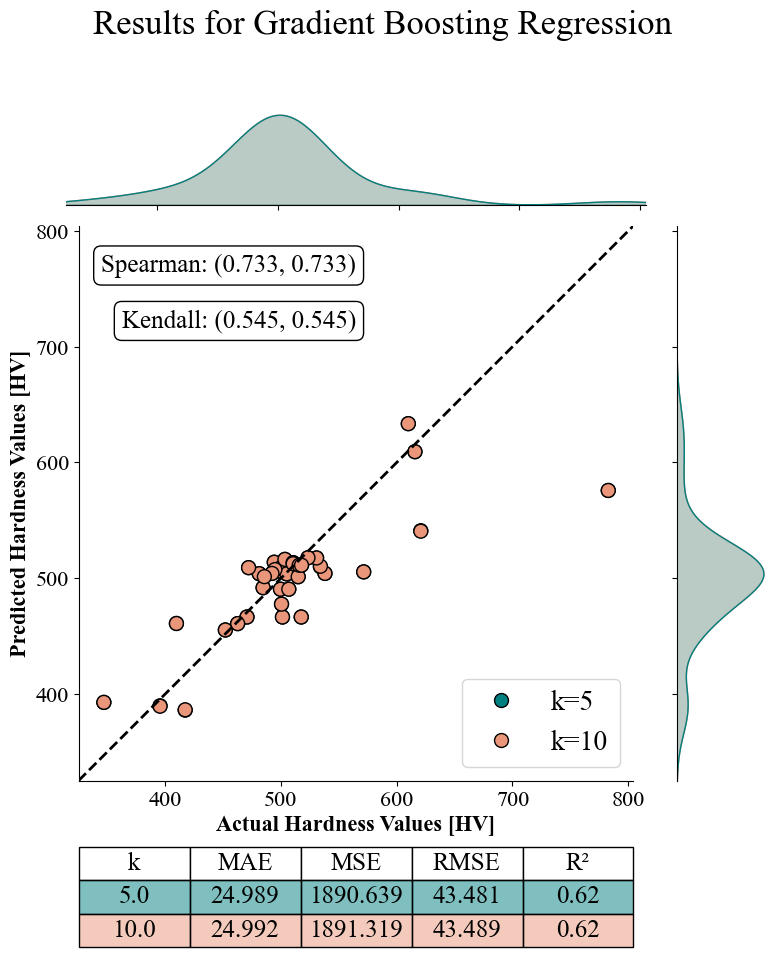

(    k     MAE       MSE    RMSE    R²
 0   5  24.989  1890.639  43.481  0.62
 1  10  24.992  1891.319  43.489  0.62,
         Actual  Predictions     k
 0   395.540000   389.800434   k=5
 1   347.000000   392.695935   k=5
 2   494.198889   513.812152   k=5
 3   538.010000   504.168557   k=5
 4   615.750000   609.321231   k=5
 ..         ...          ...   ...
 69  515.730000   511.239022  k=10
 70  517.495000   466.508569  k=10
 71  610.000000   633.536448  k=10
 72  485.640000   501.341949  k=10
 73  517.750000   511.239022  k=10
 
 [74 rows x 3 columns])

In [51]:
# ======================================================
# 1. Define the Gradient Boosting Regression Model and Parameter Grid
# ======================================================

# Initialize Gradient Boosting Regressor model
model_GradientBoosting = GradientBoostingRegressor()

# Define the hyperparameter grid for optimization
param_grid_GradientBoosting = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2]  # Step size for boosting updates
}

# Define k values for cross-validation
k_values = [5, 10]

# Define types of data preprocessing applied
data_types = ['Unprocessed', 'StandardScaler', 'MinMaxScaler']

# ======================================================
# 2. Initialize Dictionaries to Store Results
# ======================================================

grid_searches_GBR = {}  # Store grid search results
evaluate_dfs_GBR = {}  # Store evaluation metrics
best_params_GBR = {}  # Store best hyperparameters
y_pred_tests_GBR = {}  # Store predicted test values
new_evaluation_dfs_GBR = {}  # Store rescaled evaluation metrics
y_unscaled_preds_GBR = {}  # Store rescaled predictions

# ======================================================
# 3. Perform Grid Search and Evaluation for Each k Value
# ======================================================

for k in k_values:
    for data in data_types:
        # Generate dynamic variable names for each configuration
        grid_search_name = f"grid_searches_{data}_{k}"
        evaluate_df_name = f"evaluate_df_{data}_{k}"
        best_params_name = f"best_params_{data}_{k}"
        y_pred_test_name = f"y_pred_test_{data}_{k}"

        # Perform grid search with cross-validation
        (grid_search_var, evaluate_df_var, best_params_var, y_pred_test_var, _) = pipeline_search(
            model_GradientBoosting, param_grid_GradientBoosting, k, 
            X_train[data], y_train[data], X_test[data], y_test[data])

        # Store results in dictionaries
        grid_searches_GBR[grid_search_name] = grid_search_var
        evaluate_dfs_GBR[evaluate_df_name] = evaluate_df_var
        best_params_GBR[best_params_name] = best_params_var
        y_pred_tests_GBR[y_pred_test_name] = y_pred_test_var

        # Reshape predicted test values for rescaling
        y_pred_test_var_reshaped = y_pred_test_var.reshape(-1, 1)

        # Define variable names for rescaled evaluations
        new_evaluation_df_name = f"new_evaluation_df_{data}_{k}"
        y_unscaled_pred_name = f"y_unscaled_pred_{data}_{k}"

        # Assign appropriate scaler based on data type
        if data == 'StandardScaler':
            scale_y = standard_scale_y
        elif data == 'MinMaxScaler':
            scale_y = minmax_scale_y
        elif data == 'Normalizer':
            scale_y = norm_scale_y
        else:
            scale_y = None  # No scaling if unprocessed

        print(f"Processing K={k}, Data={data}")

        # Rescale predictions and evaluate
        new_evaluation_dfs_var, y_unscaled_preds_var = rescale_and_evaluate(
            y_pred_test_var_reshaped, y_test['Unprocessed'], evaluate_df_var, scale_y
        )

        # Store rescaled evaluation metrics and predictions
        new_evaluation_dfs_GBR[new_evaluation_df_name] = new_evaluation_dfs_var
        y_unscaled_preds_GBR[y_unscaled_pred_name] = y_unscaled_preds_var

# ======================================================
# 4. Combine Evaluation Results into a Single DataFrame
# ======================================================

dfs_list = []  # List to hold DataFrames

# Loop through the evaluation results and compile them
for key, value in new_evaluation_dfs_GBR.items():
    # Extract information from variable names
    parts = key.split('_')

    # Ensure correct format before processing
    if len(parts) == 5 and parts[0] == 'new' and parts[1] == 'evaluation' and parts[3] in data_types and parts[4].isdigit():
        data_type = parts[3]
        k = int(parts[4])

        # Retrieve corresponding best parameters
        best_params_key = f"best_params_{data_type}_{k}"
        best_param_values = best_params_GBR.get(best_params_key, None)

        # Create a DataFrame and add metadata
        df_with_info = value.copy()
        df_with_info['k_value'] = k
        df_with_info['data_type'] = data_type

        # Add best hyperparameters to DataFrame if available
        if best_param_values:
            for param, value in best_param_values.items():
                df_with_info[param] = value

        # Append to list
        dfs_list.append(df_with_info)

# Concatenate all DataFrames if available
if len(dfs_list) > 0:
    final_df = pd.concat(dfs_list, ignore_index=True)
else:
    print("No valid DataFrames to concatenate.")

# ======================================================
# 5. Identify the Best Gradient Boosting Model Based on MAE
# ======================================================

# Extract rows where the error metric is Mean Absolute Error (MAE)
mae_rows = final_df[final_df['error_metric'] == 'MAE']

# Identify the configuration with the lowest MAE
lowest_mae_row = mae_rows.loc[mae_rows['testing_error'].idxmin()]

print("Row with lowest testing error (MAE):")
print(lowest_mae_row)

# ======================================================
# 6. Visualize Results of the Best Gradient Boosting Model
# ======================================================

# Visualize performance comparison for K=5 and K=10 using MinMaxScaler
visualize_results(
    new_evaluation_dfs_GBR['new_evaluation_df_MinMaxScaler_5'], 
    new_evaluation_dfs_GBR['new_evaluation_df_MinMaxScaler_10'], 
    y_test['Unprocessed'], 
    y_unscaled_preds_GBR['y_unscaled_pred_MinMaxScaler_5'].flatten().reshape(-1), 
    y_unscaled_preds_GBR['y_unscaled_pred_MinMaxScaler_10'].flatten().reshape(-1), 
    'Results for Gradient Boosting Regression'
)


# 📌 **Rank-Based Metrics vs Performance-Based Metrics in Model Evaluation**

## 🔹 **Why Compare Both Metrics?**
When evaluating regression models, it is crucial to analyze both **performance-based metrics** (like Mean Absolute Error - MAE) and **rank-based metrics** (like Spearman and Kendall correlation). These two types of evaluation metrics provide complementary insights:

### ✅ **Performance-Based Metrics (MAE)**
- **Measures absolute prediction error** in terms of the target variable.
- **Lower MAE indicates better performance** in predicting the true values.
- **Can be biased** toward models that optimize for MAE but might not maintain correct ranking.

### ✅ **Rank-Based Metrics (Spearman & Kendall)**
- **Measures how well the model preserves ranking relationships** between predicted and actual values.
- **Spearman Correlation**: Checks if the predicted rankings align with actual rankings.
- **Kendall Correlation**: Measures the agreement between rankings considering pairwise comparisons.
- **Important for real-world applications** where maintaining relative order is crucial, such as ranking-based decision-making.

---

## 📊 **Comparing Model Performance and Analyzing Results**
To understand which models are performing best, we evaluate:
1. **MAE Values** → The lower the MAE, the better the model's predictive accuracy.
2. **Spearman Correlation** → Measures how well the model ranks predictions.
3. **Kendall Correlation** → Measures the agreement of ranking with respect to pairwise comparisons.

### 🔍 **How to Analyze the Performance:**
- **A model with the lowest MAE but poor ranking metrics might not be reliable** for applications where relative ordering is essential.
- **A model with higher Spearman and Kendall scores ensures that ranking is preserved**, even if MAE is slightly higher.
- **The best model should balance both performance-based and rank-based metrics.**

📌 **Now, let's generate visual comparisons to analyze both types of metrics across different models!**


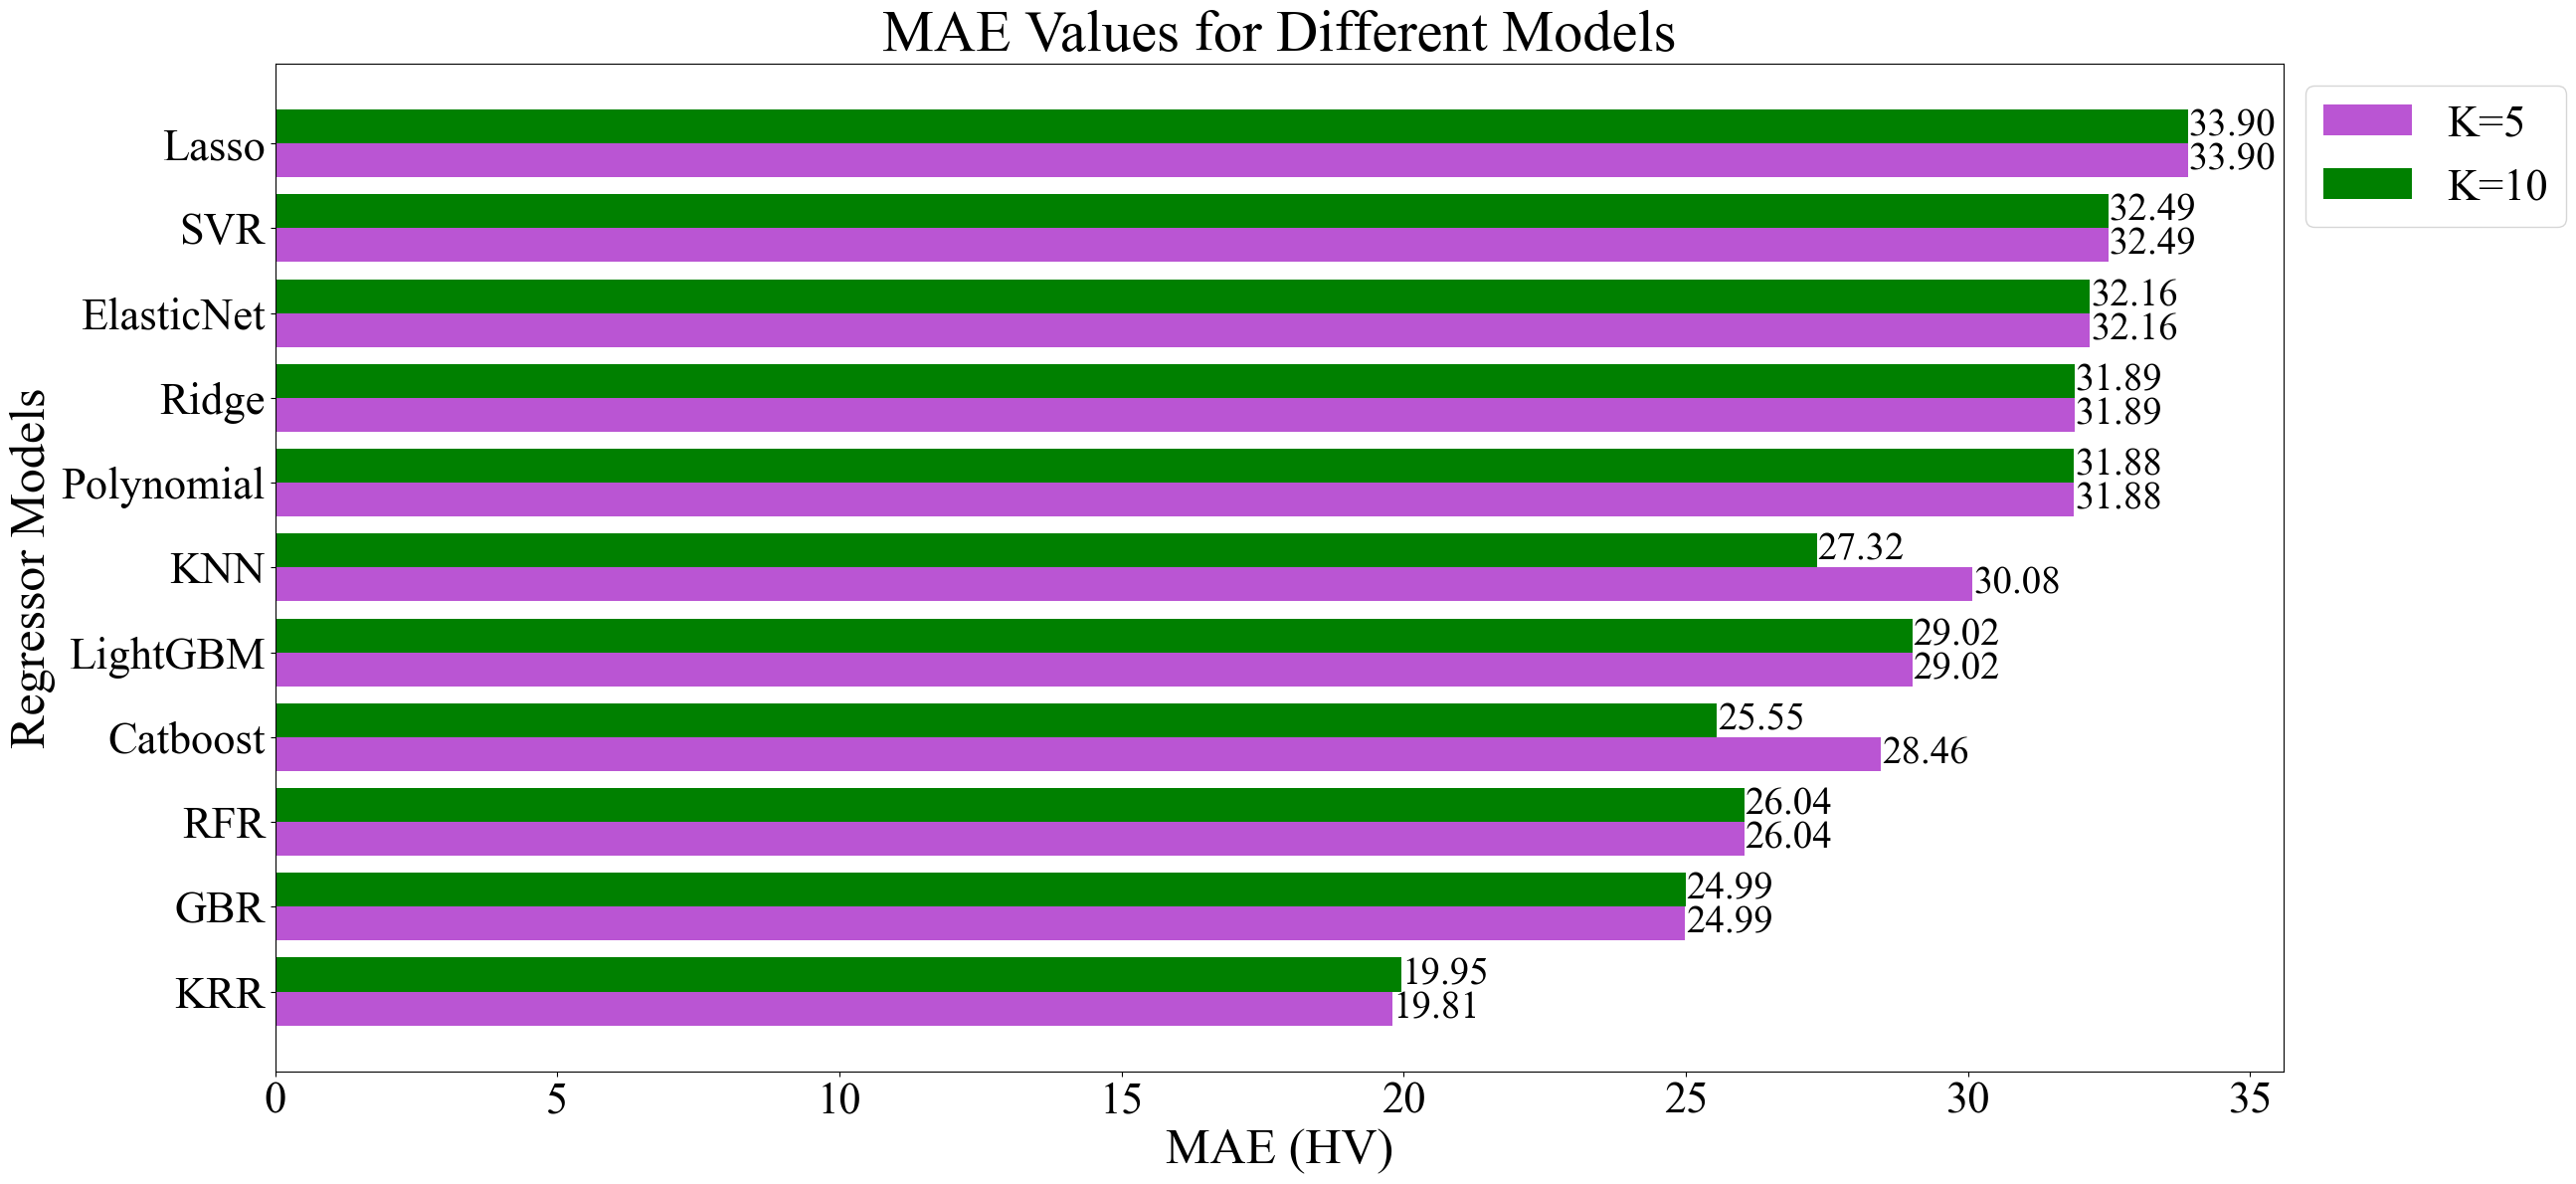

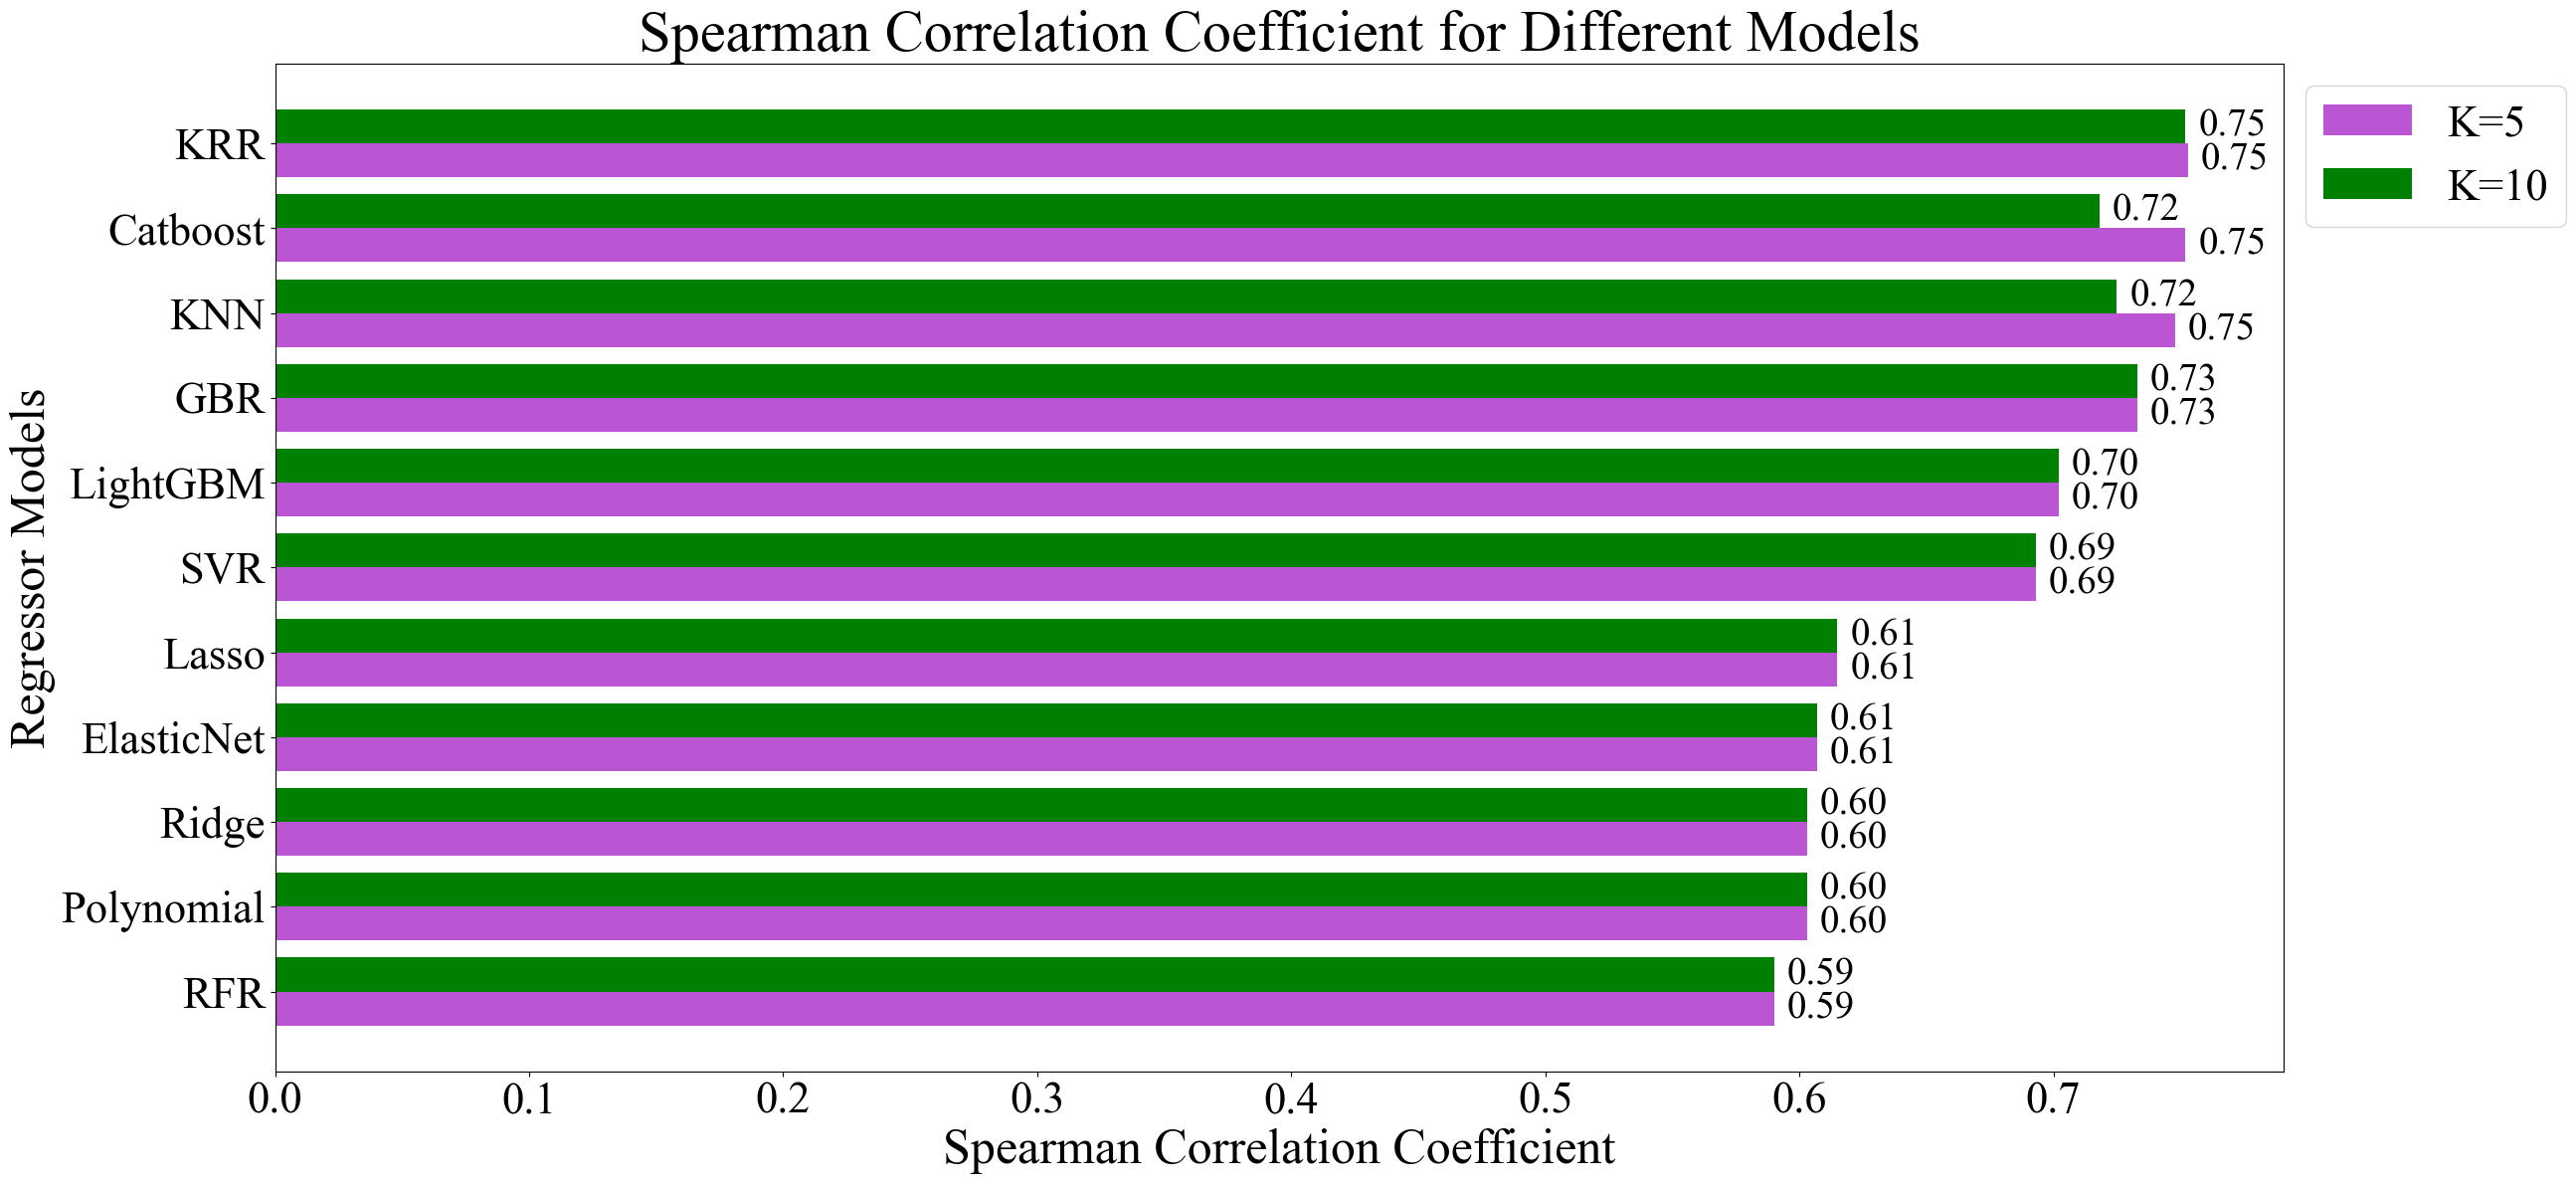

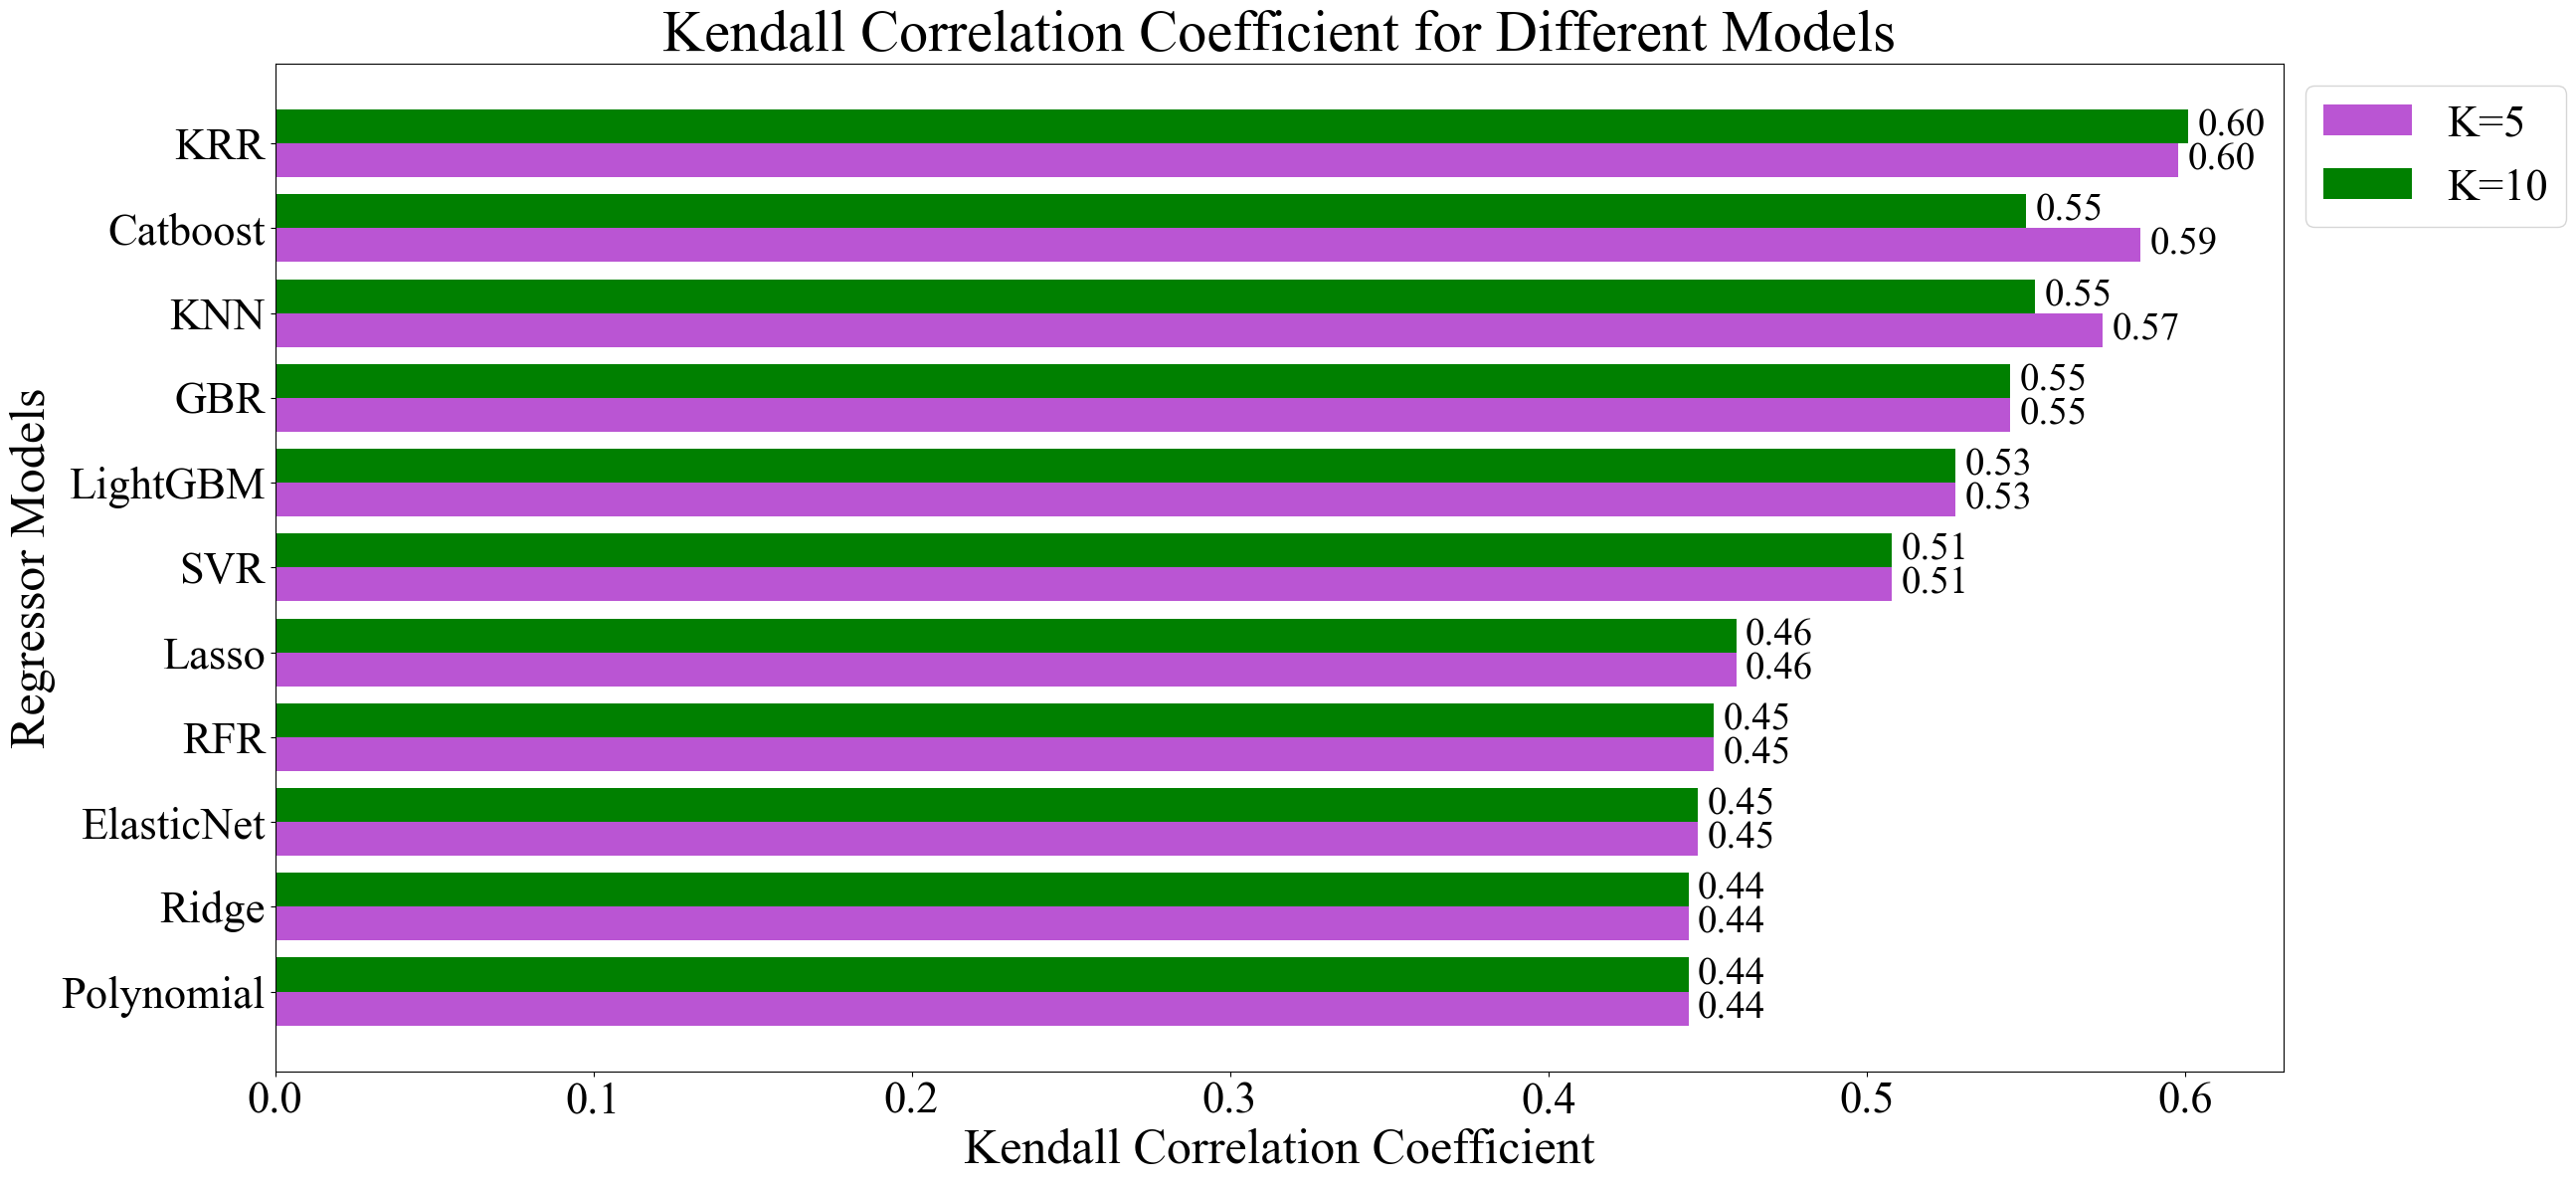

In [53]:
# ======================================================
# 1. Define Models and Metric Values
# ======================================================

# List of model names
models = ['KRR', 'RFR', 'Catboost', 'ElasticNet', 'GBR', 'KNN', 
          'Lasso', 'LightGBM', 'Polynomial', 'Ridge', 'SVR']

# Mean Absolute Error (MAE) values for k=5 and k=10
mae_values_5 = [19.806, 26.04, 28.464, 32.163, 24.989, 30.084, 33.901, 29.016, 31.883, 31.89, 32.488]
mae_values_10 = [19.954, 26.04, 25.555, 32.163, 24.992, 27.324, 33.901, 29.016, 31.883, 31.89, 32.488]

# Spearman rank correlation values for k=5 and k=10
spearman_5 = [0.753, 0.59, 0.752, 0.607, 0.733, 0.748, 0.615, 0.702, 0.603, 0.603, 0.693]
spearman_10 = [0.752, 0.59, 0.718, 0.607, 0.733, 0.725, 0.615, 0.702, 0.603, 0.603, 0.693]

# Kendall rank correlation values for k=5 and k=10
kendall_5 = [0.598, 0.452, 0.586, 0.447, 0.545, 0.574, 0.459, 0.528, 0.444, 0.444, 0.508]
kendall_10 = [0.601, 0.452, 0.55, 0.447, 0.545, 0.553, 0.459, 0.528, 0.444, 0.444, 0.508]

# ======================================================
# 2. Sort Models Based on MAE, Spearman, and Kendall
# ======================================================

# Combine and sort models by each metric
mae_sorted = sorted(zip(models, mae_values_5, mae_values_10), key=lambda x: x[1])  # Sort by MAE
spearman_sorted = sorted(zip(models, spearman_5, spearman_10), key=lambda x: x[1])  # Sort by Spearman
kendall_sorted = sorted(zip(models, kendall_5, kendall_10), key=lambda x: x[1])  # Sort by Kendall

# Unpack sorted data
models_sorted_mae, mae_values_5_sorted, mae_values_10_sorted = zip(*mae_sorted)
models_sorted_spearman, spearman_5_sorted, spearman_10_sorted = zip(*spearman_sorted)
models_sorted_kendall, kendall_5_sorted, kendall_10_sorted = zip(*kendall_sorted)

# ======================================================
# 3. Define Plot Parameters
# ======================================================

# Offset for stacking the bars side by side
bar_width = 0.4
indices_mae = np.arange(len(models_sorted_mae))
indices_spearman = np.arange(len(models_sorted_spearman))
indices_kendall = np.arange(len(models_sorted_kendall))

# Function to adjust annotation positions to prevent overlap
def adjust_annotation_position(ax, max_value, buffer=0.05):
    x_lim = ax.get_xlim()
    ax.set_xlim(x_lim[0], max(max_value + buffer, x_lim[1]))

# ======================================================
# 4. Generate MAE Plot
# ======================================================

fig, ax = plt.subplots(figsize=(26, 12))
ax.barh(indices_mae - bar_width / 2, mae_values_5_sorted, height=bar_width, color='mediumorchid', label='K=5')
ax.barh(indices_mae + bar_width / 2, mae_values_10_sorted, height=bar_width, color='green', label='K=10')

# Annotate bars with values
max_value_mae = max(mae_values_5_sorted + mae_values_10_sorted)
for i, (v5, v10) in enumerate(zip(mae_values_5_sorted, mae_values_10_sorted)):
    ax.text(v5 + 0.01, i - bar_width / 2, f"{v5:.2f}", va='center', ha='left', fontsize=28)
    ax.text(v10 + 0.01, i + bar_width / 2, f"{v10:.2f}", va='center', ha='left', fontsize=28)

adjust_annotation_position(ax, max_value_mae)
ax.set_title('MAE Values for Different Models', fontsize=42, fontname='Times New Roman')
ax.set_xlabel('Mean Absolute Error (MAE)', fontsize=36, fontname='Times New Roman')
ax.set_ylabel('Regressor Models', fontsize=36, fontname='Times New Roman')
ax.set_yticks(indices_mae)
ax.set_yticklabels(models_sorted_mae, fontsize=32, fontname='Times New Roman')
ax.legend(fontsize=32, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(figures_dir + '/MAE_comparison_plot.png', dpi=300)
plt.show()

# ======================================================
# 5. Generate Spearman Rank Correlation Plot
# ======================================================

fig, ax = plt.subplots(figsize=(26, 12))
ax.barh(indices_spearman - bar_width / 2, spearman_5_sorted, height=bar_width, color='mediumorchid', label='K=5')
ax.barh(indices_spearman + bar_width / 2, spearman_10_sorted, height=bar_width, color='green', label='K=10')

# Annotate bars with values
adjust_annotation_position(ax, max(spearman_5_sorted + spearman_10_sorted), buffer=0.02)
ax.set_title('Spearman Correlation Coefficient for Different Models', fontsize=42, fontname='Times New Roman')
ax.set_xlabel('Spearman Correlation Coefficient', fontsize=36, fontname='Times New Roman')
ax.set_ylabel('Regressor Models', fontsize=36, fontname='Times New Roman')
ax.set_yticks(indices_spearman)
ax.set_yticklabels(models_sorted_spearman, fontsize=32, fontname='Times New Roman')
ax.legend(fontsize=32, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(figures_dir + '/Spearman_comparison_plot.png', dpi=300)
plt.show()

# ======================================================
# 6. Generate Kendall Rank Correlation Plot
# ======================================================

fig, ax = plt.subplots(figsize=(26, 12))
ax.barh(indices_kendall - bar_width / 2, kendall_5_sorted, height=bar_width, color='mediumorchid', label='K=5')
ax.barh(indices_kendall + bar_width / 2, kendall_10_sorted, height=bar_width, color='green', label='K=10')

adjust_annotation_position(ax, max(kendall_5_sorted + kendall_10_sorted), buffer=0.02)
ax.set_title('Kendall Correlation Coefficient for Different Models', fontsize=42, fontname='Times New Roman')
ax.set_xlabel('Kendall Correlation Coefficient', fontsize=36, fontname='Times New Roman')
ax.set_ylabel('Regressor Models', fontsize=36, fontname='Times New Roman')
plt.savefig(figures_dir + '/Kendall_comparison_plot.png', dpi=300)
plt.show()


📌 **By analyzing these metrics together, we can make informed decisions about model selection and deployment. 🚀**
